In [ ]:
"""
What? NLP analysis of some pdf files. This is step#4

The goal is to to analyze Microsoft’s earnings transcripts in pre- and post-Satya Nadella days to extract insights
about how the company’s philosophy and strategy evolved over time. The goal of step#4 is to .

Reference: https://mikechoi90.medium.com/investigating-microsofts-transformation-under-satya-nadella-f49083294c35
"""

In [ ]:
import text_preprocessing_utils as tpu
import eda_utils as eu

import pandas as pd
%matplotlib inline
import pickle
import textstat
import nltk
nltk.download('averaged_perceptron_tagger')

## Retrieve Q&A portion of transcripts

In [2]:
msft_earnings_qa = {}

In [3]:
# Chris Liddell
msft_earnings_qa['msft_07q3'] = "In terms of the Premium mix, you're right, it is coming in above our expectations and are good. Within that obviously you do have a shift between Pro and what was previously Media standard. There's a mix shift within the mix. We think that we are going to see in fiscal year '08 a continuation of the trend that we saw in fiscal year '07 so the numbers from a Premium point of view will be broadly the same. What we're thinking of doing probably for next year is to start to give you some more visibility into how that Premium mix is made up, because, as we have talked about on previous calls, this is quite a different economic impact, depending on in this case whether it is Vista Premium or Vista Business, one being five times the economic benefit relative to the other. So we'll continue to give you the Premium mix as we see, which you can think of as being broadly equal to fiscal year '07 a lot of the benefit that we are seeing. But will also start to give you some visibility into the split of that Premium mix going forward as well. It is not going to be terribly comparable just because of also the SKUs structure. But generally speaking it is faster. So 85/15 is very healthy. Now it obviously may vary on that, it is going to depend on the consumer versus the business. We don't think of it that way. We don't do a comparison back to that. But if you look at the math of it, that is likely to be the result. What we are looking at is the underlying trends we see in the business relativeto Vista, regardless of what might have happened four years ago. As we see the mix in consumer versus business, and as we see the overall growth rates and as we see the current adoption, we think 85% is a reasonable starting point for next year. You know, obviously, the variable there that people look to is on the business side and how quickly they're adopting. We feel like because this version, as you'll remember when was in beta was very widely tested, we feel like the tools and costs associated with it and ease of images, we are optimistic but we still don't want to get ahead of ourselves. Lots to digest in that one. But let me cover the ground, and then get back on any particular aspect. You're absolutely right. From a quarterly point of view this was a much better quarter for OSB. If you exclude the Access and Subscription business, the advertising revenue, which is probably the single best metric to look at in terms of growth year on year, was up 23%. If you look at the guidance that we're talking about for next quarter, we're looking at greater than 20% again in the fourth quarter as well. That is a reflection of a number of factors. One is display growth revenue growing broadly in line with market. The second is the benefits now of Ad Center are coming on stream. So we have talked with you about this a lot. We said that we would lap our previous monetization rate on Ad Center at some stage in this fiscal year. Well, we did that in that third quarter. So we're a little ahead of ourselves. We were expecting more like fourth quarter, but we did it in the third quarter. So we are ahead of where we were on the Overture platform of a year ago now and obviously on an appreciating trend. When you look at the number of advertisers that we are getting on the platform, we're getting at or above the rates that we were expecting and with considerably less advertisers than on the Overture platform, we're getting a higher monetization. So we are feeling very good about the rates that we are seeing in terms of Ad Center overall. That is feeding through to the revenue growth numbers that you see, if you exclude the Access. Again, we will try quarter by quarter to give you that advertising number to give you a sense of the health of the underlying business. To your broader question about strategy, from our point of view it is a continuation of what we have talked about, which is we are going to invest in this business because we see it as a long-term one. We like a lot of the growth that we are getting on the display side. We are happy with it. On the communication side, you have the growth in Hotmail and Messenger accounts, which we don't currently monetize to any great extent, but it still is extremely healthy and we're very happy with, for example, some of the relevancy in the underlying product in our search. We aren't happy, clearly, with the market share we have. So some things we are happy with, some things that we're not happy with, or I would like to see a lot better but we are going to continue to invest. We're going to continue to invest in the infrastructure of the business, we will continue to invest in new products, we will continue to invest in the search relevancy side of things. And in terms of the infrastructure, that will support not only the online business, but it will support Office Live. It will support Xbox Live. That is another healthy statistic from our point of view, with greater than 6 million customers now on Xbox Live. So that is a very good platform. The platform will support that area. In terms of accounting, to a large extent we bear the costs inside the Online Services area without trying to change accounting around. We may try and give you more visibility into how it helps some of the other businesses, but certainly strategically it helps them quite a lot. I think it is great. We tend to get 90% of our questions about Client, and to a large extent the MBD business is a real success story in the third quarter. We exceeded our revenue expectations by around $200 million and that was on the back of, to a large extent, just very good retail sales, so sales of units out the door. We feel like that is a direct customer acceptance of a very good product. It didn't result from any balance sheet movements. In fact, we are slightly penalized because of the change in revenue recognition inside that division but to a large extent, very good customer acceptance, very good retail sales inside the quarter. In terms of annuities going forward, which is probably more of the case; obviously we're not going to at this date give you fiscal year '08 numbers, but for the fourth quarter a continuation of very good revenue growth numbers inside that division. Embedded inside fiscal year '08 we think the business will continue to do well. I am happy, very happy with the retail acceptance of the product. From an annuity point of view and a business point of view at this stage it is early days, but it is good as well. But to be clear, 20% is excluding the Tech Guarantee impact. We aren't seeing any marked difference in the pick up to any great extent. The same split that we have seen in terms of 40% annuity, 40% license only is, broadly speaking, what we are expecting going forward. Just to add to that, the metrics, certainly the 20% billings growth does speak to the Dynamics business, which targets more of that segment that you're talking about. And then on the CRM side, we did announce in March reaching that milestone of 10,000 customers and 400,000 users. We're continuing to work the value proposition there. We will certainly give you the Vista revenue recognition impact on a quarter-by-quarter basis. That is what we can do right at the start. We are very happy to do it. If you look at the chart that I referred to, I'm not sure you had a chance to as I was speaking, it gives you it in black and white. It is $220 million in fiscal year '07 and $660 million in fiscal year '08. Of that $220 million in fiscal year '07, it was broadly equal in Q3 and Q4. That would have had about 0.5% impact from a growth rate point of view. That is just for the Vista revenue recognition impact. For the company overall and for Client it was around 3%. We are certainly happy to work through the math. I know there's a lot of moving parts, but we will give you total transparency to the extent we can. If I work through the math, if you start with PC unit growth in the quarter, it was around 10% to 12%. We saw OEM unit growth of 20%. So the units grew in excess of PC units and that is people stocking obviously or restocking, and some of the system builder channel impacts as well, so unit growth of around 20%. If you exclude the Vista and the Tech Guarantee, the OEM revenue grew broadly in line to 21% relative to 20% growth. The commercial and retail, which was obviously the retail spike, grew 53% and Client revenue overall would have grown 27%. So if you exclude all the accounting impacts, that is probably the easiest way to work through it. But it is still a very healthy quarter, up 27%. The sales during the quarter in terms of sell-in were around 500,000 consoles. The sell-through, that is what the retailers sells, was higher than that, so our inventory levels did come down to more around normal levels we would expect. We did a good inventory movement during the course of the quarter. In terms of profitability for next year, that is certainly the target. We're working through our budgeting process now, but from my point of view anyway, that is the starting point going into next year. Obviously, there's a lot of moving parts there in terms of our ability to take COGS of the system, how many units we sell and factors like that. But that is certainly the starting point. In terms of Halo 3, that is clearly going to have a positive impact in two senses. One, it gives us more confidence with the number of consoles that we think we are going to be able to sell next year. In terms of a direct impact, obviously it is a third-party product, so it is reasonably profitable from our point of view. It will be several hundreds of millions of dollars in revenue next year. No, nothing of significance. We are obviously very happy from a competitive point of view with the response in the marketplace, but nothing of significance. I can't give you a proportion, but I think if I talk about it the way the field thinks about it, every license that comes up for renewal is an opportunity to sell additional products. When you think about it, it is a three-year anniversary, generally speaking. So in the last three years if you think about the products we have launched, it is not just the obvious ones of Vista and Office. There's a significant amount of additional products that the field now has the ability to sell as part of an enterprise agreement. So there is a significant number of contracts coming up and clearly, there is some risk to the extent those people now have an entitlement to Vista and Office, but there is an opportunity because of all the other products. I don't want to say there is an X percent where we think we will be successful but we certainly feel good about maintaining the renewal rate of two-thirds to three-quarters, and in some instances they would be additional products as well. We give the specific number, so depending on how you treat it. But if we look at the GAAP unearned income that comes off our balance sheet and we expect to flow through the income statement next year, it is $660 million. So that will equate to around $0.04 a share, if you take an after-tax and divide it by our number of shares. So that number may go up or down slightly depending on our actual sales and the mix of Vista and XP. But if you just take our guidance as it sits, it would be around $0.04 a share. It is early days, so the standard deviation is quite high. But I will just say that our fiscal year '08 picks up the first six months of calendar year 2008. So to the extent that some people are on the sidelines waiting, they may well be looking at a position of early next year and that would pick up our fiscal year. It could be a relatively high swing between 85/15. From a revenue recognition point of view that might move around from an accounting perspective. From a cash flow point of view, it is not really going to have a significant impact. No, I don't have a number to give you today. I'm happy to talk to the Client people, and if there's a number they would like to give out, we will follow-up with that. Sure. I will start with just the guidance we have given you, at least on a GAAP basis. So we talk about revenue growth of 11% to 12%, and operating income growth of 12% to 14%. So you see a slight margin expansion based on that, although some of that is obviously the Vista accounting impact, and obviously earnings per share growing at 14% to 15%, so higher again; so a little bit improved margins in that respect. When I look at next year, we are still in investment mode in Online Services. We are looking at year-on- year growth on expenses broadly in line with what we have talked about. We're talking about growing the company's revenue base 11% to 12%. So if we can get margin expansion, I think that is tremendous. I think you have to look at the underlying businesses and look at them one by one. But if we can grow the company top line 11% to 12% and maintain or possibly slightly enhance our margin structure, I think that is a good starting base for a company of our size. Obviously we have a lot of different cycles from a hardware manufacturer, given the number of businesses that we're in. You have to look at it across the whole suite of our businesses. The thing that I would say is we are not seeing any significant slowdown in aggregate across our businesses. Individual businesses may have some, but certainly for the company overall, given the multiplicity of businesses we're involved in, we are seeing healthy demand. We have a good international business as well, which helps as well. I assume your question was mainly around North America, but a large number of our sales are outside North America and the economies are doing very well there and we're certainly seeing growth rates that are very good there as well. So no particular aspects there. I think the business segment is probably going to continue to be broadly equal to what it is at the moment. So it is really around consumer growth and whether that changes or not. But if the business growth continues in the sort of mid single-digits, the consumer growth is probably growing in excess of 10%. I don't necessarily see that inverting for the foreseeable future. I think customer growth would have to slide down quite a lot in order to dip below business growth, which I think is going to remain relatively healthy."
msft_earnings_qa['msft_07q4'] = "Yes. Let me talk about the quarter and then how it flows through to the year. From the quarter point of view, the underlying advertising revenue was up 33%. The good news from my perspective was that really it was across the board. So we had good search volumes, we had good monetization of those search volumes. We are lapping the transition to adCenter so we're getting some benefit, if you like, from revenue per search uplift, as well as the overall volumes. Better than that growth rate is also on our display business, which doesn't tend to get talked about as much. That was up a healthy number in terms of volume and monetization as well, so it was a good quarter all around. Vis-a-vis next year, inside the guidance is revenue growth in advertising of greater than 20%. Now the comparables start to get harder because we're off a bigger base, obviously, and we don't have for the full year quite as strong a momentum in terms of the adCenter transition. I would just say mid 20s or higher is a good result for the business overall. I think that clearly if we can do better than that, that's great, but that's not a bad result. In terms of the last part of your question on how much we were assisted in the fourth quarter by some of the one-off impacts, we were certainly helped by that but I think the interesting thing from my point of view is not necessarily the sustainability of that because that was one or two months. It’s just that when we put a new product into the marketplace, it is capable of shifting share. I am certainly not going to extrapolate that through next year but I think it is interesting from, if you like, an experiment point of view that when we try something different, we were able to get some movement in the market in a relatively short period of time. I haven’t built a lot of that into next year and we’ll wait to see other more sustainable products have some influence but overall, I think next year, having revenue of advertising growing at greater than 20% off a higher base is at least a good starting point at this stage. With the premium mix, we think that sort of level is sustainable through next year, so we would expect the same sort of premium mix next year as for this year. We will see a difference in business premium versus consumer premium. As we talked about last quarter, we thought we would give you more visibility into what’s happening in those two different segments or those two different components of the premium mix because they have such different monetization impact, the business premium having much more significance than the consumer premium. Colin shared with you the makeup of those numbers. In terms of next year, because we expect consumer growth to be higher than business growth in terms of PCs, we would still expect a mix shift in the premium segment towards the consumer premium but the overall premium mix for the company to be relatively healthy and high in the 70 odd percent range. So we think it’s sustainable at that level but with a change inside business and consumer. In terms of SP1, clearly there will be an SP1 but it looks like we’re not talking about exactly when that is. We don’t see it as a massive driver of uptake in its own right. It’s early days yet and we are broadly happy with how we are seeing Vista adoption, both from a consumer and a business point of view. We were always expecting, and I think we talked about this for the last two or three quarters, that the business uptake would be driven by their needs rather than the availability of Vista per se, so that’s going to be progressive over the next 12 to 18 months and I think will be relatively independent of when the first service pack comes out. It’s profitability overall for the year and that’s the key from my point of view. Because of the seasonality in that business, you could see some quite different swings in profitability on a quarter by quarter basis, not only because of Halo that you mentioned but obviously the Christmas quarter is a substantial one from a console and gaming point of view. So it won’t necessarily be a linear improvement during the course of the year, although in terms of COGS it will help. The COGS will progressively degrade through the year but the volumes will go up and down with the quarter. So profitability overall for the year but it will be non-linear in the way that it rolls out during the course of the year. In terms of the width of the guidance, I guess that is purposeful. It’s one of those businesses which, from a demand point of view, is relatively hard to anticipate. Obviously console demand in itself is a big variable there but the other thing and better than that, to be honest, we have a pricing strategy for the next 12 to 24 months that’s embedded in that and a console strategy as well, and those two are related to each other. At this stage, we’re keeping relatively quiet about that from a competitive point of view. We really don’t want to signal anything, so that will become more clear as the year comes through. But at this stage we’re keeping, if you like, a relatively wide range to accommodate that. We are certainly seeing strength in all of the emerging markets. For example, countries like Russia which has just had a phenomenal year for us, so some of those Eastern Europe countries, South America and obviously the Asian countries are very strong form our perspective, albeit off a relatively small basis. In terms of overall level of spending, we aren’t seeing a significant positive there. The thing that we believe that we are seeing is a higher share of the wallet from some of our customers and that’s reflected in the relatively higher renewals that we are getting and people’s uptake of the products. So from our fields point of view, we are seeing a really healthy and encouraging trend from just being a desktop software provider to being much more of an infrastructure provider to enterprises. So we aren’t necessarily seeing the amount of their spending going up but we believe that the amount that they are spending with us on the suite of products that we’ve got, not only the ones obviously that we’ve launched in the last couple of years but the ones that are coming up, is increasing in what we consider to be a promising way. If you start with PC unit growth rates, and that’s clearly the main driver inside there, we are expecting for next year, as I mentioned on the call, around 9% to 11%, so we’re sticking pretty much in line with industry expectations. We think we can grow OEM units at the top end of that range because of our continued progress that we make in piracy, so we think we can grow units at the top end of that range. And then we’ll be assisted to some extent by the Vista revenue recognition that we talked about on the last couple of calls. But because of the premium mix change, and this is something that Steve obviously alluded to in February and we talked a bit about on the last few calls, we will lose a couple of percentage points between OEM unit growth and OEM revenue growth, you know, the strong drive in emerging markets, growth in emerging markets, and consumers will take a little bit of a shaving relative from revenue relative to units. Lastly, from our perspective in terms of revenue growth, the commercial and retail will have a strong comparable in FY07, so the growth rate will be relatively hard to repeat, given the FTP spike that we had in fiscal year ’07. So there’s a lot of moving parts in the way that we look at it, but if you start with PC unit growth, we think we can grow OEM units at the top end of that and we think we can grow client revenue overall broadly equal to OEM units at around that 9% to 10% mark. So we think that will be a good healthy result from our perspective, but in order to get out-performance on that, we’d have to see PC units at stronger levels than that. No update on the Longhorn. You can expect second-half calendar ’07 for RTM. Let me try and strike all the components and hopefully I get them all. In terms of the cash flow impact, yes, there is a difference between our billed inventory a year ago and a declining inventory situation this year, so that is certainly true from a cash flow point of view. In terms of the write-down component of the charge associated with X-Box, that is a write-down on the balance sheet of the holding costs of those X-Box, so that’s a non-cash charge clearly but it does have an influence on the overall carrying costs of the boxes that are associated with that, a direct charge to that. In terms of the linkage between that and the three flashing red lights, it is not so much a direct linkage. There’s obviously an indirect linkage in the sense that because of that, as people return them we need to repair them, but this is very much, the inventory write-down is very much a write-down of the inventory that we have had returned to date that we believe that we will not be able to sell as a repaired unit, and hence it’s impaired from a valuation perspective. It is clearly all part of the same manufacturing issue but it is slightly different from a physical and hence an accounting perspective. I think the important thing from my point of view is the visibility of what we did and what we tried to do a couple of weeks ago -- I’d be happy to go over it again -- is give people all of the components of the charge and what they were and then obviously people can treat them as they see appropriate. I think the important thing is that they relate effectively to boxes that have already been produced, so have been produced in the fiscal year ’06 or fiscal year ’07 area. From a GAAP point of view, it is clearly a charge and the important thing from my perspective is that people understand the magnitude of the charge and the major components of it in terms of what they -- what people can expect in the future will be a cash cost and what is simply an accounting charge against balance sheet items now. So people, depending on whether they are looking at cash flow as it sounds like you are or balance sheet or overall GAAP accounting, they’ve got hopefully all the major components to slice and dice the way they want to. We’ll talk more extensively in terms of years other than next year at FAM, so if I can leave the longer term picture until then and then talk to last year and this year and hopefully that will give you some flavor. In terms of headcount growth, from my point of view, the good trend that we are seeing is a slowing of the headcount growth so I am certainly keen to see us grow from lower rates of headcount growth than we have seen in the last couple of years. We got down on a year-on-year basis in the last quarter to around 10%. Now that’s still relatively high but relative to our level of revenue growth. I’m much more comfortable with that than the mid-teen levels that we were seeing six to 12 months ago. Headcount growth is in a better shape than it has been from my perspective. In terms of next year, embedded inside the guidance, as you can imagine, is both headcount growth and cost per head at those more moderated levels. That is going to vary quite differently between the different divisions, though. For example, we are building headcount in our online business and headcount is relatively flat in our client business, so you are seeing quite different trends in where the heads are being added, adding up to the overall picture. It’s a little similar comment to the margin structure. From my perspective in terms of margins, I think of the business in three parts. There’s our core businesses of client, MBD and server and tools, and next year collectively you should expect their margins to be broadly equal to this year, which I think is a good result when you see what the growth rates are inherent in those businesses. You see EDD moving to profitability, so clearly that’s a margin improvement but obviously still being very much in the investment phase, so it will be in a loss position and hence a negative margin next year and some of the improvement that we are making in EDD effectively we are reinvesting in [OSD]. But net overall, as you say, midpoint of the guidance will be a slight improvement in margins next year and I’ll talk a little bit more next week about how I feel overall for margins longer term. Client was very much in line with our guidance. It might have been a shave off and to the extent that the Vista revenue recognition was a little lower than what we had indicated, but that was in the $20 million to $30 million category. Other than that, it was very much in line. Server and tools, you are correct, was a little light and was for the reasons that you mentioned, that we had a very strong annuity mix of revenue inside server and tools which helped us obviously from an un-earned perspective. That’s one of the reasons why our unearned was so strong and also one of the reasons consequently why we flowed that through the higher revenues the next year. But in the quarter, it hurts us in the sense that when we ship license only that we recognize all up front to annuity that we recognize over the length of the contract, we don’t get quite as much of a pop. That was the principal reason why server and tools was at the light end of what we guided. I think it could well continue. I think that the really interesting trend underlying this and the strength of the product suite and offering that we have to customers and their desire and willingness to stay on enterprise agreements for all sorts of reasons. Firstly, obviously the product that we have; secondly, the ones that we have coming out; and people clearly focused on Vista and Office as the big products that we’ve launched but when you look at next year, which most people would not have thought was a big launch year and you think of new versions of Visual Studio, new versions of Window Server, new versions of SQL Server. You have Performance Point, our business intelligence coming out. CRM Live. There’s a lot of different products that are appealing from a customer point of view and staying on annuity also helps them from an administration and cost perspective. I think there’s lots of good reasons to think that we are seeing a potentially more sustainable trend on annuity mix, which hurts us a little bit in terms of up-front revenue recognition but in terms of the overall health of the business, is very positive from my perspective. I'll cover both of them, if I can. In terms of the unearned, you're absolutely right. As we went from target seating, which we do around the March timeframe, the budgeting which we did last month, we fine-tuned the Vista/XP mix for next year. We changed it from 85% to 78%. Now it's a lower number, but it's still a very high number overall from our perspective, so 78% Vista mix in terms of sales next year. Because of that change, then the amount of undelivered element that comes from Vista is slightly lower than it would be otherwise. The underlying sales are still exactly the same, but that accounting impact, as you correctly say, decreases from $660 million to $540 million. So from our point of view, it's good that our outlook has pretty much exactly the same revenue overall, but the composition as a result of the accounting recognition is slightly different. In terms of the adoption from business, that is a slightly different parameter. Obviously, those two are linked to each other. It's early days here, We are seeing what we consider to be good customer response. But the next 12 to 18 months is really going to be the time when people are going to be looking seriously to roll it out. Looking out at the first stage we think it's early days, but it's good. Could there be some upside there if we see businesses adopt it? Not necessarily earlier, but have a refresh cycle which is a bit stronger than it is and hence we get a bit more business premium relative to customer premium? Yes. That's not so much a rollout then because we tend to get paid either way for XP or Vista, but it could help with the overall premium mix that I talked about a few minutes ago. In terms of the overall premium mix, I'd say it's going to be in line with fiscal year 2007, which was 68% for the year. So plus or minus a percent here or there, I think it's going to be broadly in line next year with what it was this year. As we have with our forecasts, and clearly external ones may differ, in terms of the business and consumer mix we would see business premium being down slightly and consumer premium being up, so it's the same trend that we saw this year. That's entirely driven by the fact that we expect the consumer segment to grow faster than the business segment, so therefore by definition the percentage will increase in favor relative to the customers. That could change around a bit. We're relatively conservative, I think, on business growth overall, but I think it's appropriately conservative. We are seeing consumer sales consistently outpacing business sales for a number of years now, and I think that's the right starting place. Now obviously I would love to see some upside there, to the extent that we get a good price for business premium, but we have built in what I think is an appropriate mix going forward. Well, you have two impacts. Consumers tend to buy consumer, and businesses tend to buy business SKUs. So you've got that mix impact. Inside businesses, there's nothing structurally which is stopping them from buying one particular SKU or another. You are right, the Software Assurance gets you the enterprises edition, which most large businesses would favor. But it's about the features; it's not about the technology that probably drives the decision as to which SKU to take."
msft_earnings_qa['msft_08q1'] = "Clearly we are very happy with the client division overall. As you’ve seen since we launched Vista, the revenue growth has been in excess of 20% three quarters in a row, so the overall [headline] number, very good. In terms of the premium mix, also very happy about that. Now, in this case, premium mix brings in both Vista and XP premium sales as well, and that’s tracking in the mid-70s, so 75% for the quarter, and that compares to I believe 59% in the equivalent quarter last year, so up 16 points year over year. So we’re very happy with the adoption of Vista Premium and also happy with the old XP Media sales as well. The other thing I’ll point to is on the client annuity agreements, which is probably the best leading indicator we can think of of people’s intention to adopt, that’s still very early in the adoption cycle for businesses, but the volume licensing portion of our business was up 27% in the client area, so that’s a very good leading indicator from our point of view. And sort of finally, as a wrapper, year-to-date sales are now 85 million units for Vista. That compares to about 45 million for XP over the same period, so almost twice as much. So it’s still early days but progress, we’re very happy with so far. Sure, Adam. We’ll start with client. The business sales were, to be honest, a function of underlying demand, so the PC unit came in at 14% to 16% for the quarter overall, compared to our expectations of around 10% to 12%, so we saw a good uplift in overall PC units, and that was both on the consumer and the business side. I think the benefit that we saw on the business aspect was probably most particular in some of the emerging markets, so we saw good strength in business and that really helped us with the anti-piracy and legalization aspect of our growth. So if PC units grew by 14% to 16%, our shipped units that we were paid for grew by 20%, and all of that delta was effectively a fight against unlicensed PCs, so the growth that we saw in the business segment, in particular internationally, really helped us in terms of overall unit sales. So felt very good about that and we still think that consumers will grow faster than businesses, but overall a very good story on the client side. In terms of the Office, that has a slightly different impact, mainly because it’s a much stronger impact from annuity there rather than non-annuity sales, although interestingly, non-annuity sales, which typically go to smaller businesses, were strong as well, which is a very direct impact with Office. In the annuity sales, which tend to have a multi-year impact, you recall I talked last quarter about how we saw a very strong sign-up for maturing agreements right at the top end of our expectations, and that was really a very good leading indicator of people’s acceptance of or expectation that they would roll out Office, but also the other products in MBD. So it’s clearly strong from our point of view that people are seeing not only a value in Office, but products that are related to Office, for example, in the unified communications and business intelligence area. So overall, we’re feeling good about the rollout. Vista adoption, as I say, it is still early and I talked about intention to adopt rather than actual adoption. I think you are right that certainly some businesses will be waiting for SP1 to roll it out, but in terms of their willingness to sign up for the client element of the multi-year agreements, their intention to roll out is I guess signaled by that. So it is still early days as to what the actual adoption numbers are, and we think it will increase during the year and obviously will be helped to some extent by SP1. But some of the leading indicators are what we feel good about. No, it’s principally around the pull forward, as you mentioned. And as I said in my prepared remarks, I tend to look at the business for the first six months rather than the quarters. In particular in the first quarter, console sales were 1.8 million units, which is relatively small. So it was ahead of our expectations, but it’s a quarter where you can beat expectations because the volumes are small. I mean, Halo was obviously a clear beat but in terms of consoles, I’d rather think that the volume over that six months, because there’s a lot of stocking in anticipation of Christmas going on, and movements like that. So I feel good about it. There’s no particular signaling on weakness for Christmas. In fact, we feel very good about the line-up we’ve got, not only from the box itself but obviously the games associated with it as well. First thing to note obviously is we met expectations, so it wasn’t a beat, I agree, but it was a meet, so start with that. Underlying business growth or revenue growth, you mentioned the 10%, which is correct. Clearly in this case it’s a negative from the Access business going away, so -- if you look at underlying revenue growth, underlying advertising revenue growth, it grew in the mid 20s, around 25% for the quarter year on year, which we think is acceptable. It’s nor certainly stellar. We’d like to see it higher but it’s acceptable and it is higher than where we guided at the start of the year, roughly speaking. So I think reasonable progress on the organic side of the business. In terms of putting the building blocks in place and how we trade off organic growth through inorganic growth, it’s both. The strategy has been both and will continue to be both, so we are investing heavily in the organic aspects of the business, so a lot of investment in particular has gone into the search product itself, and we clearly are extremely happy with the improvements we are seeing on aspects like relevance, which are critical going forward. We are putting a lot of investment into things like data centers, which are creating the platform of the future and the experience, so we are increasing CapEx quite considerably there. We are looking at CapEx overall for the year of $3.2 billion to $3.3 billion, about half of which is going into the OSB area. And we are putting investment in some of the verticals that I talked about on search organically and all the other areas as well, content on the display side. So there’s a strong organic side, there’s a strong inorganic side, but clearly aQuantive is the most obvious representation of that and we’re particularly happy that we not only closed aQuantive but we’ve retained all of the employees. We think that integration has gone extremely well and we believe that’s going to generate some significant benefits going forward. We also did some other smaller acquisitions, ones which we think are important for the ad platform, like AdECN during the quarter, and then the announcement yesterday on Facebook, which is a willingness on our part to make a commitment to a multi-year agreement with a partner who we think has got some tremendous growth opportunities. So we are willing to do both. We are quite clearly willing to suffer an operating loss in that position as a result of those commitments, and we’ll share that there I think both in our financial analyst meeting and in our guidance. But to date, in terms of underlying financial metrics, we’re on track. In terms of some of the other things that we wanted to do, if anything we are slightly ahead of where we would like to be. Overall for the year, we feel very good about the operating income growth relative to revenue growth and it will still be an increase year-on-year. So there’s some COGS impacts, for example, the mix of COGS during the course of the year and we just saw an outstanding performance in the first quarter, some really, really strong growth in particular in client and MBD. We think that out-performance is going to continue, but not at the same rate, so operating margins improve but I think quarter one was just an outstanding one in terms of our ability to take the revenue out-performance and drive it to the bottom line, and as I say, there is a different COGS mix to the rest of the year, which impact it as well. But overall margin, we are going to grow operating income faster than revenue growth this year, which means our margins are going to expand, and the other impact which you know I’ve talked to you about is we expect earnings per share to grow very fast as well, backing out all of the one-offs, if you like. We think EPS is going to grow faster than 20% this year, which is the benefit of the operating margin expansion and also the benefit of things like share buy-backs flowing through. So at this stage of the cycle for the company and for a company that started to grow earnings per share greater than 20%, up significantly from where we were, we feel good about it. It’s just the renewals. It was back to more traditional levels in the first quarter and that’s about two-thirds of the three-quarters ramp that we talked about, so we saw a particularly good renewal rate in the fourth quarter and we are back down to more traditional levels, but levels which we feel obviously very good about, so I don’t think -- we’re not expecting an out-performance or an increase back to the very, very good levels that we saw in the fourth quarter, but if we can maintain traditional levels and obviously start to sell the new product range that we have coming through to our existing clients, and hence get the benefits of all of the additional products that we’ve either launched or are going to launch, [that is up] very well from a business point of view in terms of overall billings growth. Probably the first thing to do is to normalize of aQuantive, so that may be distorting the numbers. But we are bringing that in for the first time and that’s bringing in revenue but no operating income -- in fact, with amortization of intangibles, it will be a slight loss for the year. So that’s probably a drag on the margins that you might want to normalize for, or at least give us the benefit of. If you take that out, the way that I look at it is what is our ability to meet our operating expenditure guidance and potentially outperform on the revenue side, as opposed to drive the business on a margin basis. And I would say I’m particularly happy with the fact that we delivered increased revenue in the quarter whilst keeping operating expenditure literally right on guidance. You’ll recall from last year, I was certainly happy that we delivered the whole year right on operating expenditures, so I feel really good about the business groups, discipline, the sales force discipline to a large extent keeping operating expenses under control, which will allow us to, the extent that we beat revenue, to drive it to the bottom line. I can’t promise this is necessarily going to significantly increase margins, but it will increase margin every dollar that drops through, and perhaps if you back out aQuantive, that will give you a better comparison. aQuantive will -- to help you, and obviously we’ll have to give more detail as we go on, but aQuantive will add $500 million of revenue for the year. We will pull out deal costs and IP R&D that we write off of close to $100 million, but we’ll still leave in things like amortization of intangibles, which we know other companies tend to call out. We’ll leave those in, which means that will be a drag on the operating income of close to a couple hundred million towards this year. So perhaps that will help you normalize for that. Entertainment and devices and OSB are really at different parts of their business cycle. It was a very strong commitment from our point of view to try and drive profitability in the entertainment and devices division this year, and we feel like we are on track for that. So they are on, if you like an upswing to a part of their business cycle where we believe we can be profitable. In the OSB case, there isn’t a primary driver of the business at the moment. The primary driver is to invest in the right areas and create the platform for a very strong growth in economic value over the next few years. So it’s not one where we are the [clearly the] -- but if we were profitable, but it is one where it is not going to be our primary determiner of success this year. I will be keen to ensure that the expenses come in where they are. I’ll obviously be keen to see that our revenue growth is in line with expectations, but assuming we meet those two things, it is going to be a loss for the year. So they are just different -- the businesses are at different parts of their business cycle, and so we have different tests against them. On the client side, we are not seeing any significant inventory issues that we are aware of, and so from our point of view, if you look at the guidance, we feel good about PC unit growth guidance of 11% to 13%. Anything in double digits or greater we think is good and that’s like a sell-in number, using your terminology. So we think that’s good and we think we should be able to drive OEM units in our area around that same level. So there’s no particular issues of significance that we are aware of. That’s absolutely right. Those countries really did an outstanding job -- countries like Russia, the business overall grew there by greater than 100% in the OEM area and client grew by something like 50%. So some of those countries are growing at a tremendous rate, which is a function of the underlying economies growing well, but as we see business growth in those areas and a greater desire to obviously have legitimate PCs, we are seeing good progress on piracy as well, and that’s really helping us with our overall OEM unit. I think it will help continue the growth rates that we’ve seen, to a large extent. You have to realize that the structure of our business really has matured significantly to one that’s driven much more around multi-year expectations. So people are -- to the extent we’re seeing strength in annuity agreements now, it’s an anticipation of those products. The fact those product launch won’t in itself drive an enormous amount of accounting activity. We’ll see that over a slow -- to a large extent, that’s the same phenomena we talked about with Vista. These things will happen over time as people adapt and adopt the particular systems. But from a revenue and economic point of view, our relationship with our customers, our ability to continue to sign them up and drive growth is much more of a multi-period rather than a single event based phenomena, and we just think a continuation of very strong products rolling out continuously quarter after quarter, year after year, is the best way of driving that business. Yeah, we are very happy with XP business. That’s continued to do a great job. I mentioned before, I think the integration has gone extremely well. As far as we can tell, the employees are very happy, who are running the XP business in particular on a standing independent basis and really letting them continue getting on with their life. We think it is a very good business and no intention to do anything other than continue to run it. We’re just looking -- in terms of our guidance and our thoughts and what’s embedded with, we believe we can continue to drive that at over 70%, but too early to predict anything higher than that. It might help but those rates of 70% are very high, so it might assist but it may just simply just help us continue at that sort of rate. So we are not anticipating a particular pick-up as a result of that alone."
msft_earnings_qa['msft_08q2'] = "Sure, as I’ve said in previous calls and certainly at financial analyst meeting, I think you have to look at the company in three parts. The core businesses, the entertainment and devices business and the online business because the dynamics from a margin perspective are quite different in each of those and obviously the company is an amalgam of the three. In the core businesses, if you put them together collectively, certainly the operating margin has remained an impressively constant, in fact slightly up over the last few years and so we see revenue growth sort of broadly in line with operating income growth, operating unintelligible in those. The entertainment and devices division has moved from a loss to a profit so clearly the margins have improved there. On the online business, it has been and will continue certainly for the foreseeable future to be in investment mode so that has a different dynamic altogether. When you put those three together then the operating margin for the company will be very good this year and you can see that in our guidance for the year. So overall we’re not making any predictions including on the call at the moment about past the next couple of quarters but the operating margin performance as an average of those three trends is good for this year. I want to qualify the purpose of the February call, we’ve always seen that as a good chance to talk about the strategic direction of the company. So you can certainly expect to hear the investment themes, but as you know we’re a quarter ahead of most companies in terms of giving out fiscal year guidance by doing it in April, and what I don’t want to do is raise expectations that suddenly we’re going to start doing that in February and then maybe we’ll start doing it in November and we’ll do it a year ahead of time. It is a time to talk about the strategy of the company and the strategic themes and at a very high level that will give some indication of our thoughts about where we will invest, but it’s not going to be a financial guidance exercise. Well we certainly see it as a multi-year journey that we’re going on and so we’re investing with an expectation of hoping to be at a critical mass in several years. I’m happy if you look at the quarter if you like the incremental progress we’ve made, revenue growth of 38%, ex-aQuantive in the mid 20’s, it certainly very respectable. You are right in the sense it’s not at the size of critical mass we’d like to see and we are building a business we believe and hope will be at critical mass in the next few years. But I come back to the theme that we have talked about on several quarters and certainly at financial analyst meetings, we make decisions on investments now which have multi-year implications and when you look at the revenue performance over the last couple of quarters, that didn’t happen by accident. That happened as a result of investments that we made several years ago so you have to look back two or three years to look at the leading indicators of how we’ve been able to drive revenue growth at extremely good levels and higher than most people’s expectations than the last couple of quarters. So when you look forward in the online business, you have to think about the revenue, several years out and the infrastructure we are building for that. Unfortunately from a financial perspective, that means investment now, but that’s the way that we think about the company and that’s the way we’ll continue to run it. We obviously don’t speculate on acquisitions in any particular area. We’ve been willing to drive inorganic growth really across all of the divisions. It probably gets a little more attention than the online business because of its nature, but in fact when you look at the acquisitions we’ve made, they’re across a broad spread, server and tools, the FAST acquisition that we made in the enterprise search area, some of the ones we’ve made in the entertainment and devices division. So, we have been willing to use our balance sheet to drive inorganic growth right across the company. I don’t expect that to not continue, I think that trend will continue and again we’ve signaled, I think Steve and I, our willingness to do acquisitions over the last couple of years. I don’t think you’ll necessarily see some dramatic increase in the number that we do, they’ve been going along at about a couple of months for the last couple of years and where we see opportunities where the situation is right, we’ll look to use acquisitions. Sure, it is an interesting trend Charlie and it’s a good one to call out. Historically we’ve seen the difference between the unit shipments that we have relative to the overall PC market. A benefit in our anti-piracy of 1-2%, so our sales if you like grow 1-2% faster than the market as a result of taking piracy away. Over the last couple of quarters that’s picked up, it was around 5% in the first quarter and around 3% in the second quarter. So that’s giving us the confidence to raise in terms of our expectations that to the 1-2%, more like 2-3% going forward. If you say, why is that happening, there’s a few factors. Firstly, better enforcement, so we’ve had a significant enforcement activity over the last few quarters, something like 74 legal actions in 22 countries, so working with local governments who are becoming much more sensitive to this as an issue and very strong government partnerships from us. We’ve seen some of the technology advances in Vista helping us, relative to previous additions of Windows. Also we’ve seen a shift to laptops and in particular sales through multi-national OEMs who typically have a lower piracy rate. Now, not all of those factors are beneficial from a revenue point of view, you know the average selling price through large multi-national OEMs is typically lower than in the smaller entities, but overall from a unit perspective it’s helping us about 3% and it’s offsetting some of the mix shift that we see and some of the other factors and so it’s just been a very good trend and it certainly in the last two to three quarters has picked up from what we’ve seen in previous two to three years. Yeah, firstly, specifically, it is very much around units, it’s not ASP driven. And I’d pick out a couple of themes in particular. One is just customer acceptance of the Office product itself which has been extremely good, you know it’s right at the top end of our expectations. So when you talk to people, their like of the product is extremely high and we’re seeing that manifest itself from a financial perspective and very strong license sales right across the board. So from consumer to small business to large businesses, the underlying office business and the office product has been a real success since launch.That’s number one, number two is some of the other products are starting to become significant in their own right, so when you look at Sharepoint, growing over 20-30% year on year, that’s over $1 billion business now, so it’s a significant business in its own right and it’s incredibly successful again in terms of customer acceptance in rollout through the enterprise. Unified Communications a similar story. Some of the Dynamics products, CRM and ERP which don’t get a lot of attention because we focus on the big parts but also growing at 30-40% growth. So you’re seeing a very strong portfolio of products anchored around the Office product but with some extremely good secondary ones as well making a big contribution. How long can that last? Well we will start to lap the launch of Office 2007, so that impact won’t be necessary be a significant going forward, but if you look at the second half guidance we certainly see a lot of the same factors for the first half continuing to the second half. Well I don’t think, when you look at the growth rates, they’re still very healthy in the second half so when we think about product portfolio we actually feel very optimistic for the second half. Certainly, if there’s you know a substantial economic slowdown you could see PC growth rates come down but we’re guiding for the second half in 11-13% or thereabouts so it’s still very healthy growth from an overall perspective. You look at individual verticals, probably we can find a couple of soft spots, but each of those individual verticals represents less than 5% of our sales and they’re made up for by strength in other areas. So when you look at the combined portfolio of our products, what we’re being, it’s just like everyone else about what might happen in the US economy, when you look at the overall suite of product we have and the overall growth rates we have, we actually feel very optimistic. Yeah, well the first thing to note is as we’ve talked about before the first time we start talking about fiscal year ’09 is in April, so happy to make some comments about it then. In these calls we’re really trying to focus on this fiscal year, it’s the main purpose. In terms of some of the underlying drivers though that you can think about when you start populate your model, you know one of the things to point out is a very, very good attach rate for Xbox. So we’re looking at a life to date average attach of 7 games per console. You know, interesting when you look at that now people on average are spending more in terms of the software and accessories than they are on the underlying console itself, so that model of selling the console as a way of generating future revenue is really paying off. That 7 on average is well above anything historically were on on previous consoles. So that’s a very healthy leading indicator. But the entertainment and devices division is much more than just the Xbox, there’s obviously a music player in there, Windows for Mac and various other parts of it as well, so there’s other dynamics when those mobile that are going to play in terms of our investment in the future. We’re not making any long term predictions about the margins structure, the one thing that is positive is its clearly profitable and we believe on target to be profitable for the year which is the commitment we made some 18 months ago. Yeah, greater than 20%. I’ll look if I can give you a more detailed number after the call but certainly off my head it’s greater than 20%. Actually you have to look really hard to find any weakness in our results in the first half. So, in terms of server and tools, there was actually a shift to an annuity mix, so that may be what you’re looking at, in fact that’s a positive trend because it means our unearned is up significantly which we reported as you know over $500 million higher than expectations and it’s a reflection of our company’s commitment to our products as a platform in anticipation of some of the server products coming up. So from an accounting point of view you notice a difference, from an underlying business point of view that’s an incredibly positive trend. But if you look at the first half of the year, I mentioned over 60% of our sales come from customers outside the US. If you look at non-US, it grew over 20%, non-US mature markets, if you look at emerging markets, it grew at almost 30%, but the interesting factors that I didn’t say which I’m happy to say is that US markets are up 15%. So that’s a total our sales in the US for the first half grew by 15%. Now, clearly if the softness going forward, that would impact that, but that’s still a very healthy growth rate from our point of view. Yup, absolutely. There’s a vast number of contracts that come up for renewal every quarter and the nature of how those renewals flow through to annuity mix quite significantly quarter on quarter. But yes it was an unexpected positive surprise. No, they’re broadly in line with our expectations and in terms of the enterprise, as I mentioned and Colleen just referred to, the unearned balance is extremely good and so we’re feeling good about the relative commitment of our enterprise customers to multi-year agreements, so that’s good. On the, I mentioned about Office and the strength there. A lot of very good license earnings sales in the Office area right across the spectrum of businesses from small medium and large businesses. And lastly on the Xbox side, you know the consumer sales are very good, that’s a good leading indicator of consumer acceptance and I guess the last one would be PC sales overall which poured in to 16% in the quarter was a hit of our expectations. So really everything was slightly better than what we had hoped for but there wasn’t any significant mix change if you like, all those factors were good. Well we’ve just gone through our mid-year reviews with where we go country by country and segment by segment across the world and the sales force, so the people who are in charge of delivering. Their results, sitting in on all of those and listening to them certainly is factored into our guidance. And you know at this state we’re obviously not giving fiscal year ’09 guidance but again you have to take a step back and look at the overall environment we’re selling into. The next six months we feel very good about. In terms of more general factors, we’re a global company, I talked about the sales mix, I feel good about global GDP over the medium to long term, I think software spending is going to be faster than global GDP and I think we’re going to grow faster than overall global software spending. So could we be impacted by global slowdown, of course we could, but if you look at the overall growth rates from the products we have and the markets we compete, we still feel very good if we think about our business on a multiyear basis. Yeah, overall obviously we’ll cooperate fully with the commission’s investigation and provide any and all information necessary. We’re committed to insuring that we’re in full compliance with their law and our obligations as established by the court. So I don’t really have a sort of general business comment, happy to leave it at that. No, not at all. Yeah the investments are across a broad spectrums o we believe to be successful in that business you really need to commit substantially across the whole gamut of investments, so we’re investing in search, improving the relevancy of our search results, focusing on some key verticals like commerce, local entertainment, health. We’re obviously investing in the advertiser and publisher tools. You know after our aQuantive acquisitions that’s given us a substantial leg up in the advertising platform area, so we’re continuing to build on that. We’re investing in content and services through Windows Live and other Live services through the MSN portal and then lastly but not leastly in operational infrastructure. So a lot of [tapics] going into data centers to improve performance and reliability and generate global sales for the business and some of those costs are feeding through in terms of depreciation. So there is no one particular area that we’re focused on, we are focused on all the areas and we think to be successful in that business going forward, that’s the approach you have to take. Well we’re obviously moving to a software plus services world, so there are certainly areas of products that we have where you can see us moving from a license only to a on demand situation. We already are, in terms of the basic online advertising business as you think about OSB, to a large extent that’s going to be an advertising driven, advertising supported business. But there will be other parts of the business you know as we already are with CRM, delivered online and charged for on a subscription basis where it won’t be advertising driven. So we’ll live in a multi-business model world going forward."
msft_earnings_qa['msft_08q3'] = "The first thing to comment on is in line with some of the prepared remarks that we made. One of the great things about our business from my perspective is the diversification and the diversification across geographies and across business types. So clearly we like everyone else would be impacted by an economic downturn if one was to get worse than where it is, but we have built in what we consider to be an appropriate level of conservatism at this stage for next year. And I’ll just remind you that two-thirds of our business is now out the US and some we’ve seen some very strong growth from emerging markets. So a very good geographic spread and also fairly a weak US dollar helps us in that perspective. The other thing to mention is this year would be one year that most people would say has been one of relatively difficult economic conditions so this is a year where if we finish out along the guidance that we have talked about we will have grown revenue by 17% to 18% and earnings per share by 33% to 35% so if we can turn in a performance like that in what a lot of people are finding to be a particularly difficult year, then that gives me a lot of confidence in our business model going forward. There’s a reasonable amount of additional growth in our expense line for the online and is already imbedded into fiscal year ’09 so we’ll obviously give you more detail in three months because we haven’t completed our internal budgeting but if you look at the makeup of the expense growth then it’s around 20% to 25% of that growth will be to drive our online services division with those final numbers to be determined in the next three months. The balance will go into other high growth areas in the other divisions into things like building our sales force and in particular outside of the US and then we’re getting other impacts like FX and so forth coming in as well. But there is already a reasonably high proportion of expense growth allocated to the online services area and also in terms of CapEx we’re expecting to spend more next year and that’s imbedded in our numbers as well than this year. So clearly if Yahoo was to happen we’d have to overlay that impact. We would still think about spending I would think virtually all of that money in terms of organic growth anyway. If Yahoo wasn’t to happen, could we consider other investments, yes but we’ll cross that bridge when we come to it. Yes, around 3% benefit both on the revenue and the expense side so if you like in the expense it’s a negative but a 3% impact broadly speaking in both revenue and expenses. Starting with piracy, you’re right on a quarter-by-quarter basis and I’ll talk to you and other investors about this its difficult to look at piracy on a quarter-by-quarter because we can see individual enforcement actions make a big difference in any one quarter so we had a very good performance in the first two quarters of the year. The first and second quarter of our fiscal year a relatively weak performance, in fact it was a negative in this quarter so overall for the year, we still think that we will drive unit growth 1% to 2% higher than underlying market growth as a result of our combating piracy but relative to the first couple of quarters when we had very good performance that’s a little lower. So we still think it’s a positive trend overall but you are correct it does get progressively harder. In this particular quarter we had a couple of distributors had a particularly high distribution of unlicensed PCs in China due to some market conditions there. You can have that sort of one-off impact so it’s much better to look at it on a year by year rather than a quarter by quarter. Are you talking about for the fourth quarter? Yes I think for next year but I just don’t want to get into too much guidance. We still think that we will grow units more than PC demand but for the same, you’ll get the same impact that you’ve seen for this year which is the extent that it grows faster in emerging than mature markets et cetera then revenue will be slightly lower than unit growth and that will probably wash out to mean that revenue will be broadly in line or just slightly below overall market growth but we still think that our unit growth will be higher than market growth. On the buyback, yes you are correct it was low this quarter in particular because of the Yahoo transaction. I want to maintain the most amount of flexibility for that transaction in terms of our cash buildup and how the final transaction might work if it does. Therefore I don’t intend to get into quarter by quarter and I don’t want to give specifics but also just from a legal perspective, its difficult for us to be too active in the buyback market so I would expect us to be relative modest from a buyback perspective until we get clarity on Yahoo one way or the other. There’s a few trends here, from a revenue point of view, as I mentioned to Charlie I feel very good about our revenue forecast 11% to 13% for next year. I think that’s very good in the current economic environment and as I said I think that is a testament to the strength of our particular investment business model and also the fact that we have made a lot of investments in the past. We have talked to investors about the benefits of those investments and I think that is starting to pay. Clearly in this year where we’ve driven revenue by over 16% and next year 11% to 13% feels very good. So I feel good on the revenue side. On the operating expense side I think we’re making at this stage plenty of provisions for what I consider to be appropriate OpEx not just in the online services but across the whole business. So I don’t feel bad that we are leaving anything out there. Clearly if we were to make another acquisition or to acquire Yahoo that does change the game but in terms of allowing us to do what we want to do organically and through some level of acquisition not only in online services but in other businesses I feel good about the level that we have built in at this stage. And overall earnings per share growing 14% to 15% I guess some assumptions there about buybacks and investment income, I mentioned the tax rate is starting to come down and I talked about this at the last couple of financial analyst meeting that we are now in a period where you can expect to see our tax rate start to go down year after year not only in fiscal year 09 but in fiscal year ’10 as well as a result of the changes in our business models. So if you look at the individual parts of guidance for fiscal year ’09 at this stage I feel we are hanging together very well. You would expect over the long-term that bookings growth and overall revenue growth to be broadly both the same as each other so if we can continue to get bookings growth excluding Vista unearned impact but general bookings growth in the mid teens that would support low to mid teens revenue growth. If that’s the mature part of the cycle then that’s pretty healthy from my perspective. On piracy or more particularly on license shipments which become pirated, you are true that on a quarter by quarter basis it can move around quite a lot and hopefully you recall in particular in the first quarter that I said don’t take too much from this positive number. You can get an aberration like this on a quarterly basis and you could have a negative one by implication and that’s what we have seen this quarter. So again I’ll just reinforce you really need to look at things like piracy on a long-term basis and average them out to really get a sense of how it’s happening. In the first quarter in particular we saw a very strong performance in our Russian subsidiary which helped enormously when you spread that volume over the total business. In this quarter in China because of some specific market dynamics that happened in that country you saw a relatively negative performance. You have got to wash those things out. You have got to look at it on the course of the year. We still think for the year we are going to have PC unit growth of 11% to 13%. We think we are going to ship our units of 12% to 14%. So we still think we are going to pick up one maybe two percent of shipment growth relative to overall market growth and that washes out the unders and overs and that’s how I prefer to think of it. In terms of overall PC demand what I would say is we started the year believing that we were going to have about 9% to 11% in terms of unit shipments. The third quarter came in at 8% to 10%. So broadly speaking it was in line with where we started the year. It was a little bit weaker in mature markets which I think picks up some of the economic issues that we are seeing particularly in the US but it was stronger in emerging markets. So the mix was different to what we thought but the overall market was about in line, 1% lower which is [around the area] really to where we started the year. What we saw really was a particularly strong performance in Q1 and Q2 so it’s difficult to continue to extrapolate an out performance, 8 to 10 I don’t feel bad about. And if we can end the year at 11 to 13 which is how we feel relative to a starting point of 9 to 11 we still feel that’s a good robust year but obviously on a quarter by quarter basis again you can read too much into an individual quarter if you look at the year it looks pretty good. Well we’re talking about 9 to 11 for the fourth quarter relative to 8 to 10 for the third quarter. So it’s a 1% change. And don’t forget the third quarter, this quarter [lept] Vista launch last year so you’ve got some aberrations on a year on year basis but accelerating from 8 to 10 to a 9 to 11 third quarter to fourth quarter doesn’t feel like its - we haven’t got the foot on the accelerator very hard to achieve that. There's a number of ways of looking at how it’s integrated. The first and most important is from an employee integration point of view given that the real revenue potential is some years out. From the employee point of view we couldn’t have been happier. All of the key executives have remained. Brian [Makendries] is doing a great job leading that and is taking a broader role inside Microsoft in terms of driving that part of the strategy. We’ve integrated in my view the cultures very well and we’ve got people from aQuantive taking a broader role and Microsoft people from the previous Microsoft working inside and helping drive aQuantive strategy and they’re very active and thinking the way in which they can not only build aQuantive as it was but use the financial and other resources of Microsoft to make aQuantive go faster. So if you take that as the sort of first determinate of how well things have gone, I’m extremely happy with that. In terms of the underlying business, leading indicator would be just number of publishers we’re getting on board again that’s going very healthy. We’ve talked through the quarter I think we’ve made a few announcements. There are 96 I believe new publishers of various sizes have switched on to the Atlas Publisher Suite in the last quarter, since we announced sorry. So very good growth in the underlying dynamic in the business. From a profitability point of view, we’re carrying the costs of the acquisition but we are managing to achieve the results that we talked about despite the fact that at this stage its early days for aQuantive and we’re carrying in particular some of the non-cash charges associated with the acquisition. So the revenue growth is still ahead of us, from a cost point of view we’re in line but it’s a negative. From a publisher business point of view good early indicators and from a people point of view it’s excellent. The problem looking at margins for the business overall is you inevitably get quite a lot of difference between the individual businesses and how they make up one quarter. So that’s the first statement and its best to look at the year overall where you’re looking at margin expansion but if you look at the trends through the quarters. I think quarter one was 43%, quarter two was 39.6, quarter three was 40.3, and quarter four was 37.6, overall 40. So in any one quarter you can get quite different movements and that reflects (a) the mix of businesses and (b) if you have a strong Xbox quarter you get a lot of the [cogs] associated with that that tends to decrease the margins. Fourth quarter we get a lot of marketing and signup costs associated with our enterprise businesses which generally are buying annuities. So we don’t get a lot of the revenue associated with it, we get some of the costs and we get the benefits of that revenue flying through for the next year. So the short answer to your question is there is nothing unusual in the fourth quarter. We typically see it if you look back in previous years it’s a low margin quarter relative to the first, second and third. There’s nothing unusual about this fourth quarter. Its part of the normal cycle. Yes, although just to be clear I think John’s question was PC units overall and inventory levels tend to be a comment about our shipments to OEM so those are very tightly related to each other clearly but in answer to your question, yes they are [inaudible] more normal. Although I will say it’s quite early in the quarter. Sometimes we get that information over the next few weeks but there’s nothing that we’re seeing that’s unusual going into this quarter and that’s embedded in our guidance. Yes, with respect to the quarter, the third quarter in particular there’s really no Vista-related issues at all. In terms of the impacts, firstly the overall PC market, unlicensed PCs which is not a Vista issue. Emerging markets growing faster than mature markets, that’s not really a Vista issue. A bit of a channel shift to larger OEMs again not a Vista issue. And obviously if we sell a unit of XP rather than selling a unit of Vista we’re still relatively happy because of the realization and so there’s nothing in the third quarter that is specific to Vista in terms of the walkthrough from the overall PC market down to overall client revenue. I guess the only Vista impact really is the launch last year and the very strong comparables that we have but that’s not really a comment about this quarter its more a comment on the year-ago quarter and the comparable."
msft_earnings_qa['msft_08q4'] = "Sure. Okay, taking those in turn, in terms of the macro environment, it’s broadly speaking the same as what we were expecting in April. Clearly people are getting concerned now about the length of softness here in the U.S., but as you’ve seen for revenue, we’ve taken it up slightly since April, so in terms of the visibility into our products, we are actually feeling very good about our position, not only here in the U.S. but outside the U.S. I mentioned in my comments, if you look at the company overall, our sales in the U.S. in the year that we just completed were up 15%. The company overall is up 18% so clearly we grew faster outside the U.S. than we did inside the U.S., but at 15%, given it’s been a difficult environment for a number of companies, growing at 15% off our base was very good. So going into next year, we are clearly cautious like everyone is about the impact of the environment but for our products overall, we are feeling very good. I’d say the one proviso to that is in the online advertising space, where we are seeing a direct impact. It was weak in the fourth quarter and I think you are seeing from results of other companies as to the weakness in that general space. So there is a direct impact and we are not immune to that in the online space and we’ll probably see that continuing certainly for the next quarter. But overall in terms of our core business growth, it feels very good. In terms of your other questions on cash flow, the biggest thing in the cash flow that was probably a negative was the payment of the fine to the E.U., which was over $1 billion, so -- $1.5 billion, so that was clearly a big negative from a cash flow point of view. Other than that, there really wasn’t anything remarkable from a cash flow point of view. In fact, it was quite a strong quarter, given the results overall. But overall, I’d say revenue growth of 18% last year, guiding to revenue growth of 11% to 13%, so you combine those and so that’s 30% broadly for the two years that cover what was hopefully the worst of the economic condition, so we’re feeling good about it. Sure. Okay, overall, clearly regardless of what happens with Yahoo!, it’s a space that we’re committed to. I said that in the prepared remarks and it’s one that we’re committed to on a long-term basis. I would split the market, as I did in my prepared remarks, into four areas, of which search is only one -- ad platform, communications, central networking, and information content being the other ones, and clearly we have a very good position in information content and communications in an ad platform with the acquisition of aQuantive. So we feel very good about our relative position in those areas and a number of our investments are going into that. In the search area, clearly that’s the one where, relatively speaking, we are the most behind and that’s why we’re taking a different approach, which again I mentioned in the prepared remarks where we are focusing in particular on the areas of search where there’s a strong commercial intent, our verticals like retail, travel, real estate, local. We’re looking at different approaches where we might potentially take a disruptive and innovative business model, for example, Cashback, and then looking at winning distribution deals. Now in the short-term, that isn’t going to make the division profitable and I think clearly from our guidance, that’s not the case. So as I said in the remarks, if you look at the operating margin structure of the company, you really have to look at the three distinct businesses. We feel good about the margin structure for our core businesses in particular growing double-digit revenue on. Entertainment and devices will be broadly flat but online is going to be negative We’re not going to make -- certainly on this call we’re not going to give guidance for fiscal year ’10 and ’11. Some of these investments that we are making will be multi-year, so it will depend to a large extent on our revenue growth as to when that division becomes profitable. So it will need to continue to grow relatively substantially in order to cover the level of investments that we are making, but it is going to be, and I think we’ve made this point on previous calls, it is going to be an investment [in the] area, in particular things like the ad platform, where we see it converging to two natural players over time, of which we clearly would expect to be one, and that’s an area where spending in particular on infrastructure is likely to be high. So I can’t promise you that you are going to see a massive turnaround in the short-term, and certainly in fiscal year ’09, which is the year that we are guiding to today, it is going to be a continuation of an investment. But again, put it in the context of what we would describe as the overall opportunity and the size of the company overall. I always distinguish, Charlie, between the costs, which were, if you like, a function of the revenue, a function of decisions that we made, and functions of unexpected low quality spend, if you like. But I can give you some comfort -- it’s the areas that we spent more of in the fourth quarter were more [inaudible] in the first two. For example, on the revenue side, we sold more Xboxes, so we had more COGS. That’s good news, okay? We don’t make any money from those but overall in terms of long-term health of the business, the more consoles we sell, the better. In server and tools, the higher enterprise services revenue carries higher COGS with it -- again, that’s just a factor of it. So the mix inside server and tools might not be as strong as you would like from a revenue point of view, but that’s just a natural consequence. In terms of decisions that we made, we have budgeted headcount and people hired to their budgeted levels. That’s a good thing in the sense that we actually hired people that we want to hire and we were particularly successful. I think that’s a reflection to a large extent of the economic environment and the fact that if anything at the moment, we are an even more attractive company than we have been to people. So again, that hits us from an expense point of view, but I’d describe it in one of the categories, you know, it’s a conscious decision to hire people. In terms of things that were outside our control, FX was a factor. FX has been our friend pretty much throughout the year in terms of driving more revenue upside than more expense, net net it’s been a positive, clearly because we have more revenue outside the U.S. than we do expenses. In the fourth quarter, it was an unusual quarter in that we hired a lot of people outside the U.S. and the mix of expenses was such that the FX impact was higher on OpEx than it was on revenue. If you look across the year, that’s not the case but in the quarter, it was. So I’m comfortable that there’s not any lack of control over spending. Most of the decisions I’ve talked about were either conscious ones or were a reflection of better revenue performance in certain areas. Okay, sure. Kash, you went blank through the start of your question, so if I don’t cover it exactly, please come back to me. We missed just the first few words of your question, but in terms of online spending, is it likely to be more of a fiscal year ’10 impact on revenue? The answer is yes, and that’s not only because of the nature of some of the investments that we are making. Things like marketing Cashback, that’s going to take time in terms of seeing the real impact from that. But also, just because -- as I mentioned I think to Sara’s question, the online advertising area is probably the part of the business certainly in the short-term which we think is most challenging. From an economic environment point of view, we have actually done remarkably well in our commercial businesses and overall for PCs, getting through difficult and choppy economic waters. The online advertising area is very difficult at the moment and I think that’s across the board. That’s not just us, so I don’t want to promise -- you know, we might see benefits, for example, in share but I’m not sure that share is necessarily [in best display] in the search area. Again, it translates in the -- certainly in the first six months and possibly across the year to significant revenue growth but I think you could expect to see us make progress in the areas that I talked about, which is the underlying dynamics, the driver of the -- percentage minutes, percentage share, et cetera. That’s really how we are going to have to measure ourselves over the next year. I think the second half of your question was client-specific, is that right? In the 6% to 7%, yeah, that is relatively light. To some extent, it’s because of the very high, strong quarter one that we had last year. If you’ll recall, we had a very strong quarter one piracy performance in last year. It’s also part of the strong Q4 performance from this year, which Colleen mentioned in the prepared remarks, was some channel inventory. We -- if you like, it was a very strong unit growth in quarter four fiscal year ’08. Some of that was because of a weak Q3. You’ll recall our Q3 call, we talked about some of the inventory issues there and that was one of the reasons why Q3 of last year was weak. So it feels like a bit of a borrowing from Q3 into Q4, and also we think a little bit of some of our customers may have bought forward from Q1 into Q4 as well, so that’s one of the reasons. The other is we’ve got 10% to 12% PC unit growth expectation, which relative to the year of 12% to 14%, we’re just seeing that quarter as being one of the low points. So you combine all of those factors and we think that’s going to be the lowest revenue growth quarter for client in the year. Okay, yeah -- going backwards and then going forwards, backwards -- yes, you are right, it was lower than the previous year. One of the reasons for that is we were getting down to a level of cash that we feel more comfortable with, so there was some accelerated buying in the previous year. The other impact was we see that the aQuantive acquisition, which was relatively expensive this year, and the last factor is when we announced the Yahoo! acquisition earlier this year, we went out of the market but from a sensitivity point of view, and clearly at that stage we’re envisaging having to use a large part of that cash for the acquisition. Subsequent to May when it was clear that the overall transaction wasn’t going to happen, we went back into the market and we have been buying at levels that are more like historic levels. So those are the reasons why we’ve been less in the year. It was $5 billion I believe for the quarter, so it was a reasonably strong buy-back quarter. Clearly at these prices, it’s incredibly attractive from a buy-back perspective. I can’t tell you, as I never do on a quarter by quarter basis exactly how much we will buy back. You’re right that we only have about $3 billion worth of our buy-back left. That’s good news in the sense that I think we gave ourselves until 2012 to complete it, so we can put it at a little ahead of schedule. What we do here is we complete the current buy-back, and then we go back to the board for authorization of any subsequent buy-back, and that would be exactly the process that we do here and if and when we get authorization from the board to do further buy-backs, we’d clearly announce the amount at that stage. But similarly wouldn’t announce exactly the shape of what we do. But clearly the value of the company relative to the last three years is as good as it’s been. Well overall, obviously the MBD division did extremely well last year, so put that in context but you’re right in the sense that Office was slightly lighter than we might have thought, mainly to be honest in the consumer area, and that’s around lower price SKUs in retail. So we’re seeing more of a buy from the volume that we’re seeing. The volumes are very good and business sales are very good but the volumes in the retail side tend to be more in the lower priced SKUs, so that’s having an impact overall. But the overall I think those emerging products are certainly going to make a big difference. We’re guiding 14% to 15%. That’s very good. I mean, Office is unlikely to grow at 14% to 15%. It’s likely to grow at more like high to single digits. But the other parts of the business will grow extremely well, and that is going to average it up to 14% to 15%, so you’re right. SharePoint, Office Communications, some of the online services that we are bringing in will start to have an impact. So overall, it’s now our biggest division in terms of revenue, 14% to 15% looks very good. It has slightly different dynamics. In terms of the consumer marketing, that’s probably going to be front loaded in the year, and one of the reasons for our first quarter being relatively light compared to the other quarters would be some of the marketing spend that we see in the first quarter. In terms of some of the online spending, that’s probably going to be more progressive through the year. In terms of acquisitions, that’s really going to be opportunistic. We closed a lot in the fourth quarter, and one of the things that is impacting our results is clearly the amount of non-cash amortization associated with acquisitions, and that was relatively substantial last year. It was over $300 million. We don’t call that out, as some companies do, and take the benefit of adjusting our results to reflect that. We take that probably through the P&L and next year in terms of the guidance we’ve given you, we expect it to be more than $300 million. How much more and exactly the shape will depend on acquisitions. We have an expectation of it that we build in and -- but it will grow progressively through the year. It’s all non-cash but we’ll continue to take the full impact through the P&L. One of the impacts obviously as we dropped prices during the course of last year, so year-on-year we have slightly difficult price comparisons. The other thing is there’s more than just X-Box sitting in there. There’s obviously Windows Mobile, which has got a lot of opportunities, so there are other areas that we will be spending on. We aren’t in the comments of today giving any guidance on profitability. My comment was simply that it will sustainable profitability, but we’re not saying whether that’s going to be significantly up or down from where it was last year."
msft_earnings_qa['msft_09q1'] = "On the premium mix, it's in the mid-70s, Heather and for Q2 and for the rest of the year we expect that to be about the same. So somewhere in the 70% to 80% region, probably on balance, in the low 70s to mid-70s. That premium mix, based in the netbook sales as well. So that has both low end Vista and netbook sales in it. In terms of margins, it's a difficult one to answer because you've got the weighted average of lots of growth factors in there. Clearly, the realization that we get from netbooks are lower than what we traditionally get from the consumer segment. And to the extent that they are relatively high growth and it does impact our overall revenue per license. But to the extent that it is growth that we wouldn't otherwise have had and that's the phenomenon that I don't think any of us really know at this stage, how much of it is cannibalization of higher revenue per licenses and how much of it just simply new sales, then it's incremental sales, even though it drags down the average. So, clearly some of it is partially cannibalization, some of it is a new phenomenon. If you look at the price points of the some of the netbooks they are $300 to $400, clearly that is attractive for a lot of people in terms of adding a third or fourth PC to their homes. So it's not just transparents of higher end PCs as well. So it will affect the margins but some of that will be incremental growth that we wouldn't otherwise have had. Yeah, I think that's a good way of thinking about it, and what we really have now is quite different segments inside the PC market. It's becoming more interesting in that sense but you have quite different dynamics in the business market, the consumer, non-netbooks market, the consumer netbooks market and the emerging country version of all of those as well. Quite different growth rates, quite different realizations and quite different dynamics driving that. So it becomes, if you like more complicated from a forecasting point of view but a more interesting marketplace. On the CapEx side I would expect us to spend upwards of $300 million less than what we were anticipating, so we were talking about 4 before [237] and probably a better number at this stage. That will all be in the data sense side. We will probably also slow our growth in some of the facilities that we have the people just by virtue of not having as many people as were expected as well. But that's likely to be more of an FY '10 phenomenon. In terms of, sorry what was the second part of your question. I don't see any scenario where we'll grow by that much this year, by 15%. So it would certainly be less than that and it will be less than what we expect them to grow in the year coming into the year. So what we've done is, since we have gone right across the company, every division and looked at areas where we can if you like to have lower priorities spending taken out. So some of that is headcount growth that we might have otherwise had, some of its in marketing spend in areas where there's not the demand that we're expecting. Some of it's other, so it's non-people related costs, window spend, travel and things like that. So we're really cutting back on all of the areas which I consider as to I'll call it non-priority or low priority. In terms of where we might go further, you know we'll keep looking at those areas as the year develops. From my point of view, in terms of the margin structure, for our core business as a result of the cuts that we will see and what we would have otherwise spend, the margins for our core business overall will stay broadly flat year-on-year. Entertainment and devices always teach you to have their own dynamic, but all of those divisions will spend little less than what they would have otherwise. Good question, Charlie. In terms of quarter one relative to quarter four it was down, that's certainly true, but obviously quarter four is a big billings quarter for us. So you would expect it to be down year-on-year, it's down about the same as what we would normally expect. During the course of the year in unearneds you've also got the Vista impact and undelivered elements. So you need to net that out to look at the unearned part that is not sister associated with that. So there is a couple of factors there that you need to build in. In terms of how we think about it going forward, and better than our guidance is clearly some sense that we will have a more difficult economic environment and that's going to have to feed into the billings overall. In the first quarter, interestingly, we continued our EA renewal rate of sort of traditional two-thirds or thereabouts. So the first quarter we saw very good. But there's just going to be pressure. All of our customers are clearly going to be looking for opportunities to cut costs and so also we're just being more cautious in terms of the rate at which we might have renewals or the rate at which we may sell to our new customers. Now all of that sales force, I sat in for half a day with our sales force yesterday going through area-by- area and segment-by-segment, all of them are committed to their budgets but you have to be realistic and say in this environment, we may not get the growth that we would have liked to have seen otherwise. So I'm just generally more cautious and that will feed through to our unearned over time. One of the benefits we have is in the areas like MBD and Server and Tools, about 40% of our revenue this year is from unearned coming through from last year. So it's going to be an FY '10 impact as much as an FY '09 impact that I'm concerned about Charlie, and as we get through the second quarter and get much more visibility into that I think we'll have to cut our costs for FY '10 depending on how we see the billings approach in the December period, which is much more significant and then also going into potentially into the June resignings as well. So it's an emerging issue. I don't see it that significant just at the moment. It's going to depend enormously on the environment that develops over the next three to six months and that's going to be an FY '10 sort of issue and upside, depending on where we get to. I don't see if cushions the margin side. It will help give us an underpinning on the revenue growth and to the extent that that revenue is effectively 100% margin that's already paid. So, as it comes through, it's just revenue that's there. It will help us with, if you like, the underwriting the revenue. I don't see it as high margin, per se. Yes. The way that we spend and the way that our revenue is recognized, really are two quite separate trends and we have talked about this before. So, when I think about how much we should save, I think about it in the context of what are the opportunities to save against the expense base that we have. Not as against the revenue base that we have. So, the revenue are adjusted both in terms of the economic conditions that we think for this year. The expense base we've adjusted to try and retain margins as much as possible, but more against the opportunities set of where we can take expense out. In terms of our ability to expand margins in an environment like this, again, I would say that's an FY '10 and further. That's the sort of discussions that we have and the strategy reviews as opposed to how we run the business in the short-term. I made the comment in the commentary that I think we're making the right balance of taking cost out in the short term, but still investing for the future. As we start to put our forecasts for how we see the environment in fiscal year '10, '11 and so forth, then we have to start making some divisions about more structural change on the expense side as opposed to saving what we have already budgeted for this year. So, the two are clearly mathematically connected to each other but in terms of the way that we manage them are really quite separate. On buyback, as you know, we don't forecast about buybacks. We did $6 billion in the quarter. Clearly, we have a new authorization in place now, and we have the economic ability to continue the buybacks and share prices are certainly relatively attractive. But we don't forecast, what we will do in any one particular quarter. Okay. Fine. In terms of the unusual amount that you talked about, we did settle a past IRS exam for the years 2000 to 2003. So, that was a large one-off payment to the tax department. And it was actually lower than what we were expecting, and we recall that we released some of the provisions last quarter. So, that was the large payment that you're alluding to from a cash flow point of view. Secondly on the margin side, you are correct that buybacks will certainly offset some of the loss of margin that we have at an operating income level. One of the things that will dampen that, to some extent is the investment income that we have. We're more cautious in what we expect to get from our investment income line. You saw it was essentially zero for this quarter and it's just a difficult environment, clearly, to make high returns or any significant returns from our investment portfolio. So, that will offset a little bit of the buyback impact that you talked about. The other thing to point out is that as we lose sales and most of our businesses, last you applied our average margin, the marginal margin, if I can call it that, is probably higher than that. So, some of the sales that we have really are 90% plus, given the relatively low COGS associated with them. So if we lose revenue, our ability to take cost out in the short-term equal to that, to keep our margins intact, is very challenging. Now, we're looking to do that, and as I mentioned before in those three core businesses, I think we can retain margins year-over-year. But that's pretty difficult to make up from either cost reduction or from buyback overall. And it will certainly offset it and we have the benefit of both strong cash flow and a strong financial position which helps us. But I don't see it being a total offset. It's really around as we go further out in the year we just get more uncertain. So, we've widened the range in particular in the back half of the year. So we think, particularly with Christmas coming up, that overall sales will be relatively good. We have reasonably good visibility into this quarter in terms of the inventory positions. We feel pretty good about some of the initiatives that we have in the unlicensed area. We've got channel inventory down to where we would like to see it. So, our visibility is better in this quarter than it is in some of the later quarters. So, it's simply as we go further out in the year, we just become more cautious. Yeah. We are feeling good about the overall level of inventory going into the Christmas period. We had a strong sell-in quarter you're correct and we have got a reasonable amount of inventory on our balance sheet in terms of our own boxes. Having said that, the price points that we're looking at for this Christmas, at 199 for Arcade, 299 Pro, 399 Elite are very good. So none of us know exactly how, this economic situation is going to play out in terms of Christmas purchases. But when you look at those relative price points, either relative to our competition, sort of an absolute dollars relative to other things you people might purchase, it's nowhere near as significant as it was, say, last Christmas. So clearly, we don't know what Christmas will look like. But given our relative position, I think we're in pretty good shape from an inventory perspective. The easiest way to think about it is three, lots of one-third. About a third of our business is in US dollars in North America. About a third of our business is in US dollars, but sold in countries outside of the US. And about a third of our business is sold in international currency and countries outside of the US. So, you correct, a large part in particularly the OEM sales is for units that are sold outside the US, but we bill in US dollars. That's the easiest way of thinking about it. So, around a third is directly impacted by foreign exchange movements. In terms of the assumptions going forward, we are pretty much fully hedged for this year so regardless of the FX rate that you assume, the revenue guidance that we're giving is pretty solid, it won't change much depending on the currency. It will start to impact us more in fiscal year '10 as some of those hedges roll off. But we went into the year a 100% hedged and so at the moment we're benefiting from a lower exchange rate, in terms of those hedges being valuable. That doesn't seem to certainly help drive growth in the first quarter. To the extent they're not evident or they're not in existence in the second quarter, we're more conservative, embedded in the guidance in MBD for the second quarter. We still think the overall customer proposition is very good, but we certainly saw a volume lift from some of those incentives in the first quarter. So, you're correct there. But we don't think it's going to be a significant phenomenon in the second quarter. Sure, what I actually said was our outlook for the year is 8 to 12. So, I think I talked about 10 to 12 for the second quarter and 8 to 12 for the full year. Now, to the extent that the front half is around 10 to 12 and the year is 8 to 12, the implication just on simple average is that the back half of the year we're saying 6 to 12. So, that's a lot wider range and it's also on average lower. So, we are more cautious as the year goes on about not only the overall level of growth, but also the variability in that growth. So, if you take the average of that number, let's say 9% on the back half, that's a couple of points lower on average than the first half of the year and also with a much wider spread. So, we're pretty conservative on what the back half of the year might look like. And in particular, where the growth might come from. So, we think certainly netbooks growth will continue to be relatively robust, emerging markets will be. But in the back half of the year, we're feeling pretty cautious about in particular mature markets, core PC growth. That could be flat to single digits. That could be flat to single digit. Sorry, 10% to 12% for the December quarter. And that would be, again, single to mid-digits for the mature markets, solid double digits for the emerging markets and then probably about a five percentage point uplift as a result of netbooks. Is that the question you were asking? Clearly, the benefit this environment has to us, if there is one is in lower asset prices and we continue to be a net acquirer of businesses. Last year, as we bought around 24, so two a month. And we will continue to buy in particular in the sort of small or medium size businesses which are our real sweet spot. I see our real constraint is not being capital in that, but its simply our ability to integrate. So, I don't see us necessarily increasing the volume of acquisitions and in fact a lot of people will see this as a difficult time to sell, because they'll see their prices as being depressed. But to the extent that we do buy, which I think we'll continue then it's likely to cost us less than it would have otherwise. So generally, it's going to be a good environment for us and clearly relatively speaking we're still very cash rich. So, we are certainly not constrained from a capital point of view in buying companies. It's very much around, do they set the product road map and do we have the people and management capability to integrate them."
msft_earnings_qa['msft_09q2'] = "Yes, Brent. We believe certainly taking as you saw $600 million worth of costs out the second quarter, which is almost 10% of our cost base for the quarter, was very prompt action. And if you look at $1.5 billion dollars for this year as well, that we believed in the context of a deteriorating economic really accelerated December. So we're talking about reacting to the last and particular months to six weeks or so of economic data. We think the actions we took were actually quite very fast and appropriate for that now. I agree with the margin comment, but clearly also the mix of our business is changing quite significantly as well. So as we sit here today, based on the facts that we have seen in particular over the last few weeks, we think we have taken the right degree of action in terms of reducing the cost base but continuing to still invest against the revenue that we see coming forward. I think one thing you have to understand is with our margin structure i.e. with high margins as a percentage of revenue, we're going to be far more volatile both on the upside and on the downside due to fluctuations in revenue. And unlike a company that is sort of more about manufacturing where everything kind of scales with volume, we have a much larger fixed costs chunk. And on the upside, when revenue goes strong, it’s a chance to increase margins, but when revenue is weaker, it is likely that margin percentages will decline. And when you look at the initiatives we have taken, depending on the item you are talking about, whether it's from people to things like travel expenses to Window cost, we're taking out somewhere between 5% and 15% of the cost line that we’re talking about, which we think in this environment relative to the reset in the economy is broadly the right level. Yes, Heather. The outside contractors are not included in that number, and we will be certainly looking to reduce that cost line, probably in proportion by more than what we are talking about in terms of internal people. So the 5,000 jobs we talk about are entirely Microsoft related. It is not really five - I mean let me make sure the math is clear. We may eliminate up to 5,000 jobs, but we are also adding a few thousand jobs. and we're talking here now privately about operating expense head count as opposed to cost of goods, which varies in its own criteria. So on the operating expense line, I expect this to been down more like a net sort of 2,000 to 3,000. Yes, those numbers all internal people, Heather. The external contractors I guess if we think about more in terms of the dollars that we spent overall, that's on top of the numbers that we are talking about and that could be down up to 15%. The cash severance charge is not included in the operating expense that we are talking about. It will not - we are looking at the number and it obviously depends on the final number that we talk about with people, but we will call that out separately in the third quarter for the 1,400 people that we are talking about today, and then I guess that as other people leave the company, we will look at the charge at that time. Sure. On the buyback, it is both the factors that you mentioned. Certainly capital preservation in this environment is more important than it's ever been. On the acquisition side, clearly the opportunity to buy shares is very good. And Microsoft, having said that, the opportunity to buy other companies has probably never been better relative to their prices. Having said that, I wouldn't expect M&A activity to be particularly significant in the second half of the year, simply because I don't think the market generally has yet lowered their expectations to the new level of prices we're talking about. So we will continue to buy some small medium-sized businesses as we normally do. Prices are certainly coming down and that's an opportunity from our point of view, but I think the level of activity will be relatively low, certainly in the next quarter or two. But the opportunity there afterwards to buy companies, again generally speaking the small and medium sized, I think is going to be very good and that's part of thinking about why we're trying to retain that capital and retain our powder as much as possible. On the PC market, you are right, we're not giving guidance. I gave some directional thoughts. We aren’t predicting any macro economic rather than Microsoft specific factors are really going to drive the PC market over the next six months. But you have so realistically the base cases for continuation or even possibly a slight deterioration from the second quarter in what we described the traditional PC market. It is worth remembering the market has let me just say broadly speaking four pieces to it. Business PCs, for which we receive our highest royalty, consumer PCs, net book, net book PCs, and then let's just say everything in emerging markets, of which China is half of that. And I mentioned that because we have different pricing in each and we have particularly in the last one we have some high piracy dynamics, which affect us. PC market overall is probably strongest today in emerging markets, second strongest in the net books, third strongest in home PCs, and weakest in business PCs, because that's where - it is a place where businesses will say, we will just extend the refresh cycle. So our economic drivers don't look like overall PC market, they look like the components, and unfortunately right now we are in let’s say tough win relative even to the mix. And the other thing I would say, and I think this is generic to all the businesses, is we saw quite a different shape in the quarter. I mean December in particular was relatively weak inside the quarter. October trading conditions were generally speaking in line with our expectations, the first half of November was, and we like I think like most companies out there saw the weakness really started to set in in late November and through December. So to some extent, at the end of the year, we extrapolate quarter overall or the conditions that we and most companies saw in December, as to what sort of an environment we’d see in the first half, and that creates if you like the bookings of expectations, but those are quite wide. If you extrapolate the quarter overall, or extrapolate the December, you get quite different answers, and that's true of the PC market, also true for business overall. I don’t know that you can pick any magic number because the dynamic - unfortunately, the dynamics shift fairly quickly. My guess is, wherever businesses are going to reset, that will reset more quickly than where the consumer will wind up resetting to. The consumer will be more volatile. Our business customers will go through one round of thinking rethinking budgets, and then they will reset it at a new level. And so I think we are going to see more dynamism unfortunately in that number. Yes, Sarah, if I add a little bit color on that, and there are more - as Steve say, there are more moving pieces this quarter than there are normally, but if I try and simplify it a little bit, if you take what we described as our traditional PC market, which is the mixture of the business and consumer that Steve just mentioned, and take that as one growth rate, net books will clearly grow in excess of that and give us a little bit of a revenue uplift. We will see probably some inventory contractions. Attach rates on average are probably going to be much the same, we might lose some in the traditional market but gain a bit on the net books side, and then we will see our traditional shift to emerging markets, although interestingly they have slowed more than traditional markets inside the quarter. You throw all those things together and we would next their revenue decline to be broadly in line with the growth rate from the traditional PC market, so all the other pluses and minuses will generally speaking cancel themselves out. Relative to the PC market, in fact, we saw it’s about the same. So the traditional PC market we think shrinks somewhere between 7% and 10% in the quarter and our revenue for the client business was down around 8%, so in that range. So that sort of trimmed based on the set of factors which Steve mentioned are moving quite quickly, but if I hold relative to the second quarter, you're probably going to see that same overall trend in the back half. Well, no. I would say actually a couple of things. I don't know about that. We are not used to down markets. So PC market is traditional market as Chris call them, is down 7, or whatever it is, 8% or so. But 8% is vast, something that's always grown a lot. But maybe some of your attributes, I would modify slightly. We are certainly dealing with unprecedented grounds. Our model is not for a quick rebound. Our model is things go down, as I said, and they reset. The economy shrinks and then it doesn't rebound, it builds from a lower base effectively. So that kind of building in our work on costs overall reflects that model. So no, I'm not expecting a balance. And when we did our resizing, we did our resizing with an eye both towards margin, total profit, shareholders short-term and long-term investment in the growth opportunities that we see. So no, I would say that if the economy stays down and then builds slowly, we're probably at about the expense base, we will stay at about the expense base that Chris talked about. You can't tell, the economy could also get a whole lot worse, it could get a whole lot better, but our basic view is that things go down, they are down for a while, a year or two years, I don't know what it will be, and then start to build back again. That's kind of the basic planning model behind this resizing of our cost base. You could say that means you could see lower total profit percent margin and that's certainly possible. Yes. I said just to be clear, that it wasn't in the number of 27.4 that I mentioned, so it would be on top of that. And we’d expect it to be several tens of millions, but less than 100 million to give you an order of magnitude, and it’s going to depend entirely on the number of people that we talk about, yes, the individual circumstances. So I can't give you an exact number, but that's the order of magnitude. Yes. My comments were certainly from the - over the long term, we remain committed to the buyback activity. The buyback activity in the first half was actually very high. All I did was signal that we expect in the second half that will moderate from that level. We continue to be a net buyer of our shares absolutely. Do we think liquidity in the current environment, certainly until we get a clearer pattern on economic activity overall. Is it a premium? Yes, I do. Do I think there's going to be some outstanding opportunities over the medium term to potentially buy some other companies that we have looked at? I’ll mitigate that by saying small to medium, yes, I do. So the opportunity cost of buying our shares has also gone up as well as the price going down. We are just trying to balance those factors, but we certainly are not talking about getting out of buyback activity as a general concept. I will remind you that there was a time when tendered our shares at 25 bucks because they looked super cheap for us. That we could - I mean it is hard to know what the underlying market is going to do, and asset values, and we just think it makes sense to keep a little bit more liquid for a while. But also be consistent on this, we try not to tell you in advance what we are doing on the buyback activity. We do that in the quarter, all I'm doing is giving you a directional trend. Bear in mind of course in the year, half of the year has already gone, and we are reacting to a situation, as I say, and in particular, it’s in the back half of the quarter. So Your point is valid, and I am very happy to address that. What I described act as changing the momentum of our expense base going forward, but clearly we already have things in the pipeline and people who are employed, who we have to bear the expense of. So we are talking about a plan that stretches out over the next 18 months as opposed to the next few months of which the first few stew steps were taken in the quarter, that's why we were able to reduce by 600 million, 1.5 billion over this year and flat the year afterwards, and a program to reduce not only people internally, but the balance of initiatives that we took. So these things are layering in over time and are in response - you remember I talked about it at the last call, we are taking a set of initiatives in that quarter, and we said - I said at the time that if things got worse, we will probably look to do more. Things did get worse, and we did do more. So we're talking about layering in as we see economic conditions change. So, yes, we would all like to be able to take things out instantaneously. The reality is that we can't do that as quickly as we would like, but you will see us take action that have an impact over the next few months. The annuity business was good in the first quarter and the second quarter, so that’s certainly one of the strengths of that business model is the relative insulation of our results from as a result of the annuity business, that's a very good point. Non annuity business shrink during the second quarter, annuity business actually, the revenue associated with annuity business actually grew. So it is providing us some degree of insulation and we're talking about results obviously that are lower than expectations, but to just keep that in context, we still grew revenue 2% in probably the worst environment that we have seen. Part of the reason for that was the strength of annuity. Over the time, and in particular if we see the business environment deteriorate in the second half, clearly that annuity business will slow. Having said that, our re-signing rates inside the enterprises was broadly in line with historic rates. Billings were broadly flat in the annuity area year over year, so they aren’t growing as fast as they would, but they weren’t declining either. They were broadly flat. We have a very big second half from a billings perspective, so we have the opportunity actually to put some more money back in the bank. So on that side of the business, certainly stronger historically, and that will provide us some degree of cushion as we go through the next six months to 12 months. The way I would characterize it is it is a bit of a dance oscillation. We are actually recognizing now contracts signed two or three years ago. The contracts we are re-signing contracts - sometimes we're re- signing contracts with companies that have less blades, they have less PCs, so even if they are renewing their contracts, they may not be renewing at the same dollar value that the contracts expire at. The effect of that event shows up in other revenue and all that stuff in the books. But from a net income, it takes longer. So if we stay in this cycle and there is fewer people employed in the US, eventually that does ripple through to the annuity business also. But non annuity is likely to be more volatile and more negative than the annuity which is likely to provide, as Steve says, it is likely to lower the oscillation of revenue overall. Sorry, what was that? It changes a bit quarter by quarter because of things likes Xbox which is all clearly non annuity and move things. But it generally varies between 30% and 40% of our revenue. That's the annuity side of 30% of 40%. The Board likes our portfolio."
msft_earnings_qa['msft_09q3'] = "Yes, Heather. We are - relative to Steve's comment, we are looking for opportunities to make efficiency savings in that area, and in fact we have got a task force looking at that over the next quarter. Having said that, that efficiency is against a generally increasing trend as the mix of business shifts in that direction. So we have clearly been making some fairly significant investments in our data center, infrastructure, as we shift to a more online business and more software services. So that will start to flow through in terms of depreciation. And we will also be making some distribution transactions we've announced. So you'll start to see the costs Yes. I would think in particular in this environment because we're going to see a relatively subdued environment certainly for the first half of the fiscal year. So yes, you can assume that is the case. Yes. Thanks Adam. Good point. In quarter four, I would say you're going to see broadly the same trends as we saw in Q3. I mean the introduction of netbooks makes it difficult for us to do our normal walk- through of units and revenue, but the rule of thumb that we gave you last quarter is, if you look at the non-netbooks growth, or in this case decline, that would broadly approximate the revenue in the client business. So the negatives we're seeing on our ASP will be made up for the positives that we get from netbooks growth. I think that's a reasonable rule of thumb going forward, the same sort of trends we will see in terms of lower ASPs, netbook growth you can expect to see. The only thing that you I think we will see in the fourth quarter, that is probably slightly different from the third quarter, is a continued pressure on the business segment, which is the Pro, which is their highest revenue generator. So we might see a little bit of a gap there. And also in the finished goods area, which you asked about for fiscal year 2010, will just start with the fourth quarter. I think that will be a tough comparable because we had a good very good performance in the fourth quarter of last year. So that might be a - that my drag the overall growth rate down, attach as well. Going into next year then the finished goods area, in particular, FPP in the second half of the year when we start to see the Windows 7 impact, that will start to look more favorable. So we're going to see a declining trend for a while, improving as we get to the back end of next fiscal year. Yes. The first comment I will make is that the third quarter was a relatively quiet quarter for us, fourth quarter is a very big quarter. So this will be an important quarter for us in terms of renewals and that will feed through what happens in fiscal year 2010. The experience to date is that we have seen no - what we discovered is no unnatural discounting. We've certainly seen customers being very price conscious, but to date our renewals have been broadly in line with the revenue that is falling off from previous contracts being revenue renewed at about the same rate. Now what we're losing is perhaps some of the upside that we saw in previous years, so typically when we renew a contract, we take the opportunity to up sales, put some of the new products into the mix. Hopefully for most customers, we are seeing them with more seats at the end of three years than they started that with, more employees. Clearly that trend is more difficult, so we're seeing customers with the same or even less employees than where they were three years ago. And while we should be offering them new products, we might be losing some, picking up something from the new products, so overall awash. The general sort of environment that we're seeing is good renewal rates, no unnatural price discounting, but we have lost some of the upside, so therefore our renewals and our billing is sort of trending down to low single digits from the sort of mid double digits that we are experiencing in the last years. So still overall what I would describe particularly in this environment as very healthy, but not sort of double digit rates we would have loved to have seen. Yes sure. We're not giving out guidance on cost of goods sold. We will certainly give you some more color in July. But if you see the trends that have been happening in the last few quarters and extrapolate those, you can expect that to continue. Now you have to look a little bit deep into the underlying trend. So for example we have hardware cost of goods sold, they tend to move very much with Xbox sales, so that is one dynamic. Then you have the online cost of goods sold and that tending to go up as we depreciate some of the infrastructure we have put in that tends to follow the capital expenditure that we have been talking about over the last couple of years. And then you have got sort of general cost of goods sold and things like distribution deals which is starting to ramp up with the announcements that we have made over the last few months. So if we take these three trends and combine them together and extrapolate them, you get some sense of what fiscal year 2010 will look like. Yes. We obviously haven't finalized all of those details. It is not unreasonable to assume that we would do a tech guarantee at some stage, but the exact timing of that will depend on clearly the release time of the product itself, and that could cause some inter-quarter accounting recognition issues, but not a significant issue. Obviously it will washout over the course of the year. So yes, you can assume that from a modeling point of view. I you're looking over the long-term, it won't have any impact. Too early to tell. I think that a similar period is how I would assume. A couple of comments. Firstly, this is the quarter we typically start to talk about fiscal year 2010, so I'm giving you a little bit more color, because I'm trying to give you some sense of the fiscal year the next year as opposed to what is just happening for the next quarter, so you are picking up that. The second, in terms of linearity, I guess (inaudible) learning things like second derivative, and what they mean. How do I feel about the shape of the quarter? I don't see any improvement at the end of the quarter that gives me encouragement that we are at the bottom and coming out of it. I think - I would like to think that trading conditions will not get any worse than where they were in the third quarter, but hopefully my commentary gives you some sense that we expect them to continue in the fourth quarter and second half of the year, a little bit early to tell, but probably continue to be tough as well. So if you like, during the quarter, they stopped getting worse, but that is different from they started getting better. And I think that's a safe assumption for the fourth quarter. Not between US and Europe, Western Europe anyway. Eastern Europe very weak, places like Russia, particularly weak. Japan, very weak; Brazil, very weak. So some of the areas where a year ago we were talking about extremely good growth rates, countries like Russia, particularly had extremely good growth rates a year ago, have gone the other way. So the US and Western Europe, very similar picture, weak, but not significantly. When you go into Eastern Europe and emerging markets, the picture is generally worse. It is a combination of factors. Inventory is one of them; attach rates were actually quite good in the quarter, so not only because of the netbooks impact. We have an exceptionally high netbooks attach now, about 90%, I believe. But we also saw good attach in the non netbook segment as well, so there's a few variables moving there, inventory being one of them, I think was a slight negative, to be honest, inventory but attach rate was particularly positive, and that led the impact that you are seeing. Let me give you a bit of overall context about how I think about the savings in general and then I can answer your question specifically. I think you've probably heard me say that in this company and in the previous companies I've worked, I've always felt that the best cost savings programs are ones that are a combination of, I describe, a top-down and bottom-up. Top-down being basically, we're going to cut headcount by X, we're going to cut travel expenditure by Y, and these are the new rules. The bottom-up is how then employees actually apply those rules to how they run the business. Now when I give you the numbers a couple of months, three months ago effectively, for this year, that was the sum total of our top-down initiatives. So if employees implemented them exactly how - implemented the rules exactly how we told them, effectively you would have had that number. The fact that we have been able to achieve operating expense savings in excess of that is really a credit to people implementing in an even more extreme fashion. So they have even traveled even less than what we have asked them to, they have taken - been doing cost savings even more than what we have asked them, and we have ramped headcount even slower than what we were anticipating. So I don't bank the bottom-up on a continual basis. I only bank what I describe as the top-down, so my starting position for fiscal year 2010 remains where it was, in dollar terms, a quarter ago. Having said that, if we get a cultural change and employees continue to have fiscal responsibility and implement the rules in a very efficient fashion, then we could see a lower number. So I'm not going to promise that to you this quarter. There will be part of what we do in the budgeting round, but I would be starting next year with the number I gave last quarter, and hopefully we can beat that when we talk to you about it in three months time. There was two impacts last quarter that hit ASP and what (inaudible) talked about how you expect them going forward. The first was that we just had a price decrease. We took the opportunity to have a special price. We will - and that certainly we got a volume pickup as a result of that but a lower ASP. You won't see that as a permanent basis, that was something that we did for a quarter or so. That was one thing. The second was that we generally saw a continued buying activity in the lower price points and less buying activity in the high price points because of the worse business PC growth. So if you like, you saw a mix change to a lower SKU. Again that is really going to be driven in the future by not our action, but by how PCs, business PCs recovered through next year. I think it is going to continue to be relatively weak for the foreseeable future, and I think I foreshadowed that in my overall comment. Going into the releases the next calendar year, I would like to think that business PC demand is hopefully going to be picking back up by then, plus we'll have the new release. So you'll start to see that trend come back the other way, but it is going to be some time. Sure. I mean - it is difficult launching a massive wave of products into a weakening demand, so that is what I've described as the counter cyclical. But when you look across virtually all of our businesses, there is going to be a major release of some form of them in the next year, the most obvious is Windows 7 clearly which has been well foreshadowed. Office will be coming out with a new version, Exchange will be coming out with a new version. We have got potentially a new search product coming out in the foreseeable future. So you will see, in all of our major products, a significant release in the next let's say 12 months. Now that is going to be into a soft demand environment potentially, but we think that is really the right thing to do. And clearly that is an investment that is driven around our product development portfolio, not the economic cycle. But once we start to get economic pickup, we think that we will outperform that economic pickup. So the moment it is really about the surviving the economic reset, going into a growth period, which we like to think is going to be around the corner at some stage. We will actually be going into that growth pickup with a very, very good set of new products, and so the environment, one to two years out, starts to look much more interesting. Well, the ones that I meant, and why it would be a significant business model are the ones that you will see, the Windows Azure also will be generally released over that period. So that will start to change the business model. You'll start to see more online driven version of some of our key products, so that will start to change the business model. But the revenue impacts of that are going to be relatively modest, certainly in fiscal year 2010. That is more of a fiscal year 2011 and 2012 impact in terms of significance. Yes, I tend to look at the transactional business because it is probably more of an indicator of the instantaneous economic activity in that particular country, although the blended rate is also the same basic trend. But my comments were in particular around transactional. So you tend to obviously see in countries like Russia, it is more driven around transactional anyway. There isn't a strong enterprise agreement driven part of that economy yet. So the transactional tends to be a higher component and particularly when [ph] I was mentioning countries, I was thinking about that. It is generally environmental. I put that - foreshadowed that at the last call that we would be generally more cautious in this current environment in terms of building our cash reserves. I am happy on the flip side to lower share repurchases. We have built cash and investments back over $25 billion. So we have purchased back around $9 billion of stock this fiscal year and paid out around $3 billion of dividends. So we have returned about $12 billion. Going forward, as I think I have said consistently, we still will be a net purchaser of our shares. We are still committed to paying dividends. So we are still committed to repaying cash as much as possible, but it is going to vary quarter by quarter, and is going depend enormously on the environment we find ourselves in, and things like our working capital management as well. But overall one of the great positives of the company, which I mentioned briefly in my prepared remarks, is just the overall cash flow. We are generating free cash flow at around $20 billion annualized rate, which is tremendous in this environment. So there is no reason to suspect that over the medium to long-term we won't continue to be net buyers of our shares."
msft_earnings_qa['msft_09q4'] = "Sure, it’s a great question. On the downside, if I start there and then talk about the upside, on the downside, as we are seeing weak markets in the last couple of quarters and the last year and in particular, the last quarter average PC sales were down sort of in the traditional market 16% to 18% and business was disproportionately badly affected. And because business is typically our highest ASP from a mix point of view, that hurt us on the downside. On the upside, as we go into next year, if we start to see, which is certainly my hope, if we start to see the economy improve, business spending improve, and we start to see a refresh cycle in the business PC side of things, which Windows 7 should obviously help facilitate, then you start to see the reverse impact, so hopefully business PC growth will be at or greater than consumer, and so what you will start to see is that our higher average selling price units will have a higher growth rate and hence, ASPs will go up. So hopefully we’ll see a double impact of a better PC market year over year and a better mix in terms of the types of PCs that we are selling relative to average selling prices. No, they are two different dynamics. We certainly have taken some money out of OpEx and relative to where we started from, certainly quite considerable. I certainly see the focus continuing in that area but we are managing OpEx to a large extent different from COGS. Now, we do actually have a project going looking at COGS opportunities and as I mentioned, I think we have the opportunity to take several hundreds of millions of dollars out of our cost of goods sold through that project. But then we have the dynamic of the changing business models going on and also volume related activities, so that’s really a different dynamic from OpEx, which is driven around, for example, people costs in particular. It comes back to some of the commentary I mentioned in my prepared remarks, Brent, which is really around the shape of the year. So I still will see a relatively different difficult economy for certainly the balance of this calendar year and despite the fact that I think we have done a great job on expenses, it’s hard with the margin structure we have to take expenses out proportional to the revenue that we lost. So I would like to think that the expense controls were at the top end of people’s expectations but we still saw margin compression because of the macroeconomics. That’s going to be probably a continuation of that trend in the short-term. In the medium term, I certainly think the discipline that we are showing on costs as we continue through the next calendar year and beyond with an improving business cycle with all the products coming on-stream and some of the ASP factors that I mentioned, and certainly we’ve got the promise of margin expansion there afterwards, but I wouldn’t promise that in the short-term. Basically look to -- obviously relatively conservative because in the last couple of quarters, we felt we couldn’t necessarily see the bottom. I think that at least we are seeing signs now of the bottom, so we are feeling more confident looking forward in the outlook, even though as I see it, I -- I see it going along the bottom for some period of time. I was more conservative from a financial point of view six months ago and even three months ago, if you’ll recall my remarks. I said it was going to be tough for the rest of the calendar year and we are really still not sure we are out of the woods. Now, I’ll still say that but I guess we are feeling better about the economic environment but unless, in that last six months, conservatism won over the natural desire to buy back shares, and we did accelerate the buy-back to some extent in the first six months of the year, so even for this fiscal year in total, we bought back around $8 billion of shares, which was close to our net free cash flow. So we front-ended it a bit in the first six months of the year and then just took a very conservative stance in the second half. I’ll start with server and tools first, Sara -- the market is still very weak and Bill mentioned server shipments were down, I think it was 24% for the quarter. So I don’t think we are yet seeing too much pent-up demand in the server area. As it turned out, even though our results were relatively weak, they were better than the server shipment numbers, so the division lost 6% in revenue but that 6% is relative to a 24% decline in server shipments. So we are certainly feeling good about our relative position but I would contrast that and say we don’t yet see a lot of pent-up demand in that area. Going into next year, sure. But it’s really macro conditions are going to continue to trump everything. We really need to see an increase in IT spending before I feel confident that we are really going to see an acceleration back in the server and tools area. Now, I’ve seen your forecasts and everyone else’s, and I think most people are saying we’re probably at about the bottom in the server area. We are probably going to be that way for a quarter or two and then things improve next year. That’s internally consistent with the way that we see things as well, plus then we start to get the benefit of the new server product and the new SQL product, so it’s a consistent story in the server area as it is in the PC area. When you go to PCs, we haven’t heard a lot of early discussion about how people are going to put Windows 7 in but again, it’s that same general sense of optimism that once we get through this year, people start to reset their budgets for next year, clearly a lot of businesses have extended their refresh cycle because of overall economics. They can only do that for so long. As they start to look into next year, hopefully a slightly better economic outlook, they start to look at refreshing their PCs and they have Windows 7 availability, then you start to get into a much more virtuous cycle. So there’s similar commentary to what we see in server and tools -- nothing immediately on the horizon but potentially start to see some positives next year. Yes, certainly for this fiscal year, I don’t see any potential for us to significantly vary from the numbers that I gave you. The only reason why it would would be something outside our control, like foreign exchange, so some of our expenses are outside the U.S., if we saw a significant change in the FX rate, then I can’t influence that. And things like some of our volume related expenses, so if we saw a really strong pick-up in some of our enterprise sales, some of our revenue driven expenses might increase. But in terms of things, which is the great bulk of the expenses which are totally inside our control, I don’t see any potential for us to this year. The biggest single factor is just inventory changes. We still saw inventory contraction in the fourth quarter, the one we just finished, relative to a year ago. So some of the other parties out there saw positive inventory. We were relatively late in the cycle so we saw inventory contraction and that cost us a lot of that 600 points that you mentioned year over year. As we start to go into this year and clearly Windows 7 is just around the corner, then we start to see that inventory position stabilize and even potentially over the course of the year start to actually get better on a year-over-year basis, which is one of the reasons why I feel better not only about the first quarter but how we might exit the year as well. Sure. We set our budgets a month or two ago before we saw some of the savings that we had in the fourth quarter, so that’s the first point to make. In terms of the year-over-year, the factors that are likely to see an increase are, as you mentioned, we’ve got some fairly significant product launches next year, so we do have some marketing associated with those that we are intending to spend. We are seeing some other factors, like non-cash charges associated with depreciations, so even though CapEx is going down next year, some of the deprecation [inaudible] from the increasing CapEx is starting to feed through. Stock comp, which is also non-cash, is going up as we layer investing. Acquisition amortization, if we do any acquisitions, which we provide for, some of the non-cash amortization will impact expenses next year as well, and then we have [inaudible] from pay raises last year, so we’ve got no pay raises this year but we did have some pay raises last year, so the full year impact of those. So there’s a series of relatively small items which add up to the increase that you are seeing. But we did, as I mentioned, we did actually cut back expense to for next year, despite all of those things which are likely to happen. We did cut them back from where we originally were. We have a slight difference in timing with our field year relative to our fiscal year. Our fiscal year is clearly June 30 but our field year can be either a day or two short of that or a day or two longer than that, just in terms of -- depending on whether they -- when they close their books. So from a fiscal year point of view, unearned was down but if you include the couple of days after the fiscal year to when the field closes their books, then it was basically flat and that’s how we tend to look at it internally because that’s the -- the field cycle is what essentially drives customer behavior. So essentially flat is either half full or half empty, depending on how you look at it. Half empty is zero is down from the double-digits that we were getting in previous years; the half full is getting flat bookings in the current environment, which is the worst economic contraction of our lifetime, is actually heroic effort in terms of our field sales. So inside that flat bookings or flat billings, you are basically seeing two dynamics. The renewal rate is similar to what we have been receiving traditionally, so that -- from two- thirds to three-quarters renewal rate that we have quoted in previous years actually held true this year, which was a very good performance from the field. What we are seeing that is different which is meaning that we are flat rather than double-digit increase, is that the people aren’t increasing the number of seats that they are taking, so clearly an environment that we’ve got, most businesses are flat in headcount or even contracting, so you are not seeing that uplift from the increased number of seats. And people are much more conservative with what they are buying, so we are getting certainly good growth from things like SharePoint but that’s really just holding the line in terms of keeping them dollar for dollar with the rate at which they are coming off. So average level of -- you know, on a contract by contract basis, the number that we renewed in line with history, what’s changing is the dollar value of those contracts, which is leading to sort of flat year-over-year performance. The transactional business, it depends on whether you are talking about client, server and tools, or MBD Yeah, it’s in the 20% to 25% contraction if you do all of those combined. So if you think about overall PCs down sort of that 18, 16%, 18%, you see server and tools, server hardware down 24%. Then the transactional business really follows those quite closely, adjusted for things like inventory, that I mentioned before. So if you think on average that our underlying hardware shipment decreases were in the 20% to 25% range on average, then that’s what the transactional business was as well, plus or minus a little bit. So do I think that’s the bottom? Yes, I do think that’s the bottom but as I probably said in my prepared remarks, I think it’s probably going to continue to be tough for a quarter or two so I wouldn’t necessarily promise that it’s going to be significantly better but if you look at a combination of say the first and second quarter, that’s the first half of the year, then that’s probably a good surrogate for the transactional business for the second half of the calendar year, the first half of this fiscal year and the confidence of that is really in terms of that sequential trend that we mentioned in our prepared remarks. The 2% is net of the initiatives that we’ve seen. Now clearly if we outperform on that, we will offset it by more but that was a net figure that I was giving you, so the combination of the infrastructure costs associated with that, some of the distribution deals that we’ve done, the volume related, because clearly with the Windows 7 launch, that has a lot of COGS associated with it, is offset by the things I talked about to give the 2% decrease. All great questions -- so first to start with the underlying math, assuming inventory went down three quarters ago and stayed down, then year over year you are always going to have a negative, so the fact that it’s negative quarter after quarter doesn’t mean that it’s continuing to contract. It just means it contracted and stayed down. Having said that, in the fourth quarter contracted a bit more and you’re right, the two or three basis points of slippage that we saw in the second and third quarter were more like 3% or 4%, so the majority of that 6% in the fourth quarter. So it was a little bit higher there but also we are always talking about year over year, so just recall that. To the second half of your question, you are correct, it could come back quite quickly and in our modeling is likely to in the first and second quarter. So we will see a positive impact on that. The reason why I say that in the first quarter revenue is more likely to be close to underlying market growth is that even though we will start to get a positive inventory, I don’t think we’ll start to get the positive ASP benefit from business sales that I talked about, so that will still potentially be a slight negative, and that won’t start coming back until let’s say the first half of next year. Then you get into the first half of next year, you get the positive inventory impact because it will go back up and hopefully stay back up and you start to get the business cycle as well, so you start to get both of them being positive rather than offsetting. Does that make sense? Given that it’s going to launch in the fall of next year, I don’t really see a significant impact in 2010 as a result of it. In fact, again, we could start to -- it could be a headwind for the first half, then start to turn around in the second half and you start to see a very good situation in terms of 2011, but if you’re just trying to model 2010, it’s not going to be a significant positive. It will certainly help in terms of annuity sale and help mitigate some of the negative transactional impacts that we are seeing, so some of the signing up annuities that I mentioned, people are looking forward to Office 2010, some of the new business that we are signing, as well as some of the other products that are coming up in that division, for example, SharePoint and Office Communication Server. So it will be a slow burn in terms of MBD. I think we’ll see a more positive earlier trend than server and tools and client but MBD to my mind is pretty much a 2011 story, not a 2010. As I mentioned, we have a very -- what I described as a very tight rein on costs and I think you saw that in the performance this year. So I am feeling very good about the organization’s ability to keep a tight control on costs across the board in terms of things like headcount, which we look at on a month- by-month basis, in terms of cost per head, salary increases, which are zero this year -- it’s going to be hard to vary much from zero. Costs per head in terms of travel and entertainment, the things that we can control through a very good cost control mechanism, I think we have a good handle on and therefore I don’t feel exposed in terms of it peaking or troughing much from it. In terms of some of the areas where we don’t control our revenue driven expenses, you know, for example, money that we might pay our partners if they outperform on revenue, yes, those could go up and therefore that number could go outside that range as a result of that. I guess I would say if that’s the case and revenue outperforms and it costs us a little bit more expense, it’s probably a positive thing and we’ll explain it at the time. But in terms of the great bulk of expenses which are very much around our people internally, I feel good that we have handle on those. Sure, I mean, we’ve been fighting free OS in the client area for quite some time, as you all know, and I would point to the general value that we think Windows has and in particular around Windows 7, which we think is going to be our best ever operating system, and we still believe that the very, very, very large majority of people are going to want both a client and an Internet based experience on their PC, so of course people want to surf the Internet and access. They can do that quite freely with Windows and all the Internet Explorer and choices that they have, so a browser only based like software may have applicability as it does with Linux based systems already, but we don’t see that significantly changing just because of Chrome OS coming out. Sure. If I cluster the areas into I guess four -- let’s do it in four, which would be Europe, North America, Asia non-Japan, and Japan, I would say that we are most encouraged in Asia in general developed markets, so we are starting to see reasonable growth in those areas. Now, that tends to be our lowest ASP market, so it’s not helping us enormously but nevertheless, when we look out, we would say that to the extent that there’s a -- we come out of a global recession, those are the areas that are going to be the first to come out of it and we see positive growth. Next in line would be North America, which is still obviously very tough but relative to say Europe and Japan, is just looking in better shape and that’s as much anecdotal as it is macroeconomic, just in terms of our sales force and talking to them and looking at our budgeting for next year. So I’ve rank ordered them emerging markets, North America, and then, Western Europe and Japan."
msft_earnings_qa['msft_10q1'] = "In terms of the premium mix, clearly that’s going to change with the SKU structure that we have in Windows 7, and I think we’ll start to see a better -- in terms of [inaudible], a better number going forward simply because we won’t have home basic in the developed markets. So we’re going to see a much better home premium mix. In terms of how that feeds through to the financials, which I think is the main point, we will start to see it improve better but in particular we will start to see it better when we get a better business PC mix and to date, we have been clearly seeing a headwind in that and hopefully next year as we start to see a business PC refresh cycle, we will start to see a better mix there. That average selling price, which in the last year has been probably a negative, I would expect it to turn neutral or even slightly positive as we go through the year. I think it will be a net positive throughout the year simply because channel inventory build, and even if it just stays at that level it will be positive relative to our low levels throughout last year. So we don’t need to see any additional build from what we saw for it to be a year-over-year net benefit. I think it is going to be a benefit right through the year. Whether it continues to get even better again we will see and that is going to depend clearly on the demand that our OEMs see through the Christmas period. What we saw, and you are certainly right it was last year as the economy contracted people clearly reduced the amount of inventory hedged so we not only had lower demand we had lower inventory holdings. We saw that reverse in the first quarter but we have only got back to what I would describe as normal levels. We haven’t got an excess of inventory in the channel, although clearly dependant on demand so we have gotten back to a normal level. If we stick with that it will be a year-over-year benefit. If we get good sales and good sell through of Windows 7 based PCs, which we are expecting, we could see some additional channel build as well. Sure. The $100 million to $200 million I mentioned in my commentary is the cost and that includes all of what I have described as one-off costs; that is setup costs in anticipation of migrating over, so that would be the total and that will clearly depend on when we get regulatory review, assuming that we do and how quickly we can implement. So there is a range there. On the revenue side there will be virtually no revenue contribution this fiscal year so all of those costs will be like one-off, startup costs that we will incur this year in anticipation of revenue contribution in fiscal year 2011. It will be hundreds of millions but it is not going to be more than that or less than that, but you are in the right order of magnitude. I can’t give you anything more specific than that on this call. Certainly in the cost of goods sold area I see that really as a journey that never ends. So that is something that we are going to focus on year after year after year now and certainly in good manufacturing discipline, and a lot of it is manufacturing hardware COGS, that is the sort of approach you should take. Certainly we have embarked on a project which has made some significant difference in the short-term and you are right we are starting to see some benefit of that feeding through this fiscal year. I am really happy with the progress we have made but that is not going to be a one-off where we just do it this year and then we stop. That is going to be something that we will look to continue the disciplines that we’ve put in place in the last six to nine months. So definitely getting some short term benefit, definitely you will get some this year. I wouldn’t promise a lot more than we’re starting to guide to because I think we’re fairly accurate on what we’re likely to achieve this year but I’d like to think that’s a program that we can perpetuate next year and the year after and really in perpetuity there afterwards. I’ll stick to external forecasts on the underlying server demand and most of the external forecasts are seeing it improve from around now through to next year, so we would expect -- and we subscribe to that -- we would expect it to get less negative as the year goes on and start to improve through next calendar year. The benefit we’re seeing there is mainly like in market share, so we’ve got great attach relative to the server market so as it starts to improve, we’d see the non-annuity component of our revenue start to improve as well, so that should be an evolving trend through the rest of this fiscal year going into the next calendar year. How quickly that will happen, we’ll see. I think we’re all waiting to see how well the economy rebounds when it does. We’re still, as I was at the July financial analyst meeting, still on the relatively conservative side. We’re not seeing a large rebound but we’d like to think certainly as we go in to next calendar year we’ll start to see businesses spending again and we’ll be raised with that with good attach. On the services side, it’s going to be pretty flat. I wouldn’t expect that to bounce back quickly so a flattish expectation on the services side certainly through the rest of this fiscal year and going in to the next one would be my starting point. On the business side you’re right, anecdotal feedback is certainly good at this stage from corporate in terms of their reaction to Windows 7 and the benefits it brings. We’re still staying reasonably cautious about the upgrade cycle. Certainly we expect it to begin next year but we talk about it spreading over maybe a couple of years, so I would like to think we would start to see much better business PC numbers year-over-year next calendar year and I think we’ve been consistent on that on the last couple of calls and we’re still there. All of the feedback that we get so far is positive and so that supports a view that we’ll start to see that. How quickly that will happen, we’re not going to speculate quite yet but certainly all the early signs we’ve got at this stage. On the shrink wrap or [FPP] side, again we only launched yesterday so it’s a little hard to tell because people are buying in anticipation of demand as opposed to actual demand, but again the Sure, that’s been very good but that’s small, that’s small. But that’s been extremely good. I would say that being right at the top end of our expectations. Modest financial impact but extremely good sort of reactions so that has been extremely good and the sales in retail we are expecting through the next three months to be very good. This is the earliest ever for fiscal year 2011 guidance, I think. Okay, I don't see, I really don't want to give a specific number, but I don't see any internal force that is going to significantly increase OpEx in fiscal year 2011 at this stage. I think the disciplines that we have put in place are going to continue at least for that period of time and whilst we will clearly be looking to fund some projects, I'm not going to say it's flat, I don't see it ramping back to anything like what you might have seen before the economic reset in terms of growth. And that's in particular because at this stage we're still relatively cautious about the economic rebound so I think the fiscal discipline that you have seen will continue certainly for the next, let's say 12 to 18 months. Now, I caution you with the obvious comment, we're just about to go into our strategic planning round, which then goes into our budgeting round, so that's a directional comments, that's not a specific guidance at this stage. I would start with the consumer reaction because that's the sort of leading indicator, and how do we feel about the consumer reaction to firstly having Windows on a netbook. Obviously that has been phenomenal, going from zero attached to in the mid-90s. So people are clearly willing to pay for having Windows on their netbook. So that's the sort of first and most important fundamental. Then in terms of Windows 7 reactions, clearly yet to see but early indications in terms of the OEM build that we're having in the mix that they're putting in terms of Windows 7, is encouraging. Now, it's very early days but encouraging at this stage in terms of their expectations of the number of people who are going to want to see a Windows 7 on their netbook as opposed to an XP. In terms of the ASP impact, clearly it's almost twice on Windows 7 what it would be on XP, or a significant premium -- awful lot of space, so it's going to be beneficial but I think it's more important symbolically, from our point of view, that people see value in Windows 7 and are willing to pay for it. Netbooks, even though they have grown fast, they're still a relatively small component of the overall demand. So it's not going to have a massive financial impact but it will certainly help in terms of our ASP comparisons year-over-year, if we get the sort of good attach of Windows 7 that we are starting to see early days of. On the display side, I’d have to say actually we are performing relatively in line, certainly with Yahoo!, when we saw their numbers, so volume and monetization was sort of broadly in line, I would say, with market, so I'm not entirely sure about your underperformance comment, but nevertheless it is difficult and particularly on the monetization side. So we have seen good volume on the display side. We have continued to see that right through the economic reset. That's been growing in double digits on the volume side. Where the difficulty has been has been on monetization, so in terms of volume, I would say there is no lack of focus because we are continuing to see good user engagement and demand. On the monetization side, it's been tough and it's clearly because of what's been happening in the overall economy. And I think people have been fixed in to have budgets they might have pushed more in the search side than the display side. We should start to see that improve going forward as we see the economy recover, so I think you will see display start to get better. The other thing in display which might be hurting our numbers is just FX. We have a reasonably strong international component, so FX was a headwind in the first quarter. But no lack of focus there, certainly a lot of focus on Search, but there’s plenty of people still working on the Display side. What was the second part of your questions? No, they’re helping a little bit with volume. They’re not helping significantly with the financial side because of the nature of it, but certainly in terms of the market share growth in the quarter, that was negligible from cash back. That was really all the underlying search engine and clearly the marketing and user engagement we got from there, so not much of an impact from that at all in the quarter. It’s rebounding very quickly and I think in the quarter you saw relative to where we were three months ago, PC demand rebounded very quickly relative to everyone’s expectations, so it’s very hard because of all of the underpinnings of what’s going to happen in the overall economy. What I think we’re seeing is the robustness of the concept of the PC -- even through an economic reset, it’s something that people want to spend money on and I think that gives us confidence in the long term trend and the long term ability to have good, potentially double-digit growth in PC demand. And that’s clearly helped by the fact that we’ve got new form factors, Windows 7 helps clearly. You’re just seeing a general positive trend on a long term basis that was a reset. What that’s going to mean for the rest of the fiscal year, I think you’re going to continue to see good consumer demand. Clearly that was helping last quarter. I think that will continue. You’re going to see good emerging market demand. That’s really continued right through the last year. It’s been double digit growth in most of the emerging markets right through the last year. I think the consumer in developed markets will start to gradually continue to improve. The big theory in my mind is the business PC. That’s been a significant negative -- that’s decreased double digits over the most of the last few quarters and it’s dragged down the numbers. That can’t continue forever. Eventually those PCs wear out and have to be replaced. So the big variable in terms of rebound is going to be the strength and speed of the business PC refresh cycle. We hope and expect that to be next year. As I said in one of the earlier calls, we’re probably still relatively cautious but when you start to see a rebound in that, plus what we’re seeing in the consumer side, we feel pretty good about what PC demand is going to look like the next calendar year. Europe is relatively weak. That would probably be the weakest area on a relative basis. So I would start with emerging markets, in particular China and all the major ones. The U.S. recovering a bit, Europe relatively weak so that would be at the low end of all the numbers that I’m seeing. I guess when you see economic recovery. It depends on how you feel about that. I think what we’ve said, and I’ll stick with this, even though it was perhaps a bit of unexpected quarter this quarter is this calendar year has transitioned to next calendar year. I feel very good about the dynamics or potential dynamics the next calendar year as we start to see economies improve. You’re seeing economic forecasters expecting economic growth next year globally and in Europe. You are starting to see forecasts for business spending turning [inaudible] with people like Gartner, again on a global basis. So that is going to underpin spending overall. The European consumer, when they will start to get more aggressive, I really don’t know but I don’t expect a lot for the rest of this calendar year. I would start to see it improve the next calendar year. When we sell it to the OEMs is when we recognize it. Now they buy licenses in anticipation of selling PCs, obviously. That can vary in terms of their supply chain as to how far in advance and when they actually make a sale and they buy the license. It can vary but on average I would say a couple of months, around eight weeks. People last quarter were buying licenses in anticipation of sales that they are making this quarter and they will be buying licenses now in anticipation of Christmas, for example. It varies depending on the supply chain of the entity but on average, around eight weeks. It is about half and half. It is about half of what we describe as inventory impact and about half attach. On the attach side, there are two impacts there. One is the continuing growth in Netbooks which has a very, very high attach rate. So as they grow slightly faster than non-Netbook PCs, you see attach benefit. And also MNAs, the larger OEMs, we certainly see them gaining market share and they tend to have a higher attach rate than the system builder channel as well. So we are starting to see some attach benefit from that. So those two attach benefits add up to about half of what we show in that line. The other half I would put down to sort of inventory replenishment in the channel. No, nothing specific I would point to there. There were a couple of, as you said, there were a couple of days of billing that we had out of the June quarter but then also we lost a day into the next quarter so there wasn’t a significant impact from that. I would just say generally speaking we are seeing good adoption of our products. We have a good product suite out there so I would point to that but there are no underlying trends that I would say were particularly positive. As I pointed out in my commentary, really the business cycle was very much as we expected in the quarter and you have to remember what we are seeing now is just people playing out their budgets on the corporate side that were set let’s say in December last year when most people were expecting the world to be very difficult through this year. People are just simply spending their budgets that are set to a large extent. It is unlikely that we are going to see a rebound even in this quarter coming up. It is only going to be next year when people reset their budgets for next year in the next few months and perhaps start to take a slightly more optimistic view that we will start to see business spending start to pick up. No particularly positive trends that I would point to other than overall reaction to our product suite. It was fairly much as we anticipated, which was subdued during the quarter. Windows Live is really going to be driven by in particular how we see that monetization come through and that comes back to -- on the strength of the overall economic recovery. I would like to think we are going to see display rates go up as we start to see the economy recover and I think you are starting to see that from us and other people. Or certainly it stopped getting worse and [seems to be stable], I think. I again would probably stick with the same basic line we’ve had on most things, that we’ll start to see some economic improvement on that side as the economy starts to improve but that’s going to be next calendar year more than this calendar year, and it’s probably going to be gradual. That continues to be our base case pretty much across the board for all the things that sort of drive in particular the business side."

# Peter Klein
msft_earnings_qa['msft_10q2'] = "Obviously, the biggest driver of the ASPs will be the business PC refresh and the growth in that. And the timing of that remains uncertain. We maintain our general view, which we've had, that, that will start to occur this year and occur gradually over the next couple of years. So what that does, that obviously has an impact on our average selling prices. What we saw this quarter, on the consumer side, with a great adoption of Home Premium, as well as Windows 7 on netbooks, which is driving that upsell that Bill talked about, for those two things combined will be the drivers and it just really depends on the macro. No, we think as we said in the guidance, revenues are going to be in line with PCs. There's some headwinds from emerging markets and consumers, so we'll have to offset that with the ASPs and other thing and attach. Yes, obviously, it's too early to talk about FY '11. We're working through that planning process right now and as soon as we get through that, I'll certainly get out and talk to everybody about that. Let me hit the operating costs. We are executing against our plan very effectively. So I've been focused on, even before taking this role, working with Chris and the leadership team on that, and feel great that we've got a thoughtful plan that we've come up with and we're doing what we said in executing against that. A big part of that is prioritization in making sure the resources are allocated to the high return area. And that will be the approach that we take when we build our FY '11 plan absolutely. So that approach stays the same. I think the multiple dynamics on the COGS side is it's too early to get into that FY '11. There are puts and takes in the online services, traffic acquisition costs offset by improvements we make across the board whether that's Xbox 360 consoles and some of our operations as well. So we'll just have to get through the planning process on that. Yes, that is the hope. Certainly of the Enterprise Agreement renewals, it is starting to take longer but we're getting them done, the sales cycle is just elongating. The good news is, we're getting them done maybe not in the quarter that they expire, but when we get them done we're not dropping products off of them. And in most cases, we're actually adding new products on to the EA [Enterprise Agreement] and so we feel great about the trajectory there. And I tend to agree with you that as the enterprise spend does pick up, given our product pipeline we feel very well positioned from an Enterprise Agreement perspective. Well, it's hard to say. A lot of that's going to depend on the shape of enterprise spend and business spend. Obviously, we're I think it's largely -- the thing that I can say is, we have the great product pipeline. We don't have a visibility into exactly what business spend will be. So we're just going to have to work through that over the next couple of quarters. The only thing we can control as we've been saying is the product. We feel like we're executing against those and we'll keep working the Enterprise Agreements as we can. I would just encourage anybody to think their view, the different views of what enterprise spend is going to be. You'll just have to apply your view of that. On the consumer side, we had a very good retail quarter about $500 million, which is a little bit more than we expected. So that dynamic that you highlighted is actually happening. People are going to retail and buying shrink-wrapped Windows to put on their PCs. On the business side anecdotally, a lot of interest. Businesses are incredibly enthusiastic about deploying. And so we'll hope to see that flow through over the coming year. So in both cases, a lot of positive momentum as you indicate. Yes. I would definitely say it's stabilized. The mix has stayed stable, our attach [attach rate] is very high over 90%, and as Bill said, over 50% percentage of that is Windows 7. And so what we're finding is, people want Windows 7 on all devices and all form factors. And that's really what's been driving the quarter and the success of Windows 7. And we've worked closely with all of our OEM partners to deliver the broadest range of devices, PCs, notebooks, whatever you have. Whether it's netbook or a laptop or notebook or a desktop, Windows 7 is on them. So that's very positive for us. Yes, they don't change the strategy that we have in both those businesses. And in E&D, if you need to separate mobile from the entertainment side of the Xbox side. The Xbox is in a very good position right now. We've got a great installed base of engaged users. We've got the Xbox Live asset, we've got Natal coming out, we're working through the profitability on the console costs. So a ton of momentum and a really exciting year coming up. On the Mobile side, our strategy remains the same. As we've been saying from a product perspective, we're working very hard on the next version of Windows Mobile, as Bill indicated, we'll be talking more about that in Barcelona in a few weeks. But I wouldn't think of the organization changes that's fundamentally changing the strategy. It just puts us in a better position to continue to execute against what we're doing. Yes, so the biggest ones are the ones that I've talked about. There's the Yahoo! integration expenses which is a one-time new expense that we didn't have last year. And then given the increase to the revenues that we'll see over the recessionary levels that we saw last time, there's just some variable sales costs to go along with that and those drive year-over-year increases and those are the two biggest things. And obviously, we've been aware of those that's been included in our plan and our guidance that we've had for the last several quarters. Well, two things. Inventories, they are about a normal level. So we feel pretty good in all the checks we've done on sell-through, inventories at normal level. In terms of the comparison to Vista, it's a different world now, right? We have some headwinds that we may not have had then in terms of the mix, the sort of segment mix that Bill talked about in terms of consumer and emerging market which is really some headwind. And so if you break it out that granularly, and you look at the attach in inventory gains of 10%, half of that being attached, that's a good result. And as I mentioned before, for us to continue to grow in line with the PC market given those headwinds of the segment mix, we're going to continue to have do better on attach and inventory and some of the upsell as well. No update. We're still waiting for regulatory approval and we're still hopeful we will close that deal early this year. It's a long-term process. We're continuing to gain share. What we really need to do is get the Yahoo! deal done, get that integrated, start to get the benefits of scale. So this is something you would expect to see in 2011 and beyond. Yes, it's hard to say exactly how we will plan. I will tell you that the activity and the conversation, there's nothing about waiting for Service Packs for sure. Everybody is really super excited about Windows 7 right now, so there's a ton of activity. How that will play out in deployment cycles remains to be seen and people are working through that. But I would say there's way more business activity now than in previous launches. Yes, it was about $3.6 billion, so you're about -- my philosophy over the long term can be very consistent with what we've been doing. We had a target amount of cash, the appropriate cash, that we think we need to have. And then, the operating cash flow after capital and acquisitions will be, over the long term, distributed back to shareholders in the form of dividends and share repurchases. So exactly same consistent philosophy we've had over the last several years. Yes, so the puts and takes are -- you should think about there's some whole generation of gaming. We've got Natal coming out this year, so you should think of it beyond the rest of the fiscal year. And then, how we go up and down depends on timing of software titles. We have industry-leading attach, there's a big difference on timing when we have first-party titles versus third-party titles. So I would consider what we're doing excellent growth and then it gets sort of reenergized with Natal as we head to holiday next year. That was the fiscal year, we haven't talked about FY '11 yet."
msft_earnings_qa['msft_10q3'] = "Yes, you have to break it down into its components. There's actually two pieces of the Non-Annuity business or the Transactional business, the Windows Server piece and then the other piece of the business. The Windows Server non-annuity piece actually grew mid-teens. So track towards the hardware market. The other products, things like SQL Server and Visual Studio grew slower than that in anticipation of a product release [indiscernible]. So it tends to be less correlated, particularly in quarters where there is a significant growth year-over-year. So that was the issue there. In terms of looking forward, I think we gave the guidance on what we expect for the transactional business, particularly as we launch Visual Studio and SQL Server, tracking more towards the server hardware market. Certainly, as we've said, we expect the largest part of the impact from the launch actually to happen in fiscal year '11. So typically what you see -- since we're launching it in the May/June time frame, typically what you see is several quarters after that, the impact of that. So you should see that in the first half of fiscal year '11. In terms of average selling prices, it's a little hard to talk about that now. So it's going to be a function of obviously mix. But I would just think about it the way the Office 2007 launch was. The one thing I would add to that, where you will see it is in the platform side of the business. So when you see the enterprise cow and how we monetize the enterprise versions of the productivity infrastructure for SharePoint on exchange is where you'll see opportunities for overall revenue growth from an ASP perspective for MBD all a lot. Yes, the biggest thing driving the Q4 expenses is revenue-driven expenses that are associated with primarily our Enterprise Annuity business, which are going to be up a fair amount both sequentially and year-over-year. And so that's the biggest thing you'll see in Q4. The other thing you'll see in Q4 is, as I talked about, the wave of product launches that we've got coming, including Office 2010 and SQL Server. So just what's happening this quarter is sort of not unique, but those are the things that are really driving what you're seeing in Q4. And of course, those have been embedded in our guidance all year long and the fact of the matter is, we've been trying to manage our costs as softly as possible and bring it down whenever can, which we did this quarter. The dynamics in FY '11, as you know, there's a lot of puts and takes and we're always prioritizing and aligning our investments. But all up, you should think the things that are driving it are similar. There's some revenue driven as we continue to grow revenue. And there's also some sales and marketing associated with some key launches that we'll have particularly in the first half of the year related to the Consumer businesses like Natal and Phone. And I would say, keep in mind, that is a pretty measured increase of only 3% to 5% for the full year. Yes, there's a couple of things. One, that is true, particularly when there's so many products that are launching. So there's a bunch of revenue that's going to come through on the non-annuity side that people are waiting for launches for. And I do think that hardware, if you think about sort of what's happened over the last year, the first thing that got hit and decreased earliest and fastest was hardware. And that's what's coming back first. And I think over time, as we've been saying, and I think most other people are saying, over the course of calendar 2010 and certainly into 2011, you'll start to see the growth in the overall IT spend. For us in particular, from a sales-cycle perspective, Q4 is just seasonally our biggest quarter. And so when you combine sort of the sales cycle and the product cycle, kind of converging on Q4 and beyond, as well as sort of where we are I think in the stage of what businesses are doing in terms of first refreshing their hardware. That kind of converges over the next two or three quarters probably. You're thinking about all of the right components of it. And certainly, attach and piracy are always going to sort of cycle up and down, depending on where you are. We're working through this year sort of a work down of the inventory from last year, and we're still working that. We're at sort of normal inventory levels. That's been a good year-over-year thing for us. And attach, correct, part of that is piracy related to the launch of Windows 7. All of those things -- so we've given you specific color for Q4, what to expect for the OEM business relative to the PC business. The other thing is just there's just -- overall, I think we've talked about it on prior calls, an overall secular change, which is the multinational OEMs are becoming a more significant portion of the total PC market. And that does good things for our attach relative to the prior mix of our revenue from different PC manufacturers. We are seeing that globally. Well, just in sheer numbers in terms of PC shipments, the consumer is a lot bigger than the business segment. Now the impact you get from the business segment, obviously is some ASP uplift. And you get the corporate refresh in two ways. You can get sort of buying licensing upgrades or you can get OEM when they buy the PCs, which is the largest piece of the revenue. And that's what we started to see happen and you saw some of that impact this quarter with business PC shipments up 14%. That's the sort of the shape of the opportunity going forward as that continues. And you can see that has an uplift on our OEM revenue relative to the overall PC market. Yes, just in terms of the numbers, I mean sort of the guidance that we said, we're looking for sequential increase in Q4 in a similar range that you've seen over the last three, four, five years, sequential growth. We're starting to rebuild the balance. You started to see that happen a little bit in Q3 with our multi-year annuity billing having positive growth. But I think that's sort of the essence of what we're expecting and what we're guiding to. What was your second question? I think that's actually a good thing that we'll talk about in July of the Q4 call just because it's such a bigger issue. The seasonality, in terms of our bookings in Q4, is so much more material than a Q3. I think that's when we'll talk about that. The comment was for H2 not for Q3, up mid-single digits. And so if you look at our guidance again with the seasonality of our sales cycle, most of that comes from Q4, which was in our guidance that we gave today. Well, I'm not sure there are specific triggers. I actually [indiscernible] a driver [indiscernible] framework and having a really good qualitative discussion about all the factors that drive it is actually a great way to talk about the outlook and the environment of what we're seeing for our businesses. And so I think, there's no specific triggers that are going to change that. I think that the dialogue that we're having around these drivers and the framework is great. No, we're not giving a range of that now. We'll definitely talk about that at a Financial Analyst Meeting in July. Yes, we're seeing strength across a variety of areas. You heard Bill talk about all the great customers we have, our commercial Online Services like SharePoint Online and Exchange Online. That's obviously a big growth there for us. The 40 million comes from things like Live Meeting and Exchange Hosted Services and CRM online. And so what you're seeing is really part of our strategy, which is sort of the broadest array of commercial services for businesses of all sizes. Some of these are really aimed more at mid-market customers, some are more at big enterprise customers, and we're getting growth from both. And then the last thing that we sort of touched on but didn't talk about in great detail was Azure, which is now available in 41 countries and what that will do really over the next couple of years. We really haven't seen that at all. As a matter of fact, when we talked to our Enterprise customers, there's a high degree of intent to deploy Windows 7 as soon as possible. There's a high percentage of our customers are already either in pilot or prelaunch mode for deploying Windows 7. We haven't seen that as a phenomenon at all, people waiting for Window 7. In fact, we see the opposite, that people are deploying it rather quickly."
msft_earnings_qa['msft_10q4'] = "Yes, we're very excited about the markets as the PC market is the PC market, excluding tablets. But obviously, we're super happy with both the sort of state of the PC market and the customer traction for Windows 7. We think tablets are very interesting and remind us that there are always new scenarios and new opportunities, and we're constantly working with our partners and our OEM partners. In fact, I think one of the things that's driven the PC market and Windows growth this year has been the work we've done with our OEM partners on multiple scenarios and form factors and price points in all those. Tablets, I think, are interesting and great because I think they sort of enlarge the overall opportunity; I think they're additive to the opportunity, and again, it reminds us that there are lots of interesting new scenarios that we are continuing to work on. And so we're excited by that. I'm not going to give guidance on business revenues other than the driver framework that we gave. In terms of the Annuity business, obviously, this is in terms of the deferred revenue that we've had the last year or year and a half, has been slow. And so we're kind of digging out of that hole of the recognitions that we have from the deferred revenue balance. And so in the course of this year, we'll be building that back up. And as I said, we expect Q1 unearned revenue to also return to normal historical sequential patterns. So we feel good about sort of the opportunity to continue to drive bookings with Office, but in terms of the Annuity revenue recognized growth, that's impacted by sort of the billings that we saw over the course of the last year. But having said that, we're certainly very optimistic about business uptake of Office 2010. All of it. It's all related to the growth in emerging markets. It's great. We're very optimistic about that opportunity, but remember it's a small part of the business. About 20% of the business. So while there's great intent to deploy, and we're already seeing great deployment, so that is a little bit of a tailwind, but it's not by any stretch of the imagination a material mover of the business. But it is a nice additive. We didn't really see any differences throughout the quarter, and we are encouraged. We had strong demand, strong sales execution. And obviously, did slightly better than we had hoped and talked about last quarter for our product sets. So we're thrilled with customers adopting our products. And there was really no difference throughout the quarter. Yes, we certainly feel really good about the traction of our product set, no doubt. Yeah, it's the same thing. This is an ongoing process, something we think about every day. And so continually as we go through, we're always scrubbing, we're always looking at our plans, we're always looking to make the most effective use of the money. And as we've done that and we made progress, then we can lower our guidance, and that's just what we did. We did better in Q4 than we expected, and we're continuing to take that into next year. And we'll just focus on it continuously. Yes, I mean, as we said, it was a strong booking quarter all up, if you look at the revenue and the unearned and the CMB. Our bookings growth was 27%. And so it's reflective of the sales execution and the Enterprise demand for our products. And it's interesting, Bill's kind of touched on this. It's very broad- based across geographies and across products and across customer segments and size. And so that's what's really driving that. We haven't given guidance on that. We did give expectations on the unearned. So I would take that as sort of a proxy for how things are going. Yes, what you're seeing, Kash, is the recognitions next year are a function of the deferreds that we've had, and as you mentioned, this is the first quarter where we've really bumped it up. So the recognitions in the Annuity revenue that you're seeing next year in the reported number is a function of sort of the challenges we've had on our deferred balance. And so as we build up over time, you'll start to see the Annuity business do better. So that's what you'll see as you get towards the latter part of next year because this is the first quarter where we really saw that unearned balance take off. It's too early to tell. You should just take the guidance that we gave as our guidance for FY '11. Well, what I tried to do is give you the drivers, and I think you should go through your model, think about what assumptions you're going to make, and clearly, the assumptions -- the biggest one that we like to call out that we think is most material by far is the growth in E&D and the headwind from the hardware sales, which is obviously a great thing for the long term but in the short term, will provide a headwind to COGS. And so the reason we like to give you the drivers, it allows you the flexibility to kind of work that through your model as you come up with your product mix.I'd just say, Brad, do the math. And I think it'll come out whatever your assumptions are for the driver framework. Yes, I would say, one, it is early in the refresh cycle, so we should watch it. I think that really is the answer. Yes. As we talked about -- so on the sort of commercial, you figure the productivity Online Services, as Bill talked about, 70% of those wins have been competitive wins, which has just been really good. So we're really accelerating the traction there. On the Azure side, it's early. We just launched that this year. The productivity Online Services are farther along from a customer perspective, but we've really accelerated the developers and the users we have on the Azure platform. It's not material to the financials now, but we're really sort of establishing a leadership position in that of users. And we've had some, on the productivity side, we've had some great wins. We had the state of Kentucky, which has many, many, 700,000 users. So acceleration and continued progress in leadership in that. Yes, you should just take the guidance that we gave you on the non-annuity side, we sort of expected to track to the PC shipments, which is a pretty strong result especially given the mix of PCs to emerging markets, where we have slightly lower attach. So this quarter will be a big quarter. We'll look at the back- to-school and see how we're doing. But other than that, we're very excited, off to a great start, as you saw. The 51% number is a very strong number for early on. We're not giving color on sort of half by half. The one thing I would say that will continue all year is that emerging markets will continue to grow faster than developed markets, and that has an impact on our business. Okay, so that will wrap up the Q&A portion of today's earnings call. We look forward to seeing many of you at the Financial Analyst Meeting next week, where we will provide more details about our long-term strategies and provide you with a hands-on opportunity to experience our technology and engage in great discussions with our management team. For those of you who are unable to attend in person, you will be able to follow the day from our Investor Relations website at microsoft.com/msft. Please contact us if you need additional details. We sincerely hope to see you there. Thanks again for joining us today, and have a great day."
msft_earnings_qa['msft_11q1'] = "Yes, at a high level, certainly, I'd point you to the guidance framework that we just talked about on what we expect relative to the business PC market. And obviously, the business hardware refresh is a great underlying driver for that business, as well as excitement around the product. And in terms of Office, I think the thing that's most encouraging for me is the breadth of the strength around it, across all customer segments, whether that was small- and medium-size businesses and enterprises. In terms of the integration story, Bill touched on the strong growth across all of those businesses and I think you're really starting to see that resonate very well with customers. And in fact, as we had anticipated when we were talking about anticipating Office 2010, and that was going to be a key part of the story and I think we're starting to see that play out early days, which I think can sustain for a while. Yes, I would say two things. One, just in terms of Enterprise's desire to upgrade, very strong, sort of high level. I think what we're seeing is people actually doing their deployments a little bit faster than I think we expected than we'd seen in the past. In terms of the overall business, obviously we're seeing enterprises and businesses refresh their hardware, which is obviously a great thing in terms of the Windows 7 business. I think you're seeing the confluence of several things. Obviously, one is just macroeconomics and businesses investing in IT again. And I think the other is that our product portfolio, and sort of the combination of those two things has gotten enterprises really wanting to invest both in their IT infrastructure and in our portfolio of products. And so as we had hoped, in the course of the last year, we thought those two things might come together. The last thing I'll say is the accelerated interest in the cloud. And so when you add on top of it where we've come in terms of our cloud offerings and what that means for enterprises as they think about investing for the long term, they want to invest with somebody who can make the transition from their on-premise infrastructure to the cloud as smooth as possible. And I think you're seeing that as well. So the conversations that we're having always included our new product portfolio, as well as our cloud offerings. And I think that taking into account the better macroeconomic environment has all come together to really drive a better environment. As you know, we're always looking at ways to be as efficient as we can on the cost. And right now, we're executing against the plan. We feel very good about our plan that we've been talking about over the last couple of quarters. And first quarter was good, and we continue to execute against that plan. Obviously, in Q2, we do have some launches coming up, and that was always in our plan and those are starting off are going on very well. In our guidance, we talked about the rest of this year. I think we have to see how that plays out. That's sort of where we have visibility and what we're talking about. But certainly, over the last couple of quarters, looking forward over the next couple of quarters and in talking to customers in what they're looking to invest in, clearly a priority is investing in refreshing their hardware and the related Microsoft products that come along with that. Similar to PCs, I think it's a similar dynamic. These businesses are investing broadly in their infrastructure, whether that's PCs or servers. And in our outlook, we talked about how we expect that to continue for the rest of this fiscal year. So it's very similar to what we just talked about in terms of the PC refresh. Well, yes. It's hard to answer that question because I don't know exactly your math. I will point out a couple of key highlights on the consumer side. If you look at Entertainment and Devices, the Xbox growth of 27%, that's something that we feel really good about and gives us great momentum heading into the holiday with Kinect, and the same thing with our Search revenue outgrowing the market. So those are the sort of the key highlights. Correct. So we actually feel really good about the consumer revs. It's hard to answer that specific question without Obviously, we feel pretty good. We had such a strong performance in the business side. And that flowed through. If you look at our outlook on the annuity side, to your point, we've slightly increased our annuity revenue outlook in MBD and STD, which reflects the strength in the billings that we've seen. As you pointed out, it takes time for that to flow through to the income statement and it will throughout the rest of the year. Bill touched a little bit on the business model. We talked about this a little bit at our Analyst Meeting. These cloud wins and these cloud deals provides totally new economic opportunity for us. These are scenarios that we're not in today. In many cases, their customers have as customers today. In some cases, it's revenue that we may have for them to think us [ph] that we're not getting. Sitting in New York is a perfect example. We have others like Starbucks and others, where we're addressing totally new scenarios, Azure is a great example of that. It increases our penetration in that market. Similarly, we've talked about how in the mid-market we can really increase our penetration services like this. So that's sort of our business model how it creates economic profit for us. Yes, it's not really tied to the Windows 7 activity. It's more a function of the product cycle with Office 2010 and all the related products like SharePoint and Exchange and Lync. And as we touched on briefly before, the confluence of the macroeconomic environment picking up and Enterprises investing in their infrastructure, they're seeing the value that you'd get the increased productivity and the cost savings that you get. And that's what's really driving the interest in those products, and new versions of those products that just introduce capabilities that enterprises really want. Well, the first thing I'd say is the premium mix is over 20%. We haven't given an exact number on that. I think it's best to continue to track it and not sort of set a ceiling or an expectation for it."
msft_earnings_qa['msft_11q2'] = "Yes. In general, as we talked about the seeing the business refresh and the sort of intent to deploy the enterprises, obviously to the extent their strength in the business PC market, that will be helpful for the mix that you indicated. So given our outlook that, that will continue to outpace consumer markets, that's a good thing. To your point on SA, you think about the commercial side of the business and the volume licensing part the business, that has been strong, reflecting all those numbers that we talked about. So that has sort of -- as we've talked about that a relatively smaller portion of the OEM portion but it's having a favorable impact on the overall growth of the division. No, not really. We're seeing strength both in the annuity side and in transactional side, so it's really incremental which led to their high growth. It's probably helpful to frame that so you can understand the complete picture. We talked a little bit about the strong growth in contracted not billed, because really the funnel where that multi-year licensing revenue really comes into Microsoft. And ultimately, that will flow through to the balance sheet and the income statement so we saw a strong contracted not billed, a lot of that was Office, and obviously, Server & Tools. And so what we're seeing is strong contracted not billed, strong transactional reflected the bookings growth that Bill talked about. So really what we're seeing is better-than-expected uptake, particularly in small and mid-sized companies, who typically buy transactional licenses, not enterprises who typically buy the multi-year agreements. So it really is increased strength in the Office business. Well, the only thing I could say, Heather, as the outlook that we gave is the outlook that we gave. We continue to be certainly very pleased with the customer response to Office 2010. We thought we had a great product coming into the cycle, and that has proven to be true from the customer response. Not only to the suite of applications themselves but how they integrate with SharePoint and Exchange and Lync. So I would just lead you to the outlook that we gave, and we remain incredibly pleased with the customer reaction to the product. They are typically three-year contracts. They sort of vary in length but that's the most common length of our multi-year agreements. In many cases, we are adding new products and services to our multi-year agreements. We talked about some of the products that are showing growth that are some of the newer enterprise products like Lync, like SQL Server Premium Editions. We're starting to get those migrations from Oracle, Tier 1 applications over to SQL. And so as we continue to do those things and people invest in our platform, I think you'll see some opportunity there. I would say we just see the opportunity for Sandy Bridge and Fusion as an opportunity for businesses to improve their refresh outlook as you start to get into 2011. They were super bullish on the chipsets from both of those manufacturers. Sure. Emerging markets are growing faster than developed markets. Probably 2x is not a bad sort of ballpark for how to speak through that. Obviously, China played a big part in that and that's the important issue to think through and certainly an opportunity for us going forward. Yes, we've always said that there's about half of what you'd see in developed markets. I think that as Bill talked a little bit in his comments about netbooks and how netbooks were, they hit their peak last year in Q2, and I think what we've seen is over the course of this year in the consumer space, some of that volume being replaced with newer devices like ultra-portables and tablets. And largely, these are second devices, not primary devices. And that's caused a little bit of a drag on the consumer side. Yes. I mean, I think partnerships with some of our key partners are very important for helping us to continue to grow in that part of the market, and HP is a perfect example of somebody who's a very important part -- a partner when it comes to some of this infrastructure and database platforms, and even more broadly, in the cloud pertaining to the market. So yes, I think that can be a real benefit. It's the emerging markets growing faster than developed markets. So we have offsetting dynamics going on. Business PC is growing faster than consumer. It's good for attach and good for pricing and emerging markets growing faster than developed markets has the opposite effect. And so what you're seeing is largely those two things offsetting each other. Well, we're extremely focused on doing what we need to do to be successful in that business. And we've been laser beam focused on what that is. One is growing our Search share and the other is growing our revenue per search. And we continue to grow our share every quarter. We're going to continue to focus on that. We're going to do a lot of things, a lot of the same things that we're doing to that. Bill talked about some of the product enhancements. I think that's probably the most important thing we can do to really differentiate the product experience because I think that's really what drives usage and share in Search. And then of course, on the revenue per search side, the Yahoo! integration is the key component of that, and we're excited to move forward in that. But really on the share side, I mean, we'll do interesting marketing things like we have been doing. But I think what I'm really get excited about is product enhancement with some of the partnerships we've got there. Well, to your first question on supply, I think you should just go to the outlook framework that we gave you to have a good sense of what we expect for the Xbox business in E&D sort of over the next coming quarters. And in terms of margin, the long-term story is a good one, right? As we build our installed base -- the business model for that is build an install base that really engage users and then you'd attach lots of software and services to has been part of the strength of the Xbox Live service. And of course, as we build the installed base of Kinect, we have a whole new generation and evolution of games that we can sell into our installed base. So all of those things are very positive long term for that business. In the short term for this quarter, we obviously prioritize and allocate our resources very carefully against the launch of that, and so we're able to have a successful launch and still improve the profitability profile of the business. I don't know exactly. It's very early. I could give you some of anecdotal feedback in certain conversations that we have with our sales folks and directly with customers. The majority of the people I talk to are either in the middle of doing it or at the last stages of evaluating and have a specific plan to do it. And in fact, most of them have said, we want to go faster because once they get started, they realize the productivity benefits and the cost savings are really compelling. But it is early in terms of getting those migrations done. Yes, I'm really excited about roadmap and the opportunity. We obviously haven't given any guidance on the revenue of that and how fast it's going to ramp up. Certainly, excited both about the customer wins that we talked about for our existing product and then the conversations we're having about the roadmap off of Office 365 are really exciting. So in addition to just the beta being oversubscribed, it's not part of the conversations we're having with all of our customers. And it's one of those things where it's going to happen and the exact sort of speed of the ramp is uncertain. I do believe that once it starts to accelerate, it's going to accelerate pretty fast. Yes. There's really two dimensions to the conversation. One is about economics and one is about capabilities. The talk about sort of the applications, the Office 365 types of services. People are very interested in that for two reasons. One, ultimately, if the economics are very good for them once they migrate over. But probably even the stronger driver, especially now in the conversations, is the ability to more quickly take advantage of the latest capabilities that we have. So it's a very easy way to deploy the latest versions of our software and increasingly, that's really the biggest piece of the dialogue. And for that, on the Office 365 side, on the Azure side, the conversation's really about moving up from thinking about infrastructure-as-a-service to platform-as-a-service and what they get with Azure in terms of management and security and sort of the developer ecosystem. So that's really what excites them in talking about the platform of the service of Azure, if you will."
msft_earnings_qa['msft_11q3'] = "Thanks, Adam. On gross margin, it was really the 3 things that Bill described. Sort of the biggest thing is fantastic growth in the Xbox business, and that was the single biggest driver of COGS growth in the quarter. Secondly, Enterprise Services, which is volume-driven, and they are having nice growth, so that shows up in COGS. And then finally in Online Services, some costs associated with the Yahoo! alliance. As you know, some of that revenue that we get from that alliance from the Yahoo! property gets tacked out in COGS and some other traffic acquisition costs. Those were the 3 big drivers of the COGS growth, all volume driven. Well it depends what you model in for the volume, right? So these COGS are volume driven, so depending on how you think about each of those individual businesses, really is the driver of COGS. We try to give that framework, so it's easier to understand that. And certainly on the Online Services business, our key focus is that COGS are volume driven. Most important thing there is to get that revenue per search up because that really has the biggest impact on the gross margin. Yes -- no, I think we have a pretty consistent track record over the last several years in terms of distributing cash back to shareholders, in terms of dividend and buyback. And so those numbers that Bill cited were sort of indicative of that. We've had a pretty consistent track record on that, and that's been our philosophy. There are some unique things going on with Intel's results that you can sort of reconcile back to what we're saying that make a lot of sense. First, if you try to reconcile their revenue growth, certainly, they have an ASP uplift, which is actually the single biggest part of driving the growth. There's a few other things in terms of an extra week in the quarter. They've also excluded netbooks from the PC MPU numbers. And I think there was some appropriate inventory buildup so if you look at our numbers, it ties pretty closely from a unit perspective to what they're seeing. And obviously, we're in line with the big third party analysts as well. So obviously, we're not guiding to specific growth rates for MBD, but I would highlight a few things. Obviously, we're incredibly excited about the customer reaction to Office 2010. But even beyond that, you heard us talk about how customers are adopting the whole sort of suite of products, not just the Office application, but SharePoint, Exchange, Dynamics and Lync. And that really provides long-term sustainable growth for the MBD business all up, even in a year that's sort of not a launch year. So that's, I think, a way to think about what's going on in MBD. In addition to that, we've got Office 365, so -- over the course of the next coming years. We've had great growth. As we talked about, quadrupled the number of sort of Business Online Services customers we have. With the introduction of Office 365, we sort of take that to the next level. So as you think about the next year or 2 for the MBD business, those are some of the factors that I think really drive their growth. Yes, Satya is just a wonderful business leader. He comes from a background of both business applications and cloud services, so he's really the ideal guy to take that business to the next level. I personally had the -- an opportunity to work with Satya closely in the past. He's a great leader. Well I will talk about the Nokia. The great thing about the Nokia deal is this in an incredibly perfect opportunity for both of us to build a really compelling, vibrant third ecosystem, if you think about the complementary set of assets that we all bring to it. And in terms of the hardware design, the hardware manufacturing, the global relationships with operators, certainly with our platform that has great developer momentum and the kinds of services of Xbox Live and Office. Clearly, this is a broad strategic alliance, it's a long-term strategic alliance, and we're going to be working closely together. And we are each making investments together along those lines. And I think the important thing to think about is, as we sort of build that out in its success, it's going to be a great thing for both companies and for customers and for other partners in the ecosystem. Yes, we're going to work on North America, the U.S. and Canada. And when we feel like we've got that straightened out, we'll move on to the other international markets. Yes, well certainly, we're not going to give specific outlook more than what we've given, but you've hit on the key issue, which is the revenue per search. That's -- we've been clear on the opportunity. And the strategy there is to continue to grow share and to increase our revenue per search. And so obviously, we're laser focused right now on getting that revenue per search up, and that has high leverage into certain margins for the company going forward. No, I've got nothing else to talk about that other than what we've already said. Yes -- no, it's a great question. Actually, one of the interesting things about Business Online Services and the coming -- the pending Office 365 is, it's enabling really great conversations. And actually, it's been a driver of the increase in multiyear licensing commitments because people have a lot of questions about the cloud and the transition to the cloud, having a clear story, having a partner that can help them transition in the pace that they want to. It's actually been the driver of the conversations we're having with enterprises. And going forward, the economics of that are it's an increased revenue and total profit opportunity for us. The subscription services do have a higher COGS and so a lower gross margin in terms of percentage, but over time, that's a growth in absolute margin dollars for us. Yes, without giving specific guidance on growth rates, I will say we feel great about how enterprises are investing in IT, and in particular, how they are very interested in our product suite. I think we've got a very broad compelling set of products for the enterprise. And if you look at any number of CIO surveys, most of them say, a high priority focus area for CIOs is our suite of products. And so directionally, I would say we feel great about sort of the IT market and certainly, our position in that and our product set. No, we're really not talking about that. Right now, we're incredibly excited to about what's going on with the Xbox 360 console and certainly Kinect, which is relatively new in the market, so we're very focused on that."
msft_earnings_qa['msft_11q4'] = "Yes. You see it hit the financial statements in 2 ways actually, Walter. One is will be in the actual Office 365 revenue, but also as we continue to have the conversations about the migration to the cloud, you see that show up in our multiyear licensing revenue, and you saw some of that this quarter with our really strong multiyear licensing revenue across the board. The market response so far has been great. We're really excited about it. We expect that to accelerate over time. But again, I think you'll see it in both ways. You'll see it in our multiyear licensing revenue and in our Office 365 revenue. Well, the single biggest driver in the E&D division is going to be Xbox, right? And so we've got great momentum in the marketplace with the console, which we've refreshed a year ago, with Kinect which just came to market last holiday, with a bunch of new content and titles that Bill talked about in terms of games as well as broader entertainment content. So as we look to continue the momentum that we have with our share position in the marketplace, you see the strategy really coming together in that business, selling the installed base of the consoles and then having the social connectivity with Xbox Live and the broader entertainment portfolio. And so a lot of that strength relates to the Xbox business. Additionally -- I mean, I think it's fair to say that our division thinks that we've just scratched the surface of the possibilities with both the Xbox console and Kinect. And obviously, as I talked about with the games that we had coming out at Christmas, people are super excited about the possibilities there. I think the most important thing to think about, stepping back, is of our overall approach, right? We have a firm culture and belief in innovation, intellectual property and protecting our right to intellectual property. And we've done that consistently with the industry-wide licensing program related to Android. Specifically, broadly too, but Android, which infringes on some of our patents. I think we haven't talked a lot about what to expect from a modeling perspective on there, so you should just look to what we do on our licensing program going forward. Yes. No, there are several things. One, the business refresh has continued as companies have come out of the economic downturn of a few years ago. They really are investing in technology. They're seeing the opportunities for technology to really enhance their value proposition. And they are seeing the benefit of our technology. They're really making a long-term commitment to our product set. In MBD, it's really about intentional strategy we've had really over the last 3 to 5 years to sort of broaden the view of what productivity means and how we integrate, not only the great new Office applications, but also with e- mail, with Exchange, collaboration with SharePoint and more recently, communications with Lync. And customers are really seeing the benefit of that. We're really just starting to scratch the surface on that. As I said on the call, a lot of our revenue was driven by growth in those businesses. And if you add to that what we're doing with Dynamics, in taking share in both ERP and CRM, it really is driving a lot of growth, and that really is sustainable. At the same time, in Server & Tools, we've really scaled our products across the board, whether that's with the premium versions of Windows Server and System Center and also SQL Server. And so as we've done that and customers are investing in their data centers, in their private cloud implementations on the way to the public cloud, we're really taking advantage of that and getting good double-digit growth there. So the combination of a really strong environment for businesses investing in the value of IT and our product set sort of across the board, from infrastructure to applications, has been great. No. This quarter, we actually saw broad-based demand across all the geographies. Obviously, emerging markets remain very strong. But this quarter, we saw demand and great sales execution really across Europe and the U.S. Yes, that's a great question. On the enterprise side, clearly, companies like JPMorgan have started looking at Windows 7 and working on the deployment plan. When we think about the term committed, it means that either a Microsoft sales rep or a partner actually have plans in place where they're looking at a rollout schedule. So it's a very deliberate plan. They're engaged in testing. In many cases, I think we talked about that last quarter, but not so much this quarter, they're also rolling out Office 2010 at the same time that they're rolling out the Windows 7 Desktop. So we're excited obviously about the speed of the deployment process that's been underway, but we also think there's a lot of opportunity for the future. And I think to your point probably, enterprises are a little bit further along just due to the -- probably the macroeconomic environment. And we've seen more deliberate execution there than maybe in some of the other areas. That's a great question. Yes, you're correct. Most of that growth will come from the enterprise, and it goes back to that strength we're seeing in selling multiyear licensing agreements and the demand we're seeing for the product set across the portfolio of the Business Division and the Server & Tools business. So the dynamics that we saw this past quarter, we see playing out again next year, and that will drive the unearned growth for the full year. I would add, and I talked about this a little earlier but I'll go back to it again, the conversations increasingly that we're having with the cloud, whether that's Office 365 or Windows Azure or Windows Intune or Dynamics CRM Online, really play into that as well because we find increasingly, customers wanting to make long-term commitments when they see that migration path to the cloud as well. And that, you'll see coming to, I think, even more play this year. That's a good question. What we think and what we say and what we believe is we're on a path and we're totally aligned with Yahoo! on this, and the collaboration has been fantastic and the right people are focused on it, is we'll have this turned around by the end of this calendar year and move forward from there. And we're still on a path to do that, and I think both sides are signed up for that plan. The bulk of it's ongoing cost. There's a little bit of transition cost, but you should think of the bulk of it is ongoing cost. And really, the dynamics of that business, as you know, are -- it's a high fixed-cost business, it's a scaled business, and as we grow our revenue per search, that's a highly leveraged revenue dollar that we get. It goes against that fixed cost base. Completely. Well, the broader issue of just income tax policy, we'll leave to the experts. Obviously, we're supportive of long-term enhancements to our income tax policy. In terms of repatriation specifically, I don't think it's a big issue one way or the other for either our operations or our strategies or what we're able to do. We've obviously had a very good year both in terms of our financial results and our ability to deliver cash back to shareholders. Yes. No, it's really been fantastic. As we've grown the subscriber base, there's actually a couple of revenue streams. There's the subscription revenue stream and then there's the transactional revenue stream for people who actively engage with the service that they can buy purchases while they're engaged in that. And that really helps to accelerate the monetization of that business. And that's a really, really amazing long-term opportunity for us, particularly as we continue to take share of just the whole console platform. Yes. I think I would stick with the framework that we gave, and it's -- there's hopefully a lot of texture to that. And depending on one -- what assumption one makes about the growth in emerging markets versus developed markets and businesses versus consumers really impacts what that growth will be. Obviously, the more faster growth there is in emerging markets relative to developed, is more headwind for the Windows growth relative to the overall PC market. But I think understanding what your belief is about those dynamics should help a lot with that. Well, it's been out for about a month, so it's really too early to tell. But I would say that the philosophy behind that pricing is to provide the right set of choices for every customer in every segment, depending on what their needs are. And so ultimately, I think we'll see a broad cross-section of customers choosing different pricing plans, whether you're a small and medium business who's never had Exchange or SharePoint or Lync before, there's a really affordable option for you to jump in. For enterprises who need much more scalability, who need premium versions, they can pay a little bit more. And so as always, we really believe in understanding what the different needs are, different customer segments, in structuring our SKUs and our pricing to reflect the best options for every customer segment depending on their need."
msft_earnings_qa['msft_12q1'] = "Well, there's going to be integration associated costs, some amortization of IP, things like that, that you may or may not be considering. But yes, it'll all appear in E&D. Let me -- I'll start with the Skype question, and then we'll get to the other question. Obviously, we -- the first thing I'll say is we closed the deal last week, so we're real-time doing a lot of the great work on the product integration planning. We've got folks here sort of in the building as we speak really working hard on what the plans are going to be, and so I think, over time, it will become more clear. I think as we've been talking about since we announced the acquisition, the opportunities are incredibly exciting across the portfolio of our products, whether it's Lync or Windows Live Messenger or Xbox or on the phone. And so I think not only are there great opportunities to integrate across our product portfolio but, as they were working on even before we announced the acquisition, new revenue opportunities related to advertising and premium services, so all of that's coming together as we speak. And mostly, we're incredibly excited to get to work together more fully now that the deal has closed. In terms of your question about Thailand, first thing I want to say, obviously, is our thoughts go out to all the individuals that are affected there, and we're thinking about them. In terms of the impact of that, you're correct, it doesn't impact solid-state, which is good. And I would say this about, overall, the impact. I think, historically, the global supply chain has been pretty resilient to occurrences like this. And so over time, we'll have to watch this very carefully to see kind of what the overall impact is. We saw both. So with some inventory and some attach, we're definitely seeing improvements in attach sort of across-the-board, so definitely making some improvements on piracy, and then some of that improvement was a little bit of inventory build as we head into the holiday. But to your point, we are definitely seeing improvements in attach this quarter, which was a big driver. As we've been saying, the key to this profitability of this business is to continue to grow our revenue, and to do that, we have to continue to grow share and grow our revenue for Search, and that's certainly what we're focused on. Obviously, it's a high fixed-cost business. Within that, we have been managing the expenses, and so we are taking every opportunity to manage the profitability of that business, but by far, the most important thing to continue to increase the profitability is to make sure we can continue to grow the revenue, and to do that, we need to make sure we get the revenue for Search up. So that's what we're laser focused on. That's what we've got people working closely with Yahoo! on every day, and we'll continue to focus on that, and that's the most leveraged thing we can do for OSD profitability and, ultimately, the company's bottom line. Clearly, it's a little premature to talk about sort of changes and what we're going to do with the products. As I said, mostly, we've seen this week is an incredibly excitement with their engineering people and our engineering people getting together to talk about all the opportunities. As we flesh those plans out, obviously, we'll have a lot more to say about that. And in terms of the expense side, what I would say is everything that's included there is included in our guidance framework that we gave you, so that's probably the best guidance I can give you on those expenses. Yes, on the last question, the transactional revenue for Server & Tools should track the hardware market. This quarter, sorry. I'll answer the question. On MBD, it's really interesting. There's a couple of things going on, particularly in the enterprise that really provide sustenance for the ongoing business. One is the great sort of traction we get from the integration of SharePoint and Exchange and Lync with Office 2010. So not only is there really good resonance for the Office application, but increasingly, as Bill talked about, customers are deploying communications and collaboration technology with that. And there is a lot of legs to go on the productivity server applications piece of the business. Second thing I would add is the cloud. Increasingly, every time we go in and talk to enterprises about productivity, they want to have a conversation about public cloud services, not necessarily because they want to deploy public cloud tomorrow, but they really want to understand the roadmap and understand where that's leading, and we found that creates an incredibly good conversation that then leads to a broader conversation of a long- term commitment to our platform and applications. And I think, obviously, that's a long-term phenomenon with a lot of room still to go. So the way I think about it, yes, for the Office application, particularly on the transactional side, coming off of launch here, there's some difficult comparables. But on the enterprise side, with the additional products and the cloud, that's really been the driver of our growth, and it is really a long-term catalyst. Yes, we are still seeing business outpacing consumer, so thank you for that. And on the Enterprise Services, it's interesting, we're really seeing healthy demand for our consulting services to help people architect and deploy sort of the next generation of the products that we're bringing to market, both in Server & Tools and MBD. You can see the connection there, right, Server & Tools continuing to grow double digits. People are really investing in their data centers and in the private cloud, and we're helping people do that and also think about and contemplate what that's going to mean to migrate to the public cloud ultimately. Same thing is true with the productivity server applications. How do you start deploying Lync and SharePoint? How do you think about transitioning to Office 365 over time? So we're really seeing -- we've got a strong pipeline of business there, and that's why you're seeing the growth, both in the cost, frankly, to service demand because, obviously, it's a variable cost business. No, we didn't see any changes in that flavor throughout the quarter. Yes, no, a great question. Obviously, specifically in the short run, delivering a service has a different margin profile than delivering software. It's going to have a lower gross margin percentage but, ultimately, should have a higher gross profit dollar. So what you should be thinking about is as we scale, you see accelerated revenue growth at a lower gross margin percentage and a higher gross profit dollars. That is correct. That was a long-term business model perspective, but it's not material today. Exactly. It's definitely more of the latter. Across-the-board, all of our metrics for revenue, transactional, unearned, CMBs, all what we expected, and it's really just a function of sort of the year-over-year comps and the strong Q4 that we had, and we're excited about the pipeline as we head into Q2. And as you know, Q1 is probably our lowest sort of selling quarter anyway during the year seasonally. So we feel good as we head into Q2. Yes, of our cash, about $51 billion is offshore. Yes, that's not how we think about it. We've got plenty of cash. It's not an issue. Well, without being specific about this particular case, I think from a business model perspective, you're thinking about it right. There's lots of opportunities to think about how you might monetize delivering unique and compelling entertainment experiences, and that's clearly kind of how we think about it. That's sort of been the strategy with Xbox business all along, right? Once you get that incredible installed base of engaged users, how can you deliver a set of interactive entertainment experiences sort of across-the- board and what that means, and sort of from a business model perspective, there's lots of interesting ways to monetize that. So in terms of the deal, we haven't announced any of the specific terms of the deal. We talked conceptually about the deal, and we're super excited about their commitment to the platform and all of that, related to that, is included in the Entertainment & Devices Division. I think it's -- why don't we -- the second question, we'll talk to you about when we actually report Skype results after the next quarter because we disclosed that last week. And I -- on the E&D business, I would say generally, yes, our guidance is in line with guidance we've given before. Yes, no, I think we're middle innings. I think we expect that dynamic of business PCs growing faster to last throughout this fiscal year at least, so I would say middle innings. We've got a really good relationship with Yahoo!. This is a long-term alliance. Everybody is working really well together. We're super focused on what we need to do, and no matter what, that's the goal at hand. And the teams are working really well together to do that. So that's kind of how we're approaching it and focused on it."
msft_earnings_qa['msft_12q2'] = "Yes. As we've been saying, the key to profitability in that business is to grow our top line because it scales really well. The marginal impact of that is very high because it's a high fixed cost business. We have been, as we've been growing share and improving our RPS especially this quarter, holding the line on operating expenses and really streamlining. The most important thing long term, as we’ve said, is to continue to grow that share and grow the revenue per search, so we're pleased with that trajectory and want to keep on that. And we are watching the cost very carefully so that, that revenue marginally goes to the bottom line. And that's what you saw happen this quarter, and that's the trajectory we hope to stay on. Yes, it's part of it. There were several things impacting the gross margins in the E&D business. Obviously, one is just the volume of consoles and the mix of consoles, high end versus low end, the mix of software whether it's first party or third party that has a different margin characteristic. And so that's the biggest piece in E&D. Then the Nokia piece is also another piece that plays into that. But the biggest piece is the mix of business in the E&D business and then Nokia is also another driver of that. Yes, that's impossible to say, Rick. I'd say obviously, for this quarter, we obviously are very confident and comfortable with the estimate as we said during the remarks. We expect the impact to continue on at least to the next quarter. And I think the best thing to do is at the end of that, we'll probably all have a better view and we kind of assess where we are and what it looks like going forward. I'd say just generally on the inventory as well, obviously, as I've said in my remarks, there was an inventory drawdown to end the quarter. I think there was an overall -- I think both IDC and Gartner have also talked about the fact that the overall supply chain for PCs is obviously leaner than it was 3 months ago. So we'll have to see how fast kind of people ramp back up, how fast the PC ecosystem rebounds, and that will obviously impact, as Peter mentioned, inventory at the end of the quarter as well. So good question. Yes, I'd say Office 365 is really far along. We've had a lot of good momentum and obviously, one of the things that drive -- you up the sort of margin scale -- is getting the economy to scale with volume, and we talked about some of the numbers, the 100,000 businesses the great sort of demand we've had for sort of the Office business all up including Office 365. So I'd say that's probably farthest along, followed closely by Windows Azure as we sort of add new enterprise customers, new ISVs, new developers to that. But certainly, Office 365 is accelerating at the ramp. Yes, we'll take the second one first. Next year, that should go away. So to answer your question, yes, that's what you would expect and that's what will happen. On your first question on inventory, at any given quarter, inventory is going to be -- sort of go up and down depending on what's going on in the channel. As you noted, sometimes, it's a tailwind, sometimes it's a headwind like it was this quarter. It's hard to say precisely what sort of -- where it stands and what it's going to be like next quarter. We'll sort of look at it when we get there. It's mostly associated with OEM. I mean, the driver that we use for that part of the MBD business is specifically tied with the PC unit growth of consumers. And so as I mentioned in my remarks, we actually outperformed that but that's the best driver that -- it's not complete but that's the best driver of trying to be able to predict or interpret that result. Probably pretty premature to talk about that. I think we need to get closer to it. So the thing I would say is just from an ecosystem perspective, there's an incredible amount of excitement and innovation going on across vendors like the chip vendors and all the OEMs. You actually see that starting today with the Ultrabooks that you're seeing with Windows 7. And so the fact of the matter is there's a ton of innovation happening today for Windows 7. There's a ton of excitement for enterprises for both Windows 7 and looking forward to Windows 8, and what that gives them in terms of an end user experience and IT manageability. So I don't think about it so much as looking forward. There's a ton of innovation going on today. You see it in Ultrabooks. You see it in what both the ARM and x86 chip vendors are doing, and so that sort of continues sort of on a regular pace. Yes. Certainly, margins are a function of mix. And to the extent there’s a higher mix and higher margin products, that will have a positive impact on margins. And it's not unrealistic to think that in a launch year, you can see a higher growth in higher-margin products. So it will depend on what the mix is, but I think it's a very plausible scenario. Yes. We saw a particular strength in emerging markets, particularly what we call the BRIC markets, Brazil, Russia, India and China. That was really a driver of growth for us. And that's exciting for us because we've had got strong and growing positions there, and that's where kind of disproportionate economic growth is happening sort of worldwide. But as Bill mentioned and as I mentioned, we saw a broad-based strength in demand across geographies but with particular strength in emerging markets. Yes, it's interesting. Subscription businesses aren't that much different from our existing multiyear licensing business in the sense that it sort of bills upfront and then recognized over time, just like our multiyear licensing agreements. And so it really doesn't have a significant impact on the sort of flavor or character of our revenue recognition or unearned revenue. Yes. I'd say -- the one thing I'd say is the overall business environment sort of remains very strong for us. And so sort of all of our sort of macro indicators for business spending on IT remain good, unearned revenue, our renewals for enterprise licensing agreements and sort of enterprise deployments of Windows 7. In terms of PCs, as we said, there's still growth and we're still in the refresh cycle. I do suspect that some of that, well, is due to supply chain and maybe a small amount due to macro but it's small. What it means -- for me, what it represents is sort of the excitement and the opportunity long term in building compelling devices for consumers and businesses around the world. There's so much innovation still to get done. There's so many new form factors, so many new use cases. And I think it's great to see what the ecosystem does when it works together, as I mentioned before. In terms of the sort of price points in mass market, we'll just sort of wait and see how that evolves before commenting on that. In terms of the over -- first of all, yes, we feel -- for our console business, we feel really good about our sort of relative position in the market and our ability to take share and have a really strong competitive position. In terms of the seasonality, I don't think there's anything that indicates it's sort of more or less seasonal than we've seen in the past. Like many consumer businesses like this, it will always be relatively stronger at the holiday season. And in terms of some of the mixes, some of it's a function of product cycle. If you think about that Kinect centers and how we sold those into our installed base, and now we're selling more bundles, those kinds of things. Its seasonality hasn't marginally -- hasn't materially shifted."
msft_earnings_qa['msft_12q3'] = "Well, the only thing I could say, Adam, is obviously, it's high on the priority list for CIOs to upgrade their business desktop. And we've seen that. We've seen that in deployments as we talked about, and it remains a high priority. Exactly how that will play out over the next couple of years is hard to say. The momentum's been great so far. It remains a top priority, so we see that momentum continuing really over the next couple years. Well, thanks, Heather. The same basic dynamics continue, right? We need to do 2 things: we need to grow our share, we need to grow our RPS. So really improve our monetization. At the same time, it's managing the operating performance, which we've been doing. So the same characteristics apply. We are making progress on both counts, as Bill indicated. We saw gains in both volume and rate, and we need to continue to do that sort of monotonically sort of quarter after quarter and year after year. Thanks, Rick. We feel really good about both our sort of market position and our strategy. If you think about what we've done over the last couple of years, we've really staked out a unique value proposition and a unique strategy when it comes to not just the gaming console but also the UI technology with Kinect, and importantly, our Xbox LIVE and all the entertainment content that comes with that, which we view as a persistent long-term revenue stream, both from a subscriber perspective as well as a transactional perspective. And so we feel great about our leadership position. We've been the #1 console for the last 15 months or so. We feel great about our unique value proposition and the growing business we have with both Kinect and LIVE, and we think that's really persistent. If you look at the engagement that our subscribers have, the amount of time they spend doing entertainment as opposed to gaming is increasing all the time. And so I think the strategy and the value proposition there plays out very well over the next several years. Skype will be a big benefit across the company as we've talked about how it plays across all of our businesses. Thanks, Walter. Yes, it was all segments, but I would highlight the enterprise, and it's really broad-based. I mean, businesses are investing in data centers. They're investing in their desktops because they see technology as a way to really both cut costs and improve their strategic positioning. For a while, CIOs have been saying Microsoft is a top priority, and we're really, really starting to see that both on the infrastructure side and the desktop side. We feel great about our product lineup, particularly in Server & Tools. If you think of what we've done with System Center and SQL Server and the upcoming release of Windows Server 2012, we kind of have a unique value proposition for enterprises, which is all about the hybrid private and public cloud which nobody else really has. And we've seen growth across both of those things. Similarly on the Business division side, we've broadened the Office business in several important ways over the last several years. One is in the experiences and workloads that people are getting in communications and collaboration, and that's been a huge growth driver. And secondly, again, it's cloud services and how that expands from helping people understand our roadmap from where they are today to how to get to the public cloud. I think those things taken together across-the-board have allowed us to take share and allowed us to grow both of those business, and you're really starting to see that take hold. And we're really excited about the product lineup that's coming in the next 6 to 9 months. Yes, the way that the product pipeline impacts our multiyear licensing business is enterprises are, when they invest in a multiyear licensing agreement, they're invest -- they're making a long-term investment in their platforms, in their infrastructure and they're making a long-term investment in their vendors. And so it's important to really understand the roadmap. And that's where the pipeline really helps, and that's really been, I think, a big driver so far. And that applies not only to the workloads and the capabilities and the products themselves, but as Bill just mentioned, the private and public cloud roadmap because people really are starting to think about long term, how do they make that transition from where they are today in their data centers to a public cloud world. So having that roadmap and having that pipeline really impacts our current period Enterprise business, and I think that's what you saw, not only in Server & Tools but also in the Business division as well. I'll just go back to our continued vision, our continued roadmap, the capabilities that we're offering. I mean, it's a combination of the features and capabilities particularly in System Center 2012 and SQL Server 2012. And SQL Server 2012 is an amazing value proposition when you think about its scalability, when you think about business intelligence and analytics and when you think about the roadmap to the public cloud. People are understanding not only current features in the product, but they are looking towards the future roadmap. And I think that's what's really, really driving that. Super excited about it, but I think about the business more broadly obviously, customers making long- term investments in their roadmap. We love what they're doing. We think that's an interesting thing. And to the extent the ecosystem technology evolves, that's always a good thing for how businesses are investing in their infrastructure. But I wouldn't want to overstate it as a much broader issue in terms of the long-term roadmap. But certainly having advances in technology, whether it's in hardware or in the data center, is a great thing, I'll allow. Thanks. I know -- it's actually a couple things. One, yes, on emerging markets. The business PC is what really drove the Windows business. And so if you think about the Windows revenue growth being really on the high end of our estimated PC shipment range, it's really a function of: one, business PC is really doing well relative to consumers. And again, that's consistent with the theme we've seen on businesses investing in their technology. And in addition to that, we had -- we did see some attach gains. I mean, and that's just reductions in piracy kind of broadly, not in any one place. That was a tailwind this quarter. As you know, sometimes that's not always a tailwind. In general, in the long term, that tends to be on the uptick. But this quarter, that attach and inventory gain is really partially attach. Yes, the marketing organization continues on. We are always making sort of tweaks and changes and making sure we're being as efficient and effective as possible and getting all the resources where we want them. If you think more broadly about our marketing focus as a company, clearly heading into this launch wave of our major core products like Windows, like Office, like Windows Server, you can imagine we're going to be focusing most of our marketing talent and most of our attention on those areas. Thanks, Brendan. Obviously, we're super excited about the launch of Windows 8, and we're heads down trying to get that released. We haven't said anything and will not today, but we'll have more to talk about in terms of programs and promotions as we get closer to the launch date. I think generally, particularly in the enterprise, you don't really see a seasonality impact. If you think about how large enterprises plan their information technology spend, they sort of have a long-term roadmap. They're on it. They execute against it when they do. Obviously, our long-term roadmap, as I've said, impacts that. And so it's more about their long-term planning cycles than it is about sort of any product cycle, particularly in the enterprise, which is where a lot of the growth is coming from and a lot of the products are coming for. You're correct, mix is what drives the gross margin percentage and obviously we saw that this quarter. And so you're right in the math of that. If there's good growth, better growth in higher-margin products, that will have a positive impact on gross margin. Nothing specific to add to that. We did -- as we talked about, we saw broad-based growth geographically in business in particular, and so there's nothing sort of unusual or specific in Europe about that. Thanks, Jason. Obviously, over the last several years and even longer, we've really been focused on making sure we're prioritizing our spend to the highest value areas, so you asked a good question. And our approach is exactly the same. Like we've done the last couple of years, we're really looking at next year and saying, How can we most effectively and most efficiently allocate the resources to the areas that drive the best long-term results? And we think we've got a good balance there as we've had in the past. We've tried to be transparent and consistent in that, really predictably execute against that. And I think what we've got next year is a good balance between the exciting launches that we have that really drive both short- and long-term growth, as well as hopefully a good financial result."
msft_earnings_qa['msft_12q4'] = "I go back to the -- for the first question, I'll go back to the sort of guidance we gave -- the fallout for how we expect Windows to really ignite the PC market and how we expect Windows to do relative to the PC market. Obviously, we said it was going to lag a little bit in the first quarter prelaunch, and for the full year would be roughly in line. So obviously, that means, for the remainder of the year, slightly ahead. And also, think about sort of emerging markets versus developed markets and what that means for the overall growth of Windows relative to the hardware market. On the second question on the PC market, I would sort of say, we -- when we talk about the PC market, we're largely consistent with how the third parties would report on the PC market traditionally. I think generally, you're characterizing it correctly. We're really excited about the new Office and what that means for Office 365 being broadly available for both consumers and enterprises, and we do think this is a real accelerant for the business. To date, it has been a really compelling part of the overall Office story. We talk with every customer about the cloud road map, and that's one of the drivers of what we're seeing, broadly across MBD, not just in Office, but in SharePoint, Lync and Exchange. And I think you're thinking about this right that when we get to the new Office in conjunction with Windows 8, we really accelerate what we're doing for both consumers, as well as businesses of all sizes. Well, what I'd say, Mark, is we're sort of laser beam focused on the partnership that we have with Yahoo!. We've been very encouraged by the improvements that we -- the year-over-year improvements we've seen over the last several quarters. And to be honest, 100% of our focus right now is on making sure we continue to drive those gains, which will benefit both parties of the partnership and make sure that's successful for both companies, because it's obviously very strategic for both of us. Yes. The biggest piece of that we're seeing is SQL, and we're getting so much great traction with big enterprises. We're really starting to make progress in Tier I applications. And what we're seeing now is many more long-term multiyear agreements for SQL, which used to be more of a transactional business. But now, as bigger companies are making the commitment to our data platform, putting their mission- critical applications on it, they are signing more of a new kind of licensing that we have just for SQL, for multi-year licensing agreements. So by far, the biggest impact is in SQL, and yes, with the new version of SQL Server 2012, we expect that to continue. No. As you pointed out, we tend to look at it all out on our sort of annuity business, both contracted as well as the unearned. And taken as a whole, we're obviously very pleased with what we're doing, we're pleased with the performance we've had with our customers. We're pleased with the renewal rates, we're pleased with the trend that we just talked about with SQL. So I wouldn't highlight anything unusual there. When I think about E&D, I feel really good about the evolution of the business model for the Entertainment business. You've seen us really add the content partners that we have and grow the Xbox LIVE business. And so historically, the profitability has been largely sensitive to the console market, and that's still a big piece of it. But as we broadened the business, we now have different revenue streams. And obviously, the other thing I would say is with Halo 4 coming later this year, having a really hot first- party title is always a great thing from a profit perspective. So when I think about the business model going forward, I feel great about some of the content that's coming. I feel great about the subscription business with Xbox LIVE and some of the access and discoverability we have with Kinect and Bing as well. Yes, I know, it's a great question. As that business has really accelerated and shown great revenue growth, we're obviously getting the benefits of the scale that you get, right? Because a lot of the expenses are R&D expenses, and so we've really been able to improve those margins at the same time that we've been building out both the public and private cloud assets as well. And as we talked about before, we're really encouraged by the trajectory of that business, and we think there's continued headroom from that perspective. Yes. No, you're right. It's not that we're losing share, it's that it's transitioning to the multi-year licensing business for both Windows Server and SQL Server. So that's really what we're seeing, and Bill gave you some of the numbers when he was talking about some of the growth in SQL Server revenue and just all- out multi-year licensing business for the Server & Tools Business. It's really just a mix of the multi-year agreements, which we love, because it's people making longer term commitments to the platform. In general, in total, when people are buying new Server & Tools products, they're more often going to multi-year licensing agreements than transaction, where that wasn't as much the case in the past. Well, I would refer you to the guidance that I gave when we looked forward. And the general answer would be, like in previous launches, we're incredibly excited about the capabilities, probably actually more excited about what we're doing with Windows 8 and reimagining what you can do with Windows and, in particular, what we're doing and what our OEM partners are doing to deliver really cool devices in really exciting form factors. So the general answer is no, we're probably more excited about this launch than any launch in a long time. It's actually all of those things. Certainly the product roadmap and the new capabilities that we have across the board, whether that's Systems Center 2012 and SQL Server 2012, which is now, and what's coming in Windows Server later this year, as well as the public/private cloud story which really, really resonates. So what people are investing in is that road map, because they see where they're going long term, and they're partnering with us to get where they need to get long term through the increased capabilities in our technology. And I would add that total cost of ownership does play a big piece of that, particularly on the SQL side. Let me start with Lync, and I'll try and contain myself because I just love Lync. It's -- the reason it's growing so fast is because of the capabilities that it provides, as well as the cost savings it provides for companies. It's really compelling, and is really -- it resonates well with customers. It's a lot of new implementations, some of it's competitive, some of it's just new applications as people think of really reimagining how communication happens. We're really excited. This is one place where the Skype acquisition plays in and kind of what we showed a little bit this week with how we're really reimagining communications broadly for all of our customers. And that story really resonates very well. It's very easy to sell, it's very easy to see, the capabilities are very easy to show. So that's just a great product, a great set of capabilities, a great value proposition for CIOs and end users alike. And as Bill said, we think unified communications is a really big market opportunity for us, and we've felt that for a long time, and we're really starting to see it with this version of Lync and what we're doing going forward. Mostly emerging markets. You're right about that. Mostly related to the increase in our cloud businesses, sort of across the board, some -- we're getting good adoption and acceleration. So it's a little bit of an increase related across the board, Azure, Office 365 capacity."
msft_earnings_qa['msft_13q1'] = "Yes. And just to build on that, this is one of the strongest bookings quarters we've had in the last several years. So, again, for a $19 billion business to have over 20% bookings growth, we feel, obviously, in addition to the -- all the products that have coming -- that have come so far this year, I think we feel pretty excited about the opportunity in that business. We saw -- we continue to see -- if you're talking about enterprise adoption, we continue to see that grow this quarter, although at a slower rate than we have in past quarters. But that opportunity remains very large. We’re over 50% deployed, and remember the end of life for XP is about 1.5 years away. So that remains a great opportunity for us that we see continuing on. It did this quarter. First question was about the retail stores and where that's showing up Got it. The expenses are incorp, and they show up a little bit in COGS and a little bit in operating expenses. And, sorry, what is the second part of your question? No, you're thinking about it right. Well, I think one of our differentiations is we give everybody what they want for the purpose that they want it. When I talk to CIOs, for example, in enterprises, one of the things they're really excited about is that Windows 8 devices give them a chance for their employees, the users of the technology, to have the devices they want and bring to work, that they get the kind of manageability, security, integration with their line of business apps that they want. So I think there's a big differentiation in the enterprise across all the form factors, especially tablets that are increasingly coming into the workplace. On the consumer side, I think there's a range, not only a range of price points and different kinds of form factors, but also unique and differentiated set of services and experiences that come with the device, including Office, including SkyDrive, including Xbox Music. So I think across the board, you see similar differentiation both in the enterprise and on the consumer. Yes, that's exactly right. We'll see how it goes. Yes, no, great. It's -- it actually is that. It's multi-year licensing deals growing double -- continuing to grow double digits, so that's what's driving the deferred there. So it -- that's one sort of example of how enterprises are continuing to see value in adopting Windows. It definitely is the migration from transactional licensing. Irrespective of weak market, strong market, we've got a great value proposition. It does play very well in tough macroeconomic times because one of our great value propositions is the savings and efficiencies people get from using integrated technology across their stack at a really good price performance characteristic. So I would say we feel great about our value proposition, in any environment, does play well in a tough macro environment. But what we're seeing now in the financials -- this is why we highlighted the bookings growth and the multi-year licensing growth -- is related more towards the migration from the transactional business. Yes. As with any pricing decision, it's really about the value proposition you have for your customers and the degree of capabilities and value you're delivering to them at a variety of price points for what they want. And that's really fundamentally what drives all of our pricing decisions. Do we have a really compelling value to offer our customers for the capabilities that we're delivering? And that's what we do across all our business, and that's what drives our economic performance. Yes. Generally, that is correct as we move to more delivery as services, that will show up as services revenue as opposed to transactional revenue. That's correct. Yes. In general, there's 2 things that impact the transactional business of MBD. One is the PC market and the other is product cycles. So one of the things we also see right in the period right before a launch of a new product from the transactional side and businesses is a slowdown, and also it does track the PC market. So those are the 2 things to keep an eye on. Well, without giving you specific guidance, we're certainly very excited about the capabilities that comes with Windows 8 and the excitement that comes from that, and we're excited to talk about that at the launch next week. I think I'm encouraged by what we saw from the Windows 8 sell-in that we've seen so far that 40% growth over the comparable period last time. So we'll just keep an eye on that and watch as we get further into the launch. Not a lot. I hear the feedback, and as a user, we sort of have gotten used to it very quickly. At Microsoft, when we do innovation historically across our products, often times there's new things that come. And I understand initially, people look at those things. And what we've seen over time is that those innovations have delivered way more value, way more productivity and way more -- better usability. And so I'm very confident that, that is even more true with the great technology and capabilities and experiences that we have with Windows 8."
msft_earnings_qa['msft_13q2'] = "Thanks, Phil, as we said, we think of Surface as one part of the overall Windows 8 story. Certainly this quarter, it was a contributing factor to the revenue growth in the Windows business. And what it does is it sort of highlights some interesting innovation that can happen to sort of demonstrate the power of Windows 8 when tightly integrated with hardware and software and some new categories of devices and we're -- obviously had some limited distribution this quarter in our stores. And as you know, we're excited about expanding that. And so our goal is to continue to build that business, to highlight the incredible power of Windows 8 in an interesting set of devices. We're going to expand geographically. We're going to expand the product lineup. We're going to expand retail distribution and capacity. So we look forward to sort of continuing the growth of that business. Yes, and thanks, Walter. We learned a lot this quarter. We learned a lot about the types of experiences with scenarios and, to some extent, the price points customers are looking for from their devices. We saw some really great demand for some of the touch devices that we brought to market. In some cases, we didn't have the supply that we needed to satisfy that demand. I think from a price point, we learned I think what we've always suspected, which is there's segmentation and differentiation. There's -- one of the powers in the Windows ecosystem, obviously, is the variety of devices and form factors and experiences at a variety of price points, and I think we learned that, that continues to be important. And as I said, we're working very closely with both our chip partners as well as the OEMs to bring the right mix of devices, which means, to your point, the right set of touch devices at the right price point depending on the unique needs of the individual. I think we learned a lot about that, and one of the things you'll see is a greater variety of devices at a bigger variety of price points that kind of meet the sort of differentiated needs of our consumers. Yes, thanks, Richard, I mean, you got it absolutely correctly. We've seen big increases in multiyear annuity business. Bookings growth was very strong. And so you are seeing a transition to sort of a long-term commitment to the business. Secondarily, this quarter, obviously, a prelaunch quarter. Cyclically, you tend to see a slowdown in the transactional business as well, but that was secondary to this longer-term trend of transition to a multiyear commitment. Well, as always, the sort of difference between bookings growth and billings growth is going to be a function of the mix of long-term agreements, right, because our multiyear licensing agreements are 3-year agreements. And so bookings will include all of the revenue from those agreements. And then typically, those are billed a year at a time so the billings growth will be sort of that one year of billings. And so to the extent we see this sort of growth in the multiyear licensing business, you're going to see a buildup of bookings growth that's going to be fast. You're going to see a buildup of the deferred revenue, and that will then sort of enter billings and then the recognitions in the income statement over time. So to the extent that we continue to see this transition to long-term commitments, you'll expect to see that trend to continue. Your second question is on inventory. When you say inventory, you mean on balance sheet? Yes. The inventory is a function of kind of, well, what's happening in the Xbox business and Surface. There are sort of offsetting sort of impacts this quarter. Some of it is from Surface and then some of it is from the Xbox business. Okay, I'll start with your first question, which was MBD annuity. Sorry, Heather. Yes, I think it's a combination of things. Heather, as you know, over time, we've been broadening the notion of how we think about productivity. And so I think it's a combination of a couple of things. One is just the product set. Lync is a big driver, SharePoint, Exchange. So the connection between the collaboration and communications technology and the enhancements to just the productivity applications themselves. I think Office 365 and the road map to the cloud is really exciting to customers. And part of the reason they're making a long-term commitment to MBD and to the Office and related products is because they really -- the -- our road map to the cloud really resonates with them and how they get there over time and how that works. And I think also, our road map from a capability perspective and what's coming in the new Office with the social, again, well, advances in the cloud is really driving sort of a road map that's compelling to customers. And so that's why they're making the long-term commitments to the platform. So that's great to see. And in inventory, yes, you're thinking about it right. I think we saw the normal sort of drawdown from the Xbox business, and any offsetting increase there was related to Surface. Yes, thanks, Kash. Windows 8, I talked about Windows 8 is a sort of big, bold reimagining of Windows across the whole ecosystem. And I think this was the start of that process. I think we all collectively learned a lot about from the user interface to the touch devices. And as I tried to give context on the call, there's a lot of things we're working on with our partners that I think could continue to drive this process forward over the next several quarters, whether it's the chipset, whether it's with developers or the kinds of applications that people want and certainly for the kinds of touch devices at the right price points that consumers want. I think all of that is continuously improving, we're continuously learning and happens over time. But this is a big, ambitious reimagining of Windows, and this quarter was the first step in that process. I highlighted the things that drive that, exactly. Well, COGS is always going to be a function of the mix of the types of revenue, and so it's really going to depend on what your underlying assumptions are about the different components of the revenue, whether that's hardware-related revenue in Xbox and now in Surface, whether it's multiyear licensing business in consumers and what's -- I'm sorry, enterprises and what's -- Online Services. And so at any point in time, it's really going to depend on that mix of revenue, which is just going to cycle over time. So we try to give you some sense for the rest of the year how we see that playing out in total Microsoft. And again, that's going to be a function of the mix we see between the various components. That's right. Yes, the 3 biggest components of the 11% total revenue growth -- and that 11% adjusted for the recognition of the deferrals -- in the Windows business were the retail upgrades, the sales of Surface and then multiyear licensing agreements within enterprises. To your point, there was some tailwind from inventory, which was normally, as you highlight, kind of what we see in a launch quarter. And as Chris said, it's within sort of the healthy range that we typically see, but that was some tailwind. But the 3 big impacts all up in Windows revenue were the retail upgrades, sale of Surface and the enterprise annuity business, which continues to grow double digits. I mean, we're on the same long-term trend on piracy that we've always been. There's -- I wouldn't highlight anything sort of specific this quarter. But as always, we're fighting piracy across all the dimensions and the long-term trend should be good. But that will cycle up and down in any given quarter there. I wouldn't -- on the first question, the guidance we gave on the revenue, we continue to work hard on the cost structure. But certainly, as we highlighted, the dynamics on revenue will be relatively consistent to what you see this quarter. In terms of the monetization, it's what we've been very focused on. It's partly just the work we've done with our partnership with Yahoo!, and part of it is the quality of the searches that we've been doing. It's sort of the realization of all the work we've been doing on both the search engine as well as the ad platform to make sure it's finally tuned to deliver the best economic results. And that's what we've been -- and we've been talking about this for, gosh, 1.5, 2 years. We've been really focused on that with our best talent. And you'll start to see that paying off, and that's what's driving monetization. Yes, the biggest impact is the capabilities that we deliver with SQL Server 2012. And in terms of the use cases, there's a couple of things that sort of fall into that -- those buckets, the mission-critical and BI. In terms of mission-critical, we're seeing large enterprise customers sort of re-platforming on SQL for any number of things, underneath their ERP, underneath what other kind of major sort of LOB apps they have that sort of drive their business. And that's really an emerging trend with 2012 in what that does, and that's really advanced. And I would add that, that's been one of the drivers of our transition to multiyear licensing because now we're seeing customers commit more and more to SQL as part of their multiyear enterprise agreements as well. On the BI side, the combination of SQL as well as SharePoint and Excel is really compelling to customers in terms of the business insights they can generate from their line of business application systems. And I think really, the combination of the types of what you see front end on Excel on top of the SQL database has really been a powerful driver for both businesses, frankly. And that's a lot of what's driving the multiyear licensing business up for both MBD and STB. Well, the one thing I would say is not only over 60% on Windows 7 but about 90% have expressed -- they have a plan to do that. And so I expect to see sort of a steady drumbeat between now and the end-of-life XP support in April 2014 for that to continue because the incentive is there and the expressed desire to do that has been expressed by our customers. So I would expect to see that continue over the next year or 1.25 years. Yes, there's a couple of things. They like the ability to get thin, lightweight devices with the kind of security and manageability that they're used to, to manage their businesses. And also, there's early interest in new applications being developed with the Windows 8 interface, which is a new way for their users to interact with their business applications. So I think you'll see those 2 things are early information in driving sort of business interest in Windows 8. Well, the -- a cloud purchase will sort of mirror a multiyear annuity purchase. It's a very similar way to accomplish the same thing. You're making a long-term commitment, the revenue is going to be recognized in a similar fashion. Today, we see a hybrid, where customers are buying the multiyear enterprise agreements. They'll also add on some cloud services with that. But you'll feel it'll manifest itself in our financial results in a very similar way."
msft_earnings_qa['msft_13q3'] = "Yes, I know. Thanks, Mark. On Office 365, the metric that we gave was net seat additions are up 5x over the prior year, so that gives you some growth metric in addition to the revenue number. To your point on Exchange or more broadly, I would say, about other workloads, we're seeing exactly that dynamic. So not only are we addressing and reaching new customer segments like SMB, but many of them have never had a productivity server workload before, not just Exchange but others as well. And even those that had Exchange are now using other workloads. And so we're seeing most of our customers having more than one workload. So across every dimension in terms of new revenue streams from the service, new customer segments and new workloads, there's a lot of new and that's what's driving the growth and the opportunities that we've been looking for. Yes, I know, great question. As I said, we are expanding both the product set and distribution, and that is broadly all devices inclusive of Surface. We are expanding distribution of Surface. We're now in 22 countries, 70 retailers. And we'll continue to look to expand -- not only just expanding, but improving the experience. And that's true not just for Surface but for broadly our Windows 8 devices. And so we'll be investing against that for both Surface and a broader array of Windows 8 devices at multiple price points, including lower price points, going forward. Yes, thanks, Walter. On the PC market, I would look to some of the third parties, IDC and Gartner, they're sort of in the 12, 13, 14 down range this quarter. And in terms of the chipset, we've always felt that with Windows 8, there is a process of the ecosystem really innovating across the board and really starting to see there on the chips. And we're very encouraged by both Haswell and some of the Atom processors to really improve the overall user experience that Windows 8 delivers. And over the coming selling season, I think that's very encouraging, and we're optimistic about that. Thanks. You know I've enjoyed working with you. I think broadly in improving our position in tablets and just generally in devices, there's 5 or 6 dimensions, ranging from what we're doing with OEMs on the devices and the range of devices and how we're taking -- have a range of price points, what we're doing what the chips can do because I think that's a part of it, both first-party and third-party applications, and we've seen improvements across the board there, the user interface and how we're innovating across the user experience and then distribution. So if you start sort of from the bottom up all the way to when you buy the products, we're working across all those dimensions. And on the device side, we are working closely with the OEMs to help them take Windows 8 and show it off in all its glory across different form factors I talked about, new smaller form factors and how Windows 8 can innovate to improve that experience. And so I think the biggest thing we're doing is helping them develop new and improved user experiences across the board, across size, across price points to deliver a really compelling Windows 8 experience. And it's not just the devices. Like I said, it's chips. it's the apps, it's the buying experience, it's the user interface. So really focus on all 5 or 6 of those dimensions going forward. No, it's a good point. Yes, we are seeing that, particularly on our transactional business in MBD as people move from what may have been a transactional perpetual license, where the revenues recognized up front, to a subscription service, where it's recognized ratably. So you're basically deferring the rest of the term of the subscription. So in the short term, you'll be deferring revenue that if were bought not into subscription would have been recognized immediately. Over -- and as the subscription business is growing, you'll see that impact growing. But over time, what you'll get is more it looks like an annuity revenue stream that's more predictable and has higher customer satisfaction and probably higher retention rates going forward. But in the short term, that will impact mostly in the transactional side of the MBD business. Yes, gross margins, as you know, are always going to be a function of mix. And so depending on where you are in the quarter, the biggest driver of what your gross margin is going to be is mix. So if you have a big hardware quarter that has low gross margin, that will impact it. The biggest things that are going to impact the mix are going to be hardware, cloud services and enterprise services or people services. It is a fact that we are starting to get scale in our cloud services, and so the growth that we're seeing in Office 365 is really coming at an improved margin as we scale that out. So within each, we make progress. And then overall, in a given quarter for the company, it's going to be a function of mix. So obviously in a -- being a holiday quarter where you sell a bunch of hardware, that will have an impact on gross margin. But I think one of the main takeaways for me is -- particularly some of our cloud services, we're really starting to get scale. Bing, it continues to improve their margin. And Office 365 is really starting to get to scale. So those things are really encouraging. No, thanks, great question. It's clearly a key enabler of our cloud OS story and how we're driving what we're doing with enterprises in their data centers. With infrastructure as a service, we now have the most complete end-to-end offering through platform and software, identity and access. But having the infrastructure is a key enabler and, I think, a real accelerator for the Windows Azure strategy and really, more broadly the cloud OS strategy. We now have a complete end-to-end story through the Data Center from private to hosted to public through -- from the infrastructure to the platform. So I think it's, again, a key enabler of that all-up strategy and accelerator. Yes, the answer is it will depend. It's certainly an offset between attach gains we're making against the market, the offset against some deferral as revenue moves to a subscription. And so it will kind of depend each quarter. Long term, it's a great trend because we're building up a banked book of business on the subscription side, which will become less and less connected to the PC market. Yes, I think about the economy and then I think about the value proposition of our products. I mean, clearly, there are tough spots in the economy. I think enterprises and CIOs are looking for what they've always been looking for, which is how do they get the best value for their dollar to move their businesses forward. And I think we have a very good story in terms of the value that enterprises and small and medium businesses get from the capabilities that they can get from us, particularly in the Data Center with SQL. And as you compare SQL Server to competing products, the performance that you get relative to the price is a really compelling value proposition, and that's what's been enabling us to take share, same on virtualization as well. And so I think for us, it's a combination of having the most complete road map for getting to the cloud, as well as the best collection of products that have price performance characteristics that are attractive to CIOs, that are allowing us to have growth in our enterprise business and particularly in Server & Tools. Thanks, Brad. On your first question, there wasn't anything sort of abnormal in terms of the trends during the quarter. On your second question, I think the upgrade cycle, particularly for businesses, will be interesting over the next year. I think over the longer term, what's more interesting is the long-term evolution we're seeing in the device market, which I think is actually going to be more of a driver than any sort of temporal upgrade cycle. I think people are looking to innovations happening faster. People are getting new experiences in new form factors. I think that's what Windows 8 was designed to take advantage of. So I think about the opportunity more about the new capabilities and the new sets of services and the experiences people can get on their devices and different kinds of devices than it is about an upgrade cycle that's driven by something else."

# Amy Hood
msft_earnings_qa['msft_13q4'] = "As we transition to a device and services company, I think you should keep in mind that we expect CapEx to continue to grow as we ramp our business. Specifically to Xbox One and the new generation of consoles and launches, I think you should think about that as you think about all console life cycles. And so keep that in mind as you model COGS and seasonality throughout the year. Mark, thanks for that question. It is primarily in MBD, where we had a higher percentage of our revenue, but that was accounted for transactionally, both on the business side and in the consumer side. So I think that's why you've seen us in our outlook for Q1 try to start to explain that transition to consumer by saying that we expect it to lag the PC market by approximately 5 percentage points while attach increases Yes, you can see it when we gave the guidance for the business segment. We said 10% growth in the annuity, and so that would clearly say that part of that is a transactional move from recognized upfront revenue to multiyear licensing agreements. Yes, I'll try to remember both those questions. Let me take the second one because it's the most recent in my mind. I would not think about this console cycle as being any different from prior cycles. So let me go back to the first question, which is can I give an example, I believe, of how to think about the transition from how we used to recognize revenue when we bought something upfront transactionally versus buying a subscription from us. I'll give an example. If you used to buy a license from us as a consumer and paid us, for example, $100, for ease of math. We recognized the $100 in the period in which it was purchased. Now if that same person went and bought Office 365 Home Premium and once it's activated, we will recognize the revenue over the period of the purchase, which is 12 months and recognize it ratably. Let me start by saying Server & Tools had a very good quarter. We continue to win share in virtualization, with SQL Server, and continue to grow faster than both Oracle and IBM. Revenue did grow 9%, which importantly far outpaced the underlying hardware market. And over the period of the quarter, we did see the hardware market fundamentally coming a bit lower than we had expected. Thanks, Heather. I think it's a great question. I do think that we should think about incentives, and all of our programs, including a small-screen touch view that we've launched, as a way to increase the breadth of our Windows devices available across all price points. Thanks, Rick. I think like the rest of the ecosystem, we are excited by the advances Intel has made with the fourth generation core processor. And we're also looking forward to the next add-on chip. But with launch a little less than a month ago. I think it's a little bit too early for me to say, and we'll have to wait and see how the quarter plays out. Well actually, I think this is -- I feel good because I think in some ways, the reorg we announced last week, along with our increased focus on our new single strategy, has allowed us to really look and say what are the things we're going to put behind and focus to improve our execution. And so I feel quite good about our ability to do that. And you've heard us say before many of the reasons we did this reorg are about doing things better and more efficiently. Thanks, Ed. That's a good question. As we transition to a device and services company, that is a multiyear commitment to evolve our business. And you should expect the CapEx will continue to grow as we ramp that business. With the expansion of Azure service offerings and the continued momentum in Office 365, as well as our consumer services, investing in this global footprint to meet customer demand is incredibly important and quite strategic. And really, the question is our ability to scale smartly and that will create an advantage for us that we can pass along to our customers. And so I look forward to being able to move these Data Centers globally to reach more people with more services. Our -- in Q4, really as we continued to add Azure services, in fact, we added over 80 this quarter, and with the increased demand of Office 365 and the $1.5 billion annual run rate, up from just $1 billion in Q3, I would think about that as our ability to increase demand and meet demand globally with our services. And so doing that in Q4 was important because you want to be ahead of demand there. We're accelerating. No. I mean, our cash -- we returned $2.9 billion this quarter, and over $12 billion for the year, and we'll continue to take a balanced approach to capital allocation with those investments, acquisitions where they make sense and return of capital to shareholders. Thanks, Kash. Let me address what I think were the 2 components. The first component, so like a general question about margins this quarter for Windows. As you said, they were impacted by Surface, and the second one is by the marketing investment we continue to make in the ecosystem to move it forward. Overall, I think as you think about the Windows Division as we report it, obviously, since there's a mix between hardware and software, you should continue to expect margins to reflect that mix. Ross, thank you. It's always terrific when someone answers their own question. You actually have it exactly correct. Chris actually covered that a bit in his comments, but let me reiterate, because I do understand the question I think, which is related to our OEM revenue 15% -- down 15%. It was related, I believe, to China, lower ASPs on the small-screen SKU that we mentioned, as well as some of the incentive programs that we had in place during the quarter. Yes. As we mentioned, our Windows business did make incremental progress in the business side. We expect that to continue in Q1. And with the end of life of Windows XP next year, we expect continued migrations. And today in the enterprise, about 3/4 of desktops are already running Windows 7. Thank you. Actually, I think our strong annuity growth, as well as our record unearned balance, I do believe, supports our belief that the strong performance of our multiyear license agreements is in place. Yes, we've -- I continue to believe we'll have double-digit annuity growth next year, so I think that shift you've seen, especially as we continue to move people to our cloud services, will continue."
msft_earnings_qa['msft_14q1'] = "Thanks, Brent, for that question. I do think -- when I think about the Commercial business and focus on our unearned revenue growth at 14% plus our bookings growth, which was quite strong as well, 6%, I think about the roadmap. The strength of the commitments the customers are making is really for the forward-looking. It's a 3-year commitment to the Microsoft platform, both to our cloud and on- prem solutions, the breadth and strength of that roadmap in our offerings. And I think, in many ways, that's what gives us the confidence that we're outperforming our peers. And also I think it speaks a lot to the innovation and the roadmap we've shown. Whether it's for Azure, Office 365 or our broader server portfolio, I do feel quite good about both our competitive position and our ability to execute. I think we did a great job in the field this quarter, remaining focused on delivering what we needed to deliver to our customers, and we were quite pleased. Thanks, Phil. Let me -- I think it's a great question that gives me the opportunity to talk about the breadth of the portfolio that we'll have to offer at holiday and then talk a little bit about the gross margin profile and philosophy we have about those products. We are excited that we'll have a great value offer at holiday with Xbox 360. And we'll also have a great choice with our innovative Xbox One platform to really give us a good breadth rolling into holiday of selections across price points. We did with Xbox One make a decision to really enable a first-class experience out of the box. There's Kinect, there's the headset and there's the console; and depending on where you are on the globe, there may be a game included as part of bundles for geographic interest. As I said, the best way always to think about the life value of the Xbox plan is over its life cycle. I'm excited about the increased opportunity that Xbox One allows us to attach more and different services beyond what we've historically thought of as simply a gaming platform. And when I think about the opportunity going forward, it is important in Q2 to realize that will impact our gross margin in the short term. But winning the platform at holiday and our positioning to do that allows us to grow profitability in a far different way over the life cycle. So hopefully, that helps. Let me add a little bit because I would have said, John, both of those things you said are true and both are good, which is I do think our unearned balance growing 14% year-over-year was better than we actually had expected from our perspective. And we also saw very good non-annuity performance within the quarter, particularly in Office and in SQL, which, I think, are very good signs, we believe, for both the -- to see the strength broad-based. As you know, the annuity portion tends to be related to large customers making long-term commitments. Some of the non-annuity is exciting because it tends to be smaller customers who decided to go ahead and upgrade to the most recent version of Office, which is also encouraging. Let me try to break it up a little bit, Ken, to make sure I understand and get a chance to talk about overall performance. Business was better than we expected. So actually, ASPs were probably higher than many people had modeled and then we had expected due to mix. Growing 6% in the Pro segment was both better than we expected and probably better than many people had considered. In the Consumer segment, the minus 22%, taking out China to minus 17%, I think it's generally overall, when you take those 2 numbers, probably in line with most of the device-level estimates for PC we've seen across the industry and from some of our peers reporting in the system. I do think we were impacted, like some inventory levels did come down a bit actually this quarter as well. So I think, overall, we do think that things are probably more stable in the business segment and encouraging; and in consumer and developed markets particularly, we're better than we have seen. Sure. Thanks, Keith. A couple of things. It was driven, as you noted, both by RPS improvements and volume improvements, which is encouraging. I also think underlying that are some real technical improvements we've made within the search engine. The algos are better and the investments we're making are really allowing us to monetize at a higher level. We also saw some strength in a few other geos, which helped increase the performance there. So I do believe that, that trend, we expect to continue into Q2. Good question, Heather. Let me talk about, first, the importance of the breadth of the offers that we're putting into market. With Windows 8.1, one of the focus we had was to expand both the opportunity for screen sizes and to reach new price points and to cover really from the smallest to the largest with touch and non-touch. And I think our ability to work with partners and some of the sales execution we've seen in the field has led to have a broad opportunity at retail for holiday for devices. It is important. I do hope, in some ways, this is a question that's a bit awkward. You always want to say ASPs -- it's good to have ASPs go up. Transparently going forward, as we make more progress, especially in the smaller screen sizes, we should expect units to go up and be very excited about that in terms of share. But ASPs would trend down. I don't think that we'll have a material -- our guidance does not assume a material impact to ASPs in Q2. But over the long term, I actually do understand the question and would expect ASPs to be on that trend line, assuming we are successful in those lower-end device sizes. But of course, I can't let Chris -- I'm going to add a little bit to the answer, sorry. Mark, I do think it's important for us to continue to reiterate the importance of the success of the Office 365 Home Premium SKU from a strategic standpoint. We have done a very good job, and I would say, as a mix percentage of the SKU, it continues to do even a little better than we had hoped in terms of execution at the endpoint in driving value. And while that does have an impact on the initial ASP of the SKU, the long-term lifetime value of that product, in my belief, given the always up-to-date, first-to-see innovation, used across multi endpoints, inclusion of Skype, inclusion of SkyDrive, really does allow for a higher lifetime value and ultimately a happy customer. And so I really am encouraged by our progress and our execution there. Rick, let me clarify. The $150 million, you're right, was actually just related to the Consumer Office segment and had no broader connotation beyond that. So that $150 million in a quarter on Consumer Office actually does have a meaningful impact to the growth of that, especially versus PC. So that being said, obviously, as we talked about the momentum in our broad Office 365 revenue, it is a bigger impact across not just Office. Because I think that's actually not the way we're thinking about Office 365 impact. There, it's really around Exchange, Lync, SharePoint and the broad server impact there is actually more meaningful than its impact on maybe Office clients on the commercial side. Great. Let me divide that question, I think, as you said, 2 parts. Our Q2 guidance for devices and consumer licensing really says that the trends we saw in Q1 on both sides continue in Q2, so I think that's an important distinction as you noted and ask for clarification on. So I hope that's helpful on that component. And when it comes to end of life of XP, I tend to think about that more as on the VL side as well and the strength there, which will be in the commercial reporting segments. We continue to make progress on the XP install base and now a little over 75% of the PCs are running 7. And so I do think, as we continue to get to end of life of XP, you'll see the impact more on the VL side of the business than you would in the Device and Consumer Licensing segment. That one's -- it was slightly better. For us, it's the best way of thinking about that from a unit perspective. We haven't really talked specifically about our expectations for China on the Xbox. But let me take the second half of that question. Our performance in both Office 365 and Azure have actually been quite good, both in the U.S., to your question, and outside the U.S. Part of the reason that you've seen us investing on the capital expense side is to continue to build out the opportunity set because we are seeing good demand outside the U.S., and I do think our ability to be competitive there is just as high as it is here so we've already seen that growth. Thanks, Jason. I think overall for holiday, given our guidance, we clearly do expect a healthy holiday performance across the portfolio. I say that because we do have offerings that provide great value from having Surface v1, RT still in market, Surface 2, Surface 2 Pro plus Xbox 360 plus Xbox One, really does provide both a value portfolio. And those who want the latest and greatest experience have something covered. The guidance does include good performance across all of those product lines. I -- we did see -- I think it's -- Chris and I both talked about a lot of progress in sales execution on Surface in particular this quarter, and that does give us more confidence about our ability to execute again well in Q2. In particular, as you noted, RT did do quite well this quarter, and I look forward to seeing that continue with the Surface 2 device as well at holiday. Thanks, Kash. I think the one thing I would urge you to do as you think about the guidance we gave is looking specifically at the D&C Hardware guidance, as well as making sure you're mapping the COGS very specifically to whatever assumption you're making in D&C Hardware. Given the business model of Xbox, that can and will have an impact in Q2 to the overall gross margin structure. So as you think through that, I think that's probably one of the assumptions that it may sound like using the midpoint could lead you a bit off of where I would have expected. Yes. I would say that another way is that it was in retail and in education was really our RT performance. Sorry, Chris a bit. I just wanted to make sure that was clear. It really was better execution at retail and in edu. And I still look forward to building a commercial channel, which we're just starting to do as we continue to add resellers to our model. Great. Let me take the second one first because it's the easiest. We still do expect the transaction to close in the first calendar quarter of 2014. And post closing, if there are any EPS impact changes to what we said before, we'll give them post closing. So now back to your original question on SQL, that's a terrific one to get to talk about. Our growth there is, as you said, both share growth and revenue growth. It's happened, I think, generally both in BI, which we've seen a lot of traction with. I don't know if you've had a chance to see some of our Power View announcements recently. Our ability to sort of span from the end user to the hardest big data problem really has resonated both in the market analyst -- industry analysts, who take an, I think, a strong position that we're the real market leader there. The other thing I would say is a very healthy performance of our premium SKUs. Our premium SKUs have continued to provide market growth and I think are competing quite well with the competition. Two good questions. I do expect our annuity growth in the guidance we gave still does assume double- digit annuity growth going forward. And I think our performance this quarter gives me confidence that the guidance in Q2 is the right one, given our strengths and our competitive position. Secondly on cloud revenue, this -- your question gives me an opportunity to talk about the importance of our hybrid cloud. Within especially our server business, our ability to power the cloud, whether you want to run it, you want a service provider to run it or you want to use ours, is really an incredibly powerful story. And I think in some ways, whether or not it's cannibalizing becomes somewhat difficult. What we've generally found right now is that it has been often additive. And if you look at our server growth all up, which we try to provide to help give some parameters around that, to give some confidence that we're both growing the base and providing additive opportunity, I think that's the number I would probably look to, to see the impact there. Great. Thanks, Kirk. Let me talk about 2 things. I do think it's interesting -- maybe the best example of how to think about us moving beyond our traditional market is the fact that we were the first to commit to a data center in China, a market that we've historically had challenges monetizing at a high level. We went there. We're going there with Office 365 and Azure. We look forward to being able to make progress. We're investing both headcount and capital dollars because we do believe this provides an interesting opportunity for us to begin monetizing in markets that have been harder for us to grow in maybe with a more traditional business model. Secondly, with Azure, I think we'll be seeing both. But the thing I would say is what's been really helpful is that as we make it easier to attach Azure services to our normal rhythm in the field through our Enterprise agreements and through volume licensing, it provides a really helpful way for -- and a really easy selling motion to provide customers flexibility. We add it in the normal rhythm of a sales motion. We allow people to try, use and buy, and that has served us well in terms of being able to expose Azure to more and more customers in a normal selling cycle. So I think that's probably one of the better ways. It's the same actual selling rhythm we've used with Office 365 so successfully. And with that, I wanted to say thank you. I know that this quarter, we changed reporting segments and that requires a lot of work. So thank you for all the work put in to understand our transition that we're trying to make as a company."
msft_earnings_qa['msft_14q2'] = "I really appreciate the question because it's going to let me help expand on a couple of dynamics, which I think are at work here. So now I'm going to ask you to bear with me with a little bit of a long answer. Let me start by your comments, I think, around the overall commercial licensing bucket. What I'm going to expand to include as you did, the overall Commercial business, both cloud and licensing. There are a number of metrics that I tend to look at together as opposed to individually to think about how we did in the quarter. You touched on, one, unearned, which grew 12% this quarter, which is quite good; the second is bookings, which grew 12% in the quarter, which is very good; renewal rates, which were in line across our products; and finally, the CNB balance, the contracted not billed balance, being up sequentially, $2 billion, as you point out, is very big. If you think about those together as a group, those data points are very important because, together, I would say any -- I think you said a couple hundred short on unearned. With those data points together, I would say there's no shortage in terms of Commercial Licensing and Commercial Other strength all up. As you know, contracted but not billed tends to be at the end of a quarter, right? We signed a bunch of contracts that we can't bill for until the very beginning of the next. Think about that as business done in quarter. You'll see that come into the unearned balance, frankly, in Q3, as well as into adjusted. So that dynamic answers, really, the first question and a part of the question you asked. Now that could have -- so that's sort of a separate piece. Then you said, Well, some of the dynamic could be explained by some strong transactional business in the quarter. I would say there's one place, and I would actually separate these things because the first was good and the second was better than we thought. Office non-annuity or transactional did a little better than we thought in quarter as well, and so that's a good point that we didn't bring out. But that is another, sort of, component of the 10% all- up commercial growth. Now -- so I guess my answer is I agree with your transactional comment, but I disagree that it's probably the overall -- it's a component of a short fall in unearned. I would say both are actually quite good. Yes, that's right. If something was actually billed at the end of the quarter, it goes into unearned. Contracted but not billed is actually that the contract was signed but because the billing won't quite take place until after the end of the fiscal quarter, it ends up in contracted but not billed as opposed to unearned. No, no. That's not one of the impacts. Mark, that's actually -- here's how I think about the value prop because I can't really say these are sales through retail and through OEM, generally, whether it's a net new user or not. What I can say is that attach overall went up in the Office Consumer business, which I would say is and could be a sign that some of those are net new. And I would hope that to be the case. The value prop of Office 365 Home Premium really does expand the footprint. It allows for multiple users. It has cross-platform capabilities with Office for Mac. It's got mobile capabilities as well and allows for easier trial. So it does sort of lower many of the barriers to experience and try the products. So while I can't point and say there's an exact number that is a new user, I can certainly say with attach going up, that dynamic is helpful. Sure. I covered a little bit in my comments, but it's probably worth spending a little bit more time. Let me start with the business market. I think there really are 3 factors that I would point to particularly in the business environment. And the first one may, Mark, also help on the consumer side. The overall macro spending environment is better. It's a little better than we thought. And in businesses, we're seeing it -- you're seeing it in some of the IT spend forecasts you all put out. They're being raised and I think that has an impact. The second is I think our partners have done a very good job expanding the types and availability of new and interesting hardware. That brings people to the store and I think is encouraging sign. And finally, as you asked, at the end of life of XP. That is -- that has been an impact, and we expect it to continue to be, as we said, in Q3. But I wouldn't point to simply one of the factors as being the reason, but it is a combination of those factors. Thanks, Phil. Let me -- I'm going to take the opportunity to make your question 2 questions. One is to talk about Windows volume licensing overall and, secondly, allow me to talk a little bit about the places that you could see the impact of Windows XP in the current quarter, and I think that will help as you think about Q3 going forward. In volume licensing, you're right, it did grow 10% in Q2. And we do believe we are seeing some of the benefits of that growth is the end of life of Windows XP. But it's also reflective of the value many of our bigger customers are seeing in upgrading to the enterprise version of Windows. The enterprise SKU includes things like DirectAccess, Windows To Go, the corporate image, AppLocker. And those really are differentiating, and they really do matter to many CIOs. So I think specifically on VL, while end of life of XP is one component, it's certainly not the only component. Now if I expand your question to sort of -- and I think, in a way, John asked about it, too -- I mean, Mark asked about it, too, is the end of life of XP. One place that we've talked about it was Windows and how does it play in to the business PC growth; the second we talked about was volume licensing; and the third, which I actually talked about in John's question, was Office and some transactional strengths. Some of the strengths that we saw in Office transactionally really can be linked back to the end of life of XP. As people refresh a PC and if they're buying Pro, those people often are Office customers. And so if they tend to buy on a transactional basis, they'd also see some impact through Office. I think you can tie that back to some of the outperformance we saw in the quarter as well. Heather, thanks. This is one of those questions that I think is best taken in a bit of a chunk. First of all, I think if you look at our Commercial segment, I'll do it all up because I think it's relatively easy with that breakdown. In general, and you saw it this quarter, even if we continue to invest in the infrastructure to support our cloud conversion of our commercial customers to Azure and Office 365 and CRM Online, our actual gross margin remains flat, which means we're increasing our utilization and growing gross margin in the commercial cloud business as we continue to see traction. Over time, I continue to believe our Commercial business, in the absolute, moving to the cloud is a net positive, as we talked about before, to overall profit, including increasing the amount of gross margin we make as a company. So that -- I think this quarter was 83%-ish, so that, I would take as a separate bucket from our Devices and Consumer business. And now what's interesting is we have a couple of business models there with different gross margin profiles. And you're actually seeing the impact of some of that in this quarter. Xbox, as we know, especially with new consoles like the One, tend to be gross, margin-negative on the front. This is a heavy quarter for that. Over time, through the attach, a second -- first-, second-, third-party games and other services, the margin profile with any console life changes. But it's never going to be an 83% gross margin. It's just a different business, even for the market leader and even successfully generating cash in return. That is different from other businesses we also have in D&C. So I think the important thing that I tend to focus on as I go through all these businesses is continued margin improvement within the business, continued efficiency within the business and continued focus on the absolute profit within each of those areas. And then the mix then becomes more of a math equation as we continue to grow the overall amount of cash and profit the company generates. Yes. Yes and no, of course. Brent, let me say, contractual -- contracted but not billed is related to the number of expirations we have in the quarter. Chris and, I think, I both talked about, we did have a lot of expirations in the quarter. When those tend to fall at the end, it can impact the actual magnitude is the absolute number of expirations. And then that timing of when those fall in the quarter can also impact how it's recognized. And that's why I never really look at it separately from unearned, bookings and renewals together. And so -- because timing is one thing, that's why I tend to put them in a bucket and say together, it's a good and healthy trajectory. I think in general, it reflects the same trends we've been seeing. It's across our broad portfolio. You see it with -- across Windows, Office and Server. If you look at our KPIs, I think that points out that it's pretty broad-based. So I don't think there's any one particular area I would call out. It's really more about platform health and commitment. Thanks, Walter. When we talk about improved retail execution, I really think that's a partnership, as you said, with retailers, with our OEMs and with our efforts to really improve both the devices, the assortment and the experience of buying in the PC aisle. So I do feel good about the investments we've made there, and we've made them, I think, thoughtfully and continue to keep a focus on cost and expense as we do that. So do I think it's had an impact? I do. But I really think the broader impact was investments and commitments we had with our partners to also improve the retail buying experience. Thanks, Keith. I'm glad you asked that question. With our outperformance, as you pointed out, in D&C Hardware, we did actually see increased COGS related to that. However, that was offset by some COGS improvement and savings we saw across other areas as we continue to focus on efficiency and execution. And so you're right, we did see COGS grow with Hardware, but we were able to find savings elsewhere as we focused on improved execution. Rick, that's a yes. In many ways, you've seen this over covering our company for a while. Expirations can be chunkier. That's not a year statement. This quarter, we had a big expiry base. I wouldn't characterize it as sort of abnormally large, but the timing is a bit related to 3 years ago and the timing of some of the contracts. So it's probably a consistent driver. Thanks, Ed. That's a good point. We didn't have a chance to discuss the Phone results. We did see growth in Windows Phone, both in the licensing and in the mobile phone IP revenues. Both grew this quarter. I think regarding Nokia, we continue to see the growth in many places that we've seen historically: so unsubsidized markets, as well as with entry-level smartphone devices. So I think many of those dynamics haven't really changed. Do I have any updates to how to think about Nokia other than we continue to expect it to close in the quarter? I don't. We mostly remain focused on working hard to get to the point. We're working together as 1 team to drive that business forward. Thanks, Kash. I think the way I think about it is we are -- we have a broad portfolio, and we address customers of all types. And in many ways, our biggest goal is to meet the needs of our customers, whether they be CIOs or consumers, and setting our business model to support the products, and the adoption curve that we want needs to be married with the adoption curve and timing of our customers. I feel like we've done a very good job of balancing the pace of that. I've been encouraged by the pace of adoption of many of our cloud services. You heard the Home Premium numbers today, as well as talking about the commercial cloud. And so for me, it's hard to say -- they're too big of a delta. It's really about managing each of these things toward absolute growth and absolute improvement and having customer adoption. So I probably just have a different perspective on that than you have. It's actually -- it's a good question. We only recently started selling the Office client in our volume licensing agreements through a subscription. So that is actually good feedback for us to think going forward about talking about the Office-specific business that way because, in general, we think of Office 365 as being a broad set of assets, including Exchange, SharePoint, Lync and Office in the Commercial business. And we haven't really talked about it, given the newness of the model in the enterprise as being as meaningful as it has been in the consumer. The shift is far faster there on the client. Thanks. Actually, transactional execution in the quarter is recognized all in quarter. That's not annuity. It doesn't go to either the unearned balance or the contracted not billed balance. So that's not an impact that results in a change to your unearned or CNB. The latter, which is the absolute size of the expiration days, frankly, could or couldn't impact CNB. It can impact things like unearned growth, but it also can impact CNB, depending on if it's contracted and quartered but not billed until after the end of the quarter. Thanks, Brad. When we launched Surface just a year ago, our goal was really to create a product that showcased what can happen when you innovate in hardware, in the service and in the software. And as you know, we've learned a lot over the course of this journey, and we have to make more meaningful progress. But I think for us, we've remained focused as we launch the second version of Surface to be -- to stay focused on those price points and gross margin. And I think we've made a big leap from B1 to B2, and I look forward to making leaps as we go forward in our product roadmap. But I do think it's more to think about it as a goal we absolutely have as we continue to innovate the line. Thanks. We'll continue to be in launch mode for Xbox One, especially many people are excited about the launch of Titanfall in March. And we'll continue to add and expand markets over the course of the year. So I would continue to think about our investments in being the leading next-generation console certainly extending. Thank you. You're right, I only pointed out a few of the value props of SQL Server. And actually, dating back years, the real value prop of SQL has been the breadth of its offering: analytics, reporting and core database functionality. And so over the years, I think the balance of those things and continuing to add and innovate at very good value has continued to be appealing. And I -- as we move forward and add some cloud capabilities into our hybrid model and continue to add features into the premium levels, when you're the established, and I think in many ways, unit leader, then you can focus on continuing to move up the stack, adding value and increasing your premium mix. And the team has really done a terrific job of doing that. So it's nice to be asked so that I can talk about it. And I think, I mentioned it briefly, that System Center is another where we've gained share in virtualization. And I think we're quite proud of the progress we've made, especially in that area, and that's enabled a lot of growth as well. So I actually appreciate the question. It's good to be able to talk so positively about those assets."

# Satya Nadella
msft_earnings_qa['msft_14q3'] = "Thank you, Brent. The first 10 weeks or so have been extremely energizing. And as I said, for me, what was important was to reach out, talk to lots of different constituents and relearn the place and see it for the first time and just get a different, fresh perspective, even in spite of having spent the 22 years here, it's been fascinating to get that fresh perspective. And the way I look at it is even from day 1, I've had the deep conviction that our vision is about being -- going boldly into this mobile-first, cloud-first world, and we feel that we are well on our way, and if there's anything that I want to do is how do we make sure we remain focused on it, with every device launch, with every service launch, we keep coming back on reinforcing that vision. Because at the end of the day, it's the purpose with which we approach the vision and the execution behind it, which is what counts. And to me, being able to think about that deeply, what does it mean for us culturally, what does it mean for us in terms of our plans, and then just getting behind it, leaning into it as an entire company is what's my priority, and that's what I obsess about, that's what I focus about. Thanks, Keith, for the question. The framework I have in terms of how I'm approaching my job and how we as a leadership team and as a company are going to execute and plan, because one of the things that I strongly believe in is you're planning on a continuous basis, you're executing on a continuous basis. It's not episodic, if you will. The only way we're going to succeed here is by having this notion that you are planning all the time and you're also making the changes to your plan based on the changed circumstances, and I think that's the way to run a company like ours in a marketplace that's as dynamic as ours. But that said, I start with, though, a vision that's very grounded on what the future opportunity is. So this mobile-first, cloud-first thing is a pretty deep thing for us. When we say mobile-first, in fact, what we mean by that is mobility first. We think about users and their experiences spanning a variety of devices. So it's not about any one form factor that may have some share position today. But as we look to the future, what are the set of experiences across devices, some ours and some not ours, that we can power through experiences that we can create uniquely. So that notion of having a central focus and a central purpose is what, I think, we've already signaled and we are well on our way to execute on it. Now you also need to continuously build some new capability. When you think about mobility first, that means you need to have really deep understanding of all the mobile scenarios for everything, from how communications happen, how meetings occur, and those require us to build new capability. We'll do some of this organically, some of it inorganically. A good example of this is what we have done with Nokia. So we will -- obviously, we're looking forward to that team joining us, building on the capability. And then, execution. Even in the last 3 weeks or so, we have announced a bunch of things where we talked about this one cloud for everyone and every device. We talked about how our Data Platform is going to enable this data culture, which is in fact fundamentally changing how Microsoft itself works. We also talked about what it means to think about Windows, especially with the launch of this universal Windows application model. How different it is now to think about Windows as one family, which was not true before, but now we have a very different way to think about it. And so we are well on our way to execute on it. But your core question of are we going to review. We're all the time reviewing. And one of the things that I feel as a leadership team we have really picked up the pace on asking the hard questions. What is the believability of any one of our plans and pushing ourselves. Because at the end of the day, to me, I want to be very accountable to you, all, to our customers, to our partners, as a team, by executing on our plans very well. Because at the end of the day, that's what matters. So that at least gives you a framework for how we're approaching it. Great, Rick. Thanks for the question. I'll start, and maybe, Amy, you want to even add. The way I look at it, Rick, we are well on our way to making that transition in terms of moving from pure licenses to long- term contracts and as well as subscription business model. And so when you talked about Platform-as-a- Service, if you look at our commercial cloud, it's made up of the platform itself, which is Azure. We also have a SaaS business in Office 365. Now one of the things that we want to make sure we look at is each of the constituent parts, because the margin profile on each one of these things is going to be different. The infrastructure elements right now, in particular, is going to have a different economics versus some of the per-user applications in a SaaS mode [ph] have. It's the blending of all of that, that matters. And the growth of that matters to us the most in this time where I think there's just a couple of us really playing in this market. I mean, this is gold rush time in some sense of being able to capitalize on the opportunity. And when it comes to that, we have some of the best, the broadest SaaS solution and the broadest platform solution. And that combination of those assets doesn't come often. So what we are very focused on is how do we make sure we get our customers aggressively into this, having them use our service, be successful with it, and then there will be a blended set of margins across even just our cloud. And what matters to me in the long run is the magnitude of profit we generate, given a lot of categories are going to be merged as this transition happens. And we have to be able to actively participate in it and drive profit growth. Overall -- first of all, thanks, Heather, for the question. Overall, the way I want us to look at Windows going forward is what does it mean to have the broadest device family and ecosystem, because at the end of the day, it's about the users and developer opportunity we create for the entirety of the family that's going to define the health of the ecosystem. So to me, it matters that we approach the various segments that we now participate with Windows, because that's what has happened. Fundamentally, we participated in the PC market. Now we are in a market that's much bigger than the PC market. We continue to have healthy share, healthy pricing, and in fact, growth, as we mentioned, in the enterprise adoption of Windows. And that, we plan to, in fact, add more value, more management, more security, especially as things are changing in those segments, given BYOD and software security issues, we want to be able to reinforce that core value. But then, when it comes to new opportunities, from wearables to Internet of Things, we want to be able to participate in all of this with our Windows offering, with our tools around it. And we want to be able to price by category, and that's effectively what we did. We looked at what it makes -- made sense for us to do on tablets and phones below 9 inches. And we felt that the price there needed to be changed. We have monetization wrinkles on the back end for those. And that's how we're going to approach each one of these opportunities. Because in a world of ubiquitous computing, we want Windows to be ubiquitous. That doesn't mean it's one price, one business model for all of that. And it's actually a market expansion opportunity, and that's the way we want to go execute on it. Great. Let me start, and then, Amy, you should definitely add onto it. Because Office 365, I'm really, really excited about what's happening there, which is, to me, this is the core engine that's driving a lot of our cloud adoption. And you see it in the numbers, and Amy will talk more about the numbers. But one of the fundamental things it's also doing is it's actually a SaaS application and it's also an architecture for enterprises. And one of the most brilliant [ph] things we announced when we talked about the cloud for everyone and every device and we talked about Office 365 having now iPad apps, we also launched something called the Enterprise Mobility Suite, which is perhaps one of the most strategic things during that day that we announced, which was that we now have a consistent and deep platform for identity management, which, by the way, gets bootstrapped every time Office 365 users sign up, device management and data protection, which is really what every enterprise customer needs in a mobile-first world, in a world where you have SaaS application adoption and you have BYOD or bring-your- own-devices happening. So to me, the Office 365 growth is, in fact, driving our enterprise infrastructure growth, which is driving Azure growth. And that cycle, to me, is most exciting. So that's one of the reasons why I want us to keep indexing on the usage of all of this. And the growth numbers you see is a reflection of that. So I'll start. In fact, both Amy and I worked on that business, so we'll both take a crack at it. It's a pretty exciting change that's happening. Obviously, that part of the business has been performing very well for a while now. But quite frankly, it's fundamentally changing. One of the questions I often get asked is, Hey, how did Windows server and the Hypervisor underneath it become so good so soon? You've been at it for a long time but there seems to have something fundamentally changed. I mean, we've grown a lot of share recently, the product is more capable than it ever was, the rate of change is different, and it's for one reason alone, which is we use it to run Azure. So the fact that we use our servers to run our cloud makes our servers more competitive for other people to build their own cloud. So it's the same trend that's accelerating us on both sides. The other thing that's happening is when we sell our server products, they, for most part, are just not isolated anymore. They come with automatic cloud tiering. SQL Server is a great example. We just launched a new version of SQL, which is by far the best release of SQL in terms of its features, like its exploitation of in-memory. It's the first product in the database world that has in- memory for all the 3 workloads of databases: OLTP, data warehousing and BI. But more importantly, it automatically gives you high availability, which means a lot to every CIO and every enterprise deployment by actually tiering to the cloud. So those kind of feature innovation, which is pretty boundary-less for us is a breakthrough work. It's not something that somebody who has been a traditional competitor of ours can do if you're not even a first-class producer of a public cloud service. So I think that we are in a very unique place. Our ability to deliver this hybrid value proposition and be in a position where we not only run a cloud service at scale but we also provide the infrastructure underneath it as a server products to others, that's what's driving the growth. The shape of that growth and so on will change over time. But I feel very, very bullish about our ability to continue this innovation. Great. So thanks for the question. Developers are very, very important to us. If you're in the platform business, which we are on both on the device side, as well as on the cloud side, developers and their ability to create new value props and new applications on them is sort of life itself. I would say a couple of things. One is the announcement we made at Build on the device side is really a breakthrough work for us, which is we're the only device platform today that has this notion of building universal apps with fantastic tooling around that. So that means you can target multiple of our devices and have common code across all of them. And this notion of having a Windows universal application help developers leverage their code asset, which is their core asset across this expanded opportunity is huge. There was this one user experience change that Terry Myerson talked about at Build, which expands the ability for anyone who puts up his application in Windows Store to be now discovered across even the billion-plus PC installed base. And so that's, I think, a fantastic opportunity to developers, and we're doing everything to make that opportunity clear and recruit developers to do more with Windows. And in that context, we'll also support cross-platforms. So one of the things that we have done is a relationship with Unity. We have tooling that allows you to have this core library that's portable. You can bring your code asset. In fact, we're the only client platform that has the abstractions available for the different languages and so on. And then, on the cloud side, in fact, one of the most strategic APIs is the Office API. If you think about it, if you would be building an application for iOS, if you want single sign-on for any enterprise application, it's the Azure AD single sign-on. That's one of the things that we showed at Build, which is how to take advantage of list data in SharePoint, contact information in Exchange, Azure Active Directory information for log-on. And those are the APIs that are very, very powerful APIs and unique to us. And they expand the opportunity for developers to reach into the enterprise. And then, of course, Azure is a full platform, which is very attractive to developers. So that gives you a flavor for how important developers are and what the opportunities are. The thing I would add is this transition from onetime, let's say, licenses or device purchases to what is a recurring stream, you see that in a variety of different ways. You have back-end subscriptions. In our case, it will be Office 365. There is advertising, there is the App Store itself. So these are all things that attach to a device. And so we are definitely going to look to make sure that the value prop that we put together is going to be holistic in its nature and the monetization itself will be holistic and it will increase with the usage of the device across these services. And so that's the approach we'll take."
msft_earnings_qa['msft_14q4'] = "Yes, 2 things, Mark. One is the diversity of products that Microsoft has from silicon tape-outs to services that we are continuously updating in Azure or Office 365 is a lot more than, let's say, when we first created the Microsoft engineering system. That was for retail package products. So since then, a lot has changed and a lot has evolved. And so what we are doing is we are introducing new functions and new skills. Design is even more important than it ever was. Data analytics, as you said, is very important to us. And they're not outside functions. They are functions that are integral to how we do product development, how we do A/B testing, how we do log analysis on a continuous basis. So that's the engineering process and culture change that we have ongoing and, in fact, a lot of learning from a variety of different teams that's now spreading across a lot of Microsoft. The only thing I would add is it's the combination of our SaaS offerings like Dynamics and Office 365, our public cloud offering in Azure, but also our private and hybrid cloud infrastructure, which also benefit because they run on our service. Our cloud runs on our service. So it's that combination which makes us both unique and reinforcing. And the best example is what we are doing with Azure Active Directory. The fact that somebody gets on-boarded to Office 365 means that tenant information isn't Azure-ready. That fact that the tenant information isn't Azure-ready is what makes EMS or our Enterprise Mobility Suite more attractive to a customer managing iOS, Android or Windows devices. That network effect is really now helping us a lot across all of our cloud efforts. I think you captured it well. Let me start, and Amy, you can even add. So overall, we are very focused on, I would say, thinking about mobility share across the entire Windows family. I already talked about in my remarks about how mobility for us even goes beyond devices. But for this specific question, I would even say that we want to think about mobility not just 1 form factor of a mobile device because I think that's where the ultimate prize is. But that said, we are, even year-over-year basis, seeing increased volume for our Lumia. It's coming at the low end, in the entry smartphone market, and we are pleased with it. It's come -- in many markets, we now have over 10%. That's the first market I would sort of say that we need to track country by country. And the key place where we are going to differentiate is looking at productivity scenarios or the digital work and life scenarios that we can light up on our phone in unique ways. When I can take my Office Lens app, use the camera on the phone, take a picture of anything and then have it automatically OCR-recognized and into OneNote Win searchable fashion, that's a unique scenario. What we have done with Surface and PPI shows us the way that there is a lot more we can do with phones by broadly thinking about productivity. So this is not about just a Word or Excel on your phone, it is about thinking about Cortana and Office Lens and those kinds of scenarios in compelling ways. And that's what, at the end of the day, is going to drive our differentiation and higher-end Lumia phones. Rick, let me just start qualitatively in terms of how I view Office the category and how it relates to productivity broadly, and then I'll have Amy even specifically talk about margins and what we are seeing in terms of that part of the question. The -- first of all, I believe the category that Office is in, which is productivity broadly for people, their groups, as well as organizations, is something that we are investing significantly and seeing significant growth in. On one end, you have new things that we are doing like Cortana. This is for individuals on new form factors like the phones, where it's not about any single application but an intelligent agent that knows everything about my calendar, everything about my life and tries to help me with my everyday tasks. On the other end, it's something like Delve, which is a completely new tool that's taking some -- of what is enterprise search and making it more like this Facebook News Feed, where it has a graph of all my artifacts, all my people, all my groups and uses that graph to give me relevant information to discover. Same thing with Power Q&A and Power BI, it's a part of Office 365. So we have a pretty expansive view of how we look at Office and what it can do. So that's the growth strategy. And now specifically on Office renewals Yes. So one of the beauties of universal Windows apps is it aggregates, for the first time for us, all of our Windows volume. The fact that even what is an app that runs with a mouse and keyboard on the desktop can be in the store and you can have the same app run in a touch-first, in a mobile-first way gives developers the entire volume of Windows, which is 300-plus million units as opposed to just our 4% share of mobile in the U.S. or 10% in some countries. So that's really the reason why we are actively making sure that universal Windows apps is available and developers are taking advantage of it. We have great tooling because that's the way we are going to be able to create the broadest opportunity to your very point about developers getting an ROI for building to Windows. So that's how I think we will do it in a responsible way. Yes, my statement, Heather, was more to do with just even the engineering approach. The reality is that we actually did not have 1 Windows. We had multiple Windows operating systems inside of Microsoft. We had 1 for phone, 1 for tablets and PCs, 1 for Xbox, 1 for even embedded. So we had many, many of these efforts. So now we have 1 team with a layered architecture that enables us to, in fact, one, for developers, bring that collective opportunity with 1 store, 1 commerce system, 1 discoverability mechanism. It also allows us to scale the UI across all screen sizes. It allows us to create this notion of universal Windows apps and Bing coherence [ph] there. So that's what more I was referencing. And our SKU strategy will remain by segment. We will have multiple SKUs for enterprises, we will have for OEM, we will have for end users. And so we will be disclosing and talking about our SKUs as we get further along. But this -- my statement was more to do with how we are bringing teams together to approach Windows as 1 ecosystem very differently than we ourselves have done in the past. Yes, the statement I made about bringing together our productivity applications across work and life is to really reflect this notion of dual use because when I think about productivity, it doesn't separate out what I use as a tool for communication with my family and what I use to collaborate at work. So that's why having this 1 team that thinks about Outlook.com, as well as Exchange helps us think about those dual use, same thing with files and OneDrive and OneDrive for Business. Because we want to have the software have the smarts about separating out the state, caring about IT control and data protection while me, as an end user, get to have the experiences that I want. That's how we are thinking about harmonizing those digital life and work experiences. On the hardware side, we will continue to build hardware that fits with these experiences. If I understand your question right, which is how will we differentiate our first-party hardware, we will build first-party hardware that's creating categories. A good example is what we have done with Surface Pro 3 and in other places where we have really changed the Windows business model to encourage a plethora of OEMs to build great hardware. And we are seeing that. In fact, in this holiday season, I think you'll see a lot of value notebooks, you'll see clamshells. So we will have the full price range of our hardware offering enabled by this new Windows business model. And I think the last part was how will we monetize. Of course, we will again have a combination. We will have our OEM monetization. And some of these new business models are about monetizing on the back-end with Bing integration, as well as our services attach, and that's the reason, fundamentally, why we have these 0-priced Windows SKUs today. I mean, I'll start and then, Amy, you can add. Overall, we've had a major revamp of our server lineup, SQL 14 being a recent one, which we launched in the last quarter. And it's the strength of our server products. I mean, this is that phenomena where our servers are becoming -- or have become much more competitive, Windows Server for virtualization and private cloud, Systems Center for data center management, SQL for all the in-memory workload capabilities it has and BI. All of that has really benefited from us running our own cloud, pushing our own servers to run these at-scale services. And with that being in place and these refreshes, we are seeing increased investment and interest on our infrastructure when it comes to data centers. One of the things is as the public cloud is growing, we, in fact, don't see it, at least for now, as a zero sum. In fact, we see growth, especially with the virtualization rates, because people are not -- overall, the number of applications on mobile side are growing. All of those mobile applications drive back-end compute and storage. And that back-end compute/storage, some of it goes into the public cloud, but a lot of it even goes into the data center. And that's where we have a very good price performance equation and a TCO equation. And so we are being pretty competitive in grabbing share. And a Hyper-V share is a good example of that. And thanks for the question. Overall, my comments remain the same. I answered this even in the last call, which is the approach we have taken is a balanced approach and a thoughtful approach. We're going to look at our own need to invest in order to drive growth in the opportunities we see. I think today's conversation and results show how some of the bets we have made with our cloud are paying off. And it's great to see that momentum. And it's, in fact, a pretty broad-based momentum across Azure, Office 365, and Amy mentioned it very briefly, even CRM Online growth. So to me, that remains the core, which is being able to place our capital to drive organic growth and, for the long term, health of this company. That said, we will have a balanced approach in terms of both share buyback, as well as dividends. That's the approach we have taken over the last multiple years, and that will be the same thoughtful process that I expect us to continue with going into the next fiscal and beyond."
msft_earnings_qa['msft_15q1'] = "Let me start. Overall, what we see is the increasing competitiveness of our products. I think that's really what's reflected in our results. The cloud story, I think, is fairly clear at this point. The combination of Office 365 as well as Dynamics CRM in particular, combined with Azure, are driving our cloud growth. As it turns out, the technology that we build for our cloud is what we incorporate in our server products. In fact, our R&D expense is the same expense. And that's made our server products very competitive. And so again those are traditional competitors, we are seeing significant share gains across the entire infrastructure line of our server products in particular. And we've also architected our cloud very differently. We are one of the only -- we are the only hyperscale cloud provider that also thinks of our server products at the edge of our cloud. So some of the hybrid capabilities of our serves [ph] have increasing attach and that's also leading to our overall competitiveness as well as monetization and margin. And so those are the trends we see in our numbers. We live in the same macro environment as the rest. But right now, we are confident about our competitiveness driving our results. And as far as the use cases, right now, it's actually pretty diversified. We talked pretty extensively about the customer case studies at our cloud event last week and it turns out that we have ISVs in many cases driving new applications on top of Azure. There are businesses like, for example, NBC that are reinventing their business models on top of Azure. We have customers using us for true hybrid dev test for Azure is the workload. But at this point, I would say we have emerging ISVs, some of the global ISVs building their SaaS applications on top of Azure, driving a significant amount of growth, new businesses and new business models emerging on Azure as well as hybrid, which I would say are driving. One of the other categories that I see a lot of lately is IoT. And the way we participate, just on the Azure side -- we obviously participate even with our Windows Embedded, but on the cloud side, we are seeing the attach to our emerging machine learning services as well as advanced analytics. That's another place where we are well-suited for some of the emerging use cases. Just to add, one thing that I would say is it's sort of -- it's -- even to Mark's question, which is the -- in particular on Azure, we have some commodity workloads, but we also have many differentiated higher margin workloads. Especially the Enterprise Mobility Suite is what I would call out as a good example of an infrastructure workload completely in the cloud that has got a very different margin structure. And those are the things that really give us the ability to have good margin structure for our cloud efforts. I'll start and then, Amy, I'll turn it over to you. Specifically, in Office 365, the overall product depth and breadth is continuously improving. One of the great benefits of Office 365 that our customers get to enjoy is that as we innovate and launch new features, they get to use them as soon as we have got them deployed on our cloud. And so that's what's driving the -- both the competitiveness as well as usage of Office 365 and, quite honestly, the full consumption of what we build and which I think in the long run is super important to us and our customers. But it also turns out, some of the server products that we have, as we are seeing increasing adoption of the cloud, we still have, as I said, very competitive server products. I mentioned a lot of our infrastructure server products. But take something like Lync. It's a fantastic product. It is again gaining share in the marketplace. It's getting deployed in on-premise solutions. So it's the combination that's driving our growth. The other dimension we are seeing is Office 365 is a cross-platform cloud service. We've seen our coverage across all devices and that leads to customers still using the service even more. So that combination of effects, competitive server products, very competitive cloud service with new features being added all the time as well as cross-platform is what's driving our growth. Let me talk a little bit about the dynamics you're seeing in particular with our infrastructure servers as well as Azure because it is actually pretty unique, I think, to at least our product offering. As I said, our servers have become much more competitive because of the same technology investments that we are making in our cloud. And the use cases that we see in the cloud, in many cases, happened to be net new workloads. IoT was not driving our server growth traditionally. Mobile back-end was not driving our servers traditionally. So machine learning and advanced analytics are areas we did not participate even in the past. So one of the things that we are seeing is a lot of new use cases of Azure, which were really new greenfield territory for us. And it turns out that the need for more computing, more storage and more infrastructure server products is much broader than just even the hyperscale public cloud. Because the one thing that is true, as there are more devices, is that you need back-end. And that back-end, in many cases, in regulated industries with the geo participation we have, is needed everywhere. So one of the things that we are, in fact, very focused on is enabling others to build their own cloud. So our private cloud premium SKU mix is also growing. You see that in our results. So at least in the intermediate time frame, we do not see cannibalization. We see more impact of these hybrid private as well as public clouds all being complementary and of course, being used together to deliver more value to customers and that's where our competitive advantage comes from. On the Windows side, just to finish off, we wanted to make sure that we have competitive Windows ecosystem participation across all price points. So we made some deliberate changes to our business model. And that is, in fact, playing out in the marketplace, where we now have very competitive full Windows PCs less than $199 going into this holiday season. And that, in fact, in Q1 caused the market to expand. That was really by design and so we are happy to see that. And so on a blended basis, of course, the ASPs will be different because of the 2 ranges. So but overall, that's what our goal is. We want to be able to make sure that we compete on all price points and overall grow the volume. Yes, I mean, it's an absolute prerequisite for us to have our entirety of our cloud infrastructure plan drive scale economics for us. And in fact, a lot of the core Azure technology around machine management and Data Center management comes out of our green efforts. We manage all of the supply chain of all of this as one supply chain. We do a SKU design as one SKU design. We drive costs of both network storage, compute down altogether. In fact, you should think of Azure as the common fabric of all our applications. And you look at even some of our games, like Halo, have significant usage of our cloud and that's what's really driving some of the economics. In fact, the first -- the fact that -- I celebrate the fact that we don't have just one first-party workload because it's very easy for one first-party workload to completely co- opt, if you will, the architecture of a cloud. But in our case, we have a very diverse set of workloads. We have Xbox LIVE. We have Office 365. We have Dynamics and Bing. And that diversity is what allows us to build, in fact, for our own needs, a cloud architecture that then can meet many more workloads and that's working pretty well for us. I think you have come back to the pre-XP business PC refresh. And so that's what I think Amy's comments also reflected and that's what we expect to have happened in the rest of this fiscal year. The thing that, Heather, we are focused on is how do we make sure that not only do the incremental value that we have today on Windows 8 gets adopted, there are, in fact, lots of use cases, especially around field devices, mobile workforce, where we are, in fact, seeing great adoption of Windows 8. But Windows 10 is something that's completely optimized for the enterprise and across all screen sizes, for the mobile worker as well as the desktop and large screens. Perhaps one of the most unique things about at least our portfolio and our innovation is that we think that it's the mobility of the individual, not the one device, that is important in the enterprise. And that's what we are building towards with great management and great security. And so we are pleased with the early feedback we are getting from the first disclosure of Windows 10 and as well as some of the successes we are having with Windows 8 adoption in the enterprise. But the adoption, I think, will get back to a normal PC refresh in the enterprise. I mean, for us, the biggest opportunity is to be able to get into spaces. I mean, one of the things that I always think about is for all the success we've had in our server business, we were a low share player. And when I look at the total IT spend of -- that enterprise customers have today, as I said, we've not participated in many, many areas. I'll bring up even the data stack. We have a very good business in SQL Server. We have perhaps the most competitive SQL Server product ever in SQL 2014, which is growing nicely. But if you look at what is secular in terms of growth going forward, it's data, data management in a variety of new ways. So those are the opportunities we want to be able to take advantage of by doing some good work, both in the public cloud as well as with our server products. The challenge will always remain, at the end of the day for us, to make sure that we are bringing together unique offers. One of the things that I want us as a team to be very focused on is to bring uniqueness that only Microsoft can bring into the marketplace. That's why this approach around platforms and reinvention of productivity, I believe, is what we can do, that, for sure, we're going to have credible competition. But at the same time, I think that you if you ask anyone, at least in our campus, whether we deeply get what it means to reinvent productivity, I believe so. Do we get deeply how to take the various constituents from end users to IT and developers and harmonize their interests in unique ways so that enterprises can adopt solutions? We get that deeply. So to me, staying with that and staying focused on our unique contribution is perhaps both our opportunity and our challenge and we will obviously index on the opportunity side. Thanks, Kash. So the way I see the market when we sort of talk about productivity and platforms, we really don't make this big distinction between consumer and enterprise. And when it takes productivity, we are very focused on dual use. In fact, one of the pieces of data that Amy and I shared was the growth in the consumer subscriptions of Office 365 even sequentially grew by a significant percentage. So therefore, we are seeing good adoption of our productivity services, specifically in the context of this dual use where people want to use it at home and people want to use it at work. And that's where, in fact, a lot of our R&D investment is to make that very seamless. So to me, that's how I view on a drive. And gaming is the one category we have said that we will invest in it for its own sake in driving enterprise value out of our gaming. There are, in fact, lots of benefits which come because of technology. In fact, the reason why we are so competitive now in Cortana and speech recognition, which I think is core to productivity, is we started with Kinect and Xbox. So we'll always have those kind of incidental benefits. But really, in gaming, we want to have our first-party gaming, Xbox LIVE, console and as well as PC gaming thrive and drive our incremental value for us. And Minecraft obviously helps in that context. So that's how we'll view the future for how we think about our businesses."
msft_earnings_qa['msft_15q2'] = "Yes, overall, the shift to the higher layer services is the real driver here, which is obviously Office 365 and its various levels is one factor. The other one is what I talked about in the Enterprise Mobility Suite. That's really got fantastic momentum in the marketplace because the solution has really come together and is fairly unique, as well as Dynamics CRM. So these have all got different profiles in terms of margin, and they're all now pretty high growth businesses for us. So when you think about our cloud, you got to think about the low-level infrastructure. Even there, we now have premium offerings. And then, we have higher level services. So that aggregate portfolio is what helps us move up the margin curve. The -- one of the comments I have made in my remarks was some momentum we are seeing in our consumer cloud services. So for example, the store monetization, Bing monetization, Xbox LIVE monetization, as Xbox LIVE now in fact is going to expand devices, are all things that drive monetization for below 9 inches. And so I think of device gross margin in some cases, because we are building devices like the phones, as well as this post-sale monetization using our consumer cloud services as the 2 additional levers that we have in order to be able to monetize Windows devices. And I'll just add that we are also making pretty significant changes in just the very workflow of our engineering teams, and that also leads to us getting more out of our current investment. So there's significant, I would say, combination of culture change as well as how we work change that drives more innovation for the same dollar. I'll just start by just talking about China. We have in China currently a set of geopolitical issues that we are working through. We are very committed to China as a market. We have, in fact, pockets of good growth in China, with our cloud doing fairly well. But at the same time, we are grounded that in the fact that we need more work to do, and we are working through them. And then, as and when they'll work out, we'll let you know. I think it's definitely expanding the market opportunity. One of the things that I feel very good about is the risk we took to introduce the 2-in-1 category. And I feel now that we see that, in fact, inspire even a lot of activity in our own OEM ecosystem. And we see many good designs coming because it's viewed as a category that drives growth. And so from that perspective, I feel good about leading because that's one of our strategic goals, which is we want to create new categories, foster more demand for the entire ecosystem. Thanks, Rick, for the question. As I said in my remarks, I'm very optimistic about what Windows 10 means for our customers, partners and Microsoft. The core idea of Windows 10 is to build a device operating system that spans the gamut from no screens to small screens to PCs and even large screens. In fact, if you look at our innovation, we are perhaps unique in the large screen innovation that we are doing with Surface Hub, HoloLens, as well as some of the 2-in-1 form factors. So overall, I think the most strategic objective for us is to get developer momentum with Windows 10. And that's where we are focused in on with a lot of different actions. One is the one unified developer platform, which I think of as perhaps the most strategic piece of Windows 10 with -- along with the unified store. And now, couple that with the call we have made to provide an upgrade offer. We are creating a great opportunity for every developer to write these universal Windows applications that will run on the desktop as well as on our phone and tablets, as well as on Surface Hub and, in fact, HoloLens runs universal applications. No one else provides that kind of a unified marketplace for developers. And especially the changes we have made to the desktop user interface means these universal applications are, in fact, very naturally discoverable right where we have high usage, which is the desktop. So that's the combination of things that we think are going to play out effectively. And of course, we are in beta right now or previews right now and getting daily feedback across the length and breadth of Windows 10. But overall, I'm very optimistic of what it means both as a platform as well as a set of end-user features. Thanks, Phil. So let me start. Overall, what we are seeing is, clearly, there's increased usage of Infrastructure as a Service because a lot of people will move an existing workload into the cloud. But the interesting thing that happens once you move your initial workload is you build around it, especially, for example, if you move a VM with some data into the cloud, you may want to use the same data to build a mobile front-end. And that's when you are starting to use some of our Platform as a Service components, like our Azure Mobile Services, Azure Media Services. So we see the combination. And there's -- they're not all happening coincident, but there is time lag in it. But therefore, that's one of the reasons why we want to be very aggressive in getting the workloads onto Azure, both storage and compute. And even in the storage and compute, we now have premium offerings for higher SLA, for higher performance, higher VM sizes. And then on top of that, we have these managed services, which have a different margin profile. So Media Services, Mobile Services, Web, which is another place where we actually have a lot of traction. And then that's all just on Azure. Once you get beyond Azure, you have things like CRM Online, you have Enterprise Mobility Suite and, of course, the Office 365 lineup. And when we think about our capital and, in fact, the core infrastructure, we don't have different infrastructure for these different services. It's one common infrastructure and one common data center footprint between O 365, Azure, CRM, Xbox LIVE, everything. So that's why utilization of that entire infrastructure is how we think about, even total return on invested capital for our cloud business. On Azure itself, one of the other elements that I did not actually talk about in response to Phil's question is the hybrid offering. One of the products that's doing very, very well for us is the StorSimple product, which is essentially a storage product that cloud tiers virtualization storage from on-premise to the cloud. We also have built now into Windows Server backup and disaster recovery, same thing with SQL Server. So that's the first thing that we are seeing, is increased usage of our servers with the cloud component. Bursting is something for sure a lot of people do, but that's more on the high end because in the SMB segment, the real movement there is more to Office 365. In fact, one of the things in Office 365 is we are getting people to effectively use servers, which now happens to be in cloud, who never bought servers from us ever before because they didn't have Exchange, they didn't have Lync, they didn't have any of the core capabilities of Office 365. So those are the 2 trends we are seeing. Yes. So overall, at the highest levels, our strategy here is to make sure that the Microsoft services, i.e. cloud services, be it Azure, Office 365, CRM Online or Enterprise Mobility Suite, are covering all the devices out there in the marketplace. So that, that way, we maximize the opportunity we have for each of these subscription and capacity-based services. So that's sort of the core rationale for why we are doing cross-platform. Now the next question is what's the uniqueness of Windows? And the uniqueness of Windows comes because we don't think of these services and their application endpoints as apps but fundamentally core to the Windows experience, so we are building them natively into Windows. So for example, when you log into Windows, you are logging in with Microsoft account or Azure, really. When you have files there syncing with OneDrive, Outlook is the email client for Windows. So that's how Windows will differentiate, and not to mention our gaming and Xbox LIVE experiences. So overall, we will build a differentiated Windows because our application experiences for our cloud endpoints will be native in Windows. And at the same time, we'll make sure that our services are available on all endpoints, driving more usage, more subscription growth. So the best way to measure our progress is Office 365 subscription growth, Azure growth and EMS growth."
msft_earnings_qa['msft_15q3'] = "Sure, Brent. Thanks for the question. Overall, when I think about the Microsoft Cloud, it's really the combination of Office 365, Dynamics as well as Azure. We think about our capital allocation that way. We think about our utilization, product architecture and customer value, in how uniquely we can bring these 3 assets together, to serve our customers well. And that's the momentum you see. And I talked about the run rate, the usage metrics, and there is really increasing intensity of usage amongst organizational customers in our commercial cloud. One of the other things, it's also -- is a huge benefit for us is -- because our cloud, our public cloud runs on our software asset, our software asset gets packaged up as our servers. In fact, I think of our servers as the edge of our cloud. So the unique capability we now have in Windows Server, SQL Server, is becoming that much more competitive because we are running our public cloud in it, and that's what anyone deploying their own private cloud expects to have. And so you see there's 2 sides or benefits in 2 sides for us. One is in our cloud momentum, which, itself, is a combination of SaaS applications, PaaS and IaaS, which I believe is unique in the marketplace, as well as we -- the software itself is packaged up into our public cloud offerings, be it Windows Server or SQL Server, and they are becoming increasingly competitive in the enterprise and data center editions. And so that's what you see in our commercial results, both on the licensing side as well as on the cloud side. Sure. Let me start, and Amy, you could take it from there. Overall, I would say there's this secular movement that's happening in particular with Office 365. Quite frankly, it's happening across the entire product portfolio of Microsoft, which is more to what I would describe as annuity relationships, as well as subscription relationships. Because those are the long-term contracts of relationships we want to have with all customers, be it consumer, be it small business or large customers. In all the years I've been at Microsoft, this was always our dream, to be able to sell more of the sophisticated capabilities of Office to individual consumers as well as small businesses. But it was hard to do in the previous generation because of the server infrastructure, and what I would say, sophistication of IT required. Whereas now with the cloud, for the first time, we now can serve both individuals as well as small businesses with the same kind of sophistication that, in the past, was exclusively available for the large enterprises. So that's what you see. When we see our subscription growth in consumer, we see subscription growth in small business, these are folks who never bought a server from us. So that's what we are seeing, is increasing what I would call annuity relationships and subscription relationships with all classes of customers. And it's new penetration, so it's not even a one-for-one replacement. Even for the enterprise customer, their consumption is going up. They may have consumed 1 or 2 workloads. But now, they can have the opportunity to consume the entirety of the portfolio. And not just that, if you look at the products in Office 365 that we have, take e-discovery. It's a complete new space for us, where we are able to do things in security, e-discovery, enterprise management that we didn't even do for the top end of the enterprise in the server side. So that's what we are seeing. Let me start and then, I'll have Amy add. Overall, the core of how I want us to approach expenses is to make sure that we are not limited in our ability to invest in categories where we have unique things to contribute. So we're going to do that, though, with great discipline. And that's I think you've seen us do over the course of the last year, and we'll continue to exhibit that. But at the same time, we will not shrink away from our ability to go put investment, be it in sales, marketing or product R&D, when we clearly we have unique things in secular categories of growth. And that's something that we have the capability of doing, and we want to be able to do that in a disciplined way. Sure. Let me start. Thanks, Rick. When I think about even just my own day-to-day usage of Office, even in the last year, it's gone through a drastic amount of change. Of course, I use Word, PowerPoint, Excel, Outlook on a daily basis. But if I think about all the tools that I'm using, which is all part of Office 365, today on a daily basis and multiple times a day, I start my day as I've talked about in many conferences with Delve, which is a tool I love, which is in fact something that's uniquely possible because of the shift to Office 365, where we can take organizational data and break through all the boundaries of org and silos inside an organization and have people discover information. It's the richest way for me to visualize what's happening at Microsoft in real time. That news feed for me is sort of the lifeblood of Microsoft. I use Power BI, one of the things that I -- we talked a lot about is usage. In fact, one of the cultural changes inside the company is everyone, from the front-line engineer to the front-line salesperson, is responsible for usage. And given that, we want to have these leading indicators showing up in our dashboard not as static reports. And Power BI is this rich canvas for us to be able to, one, visualize data as well as ask natural-language questions. I look at my own usage of OneNote in Surface. That's gone through a sea change, both because of the hardware innovation: innovation in Windows, innovation in Office. I look at something like Sway, which I'm pretty excited about. Because basically, we are taking the concept of what is an interactive document and a website, and bringing it all together into these Sway documents, if you go, and I'm very excited about what that could mean in customer service, marketing or for school reports. So that's of your -- well into it. So this is not going to be waiting for some future date to release anything that's new, but we are well on our way with all of these tools and they're available today. And we'll, of course, be iterating continuously. And I'm so excited about the space, so that I don't want to miss this one other big scenario, which is Cortana. That's perhaps the thing that's going to change personal productivity the most. And especially with Windows 10 and how Cortana comes to Windows, both to the browser as well as to the start, I think can completely change what personal productivity software mean from a day-to-day experience as well. Yes. The one thing I'd also add is, there is actually a much more fundamental transformation happening, even with how we think about Windows and its delivery. And we'll talk more about this even at our financial analyst briefing next week. Because I increasingly think about the lifetime value we can deliver to the user of a Windows device, be it in consumer, or even in the enterprise. And if you think about -- when we say Windows-as-a-Service, it's actually a pretty profound construct, which involves us being able to not only think about what shifts with OEMs, but how do we, on a continuous basis, if it's the consumer, we have things now in the store. We have subscriptions. We have gaming. And then, when it comes to the enterprise, there is management, security, servicing, which is all unique value. So there is going to be an increasing emphasis in the concept of lifetime value that we can deliver to customers. Let me start and then, you can add. I mean, I think you have to sort of look at all the use cases. In fact, as I said, a lot of the Azure use case, I think you referenced this, has been non-zero sum because people started using their mobile back end, Web back end, using Big Data, not workloads we have. I look sort of every day usage growth, even if they're creating a Web work load, it's for a very different of Web back end on a mobile back end. And the same thing with advanced analytics. I even looked at the growth of virtual machine instances on Azure. We not only see Windows Server obviously, but we see 20-plus percent of Linux growth. So that's again non-zero-sum. So there's significant traction we have in terms of moving beyond just one-for-one shift of a workload that traditionally ran on our server to our Azure cloud. In fact, if anything, the majority of what we are seeing is new. Even on Office 365, it's not just one-for-one shift. Of course, if you are -- we're using as a large enterprise exchange, and you move to Office 365, you move to moving Exchange Online. Same thing is true for Sharepoint. But again, take all the other things I described, Power BI, Delve and the list goes on, take E-discovery. Even for the largest enterprise, these were things that have low penetration or low deployment. And so we're seeing increasing usage of it. Same thing with our Dynamics business. EMS, it's completely a new category. We never had that kind of a management footprint. We now have the ability to have one control plane for IT, for all the devices, identity management, device management, data protection. That's a new workload. So that's what we are seeing. We definitely are seeing one for one migration. But the opportunity in every one of our offerings, from Office 365 to Dynamics to Azure has a non-zero sum component to it. Yes, and also it sort of comes in interesting ways. Because one of the things, IT, as you know, it's not about sort of replacing what you have. It's always augmenting what you have. A very classic scenario would be, I'll take a SQL database application, bring it to the cloud and then, build a new mobile back end using the same data. So reuse of code, reuse of data, so you will use some amount of IAS infrastructure, and then PaaS consumption. So that's one of the very typical enterprise solutions you will see. In fact, our own IT systems, take what we have done with our HR and our financial systems and some of those things as they move to the cloud, we bring some existing, and then add to it. First of all, I don't think of the comparison between Azure and AWS as the true north for me. I think about the Microsoft Cloud because even the way we do capital, the way we measure utilization is all with the complete unit, which is, of course, all of Office 365 runs on Azure. Azure AD powers all of our cloud. So it's really its entirety that we think of as our unique value. So that means we have SaaS, which is a huge component between O365 and Dynamics, PaaS, which is huge component of Azure itself. We see of many customers who would use even our PaaS services and even AWS. So we, for example, you can, in fact, with a single sign-on, using EMS and Azure AD in Azure, and use your resources on AWS. And then, of course, we have our IaaS business. So that's how we think about it. The -- and then it's reflected even in our margins. So when we look at our cloud margins, they will have -- our revenue quality, which is very different, that's the combination of PaaS, IaaS and SaaS, and that's how we want to make sure we make progress, because that's when both the product value, which is unique to us, and also the quality of revenue that's unique to us. But the one other thing that I -- see, my world view is not that all compute storage networks, it just goes to one place. That's why I think of our servers as the edge of our cloud. And as I said, there's a huge software asset in there, which is becoming increasingly competitive. Of course, we don't count that in our run rates, so when we talk about our $6 billion dollar plus run rate, that's just pure public cloud number. And that's fantastic to see, and we want to measure it that way. But quite frankly, if you sort of looked at what's broadly happening in the cloud transition, we are participating in both the private hybrid cloud as well as the public cloud. I'll start. I think as far as the low-cost devices, it's pretty broad, I think. We think of the U.S. itself being, in fact, a big driver of some of growth on the consumer side. We are also obviously stimulated this, so that we can be much more effective, even in the educational markets worldwide. And Amy can add to that, if you have any more detail on it. When it comes to our Commercial Licensing, in our servers, it's the same trend, Heather, which is the big shift that's happening is our enterprise and data center products be it Window System Server Centers SQL Server, are more competitive. It's the same thing that I would say at least to the last couple of years clearly have played out. There is clearly and in fact, as our products have become competitive, there's been this mix shift. People have bought from us previously just standard editions, are able to now look at our enterprise editions. And that's what's playing out. And there's definitely some pricing action we were able to take, but mostly because we were able to deliver this incremental value. And even with all the pricing action we took, we, from a total cost of ownership or just raw pricing perspective, are very competitive, versus what's available in the market. So that's what we see. And so we cycle some of the pricing actions, obviously, will anniversary out. But the overall thing that I'm focused on is how can we continue to run our software assets ourselves in public cloud and translate that into our servers, and really paint this vision and make it a reality of hybrid computing and drive the secular growth of that. In fact, one of the big changes that has happened, I would say, in the last couple of years, and I'll have Amy even detail out -- Is the way we are going about everything from the very long lead things, like actual data center locations and build-out, to the procurement of individual machines and essentially, the work in progress inventory of that. We have driven significant process improvement to essentially make it as efficient as one can make it, and that's a continuous process for us. So when I think about even the capital allocation per quarter, we very carefully look at what is our current utilization forecast and what our demand forecast is. And we now have the ability to be much more dynamic because surely, there are some things which are long lead, like dynamic -- data center locations. But you don't need to build out data centers much before they're really being utilized. And so we have a very good process, that's still a place where, quite frankly, a lot of the proprietary advantage of someone with an at-scale public cloud provider, with not just with one application. And this is where the huge distinction is, after all, we did run large-scale consumer services ourselves between Xbox LIVE and Bing. But this business of supporting a highly geo- distributed Enterprise Cloud business is very different than just running in one at-scale public cloud service. And we have learned a lot with what is our workload diversity, as well as our geo- diversity. And our supply chain management is optimized for it."
msft_earnings_qa['msft_15q4'] = "Yes, I'll take that. Overall, we are very excited about the growth we are seeing in Office 365. On the consumer side, as you noted, we're growing 1 million subs a month, and that's fantastic growth for us. The consumer value, especially now that we have even all the endpoints covered with Office, the definition of Office and where all it's present is also changed and that all accrues to consumers being willing to have this subscription relationship with us. On the enterprise side, the growth remains very exciting for us. And the growth comes in multiple forms. It comes in the form of just the EAs renewing more to Office 365. It also comes in the form of some of the more comprehensive suites, the E3 and the new E5, that's the commitment we are seeing. And we also see small businesses. I talked about the 50,000 businesses, small- and medium-sized businesses, each month signing up for Office 365. That's pretty unprecedented. Having been in the server business all my life, I've never seen a lot of the small business customers adopt some of the rich capabilities like it's possible now, and that's great growth as well. And that cloud revenue number, that is the 88%, is all up cloud revenue. It's inclusive of Office 365, EMS and Azure. And it's good to see that kind of growth at that kind of scale now with $8 billion. Yes. Overall, I'd start even with the bold view that my server business is not some legacy business. We fundamentally think about servers as the extension of the cloud. I even described it architecturally as the edge of our cloud. Every server, for example, have things like disaster recovery, backup and tiering with the cloud. And so we will continue to push that differentiation because I think that view architecturally and the delivery of it is what makes us pretty unique. And you see it in the numbers. Our servers, even this quarter, grew 9%. And compared to the industry peers, we're obviously gaining share on Windows Server, on SQL Server and pretty much all of our management and security products as well. And going forward, we have a fantastic lineup of servers, not just the infrastructure, but even SharePoint, Exchange, Lync server continues to have significant on-premise deployment. So as our cloud continues to grow, obviously, we are getting where there is more capability in the cloud. We're incenting customers and our partners to move to the cloud. But at the same time, we are going to have a great server wave. I'm excited about our SQL product. I think it goes into the first preview next -- in fact, tomorrow. And that product, I think, is a pretty revolutionary product because, for the first time, you can take a single table in a database and even tier it with the cloud. At that kind of capability only we can provide, and that's something that I'm looking forward to. Yes. The only thing I'd add is when you look at the total growth of Azure, the growth that's coming now from some of the premium services, this is sort of businesses that we actually did not ever participate on-premise at all. Even EMS, when I think about our management, our management was just about Windows management. But we now have management, data protection and identity systems that cross all devices in the enterprise, including Internet of Things, and that makes it pretty exciting and that growth is great to see. Same thing will be on the server management, we have a new suite called the Operations Management Suite, which also spans all the cloud units as well as on-premise units. Cortana Analytics, we never participated in any of the advanced analytics workloads at all, in spite of all the success we had in the database business. So I'm excited about built new workloads that, in many cases, are borne in the cloud workloads, where we are expanding our market opportunity and continuing to outperform our peers and grab share when it comes to on-premise. Yes. I'll take that and, Amy, you can add to it. And the way I -- the Windows ecosystem works is there are phases to it. And in fact, if anything, this release of Windows 10, just the way we built it with the Insider Program, everything is, of course, speeding up because, in some sense, we've taken a very different approach with this Windows as a Service even when it comes to OEM relations and how they're able to co-create the products with us. But that's -- and there are 3 distinct phases. The first phase is what I'll describe as the upgrade phase, that's what starts in a week's time, and that is more of retail execution and upgrades. Then come the fall, you will see the devices from all the OEMs going into the holiday quarter. And then the enterprise upgrade, in fact, we have a release of enterprise features which I mentioned in my script, which will ship in that time frame. And I expect piloting to start and deployments to start in the second half of the fiscal year. So that's how we think about the OEM as well as enterprise adoption. So I would -- if -- my bullishness for Windows 10 is more in the second half of the fiscal year. And of course, it will build. It will build starting in a week's time in retail and in the upgrades, but I sort of see this in 3 phases. Let me start and then, Amy, you can add to this. The big shift that we are making when it comes to phones is to not think about phones in isolation. That's perhaps the biggest shift because I think about Windows 10 in its entirety, the Windows ecosystem in its entirety. We clearly are going to have premium first-party portfolio. And you've seen some of the numbers, some of the progress we have made in Surface. I feel that we have a formula there that I would like to apply more broadly in terms of growing just delivering innovation, growing our own economic return for it, stimulating demand, creating categories, all of that is what I want to do broadly. And it applies to phones, it applies to Surface hub, it applies to HoloLens. And that's how I view it. I believe our participation in the Phone segment by itself, so the Windows phones and Lumia phones being there, is important. And that's why we picked the 3 areas where we have differentiation and we want to focus on it. We want to have great flagship phones for Windows SaaS. That's actually a segment we don't today have good devices, and we hope to change that with Windows 10. We have, in fact, good traction in the business segment. So this is business customers who are actually buying phone devices, which is basically a radio with -- essentially a smartphone to be able to deploy their line of business applications. That's where we have pretty unparalleled value, which is we have the Visual Studio Online and some of the tools I talked about. So you can generate these apps at a low cost of ownership, manage them, secure them and deploy them to our phone endpoints and then, of course, management and security. So that's the place where we are going to continue to focus. And in the value smartphone, that's the place where I want us to be much more efficient. We clearly have some value to add there because of the uniqueness of Office and Skype and our services. But at the same time, I think we want to be smart about how many of these phones do we want to generate, how many -- which price points do we want to participate. That's where you will see the most significant operational changes from how we operated last year to the coming year. In fact, we are adding significant value in security. It's much better for us, for example, to add capability around O 365 in security and that's all in, for example, the new suite that we have just announced called E5, the secure lockbox. That's actually a pretty -- a very cool set of features that allow both regulators and businesses to have, for example, auditability and control over their movement to the cloud. Similarly, Azure, where we launched a whole set of security offers around how people can encrypt and manage keys, so those are all security features. We bought a company in Colorado that's essentially a firewall on all your identity management. So when we talk about enterprise management suite growth, a lot of it is just, obviously, management growth but it's also security and data protection growth. So the approach we're taking is we're essentially creating, to your point, security value around our products, which -- it allows us to participate in essentially a security market that we never did in the ways that we are. So it's more than just launching one point security product. It's much more broadly participating in the security market, and you have seen some of that in the inorganic moves and the suites we have created. Yes. I mean, overall business process collaborations, communication, these category boundaries are things that I believe are going to change. I've always felt that in some sense, most of the time, we even automate business processes where we spend really getting our business done in our communication and collaboration tools. And this impedance is something that I've always dreamt of sort of how do we go solve? And CRM has taken -- our own Dynamics product has taken some pretty unique approaches. And quite frankly, I was -- I want to open up our communication and collaborations for other CRM vendors. So one of the things that I'm very explicit about is we will have an open platform for other business process applications because this is a very fragmented market the world over, especially if you add SMB. And so we want to be having a platform play as well as our own business applications play, and both of them should be high growth for us. And in the last year, we've just added more focus and we put more selling capacity around it, more marketing capacity and now, of course, mainstreamed it across Microsoft because I'm a big believer in this, because I think we have something unique to add. As opposed to driving our own top line/bottom line growth, I think we can bring real innovation. And that's what is exciting to see. And it's not just CRM, I'm actually excited about our ERP business. Some of the numbers that Amy talked about is growth in the seats. And when I think about data as the new currency, we have lots of managed seats and a lot of data, which all will move to the cloud. And so things like Power BI and Cortana Analytics can help customers transform. So in fact, that's one of the reasons why I'm even sort of very optimistic about some of our new data capabilities is we have the attach capability to our even installed base of Dynamics. At this point, I would say it's pretty broad even use cases for even enterprise customers. There's definitely dev test happening, there is production IaaS, Infrastructure as a Service, deployment given some of the new high-performance SKUs and storage options that we have. And we are seeing significant adoption of SQL services, Azure DB. Machine learning as a service, one of the things that we realized is that every company out there becomes a software company beyond even our traditional reach through IT. Everyone has a digital office inside the company. They are, in fact, doing things in advanced analytics and using machine learning, and that's the place where we have some very unique capability. So that's another place where we're seeing wide adoption. We are seeing adoption in the building of new front-end -- or back- ends for new front-ends. So essentially using Azure as the cloud back-end for their mobile apps across Android, iOS and Windows as well as their web. That's another use case that's high growth for us. And of course, Cortana Analytics. This is the big data side of it. This is happening in IT, it's happening in, as I said, in digital offices within each one of the customers. So we have a pretty broad spectrum of use cases that some of the customers have talked about even in the recent set of conferences. From our Partner Conference to our Ignite Conference, we have been, in fact, showcasing. Even our ad campaign showcases some of these use cases. Sure. On the IaaS versus PaaS, it's an interesting question. I've not looked at it in isolation because what happens is, at least the use cases, what starts off as IaaS suddenly will start using Azure AD for identity management, will use a little bit of our Media Services, for example, just doing content encoding. So there's a mix always. So there's nothing pure PaaS, nothing pure IaaS. That's the trend I see. But it's a split that we should go take a look at and then off-line maybe even talk about it. But overall, we see significant amount of IaaS in the last year because that's probably the place where we had more of a weakness, which we have now overcome. And so we're seeing significant growth of IaaS in the enterprise. But the place where we continue to have significant differentiation is in some of these managed services and PaaS. And that I think is the mix on it. And then on the Dynamics side, I absolutely believe we have a huge opportunity. Having sort of worked in business applications for a long time, first of all, the market is very fragmented. I think people like to talk about leaders. And there are, clearly, leaders when you go to the very top of the enterprise customers and segments. But the way the market splits into verticals and into horizontals and then the platform effect, there's plenty of opportunity. For sure, you've got to be one of the players. It will be 3 players, 4 players, whatever. But in every technology paradigm, you want to be one of them. We already have a $2-plus billion Dynamics business, I talked about the total number of seats and now we have this triple-digit CRM Online growth. So I feel that we are in a good position and I feel that we'll look at even in some of the inorganic means to keep growing it. In fact, the Field service acquisition I talked about in my script is an example of that. So that's my bullishness on our business process prospects. And one thing I'll just add because a lot of folks even asked about our business process and business applications. I want to build a long-term, profitable business. In other words, one of the keys in biz apps is you can always get into the trap of overspending in sales and marketing and not having long-term leverage at all. One of the things I feel very good about our position is how do you really build a long- term, profitable business. That's front and center to me. So we will not overspend there in sales and marketing because we do believe the products -- in fact, there's a different way to sell even business process applications because of the cloud, and that's something that we want to take advantage of. Overall, Dan, the way I look at it is where -- first of all, I'm most focused on, obviously, our organic growth. And in there, Amy alluded to this, we have made significant changes in how we have allocated our own organic dollars, both in R&D as well as in sales and marketing, and we'll continue to do that. Because I think there is significant new opportunities for us to go after, and that will require us to just reallocate aggressively, and that to me is core. But beyond that, we will look at inorganic means. When I look at all the acquisitions that we have made over the course of the last year, and our OpEx guidance for next year shows how disciplined we are in bringing new talent in, be it in R&D, be it in sales and marketing. So we are not afraid to bring in new capability, but then also questioning what is the allocation we have. Of course, we have done smaller acquisitions, but they add up. They are pretty significant when you add up all the things that we have done in the Office 365 space, all the things that we did in the Azure space. So we'll continue to do that. And if anything comes up in M&A, which allows us to pursue our strategic vision that we will need to even allocate more to on an OpEx basis, post-acquisition, we will look at that. So I won't shy away from it because what's important to us is growth in areas where we have something unique to contribute and long-term profitability."
msft_earnings_qa['msft_16q1'] = "Yes, I'll start. Keith, thanks for the question. Overall, what we have seen is the public cloud or cloud infrastructure makes it much more possible for businesses of all sizes and developers of all sizes to get at infrastructure with much less friction than ever before. I grew up in our server business in the past. We were definitely the ones who democratized servers by bringing servers to small businesses. But when I think about what's happening, for example, in Office 365, where we're adding 50,000 small business customers, who now get the most sophisticated server technology, but now as a SaaS service, that's what's really happening world over with all application categories, and that's where the growth is. I don't know long term whether there is a zero-sum equation, but in the -- right now and in the intermediate time frame, we see, in our case, growth in both sides. And in our case, the vision also we have for distributed cloud infrastructure is just that. It is distributed. So we don't think of our server as a legacy business. I think of it as the edge of our cloud. If you look at what we're doing with SQL, we will have the ability for any customer of SQL to stretch even a single table from between their on-premise to the cloud. Those are the kinds of things that we are excited about. But we clearly are seeing very rapid growth and adoption of our Azure cloud. But in our case, there are 2 unique aspects: one is this true distributed hybrid; and second is we don't think of Azure in isolation. We think about it in the combination of Office 365, Dynamics EMS, because really, it's one cloud infrastructure, first of all, from a capital perspective that serves all of these. And there's a virtuous cycle between all of these for our customers as well. Yes. Just the one thing that's structurally, I think, that we think a lot about and we are very disciplined about is our capital allows us to build all of the cloud services from Office 365 to EMS to Dynamics to Azure. And that diversity of workloads long term is what lead to margin improvement, and there will be changes in seasonality from quarter-to-quarter. But structurally, those 2 things the diversity of what we are doing and how capital is utilized across all of it is, I think, a big structural differentiator for us. Yes. First, as far as the Office 365 usage itself, I talked about some of the numbers of 60 million monthly active users, the fact that our seats grew 66% year-over-year, the small business number I talked about, the 50,000 per month additional customers that we're adding to Office 365. These are all the growth numbers in the usage growth numbers, the mix even, that information protection, I mean, that's just another very important point, which is amongst the customers who are using Office 365, already 20 million are using some of these premium services like information protection, and of course, we're going to further expand that with new SKUs and new categories that are going to become part of Office 365. So I see that stretching on both sides, which is to small business on one end and then these premium SKUs on the other end. And we see nice attach as far as EAs to the cloud as well, and that's definitely a big driver of our growth. So Heather, on the first one on the mix between IaaS and PaaS and SaaS, the thing that we're seeing is quite frankly, all of these are growing, but the most interesting thing for me as a pattern is growth in IaaS leads to growth in other PaaS services or SaaS services. I mean, just to put very concretely, take something like Azure Active Directory. That's probably the best manifestation of the virtuous cycle that we see in any of the cloud adoptions that we have, right? It could be someone coming from Office 365, it can be someone coming from Azure, Dynamics, EMS. All of those tenants get into Azure Active Directory, which is our largest PaaS service, because it's got even developer API. So that means more developers are using it, more IT professionals are using it as a controlled play. So that's the network effect that we see when it comes to the PaaS services. And then in terms of infrastructure itself -- and again, I said, there's people who are tiering even applications, people who build hybrid applications where the storage could be even on-premise in some cases, but the mid-tier and the Web and the mobile back-ends are in the cloud. We see a lot of growth there. We see lot of growth in our data, both in terms of infrastructure, but in the new services like our Data Lake services, which are PaaS services. Hadoop is another good example. We see lots of Hadoop usage inside of IaaS, but we also see HDInsight growth. So I would say there is real good mix of those two. And then on Windows 10, the -- I mean, I'm very, very excited obviously about what's happening with Bing. I think Amy talked about, we had $1 billion quarter with 29% growth and good share position growth in the United States. That's fantastic to see. But gaming is the other place where we talked about Xbox LIVE, now that spans both console and PC. We see increased engagement because of that. We see, in fact, increased engagement with titles like Minecraft. So we have some high hopes for what we can achieve with engagement around Xbox LIVE across the console plus PC. Thanks, Brent. I mean, that is absolutely the fact -- our case. That is, we are seeing a much faster adoption cycle, obviously, starting with the consumer side but even the 8 million business PCs that were already running Windows 10 before we had started. In fact, the push on enterprise, we expect the enterprise deployment to start in earnest next -- the beginning of the next calendar year or the second half of this fiscal year. But to your point, the fact that there's pull already is a very, very good indicator of, and a good sign, and it's even better than what we saw with Windows 7. And so to me, that's all positive news and -- but yet we are very, very focused on delivering, I think, new value to the enterprise customers, because if you look at Windows 10, we've already talked a lot about all the consumer value. But just take security itself, I think that Windows 10 represents a real breakthrough in terms of security on the endpoint as well as in embedded, which we are very excited about in terms of driving the enterprise upgrade cycle. Yes, I mean, I think the usage number is the one that, Raimo, that we talked about, which is doubling of compute, doubling of storage. We talked about the growth in EMS, which is a higher-level service. We talked about the growth in Active Directory, so we have usage growth in Azure, which is very, very healthy. I'll go first. I mean I think the data architecture that underlies what's happening in the enterprise underneath applications is going through a dramatic change. That said, the relational database itself remains still a very strong component, but not the only component anymore, both on-premise and off premise. And what we want to make sure as a company is to cover all of that landscape with a very rich data platform. So if you look at what we're doing, the length and breadth of our ambition as well as our delivery today, everything from what SQL itself is doing, we have now all in-memory workloads for OLTP, BI, data warehousing built in. We have the ability to now tier even the database with the cloud. This is all the things that are coming in SQL 2016, and we are excited about that. When it comes to the cloud itself, we have a PaaS service for SQL, which is very unique in terms of SQL Azure. We have now the Data Lake service for basically petabyte, exabyte scale data management. We have higher-level data services like Azure ML, which is about advanced analytics, a category we didn't even participate in the past. So we've entered that category. Revolution R fits into that. So we have a very rich story, and this is not even talking about some of the other end-user BI capabilities like Power BI. So I think we have a very rich vision in execution on what is an expanding data platform opportunity. And it's nice to see us innovate on the new services, while we also in what is still the big market, which is the relational database market claim a leadership position."
msft_earnings_qa['msft_16q2'] = "Thanks, Phil, for the question. The way we think about Cloud is how I described it in my remarks, which is it's the combination of the work we're actually doing in the SaaS, PaaS, IaaS and also our hybrid cloud layer, because we don't think, for example, of our servers as a distinct part, but it's, in fact, the edge of our cloud and we're building for that with things like Azure Stack. So we think what we have done here by bringing these things together as one architecture for distributed computing and how people will consume applications and build applications in the future, we speak to more of the real-world needs, I think, of an IT organization or a business organization that's trying to transform through digital technology. I mean, if you put yourselves as a CIO of an organization -- in a multinational organization, and you want to operate in multiple geographies with different regimes for data sovereignty, and then you want to be able to take some workloads, move them all to the cloud, some you want to be able to tier with the cloud. That's the kind of flexibility we provide. And we also see network effects between -- if you're using Office 365, you want to extend the data in Office 365 by building applications that join it with some other data inside of our Data Lake service in Azure. Obviously, Azure becomes a natural choice for such application development, and we're increasingly seeing that. So that's really our strategy. Our strategy is not to compete in these constituent parts independently with different competitors. It is to bring one architecture and really drive the value for our customers because of that. Yes, I mean, the thing that we sort of notice is that with anyone who's moved to the cloud, there is a real opportunity for us to expand to multiple workloads over time because it's a design win. It's like essentially an ISV win in the client/server area, where you could get someone to build on your core infrastructure, they build their first application, and it turns out that once you've done that, you would want to look at our infrastructure for a second workload and third workload. So that's one side of what's happening with the expansion. The other side of the expansion is what I also referenced, which is if you're an Office 365 customer, you have data in Office 365. You want to build applications that tap into that data, then you use Azure. So that's the other piece. The EMS growth is also very much related to that, which is if you deploy Exchange Online, you have Azure AD and then the natural expansion from there is the full EMS suite with device management for all your mobile devices and also Advanced Threat Protection and what have you. So we see those -- both those trends of -- from an application workload development synergy as well as infrastructure from identity management, device management workout. Yes. The thing, Heather, the move to the cloud has done for us is expanded the market opportunity that we have had more than ever before. In some sense, if you compare it to the TAM of STB versus what we now describe as Intelligent Cloud, we are operating in a much bigger market. And that's because, first of all, the move to the cloud combines a whole bunch of different categories, as well as take something that you mentioned, which is Linux. We now have the ability to take Linux workloads and run them first class and over 20-plus percent of Azure is Linux workloads, which is sort of a growth opportunity we tapped into with the cloud, which we didn't have previously. And even take something like EMS, which is a service, you could say in the past, we participated with Active Directory. But we -- and some amount of System Center. But now, with the growth of actually mobile devices and SaaS applications, our opportunity with EMS is much bigger than anything that we had in the client/server era. So clearly, we are migrating some workloads, and structurally, some of that helps us because we had that position in the client/server space. But when we look at what we are doing in the cloud, it's mostly about attaching to one of the secular growth trajectories going forward, be it open source Linux development, mobile use and SaaS applications. So those are all things that we participate in, which we didn't participate in the past. The opportunity, I believe, in both cases is high because it just comes in different forms. IaaS growth comes because people already have existing code that they want to move over and then they start extending by writing more PaaS because it's sort of more efficient for them to write new code and new apps in PaaS. So I think that depending on what -- if you're bringing something over, your IaaS will be heavy first and then PaaS will grow. If you're starting new, you will have PaaS, which is going to be the first thing you do, but then you'll always find the need to go integrate with something that was already existing, existing data, existing code in a virtual machine. So I, myself, in fact, one of the things that Amy and I do is when we think about our CapEx, we think about all these layers together. In fact, we amortize our CapEx across all of these, and we pay attention to margin and premium mix because what we have come to understand is customers, depending on where they start, how they start, have different mix profiles. So it's the all-up as long as we're growing our premium services attach and margins for those remains strong. We feel that the mix can be different and it's okay. And we really want to speak to the needs of the customers more than any product strategy goal we have. Yes, just always make sure you check the integration and restructuring in the prior year. Yes, thanks for the question. Yes, you're absolutely right. That was one of our biggest strategic objectives was to get active devices and with store integrated into the install base and in the user experience so that we could increase the success for developers. And we're seeing good early signs. In my opening commentary, I talked a little bit about both the increased visits to the store and transactions as well as the fact that we are attracting new applications from developers, like Netflix to Wall Street Journal to others. And as you can imagine, our share is today in desktops, in emerging in tablets, in 2-in-1, and of course, now with Xbox as well, which has got great attraction to gaming developers. And so those are the natural places, where you will see us gain more developers and gain more traction. We are big believers in a unified developer platform and a unified store. And then as Windows 10 monthly active devices increases and the store usage increases, we'll see more and more developers take advantage of it. Thanks, Kash, for the question. I thought the upgrade momentum, the fact will we crossed 200 million active devices, we feel very, very good about that. And the pilot, the most -- the place, which in the second half is going to be a huge focus for us, is the enterprise deployment. And that's where I think there's real excitement because of some of the core capabilities of Windows 10 when it comes to security, manageability that I think is going to create great value for enterprises and that's showing up in all the pilots. And the accelerate -- I've never seen a Windows release in the enterprise with this level of accelerated deployments -- deployment plan. So we obviously need to do a great job in continuing to push that, and we are focused on it. As far as Surface, Surface is playing an increasing role for us in both consumer as well as in the enterprise market. And also, we just -- we created a new category of 2-in-1s, where even our OEMs are finding success, which was one of our strategic objectives of doing the Surface. And so overall, we do think that this tablet that can replace your laptop is ideally suited for productivity needs, which means it's great for your personal use as well as your use inside of the enterprise, and we continue to see good growth. I mean, I think there are 2 aspects of it. We have a good operating system release for the core desktop user. And second, I believe, is that we also expand out into new usage patterns. If you look at even the thing that we're seeing is in terms of engagement with the browser or things like Xbox LIVE, with the store or new device categories like the 2-in-1, all I think make it much more possible for users to engage with Windows in more mobile formats and in more productivity scenarios. So I think it's the combination of all of that. But it starts with having a good product truth which Windows 10 does deliver on. Yes, I'll start and Amy, you can add. I mean, I think that's right. Last time we talked about the 60 million monthly active users for Office 365 and that continues to grow. In fact, there is always, I think we also talked about how we get licenses sold and then -– or subscriptions sold, and then there's deployment and there's always lumpiness as well as increased deployment that happens once the users migrate. And we'll continue to track that and we'll continue to disclose those numbers as they come along. But I feel very, very good in the growth of that. And I think the best proxy for you really beyond any numbers we talk about in terms of monthly active is our capital, because if you look at what we do is we spend our capital only to really fuel the growth or to service the growth of usage across Office 365 and Azure and you see that increasing. And then in terms of the margin profile, I mean, the entire story of having the E3 mix first to be high and now E5, that's the thing that Amy talked about, which is we now have good premium tier value in all of our products in Office 365 that's most evident with E3 and now E5. Even in Azure, we have things like EMS. We have our data services, even our developer services. So I think all of -- both of our cloud products, the major cloud products have these premium tiers that the mix shift to those or the addition of those is something that we're focused on, and we see in our results. Let me sort of speak to it in generic terms because I don't think we have sort of quantified it as narrowly perhaps just to address those specific moves we made. But overall the way we have thought about it is, we want to make sure the Office subscription both to consumers as well as to enterprise subscribers is valuable across all of their devices because it speaks to the vision that we have, which is the cloud is what enables the mobility of the human experience across all of the devices in your life, because increasingly, there will be more devices. And we want to make sure that we are adding value and if we add value in that context, you will be more inclined to retain or purchase the Office subscription. So that's been our goal, and that's working well and it sort of shows up in our all-up growth. And similarly with Azure, we are making sure that as people are tapping into the cloud and moving to the cloud, we can get all workloads to be as first class as on Azure so that's why we've done the deals with Red Hat. We even did previously deals with Oracle. So Azure is a complete open platform where, of course, you can run all the Windows workloads, the .Net workloads, but we are increasingly seeing the open source workloads, the Linux workloads, the Oracle workloads, the SAPs and what have you and more interestingly the mix of all of them because it's -- the enterprise is heterogeneous, it has been heterogeneous. We participated only in a portion of it. Whereas with Azure, we can participate as the total open platform. And that's how we thought about it, and that's what we're executing on."
msft_earnings_qa['msft_16q3'] = "I can start, and then Amy, you can add. Overall, the thing that we are most focused on with Office 365 is how do we make sure that we have the Office 365 endpoints everywhere and good usage. And I talked about how the mobile endpoints has been growing and the mobile usage has been growing. I also talked about the 70 million monthly active users of Office. So we feel very good about that, which is users both in terms of coverage and usage. The next place where we are very focused on is really the new scenarios. And E5 is obviously a big element of it. I talked about it in some detail. The security value proposition, that is really showing a lot of good traction for us, but we're also seeing traction in analytics and voice. So we're in the very early innings of E5, but the value proposition and the TAM or the total addressable market of those 3 scenarios is huge, and so we remain very excited about it. The other thing that I'm also sort of excited about when it comes to Office 365 is for the first time, we're opening up Office 365 not just as a end user and a enterprise tool in the service but as a developer platform. In its own right, we think of Office as perhaps one of the most strategic developer assets we have. And with the Microsoft Graph API and what we see as activity around it, we think about the platform effects of that is also being very key. So that's, at least at the macro level, how I look at it and Amy, if you want to talk a little more about Sure, Heather. Thanks for the question. First of all, when Amy and I think about both our CapEx as well as our OpEx, both on the engineering side as well as on our sales and marketing side, we think about they're still at Microsoft Cloud level, just because if you take something like Enterprise Mobility Suite, that gives you an indication of how, for example, that attach to Office 365, essentially an infrastructure service that has SaaS-like margins or even some of our application services in Azure that attach to Office developer experiences. So we think about this more holistically and same thing with Dynamics. But having said that is to your specific question of where our differentiation lies. The first one is hybrid. Most people think about hybrid where they think about the cloud as the edge of their server. We obviously support that with all of our service. Every server product of ours has cloud enrollment right, whether it be SQL, whether it be Windows Server, and you will see that increasingly even in this next wave of servers. But we also think of, in fact, our servers at the edge of our cloud. That I think is where the world is going to go to, where distributed computing will remain distributed. So Azure Stack is completely unique to Microsoft. No one else who is in the public cloud business at any scale has that kind of capability. So I would say that's another point of differentiation. So to your point about margins, I feel that we actually will have software licenses with hybrid rights. That's a different margin structure. We will have IaaS services, and you talked about the existence proof at least from Amazon about what margins at scale can be achieved there. We have PaaS services in infrastructure like EMS that have SaaS-like rev margins. And then, of course, we have SaaS services in Office 365. So I think the mix of our growth -- rather, that mix will define our long- term gross margin and operating margin for our cloud services. But the mix will also shift each quarter just because the mix is not a stable mix. We'll see growth in different parts at different times. Thanks for the question. So the decision logic was driven primarily by what I'd say the increased competitiveness of SQL Server. If you think about where SQL Server now with this new release, SQL Server 2016, it's become a fantastic database for many, many of the workloads, everything from OLTP to data warehousing to BI to advanced analytics. For the Tier 1, this is a capability that's been multiple decades in the work, but here we are with very competitive total cost of ownership, price competitiveness but with a technology that is, in many cases, as Gartner talks about, at the top of the charts when it comes to all of these workloads. So now that we find yourselves with that capability, we're saying, Look, what's the way to think about market -- all the markets that we can, in fact, take this product to. And the Linux operating system database market is not something that -- which is mostly primarily a Tier 1 segment, is something that we never worked in. And so, therefore, we look at that as an expansion opportunity so we take that. We've already made the call that Azure Linux's FirstClass. We already have 20-plus points of -- or 20-plus percent of VMs in Azure or Linux and we'll all increasingly have Linux via big share of percentage of what is happening in Azure. So for the first time now, we have the ability to go to an enterprise and talk about that entire data estate across Windows and Linux. People don't really move between operating systems. Those choices have been made. But at the same time, now they have a choice around database. And so we think that, that's a very good incremental opportunity for us. Yes, thanks for the question. I mean, I think, overall for me, across all of our product lines, whether it be Windows or whether it be Office 365 or Azure, developer momentum, ISV momentum, is super important priority for us, both in terms of our developer evangelism, our product engineering teams as well as everything that we will do to even create success for our partners through our field sales organization is a top-of-mind priority, and this is something that Kevin Turner, myself and Amy and all of our leadership team is very focused on. So you will only increasingly see us deliver more design wins there. In fact, I'm looking forward to our partner conference to talk much more about what it is that we will be doing in the coming year to drive more success for our partners, and in particular, ISVs. The thing that I'm seeing a lot of is we've had traditional strength with SQL as well as .NET. They're moving a significant number of them to the cloud, and in fact, re-platting to be even more multi-tenant and cloud native. At the same time, we're also seeing a lot of open-source ISVs also be part of the Azure marketplace. if you go up to the Azure marketplace today, you'll see that. So we're not only bringing people who have traditionally worked with us, helping them re-plat to a completely new model, but we're also bringing a lot of new ISVs into the fold as well, and that's pretty exciting to see."
msft_earnings_qa['msft_16q4'] = "Thanks, Keith, for those questions. So let me start on the first one. You're absolutely right that one of the phenomena now is that pretty much anyone who is a customer of Azure is also, in some form, an ISV, and that's no longer just limited to people who are in the classic tech industry or the software business. That's the same case with GE, it's the same case with Boeing, it's the same case with Schneider Electric or ABB or any one of the customers we are working with, because they all are taking some of their assets and converting them into SaaS applications on Azure. And that's something that we will, in fact, have distribution agreements with. And AppSource, it's a pretty major announcement for us because we essentially created, for SaaS applications and infrastructure applications, a way to distribute their applications through us and our channel. And I think it makes, in fact, our cloud more attractive to many of them because of that. So we look for -- I think going forward, we will -- you'll look to see -- or you'll see us do much more of this with many other customers of ours. Yes. Let me start, and then Amy you can add to it. Overall, Karl, the focus for us is in what I would describe as this hyperscale plus hybrid approach when you think about the cloud approach, which is pretty unique to us. And the way we track progress is to see how is our annuity growth of our server business and how is our cloud growth. And if you look at this last quarter, we -- our annuity grew double digits and our cloud grew triple digits, and that's a pretty healthy growth rate and that's something that, by design, both in terms of the technical architecture as well as the traction we have in the marketplace and our sales efforts and so on, are playing out well and we are very bullish about that going forward. The transactional business is much more volatile because of the macro environment, IT budgets and also the secular shift to the cloud. The question again that gets asked is about the cannibalization. But if you look at Boeing or you look at any of the other examples that I talk about when it comes to the cloud, our servers never did what these customers are now doing in our cloud. So at a fundamental long-term secular basis, we have new growth, new workloads, and that's what we are focused on and that's a much bigger addressable market than anything our transactional server business had in the past. Absolutely. Sure. Let me take that second part in terms of what is our differentiation. And in my remarks, I sort of pointed out the couple of dimensions. But overall, I believe this hyperscale plus hybrid architecturally helps us a lot with enterprise customers because we meet them where the realities are today and also the digital transformation needs going forward. So that's one massive advantage we have. And the second area for us is also the nexus between what's happening in Office 365, Dynamics 365, AppSource and, in fact, this last quarter, some of the most strategic announcements were all around our application platform. At our Partner Conference, there was significant amount of excitement with the tools that we announced like Power Apps and Power BI, Azure Functions and Flow. These are tools that our developers and system integrators and solution partners will use in order to be able to customize applications around Azure. And so to me, that's another huge advantage and a competitive differentiation for us. And then, lastly, we have the best support for what I would say is the most open platform for all developers, not only is .NET first-class, but Linux is first-class, Java is first-class, Azure Container Service cuts across both containers running on Windows, running across Linux, so, again, speaks to the enterprise realities. So those would be the places where we are fairly differentiated, and that's what you see us gaining, both for enterprise customers and ISVs. The question you asked is an interesting one, which is if I had to sort of slice it by classic ISVs, it would be 1/3 or so of our revenue. But the thing that -- the first question that Keith asked is probably more indicative of what's happening, which is every customer is also an ISV. So every customer who starts off consuming Azure is also turning what is their IP in some -- most cases, into an ISV solution, which ultimately will even participate in AppSource. So at least the vision that we have is that every customer is a digital company that will have a digital IP component to it, and that we want to be able to partner with them in pretty unique ways. Sure. Let me start, and then, Amy, you can add to this. In some sense, Ross, you're sort of trying to ask us to project forward and say what is the legitimate digital security and digital sovereignty needs of all the different types of businesses that we want to serve using the cloud all over the world. The position that we have taken is that we want to serve customers where they are and not assume some very simplistically that, that digital sovereignty needs of customers can be met out of a fewer data center approach because, right now, given the secular trend to move to the cloud across all of the regulated industries across the globe, we think it's wiser for us and our investors long-term to be able to meet them where they are. And that's what you see us. We were the only cloud that operates in China under Chinese law; the only cloud that operates in Germany under German law. And these are very critical competitive advantages to us. And so we will track that, and we will be very demand-driven. So there is -- in this case, we're not taking these positions of which regions to open and where to open them well in advance of our demand. If anything, I think our cycle times have significantly come down, so it will be demand-driven. But I don't want to essentially put a cap because if the opportunity arises, and for us it's a high ROI decision to open a new region, we will do so. Thanks for that question. So I sort of look at what we are doing with Office 365, Dynamics 365, AppSource, LinkedIn as all being part of one strategy. So the move to the cloud for our customers and for us is not just about a new way of delivering the same value just to the service. It's really the transformation from having applications that are silos to becoming more services in the cloud where you can reason about the activity and the data underneath these services to benefit the customers who are using these services. So that's what this notion of a graph represents. So when somebody moves to Office 365, their graph, their people, their relationships with other people inside the organization, their work artifacts all move to the cloud. You can connect them with all the business process data that's in Dynamics 365. But not just in Dynamics 365, but all the applications in AppSource because business process will always be a much more fragmented market as opposed to just one market share leader by industry, by vertical, by country. And so that's our strategy there. And now the professional cloud or the professional network helps usage across all of that professional usage. Whether it's in Office 365 or whether you are a salesperson using any application related to sales, you want your professional network there. Of course, it's relevant in recruiting, it's relevant in training, it's relevant in marketing. So that's really our strategy with LinkedIn as the professional network meeting the professional cloud. And so you're right to point out that these are all part of one overarching strategy and, ultimately, it's about adding value to customers. Yes. Let me start. And, Amy, you can add to it. Overall, I would say, even in this last year, even just a broader spread of E3 has driven a lot of the growth. And then, of course, we are very excited about E5, but they're very, very early days of E5. And E5 value proposition across all 3 of the areas, whether it's cloud voice or analytics or security, are all 3 massive areas for us. And I would say, if anything, the initial data from customers around security is very -- is gaining a lot of traction. But we're -- at the same time, one of the things that customers are looking for is making an enterprise-wide architectural decision across all of the workloads. So E3, E5 and higher penetration of this is what's going to drive ASP growth. And you will look to -- you can see -- you'll see us add more value to these packages as time goes on as well because our R&D is focused on that, which is how do we take these buckets of value creation and reinforce them with all of the future R&D as well."
msft_earnings_qa['msft_17q1'] = "Thanks, Brent. Overall, again, I'd go back to how we think about Azure. We really have a view of distributed computing, which is more expansive than just even our hyperscale cloud. We think about Azure and our service as one distributed computing fabric that we're building. We also don't think of Office 365 and Dynamics 365 as independent. We think of them all together building out our commercial cloud because take one of the bigger growth areas we have in Azure, it's IoT. But it's not just people connecting sensors and collecting data. They collect the data, they store the data, they analyze and do predictions on it. But then after you do predictions, you've got to do something about the predictions. So in many cases, they choose to use, especially with the new Dynamics 365 field service module, automating field service. So it's those higher-level scenarios that we are seeing in addition to the core infrastructure that supports hybrid that I think is accelerating. And that's something that, obviously, we didn't make the decision last quarter to do that. This is a decision we made many, many years ago. In some sense, the inception of Azure was built for a future which is much more distributed computing done in a very different way than the client/server era. And I think we're just finally getting into the early innings of what is true hybrid computing, and it's good to sort of see those in last quarter's results as well. Thanks, Heather. We definitely are seeing production workloads that are moving over from on-premise. But I think the more interesting thing, Heather, for us is to see new workloads. When I look at what's happening with, say, to take some of the most innovative work we have done around distributed computing, which is service fabric, and how people are, in fact, going straight to building out using our PaaS services, some of the new hyperscale service -- cloud services using microservices. And not only are they doing that but we're also seeing great growth in our serverless infrastructure, which is Azure Functions. So I am actually as excited about new cloud growth from new cloud workloads from the same customers. So the most interesting thing that I'm observing is that it could be the same auto customer that was participating with us in the client/server era who are not just building or moving their IT but they're building new digital services for hyperscale. And that's what is probably unique in terms of what has changed year-over-year for us. It's not just the Silicon Valley startups anymore. It is the core enterprise that is also becoming a digital company. And we are well positioned to serve them, and that's good to see. Let me start, Mark, and then, Amy, you can add to it. Again, Mark, this goes back to a little bit of understanding, I guess, how we think about both CapEx as well as OpEx in terms of our cloud, right, the architectural design we have. For example, when we do CapEx, we are buying the equipment for everything that Microsoft does, which is everything from Azure to Office 365 to Dynamics 365 as well as our consumer services like Xbox LIVE. So -- and you see the growth that we talked about across all of this. Then we have a very common platform, both for our first-party workloads as well as our third-party business. And so then as we drive efficiency in our cloud infrastructure, when we, for example, use FPGA to get more out of our network, that's efficiency that we gain across the marginal cost and gross margin that spans everything that we do. Then also what we think about as the mix, our goal is not to just sell commodity services but to actually use commodity services, in some cases, as a bootstrap for higher-level services because of things like data gravity. So there will be differences quarter-to-quarter. We may, in fact, onboard a few customers who first onboard a lot of storage at commodity service levels and then later on start consuming some of the higher-level services. So the margin improvement on a large -- over a period of time is something that we are absolutely going to see. But for quarter to quarter, there will be more volatility, but I would ask our investor base to think more about the architecture as well as the financial outlays of what we are building. We're not just building Azure. We're building Azure, Office 365, Dynamics 365 as well as our consumer services, which are all cloud-oriented. And it's the combination of that, that's driving margin. But Amy, I'll let you add to it. Thanks, Raimo. And I spoke to this a little earlier because, in some sense, from day 1, I had -- we have this vision of how we want to build for a future of distributed computing that included our hyperscale cloud service, which is Azure. And in fact, Azure is built on Hyper-V, and we always said that we were going to build our server at the edge of our hyperscale cloud. And so that's what Windows Server 2016 represents. That's what SQL Server 2016 represents. And so we have these unique capabilities like being able to stretch even a single table in a database in SQL 2016 all the way to the cloud for having infinite table capacity and then having your apps and queries work. How we're doing containers, for example, in Windows Server 2016, we have great container support as well as support for things like our service fabric, so that people can have absolute application portability. And in fact, people can even tier applications. We have had many customers who tier their storage and compute across a hybrid backplane. So this is an architectural design point that we have built for from the ground up from day 1. And it's good to see people validating it now and elsewhere, and we'll take that as a validation of something that we thought of a long time ago. Kash, I would say I talked about sort of the reasons, the 3 big reasons why customers choose our cloud and our cloud infrastructure in particular. One, it is about the hybrid design point that is at the core of how we are built, both Azure as well as our servers. It is because of the higher-level services that we have. It is also because of the design point we have around not just Azure but as well as Dynamics 365 and Office 365 and the extensibility of our cloud services, across all 3 of them. And that's really the fundamental reasons why customers choose us. The other thing I would sort of mention is we have more of a commitment, I would say, which has been there from a long time, to build out a global footprint. We have more regions than anyone. We have more certifications than anyone in terms of adhering to both regulated industry as well as digital sovereignty needs. So we've done unique things. We're the only public cloud provider, for example, that operates in China. We operate in Germany under German law. And that matters to multinational companies that also are trying to operate across many geographies and jurisdictions. So those are our core attributes that are driving our growth, and we'll continue to stay focused on them. Yes. Overall, we are very, very excited about what we are seeing with SQL on Linux because the entire idea was to be able to have a full conversation around the data estate with customers and to now be able to talk about the full SQL estate but quite -- one of the other conversations that we're having is not just about SQL but our analytics and advanced analytics with R, where we have done some very, very compelling work again across Linux and Windows. And then, of course, the cloud. So it's really the combination of SQL advanced analytics and the cloud, with things like Azure Data Lake, that are really the choices customers are trying to make as they think about their digital capability and the next generation of services and both the storage and processing capability they need. Now in terms of having support for these different runtimes, you're absolutely right, that's the reason why, for example, on Azure itself, Java is first-class. We have Linux as first-class. We have real openness to all of the frameworks that you can call out to. And that's something that we stay very attuned to, which is we are not trying to fight some old battles. This is all about being able to serve customers on their needs today. And that's what's leading and driving a lot of our choices as well as how we think about our market opportunity. Yes. Overall, I'm thrilled about both the AI group that we have formed, the AI research and the heritage we have with MSR. Even this week, I think we publicly are talking about setting the state-of-the-art when it comes to something like speech recognition. And it's something that we did even with ImageNet in image recognition and object rec. so these are capabilities that are not easy to build if you don't have a real commitment to research and then the ability to take that research and then ultimately turn it into products. So the way to measure though from the investment side is to see AI when it's sort of infused into everything we do. Take HoloLens. The ability of HoloLens to be able to see the world reconstructed and in that world to be able to super-impose holograms, that's AI, applied AI that's working today. When you have Skype Translate, when 2 people are talking 2 different languages and are able to automatically translate without an interpreter between languages, it's using a deep neural net that's bringing together speech synthesis, speech recognition and machine translation with Skype data, and that's fairly magical. When you see FPGA capable of running CNTK or TensorFlow to create intelligence, that is what we are using, in fact, for our speech and vision work, that is AI as applied today. So I'm not waiting for some future date to see ROI from AI. We are very much going forward. Even the Office tools example I used. They are all using AI today. The PowerPoint Designer, if you want the most practical use of it, even I can design great PowerPoint slides now because of AI. And so that's how I measure progress. We are committed to long-term research, but we are also very focused on having that long-term research translated into everyday use products, and that's what you will see from us going forward."
msft_earnings_qa['msft_17q2'] = "Yes, let me start and then I'll turn it over to Amy to talk about the specifics of the synergies. The core focus, Keith, for us to start with is to ensure that the innovation road map we have is all driving member value. The core ethos of LinkedIn needs to be about member-first, how do we increase the engagement on the mobile flagship application as well as the revamped desktop experience that's now rolling out. We think that that's at the core of being able to, in fact, then have all of the revenue -- have revenue growth in their business solutions, which across higher market sell. So that's how I see it. It's a 2-sided market which starts with the help of membership and member engagement. And that is where the product road map, whether it's the integration with Office 365 or Dynamics 365, we'll be staying focused on it. We expect to see that rollout pretty rapidly. And as far as the guidance we have given at close in terms of what to expect, for example, around EPS impact, those are things that we'll stay committed to. And I'll let Amy add more to it. I can comment on it. I mean, I'm not particularly sure exactly what's happening on February 1. But I would sort of say the overall change that we are going through, and this has been ongoing for, I would say, the last multiple years, is transforming our field engagement model where we're putting a lot more technical depth in the frontline sellers and also that they can engage, whether it's data specialists, cloud specialists, security specialists or even productivity specialists. Because it's super important for us in this phase, when people are looking for solutions to help them digitally transform, for us to have a very fundamentally different type of capability in terms of our sales. And that's the transformation. And so we have really reorganized ourselves both in the headquarters and in the field to be able to recognize that shift. What used to be large accounts for us, for example, are not by PC count anymore. And that's a pretty fundamental change. It's by consumption of cloud capacity in many cases. And this is happening all over the world. So that's the transformation that you will increasingly see us push forward. And no status quo on any part of Microsoft's organization should be counted on. If anything, we'll push to make sure that we are addressing what is our growth opportunities pretty aggressively. And I think Amy described it well in answering the very specific technical question of segment reporting and the margins in it. But architecturally, some of the examples I used are about the digital estate that actually doesn't start with Azure. In many cases it starts with advanced threat protection of Windows 10 estate and then how does that relate to Office 365, how does that relate to Azure Active Directory and then the workloads that they may want to put, which are Tier 1 workloads, in Azure. It's very similar to what happened even in the client/server era, but of course the starting points and how this progresses is very different. So we always think at least of the technical architecture that makes us unique and differentiated spanning all of it. And so I don't think of it as margin shifts across the segments. And that's why we think of all of this as one digital estate, at least from a customer-end perspective. Yes, let me start. Overall, I think some of the trends that you've referenced, whether it is Tier 1 workloads or serverless or even complete data center migrations, all of that's happening. And even the customer examples I gave, they were littered with example after example of, for example in FinServ, some very Tier 1 trading applications now using some of our capabilities in Service Fabric, which is really a PaaS service which allows you to manage microservices with low latency and high scale. That's a place where we are seeing, in fact, activity, whether it's game development or trading applications. We are seeing even interesting use cases of Azure Functions, which is completely serverless. In fact, the -- you can even think of it as a price cut. For anybody who cares about using -- being very, very smart about cloud consumption, going serverless is something that we, in fact, advocate. So across the board, I feel we have the right mix of IaaS, PaaS, SaaS and per user SaaS services like Azure Active Directory which gives us the right mix to be able to even have the right margins long-term. We're not concentrated in any one layer of the stack, which is something we do by design, because our vision has always been that we want, of course, to offer all of these layers and customers will choose depending on their needs and their scenarios. And we are now seeing even a single customer estate spanning all of these. Let me start with the second part, and then you can add. So Kash, I mean, the way I think about it is, even in the client/server era we had tough competition. We had Oracle, we had VMware and we had many other players we competed with, and I grew up competing with. And we now have AWS, I think, who is going to be a credible competitor. And so I feel that -- as I said, we have a cloud strategy that is not just about infrastructure. It is about really SaaS and infrastructure. And we want to uniquely think about what are the things that we can do to differentiate and add value to our customers' digital estate in the cloud in that context. And that's where, if you will, our fair share will come from, by competing hard where we have to but also mostly thinking about differentiation. Yes, I can start. On the product side, we think of actually 3 things we are trying to do on a continuous basis in Office 365. First, even for the customers already in Office 365, at any given licensing level, we focus quite a bit on their increased usage and intensity. So for example, one of the comments I made in my remarks was, for example, SharePoint with Power Apps and Flow. That's, to us, the best way for us to keep having that recurring value. And so we focus quite a bit of adding additional value even to the existing licensing levels and increasing intensity of usage. Then things like what we are doing to even go to the non-knowledge worker audiences in retail or in manufacturing with some of the things that we're doing, the staff scheduling, for example. That's a way to expand seat even beyond what is the traditional knowledge worker. Of course we have a significant more opportunity in small and medium-size businesses. Although we have good, healthy growth there, I think seat growth will come more from material increases internationally as well as with some of the regulated segments of the market finally moving to the cloud. Those are all opportunities ahead. And then the last one, of course, is this new value in things like E5 with voice or analytics and security. So all those 3 dimensions, there will be variability quarter-to-quarter in terms of what's happening, but we in terms of our investments in the core product value, they're actually happening on all those 3. Yes, I think the overall adoption cycle of Windows 10 in the enterprise is perhaps the best that we have seen in the enterprise for any new release of Windows and primarily driven by security and manageability of the new Windows. And that's what's been the driver. But in addition to that, I must say there are 2 other things that are increasingly becoming fairly relevant in the adoption cycle, which is moving to both Office 365 and Windows 10 and getting essentially to this new frontier for productivity, which is an always up-to-date operating system which is secure and an always up-to-date Office experience that is a SaaS service. We're increasingly seeing that resonate, not just in small business and some of the high-tech industry as it has been in the past but now even in the regulated parts of the enterprise. So we're very excited about that. The other piece also that's driving is hardware innovation by the entire ecosystem. In fact, the work that we did with the Surface line has really stimulated the entire ecosystem to do some of the best innovative work, and you saw that even at CES. And the enterprise adoption of these new devices is also driving the overall excitement around Windows 10 and Windows 10 innovation."
msft_earnings_qa['msft_17q3'] = "Sure, thanks for the question, Keith. Let me start and then Amy, if you want, you can add. Again, Keith, I talked -- when we look at either the capital expense or the technical architecture -- and the general approach we take is about all of our cloud. When you look at what we're trying to get done between Azure, we don't really see these scenes across Azure, O365, Dynamics 365 and also the things that we're doing with Xbox LIVE, for example. All build as one cloud infrastructure and a set of rich services in the cloud. So for example, some of the cognitive capabilities that are there in Azure first come because of our first-party AI investments, whether it's been speech or vision or anything else. Even the infrastructure that is there in Azure came out of some of our first-party investments in Office 365 or again, Bing and other areas. So we have an approach which takes all of our cloud pieces together. And that same thing is reflected even in the customer journeys. I think the Maersk example I walked you through is probably a good one. While it may start with some commodity workload on Azure or it may start with Office 365, but then it will end up with HoloLens and someone using Dynamics 365 for increased automation. In the case of Maersk, they were using field service and operations inside of Dynamics 365. So to me, those high-level services will, over time, attach in Azure but also in Dynamics as well as in Office 365. So to me, that's why Azure is pretty strategic for us, not just for the attachment of high-level services and what is defined as Azure, but the all-up digital transformation opportunity. That's how Amy and I even think about our margin structure. We need to improve in each one on the elements, but all-up we need to improve because we think that increased opportunity is what's unique about our approach. Yes, the time frames of these migrations and so on are a lot more complicated than they perhaps appear on the surface. So here's what we think of. For example, right when everyone's talking about the cloud, the most interesting part is the edge of the cloud. Whether it's IoT, whether it's the auto industry, whether it's what's happening in retail, essentially, compute is going where the data gets generated and increasingly, data is getting generated at the volumes in which it's drawing compute to it, which is the edge. So if you look at even our announcements over this quarter, a lot of what we have done with IoT is create an IoT edge. Of course, we have an amazing cloud with sort of the SaaS services for IoT, but the edge compute, the ability to run a neural network at the edge, do inferences at the edge is exciting. Azure Stack is going to completely change what hybrid is and the expectations customers have with hybrid. I mean, GEICO example is a good one. What's happening with SQL Server? SQL Server is no longer just about a database that's on-premise. It's a database that's on-premise that can be tiered with the cloud. Our single table can be extended to the cloud. The queries will work across both the tiering. And so to me, the innovative work we are doing is what I would characterize as the future of true distributed computing, which is it will remain distributed. And that's what we are building towards. We'll talk a lot more and build on -- about that architecture and what we're seeing with customers. Then, given that, what you are saying is true, which is there will be some which will be lift and shift of workloads, but then there is lift, shift and modernizing of workloads. And in that modernizing phase, it's not just being modernized to live only in what is called a cloud, but it will also be modernized to live in the edge of the cloud. And so that's the transformation at play, that's a multiyear and a generational transformation. Quarter-to-quarter, there will be all kinds of volatility, but what is clear to me and clear to Microsoft's engineers is that we have a very clear worldview of what it is that we want to get done and we stay focused on it. Sure, Heather, thanks for the question. Overall qualitatively in terms of PaaS adoption of Azure, a lot of it comes with what's happening, for example, in the services we talk about like IoT. We now have a much higher-level managed service. We even launched a new packaging of it with the IoT Central, which allows developers who are building IoT solutions and sort of assembling it themselves to be able to use this managed service to be that much more agile and productive. So that's usually the way we make the atomic parts available as well as these essentially SaaS services or PaaS services. Same thing with data. The DocumentDB is a massive thing for us. It's a planet scale database that supports JSON and much more, and we see that as a core part of the data tier for many, many applications. We even see -- or we see the end-user parts of the infrastructure when it comes to Enterprise Mobility. So all-up, we have multiple pieces. The other area is, of course, the entire tool chain of what's happening with Visual Studio to continuous integration to continuous deployment. And that's a place where we have a very, very differentiated solution for developers and developer productivity, which, in some sense, you can think of as it's kind of like the Office 365 for developers, but that's all part of Azure. So those are the places where there is PaaS services. But as I said earlier in response to the question, we also welcome the use of, I would say, the most atomic building blocks of Azure, whether it just be a Linux container, Azure functions, which is very cost-efficient for developers because we know that over time, maybe not just PaaS services in Azure, it could be, in fact, a Dynamics 365 module. I mean, the canonical example for me is someone who sort of collects data, does a prediction, ultimately then has to do something about that prediction, which means some automation, like field service. So a lot of what is Dynamics field service is actually in our module growth we are seeing because of Azure IoT. And that relationship is not just about Azure PaaS. Sure, Mark, and let me start and then Amy, you can add. On the Dynamics 365, we're at the very, very beginning phase of the transition of Dynamics from primarily being on-premise to now being a very modern, modular SaaS service. The Dynamics 365 momentum is picking up. I talked about the revenue growth rate. And that's definitely going to be what's going to be true in the quarters to come and the years to come. But we do have a huge on-premise base. There is still a need for those on- premise products. That will continue, but our focus is on transitioning to the cloud. And you've seen us do this successfully with Office 365. You've seen us do that with Azure. And now we're ready to do that mainstream across what has been traditionally known as CRM and ERP without, in fact, us thinking and talking about those suites because we think that's a pretty old concept to have suites like that, which is we have now really made the entire Dynamics 365 much more modular, modern and much more efficient for customers, so that's what's happening in Dynamics. Same thing on Azure, which is the driver is -- a lot of it is net new. IoT, for example, was not a workload on the old server world whereas it's one of the big workloads for us. Same thing with AI, not an old workload. So there's new growth in Azure. There is the lift, shift and modernize motion as well as well as a new need for the edge of the cloud. So all 3 of them are in play while recognizing we had a large business called the server licensing business. So we have 3 new things that we are driving and the -- a lot of large licensing pieces that are just transitioning into these 3 motions. I'll start and then I'll transition to you, Amy. I mean, I don't view it that narrowly quarter-to-quarter or even year-to-year. These are generational opportunities, what's at play when it comes to the Intelligent Cloud or what's happening in augmented reality. Either one of those things, I think if we started viewing it quarter-to-quarter or year-to-year, we'll completely miss the trend. We definitely need to be smart about 2 things that Amy said before, which is pick markets that are secular growth markets and got big TAM. And most importantly, what's our role in it? Is this something that the world needs Microsoft to be doing? Or is it well served by others? That's where we spend most of our cycles in. The fact that we put some salespeople, and then there's increased productivity is something that we obviously celebrate and we track very closely. But the places where we are more likely to go and put our OpEx in the coming quarters, in the coming years are going to be about revenue that's going to show up for multiple years out. And it won't be very transparent to you, right, and that's how it is. I mean, if we had not gotten started on some of the distributed computing infrastructure in a completely different place, we wouldn't even have Azure. But I completely understand that all of you measure us by what we have done for you lately, and that's a fine way and we'll keep account of it, but that's not how it works. That's great, so let me start. The best way to think about how people are using, whether it's Azure, Dynamics 365 or other capabilities we have, is in the context of that digital transformation and the outcome. So when you say killer apps, the killer apps are how are customers able to reimagine how they think about customer engagement, how they think about employee empowerment or the operational efficiency or how they can change the products and the business models and the products. And if you look at even the examples I used in this quarterly earnings call, Maersk and what they're trying to do across all of those is pretty transformative. There is machine learning and AI, there is IoT, there is new type of business process automation with operations. All of that is sort of transforming Maersk. What ThyssenKrupp has done in their elevator business and other business units who are using anything from HoloLens to a front-line worker, to how they're fundamentally moving their business model from essentially the margin on the thing, to the margin on the service, which has machine learning and AI built into it. Those are the killer transformation opportunities that we are seeing. And in fact, it's not about, in fact, taking any old workload per se, but it's about reimagining what they want to do across these. And in that context, of course, they are lifting and shifting some of the older workloads but they're modernizing the entire business process flow. And that's what's, I think, the killer opportunity, not any one technology, but the entire flow. Yes, I can start. I mean, I think with Office 365, we are trying to expand the appeal of Office 365 on multiple dimensions. A lot of what we're still seeing in play is the rapid adoption or the increased adoption of Office 365 E3, which is what I think is driving a lot of the growth, the ASP growth. Now we have a good start with what is the high end of the enterprise value, which is E5. Some of the value we have, whether it's voice or analytics and security, it resonates. And we're learning, we're improving and we're pushing forward on that front. At the same time, we are also introducing new SKUs for the front-line workers. This is one of the other first-time trends I'm seeing where CEOs on are more interested in productivity of their front-line workers, and so that's another exciting space. It comes at a different ASP point so it's not exactly the same as E5, but very important for us strategically to be able to increase the appeal of Office 365. We also are working to make Office 365 and seeing good traction in segments like small business. The other aspect of Office 365 which is important for us is the international element, because we really never had very high penetration of our higher-end server SKUs in the international markets, and we finally get to sort of do that with the service offering. So those are all the areas where there's significant room left, and we're not just standing still in terms of adding value for new segments, so those are all in play."
msft_earnings_qa['msft_17q4'] = "Yes, let me start there. And first of all, thank you for the question, Keith. Overall, the approach we have taken for multiple years now is to transform everything that we do inside the company, whether it's the product creation; how we are organized in the R&D; how we think about breaking down any silos and category definitions we may have had in the past; how we think about even marketing and the marketing approach; and then, of course, even with the go-to-market. And this transformation is ongoing. This has been happening over multiple years. But we have now got very good customer momentum, because ultimately this is all driven by the opportunity at hand, which is much bigger than anything that we have participated in the past. So the total addressable market is much bigger. And second, our customer expectations and our partner expectations of how we show up with them has changed. And so over the years, we have been making changes. And now that we have a lot more momentum and critical mass, we're going to that next phase. And that's what you are seeing us -- in terms of changing the skill sets, changing the scope of how we show up to support the digital transformation needs of both large customers as well as small businesses. Yes, maybe I can start and then So one of the things that we're very excited about and have learned a lot from is the Secure Productive Enterprise offer that we've had now last year, and in fact in Q4, it really accelerated significantly. And so that's helped us, in fact, come up with Microsoft 365 as this very strong offering that brings together Office 365, Windows 10 as well as our Enterprise Mobility + Security and support even cross-platform devices. So we think of the modern workplace as having a very significant footprint of Windows, but also people who use phones of iOS and Android, but they need both productivity, creativity, security across all of this estate of theirs. And that's where I think we have a competitive advantage and a great value proposition. So that's what Microsoft 365 embodies. It's today available in -- for enterprises, and in the fall you will have the mid-market version of it, which I think is another very big opportunity, because it really helps take what we have learned in the large enterprises and scale it to where perhaps the need is even more acute. And so we are excited about that when -- at Inspire, the partner channel obviously is very excited about it as well. Yes, I'm going to -- if I'll add one thing, I'll just say that nothing shows up in just 1 quarter. We have been working on this for a long time, whether it's the product and the approach we have taken from IaaS to PaaS to SaaS, even the diversity of our SaaS offerings, and also how we think about going to market. All of these have been multiple years of hard work. And clearly, there is momentum across the board, and that, I think, is what you're seeing. And we are excited about this quarter's execution and performance. And I think it bodes well for what we do in the future. But the key is for us to recognize that this is about sort of long-term commitment to a big opportunity and making sure that you line up your execution against that. Maybe I can start and at least give you what -- how we think about it technically and product-wise, and then we can go into sort of talking about the future in terms of the results itself. First of all, we don't think of our servers as distinct from our cloud. In other words, this intelligent cloud and the intelligent edge is the architecture or pattern for which we are building, whether it's SQL Server 2017 or with Windows Server, the Container Service. Everything that we do assumes that distributed computing will actually remain distributed. And it turns out that it's helpful to think about it that way both for customers who are rationalizing their portfolios of apps as they lift, shift, modernize as to what they run in their data centers or in our data centers but also forward-looking new workloads. If you look at some of the most exciting things that are happening in the cloud is cloud applications that actively require an edge. Azure IoT or Azure Stack are becoming the run times of the edge, where you do need not only the ability to do compute and storage but to run the AI inference and the edge. So to me, that's what we are building to. It's actually a big architectural shift from thinking purely of this as a migration to some public cloud to really thinking of this as a real future distributed computing infrastructure and applications that I, quite frankly, feel very, very good about leading. And so in that context, our server license revenue will fluctuate based on what the macro is and these transitions and mix shifts. But from a forward-looking perspective, I want us to be very, very clear that we anticipate the edge to be actually one of the more exciting parts of what's happening with our infrastructure. Yes, I mean, I think we have premium services, whether it's in Office 365 or in the SaaS side with Dynamics 365, and that's where the SharePoint comment came, that there's a lot more in Office 365 adoption cycle beyond Exchange or e-mail. On the Azure side, my comments, in fact, walked that entire tree, so to speak, which is there's the infrastructure there, where in fact even in the infrastructure side there is no such thing as one generic infrastructure, when I look at the diversity of the virtual machines, what's happening with AI infrastructure, with GPU compute. So there's a lot of richness there. The layer above that, for me, is the data estate. One of the exciting things is the growth in Azure DB, the growth in Cosmos DB, our data warehouse product the Data Lake. So that's a place where we are seeing significant attach. On top of the data is where the AI services, whether it's the bot framework, the cognitive services. So that's all the rich services where we're seeing significant customer action. The other side of it is the edge. So Azure IoT, our service both in the cloud and the edge, and Azure Stack now, truly starting this quarter, is going to be another way to extend out the rich services of Azure even beyond public cloud deployment. So that's what hopefully gives you a flavor for the IP that we have. And then one linchpin that we have between, in fact, our SaaS services as well as Azure is Azure Active Directory. 90% of all the enterprises use Azure -- use Active Directory, and all of them rendezvous with Azure Active Directory irrespective of what applications they have in whichever cloud, because that becomes a very key control plane for IT."
msft_earnings_qa['msft_18q1'] = "Thanks, Keith, for the question. I would say, all of the above. One of the things that we started always, we always believed in distributed computing, and we've built for that -- so when we say hybrid, we never thought of it as some kind of a temporary state, but we always thought the edge and the cloud was going to be where the application pattern was in fact going to get to. In fact, I'm very excited about some of the new workloads. If I look at whether it's IoT or AI, the 2 workloads that are new, both of them require both computation and intelligence on the edge and a very new way to do even computation, which is as event-driven computation. So we feel good about new workload growth. We feel good about this lift, shift, modernize motions that are happening. We feel that we're well positioned for both meeting today's realities of our enterprise customers but most importantly, where on a secular basis, I believe, hybrid computing is going, which is to this architectural pattern of Intelligent Cloud, Intelligent Edge. I mean, I can start, and Amy, you can add to this. The premium services, for example, the way we think about them is in everything related to our data is -- and especially the higher level databases. I'm not talking about raw storage, but this is Cosmos DB or Azure DB or any of the data services, our IoT services, our AI services are all the premium services. And there is a path. Every customer sometimes just starts with Infrastructure as a Service and some storage. And then the lift, shift turns into lift, shift and modernize and that's where these premium services get activated. So they definitely are margin accretive for us, but most importantly, they add a tremendous amount of value to the customers. And I'll let Amy add any additional color to that. Let me just start at the highest levels because for us, again in this last quarter, some of the innovation that we launched, I think, is also pretty key as you look forward to what it means for Office and Office growth. One of the new suites we have is called F1 and this is about first-line work. So Office is no longer limited just to the knowledge workers. In fact, we see significant opportunity for some of our teamwork, collaboration, communications as well as scheduling software to be very, very relevant for anyone who is on the manufacturing plant or a retail specialist. Some of our social tools like llama are increasingly getting used for broad communications, inclusive of Skype for Teams. So I just wanted to put that in there as well as the -- there is, of course, E3. There is E3 to E5. But there is also F1, which is increasing the overall penetration. And not to mention the small business segment. And of course, all the markets that we participate in with Office 365 where we don't have much of a server business at all. We sold Office on-premise or Office perpetual clients. But now you can have a small business in a country like India buy Office 365 as a subscription service. So those are all the things that are in play. Yes, thank you for the question. Overall, I think you sort of speak to, I think, one of the big advantages and one of the big value propositions we have on both sides. One is to the enterprise customer, we are a trusted partner. And we support them with their hybrid computing needs and their AI needs. One of the things that we emphasize is it's not about our technology but it's our ability to transfer that capability to our customer because they're increasingly becoming, whether you're in retail or you're in oil and gas or you're in financial services, every one of them is trying to build their own software capability and we're uniquely capable of doing so. The second part is the ISVs. We now, in fact, one of the big areas of investment this year was the co-sell capacity in our field so that ISVs can be successful on our platform. Whether it is GE or Adobe and many others can all now benefit both because of our enterprise partnership and credibility and more importantly, because of the field resources we have put in place. So we are really looking forward to accelerating our business with GE and many others to come. But it's a very important co-sell motion and, more importantly, building trust on both sides of that equation. Thank you, Mark, for that question. The way we designed Dynamics 365 both on the technology front as well as on the business model front was to get away from what I would describe as the old-school suite- based selling or suite-based building of these things, whether it's CRM or ERP or SEM. Because we realized that, for example, you take any IoT project that is starting in Azure, it first translates into an analytics workload that pulls through some Azure high router analytics services. And then immediately after you do something like preventive maintenance, you need field service. And all they need is just a very robust field service module that's cost-effective and efficient. And so we're able to attach that to that project. Similarly, on talent, they want to be able to -- if you start on LinkedIn with hiring, you want to be able to do the onboarding and talent management. That's the module you want. Even on the operations side, we are realizing that even if you keep your financials the same, there is need -- with increasing digitization, there is more operational modules that you need. So that's what we have designed it for. So the growth is actually across the board. It's coming in customer service, it's coming in sales, it's coming in talent, it's coming in operations. And we have some very competitive price points there. The other one is that there is no such thing as a canonical business. There is no such thing as a canonical business in time. That means things are always changing. So customization, customization and composition, especially with Office 365, is very important, and this is where we have some very differentiated offer with Power BI, Power Apps and Flow. And that's another big driver of some of that growth across our enterprise customers. I'll start, Adam. The one thing I'd say is -- when I think about the long-term margin, I actually think of the long-term margin across our cloud. I mean, when we even make our CapEx decisions, which is one of the drivers of margin, we think of -- first of all, first party equals third party. A lot of what we do even in Windows, most people don't recognize, but one of the most important services we run is Windows Update as a cloud service. And so we have a lot of value that is across-the-board cloud services, whether it's Xbox LIVE, Windows Update, Office 365, Dynamics 365, and of course, all of the Azure services. And we want to build scale across all of them. And so we would not -- in fact, we will be very aggressive in taking margin in one place, which is different as we see a path to margin in a different spot. That's something that we want to make sure we follow more, our opportunity in a customer across the board versus trying to micromanage to certain margins in very specific opportunities because we think that it's the integrated ability for us to deliver value is -- which I think long term, is what customers expect of Microsoft. I can start again. I would say, from a gaming perspective, one of the bigger changes that has happened in the last, I would say, couple of years is one, of course, the vibrancy of the Xbox LIVE network across the PC and the console and now increasingly even on the phone because of titles like Minecraft. And once you have the network, you have plenty of different opportunities. In particular, we now have a subscription offer with Game Pass that's off to a very good start, and our goal is to be able to have essentially a Netflix for games so that we can have the game subscriptions that people can use across all of the devices they play in. The other area is streaming. As you know, there is gameplaying and game watching and there is secular growth on both fronts. And we feel very, very good about the engagement increases in a pretty unique value proposition we have in Mixer. So that's another opportunity that we believe will shape in addition to things like e-sports and so on. So it's the totality of that. And one of the numbers that I did put in my script was that 20% growth in what we call software and services, that's perhaps a leading indicator of where we think the opportunity lies. These are early days for us, but that said, that's probably one of the key numbers to watch as we make progress and execute. Hopefully, we picked it up a lot earlier than you did. But we have -- so we do have a very different dialogue. If I -- if you think about it, all of the customers that we have worked with, we have always worked with them historically even in our server days. But to your point, Raimo, I think what has happened is the change, even in the financial services, the segments that you all represent, the kinds of workloads now that are moving to the cloud has qualitatively changed. In the past, we participated but a lot of Tier 1 workloads were not on Microsoft stack, whereas now, a lot of Tier 1 workloads are, in fact, increasingly on Microsoft Cloud. And so to me, that represents a qualitative change, and so the type of dialogue we have, whether it's with an auto company or a financial services company or a retail company, is much deeper, much broader. And I would use the word, we are deeply partnering with them. It's no longer just simple vendor relationships because as they are trying to build their own software capability, they need a trusted partner who's more interested in making sure that they build their own technology capability. And that's what we're investing in. Yes, we're very excited about the partnership with Adobe. And as you said, Adobe and Microsoft have partnered, in fact, across our entire histories in many of the areas, but increasingly across of the creative cloud and their Document Cloud as well as their Experience Cloud, we have plenty going on. In fact, we are very excited about what we are doing with our devices and Adobe and with Windows because I think Windows and Windows 10 Creators Update is the ideal platform for all of the creators in the world because of the innovation in Windows and the innovation in devices, both Surface Book as well as our OEM devices. So that's one area that I think you will see. I would love if you're an illustrator or a Photoshop user, you should just check out the dial support that they have in Surface, which just is beautiful. And then you go to Office 365. We have a partnership with them on e-signatures. We have good interoperability between our respective document clouds. That will, in fact, continue. And then on the creative side or on the experience side, in fact, we are adding a lot of data and AI capability, which is obviously key to Adobe as an ISV. So we're looking forward to the -- ultimately the impact all this has with customers in terms of their ability to take advantage of our respective value and for them to be able to benefit from it all. And so these kinds of partnerships, whether it's with Adobe or others, we are very focused on making sure that ISVs and partners have success on our platforms. And that's sort of our core heritage, and that's something that we want to absolutely focus on."
msft_earnings_qa['msft_18q2'] = "Thanks, Karl. Let me start and Amy can add. For me, it all comes down to really having an architectural advantage on what is a new secular trend. So when we think about the intelligent cloud and the intelligent edge and then bring that to the Azure business, you can see it at each layer. When it comes to infrastructure, we're the only cloud provider that provides true hybrid cloud computing with Azure and Azure Stack. When it comes to the data tier, we have real uniqueness. Take something like Cosmos DB. It's the only planet-scale database that's multimodal, supports these new programming models of serverless and event-driven programming. Take SQL. What we are seeing in terms of SQL growth, in terms of Azure DB as well as SQL Server and SQL Server on Linux, that's, again, addressing the customer needs. There are new workloads that are being born that require both the cloud and the edge, IoT being a great example of that. And especially when you take that in combination with AI, again, you train on the cloud and you score on the edge. That's a real competitive advantage. We have everything from sort of the life cycle management of how these models get created and deployed and so on. So I think that's what you're seeing. There will be variability quarter-to-quarter. There will be mix differences. But overall, when I look at what is it that we need to get done is innovate on what is a fundamental architectural advantage to where the world is going. Thanks, Keith. So let me take both of those questions. So on gaming, we feel good about Xbox One X, the premium console launch. We also feel good about the volume we got for Xbox One S because we always wanted that halo effect of the premium console driving even the lower-end console because that creates the sockets for gaming for us. But our real strategy going forward is not only to do great work on the console, but to complement that with the work we're doing on the PC. PC gaming is a growth market. And so therefore, you see us whether it's our subscription offer, whether it's our streaming efforts that are increasingly bringing the console plus PC together and then not stopping there but going to other devices. So for example, mobile. Minecraft on mobile, we just launched, in fact, in the last quarter in China. We are seeing tremendous growth of Minecraft expansion on mobile platform in China. So overall, you will see us do good work on console. We'll compete there. But more importantly, we have a much more broader gaming view in terms of what value we can add with our subscription services, streaming services across all devices. And one other point, I think, I made in my remarks earlier is gaming also is a growth area for Azure. In other words, we have now increasing PaaS services that we are going to reinforce on Azure and attract more game developers. Some of the know-how that we have from Xbox is not just about the Xbox, but it's going to help developers across the board. So that, I think, will also transcend or lead into even media companies. So we are very excited about some of what we can get out of our investments in gaming. So that's our focus on gaming. In terms of Cortana and home, I think it's probably important, although the question I'll ask is -- you asked it narrowly, but my investments are much broader. In other words, I first start by saying let's make sure our best AI capability, whether it's speech, whether it's ultimately even image recognition and dialogue management because right now most assistants are fairly dumb in terms of just doing one-turn dialogue, but where we're going to go is multi-turn dialogue and that requires real natural language understanding. So all of those investments, for example, are available on Azure as Cognitive Services. I even referenced in my remarks how in health care, people are using those to build bots and skills and agents. That's where we will make sure we do our best building blocks and AI work. Of course, it will manifest for us with Cortana as an agent for Microsoft that has some special skills, especially around that crossover between work and life. Most agents and their knowledge of smarts come from the data access they have. In our case, it's going to be about things that are there in Office 365: the people, places, things and how we reason about it and help users whether they're at home or whether they're at work. Lastly, even when it comes to devices, we want to take an approach that brings all assistants. That's why we are working with Alexa. We would welcome it on our devices because we believe in a world where our own assistant should be available everywhere and so should other assistants be available on our devices versus thinking that the end game here is about speaking -- doing one-turn dialogues on one speaker in one home. That's just not our vision. I would say the U.S. has been a lead market in general when it comes to the latest technology and architectural paradigm adoption, but let's take something like AI or the higher-level services around data. We clearly see, first, things happening in U.S. and quickly followed by geographies like Germany and the U.K. There are certain workloads, like the IoT workload, where we do see very advanced action in countries like Germany, especially with industrial customers in terms of smart factories, Japan. But I think broadly, I don't see any difference than, say, what we used to see or what we still see on our server or any other technology adoption curves. And they have differences in industry patterns because different industries are strong in different parts of the globe. So and then they represent different use cases in terms of the components of Azure that get used. I mean, overall, we did take an approach that we want to make sure we meet the real-world needs across the globe, and we'll continue to do so. When we look at our CapEx spend, we want to make sure that the data center regions meet the needs of our customers globally across both consumer workloads and enterprise workloads where real data sovereignty requirements and speed-of-light issues are all really relevant. Having said that, the way it fills up is by the value-add that we can do. So that's why the mix of these higher-level services, especially around data and AI, is definitely driving a lot more consumption of our higher-level services. And even something like IoT, they're not just at the consumption meters, but they also got SaaS-like qualities to them. So I feel very, very good about ultimately having innovation that drives both the consumption of more higher-level services and then also making sure that we are available in all parts of the world where the demand is going to spread to because we're in the very, very early innings of, essentially, this new cloud growth. And there's only going to be increasing demand as there's more digitization of every city, every factory, every hospital and so on. So I think we have a long way to go to still fill up. Yes, I mean, just to add, but not specifically to the gross margin question, but the expansive nature of Microsoft 365 is for we think of it all up in that context. Amy already referenced how small businesses that perhaps never did advanced workloads are now able to do so. Emerging markets that never did are able to do so. So first of all, whether it's -- on first-line workers, we never had any solutions for first-line workers. So there is a market expansion in terms of users and the sophistication of the workloads that they can use or the higher-level services. The other thing is Office by itself, you talked about storage. It's an interesting question to say what is being stored in Office: in meetings going forward, at home office or people calling in, things like Mixed Reality being used in meetings. It's very different. It's not about you sitting in front of Word and entering text. That's not the full limit of Office. Office is about any people collaborating in voice or in -- with even computer vision and many other ways that I think collaboration will happen. So we have a very expansive view, much like Azure for infrastructure and data and AI in terms of human activity that gets digitized at work and at home is something that we are going after with Microsoft 365. See, our overall vision for how computing evolves is that it's going to be more distributed, not less distributed. Let's just take, for example, what's happening in a factory. In a factory, one thing that is secular is that they're putting lots and lots of more sensors. A lot of these sensors today are, in fact, rendezvousing some of that data straight to the cloud. As you do more of that, what happens is you need to -- and then you start doing sensor fusion, which is your multiple sensors that you want to be able to fuse and take action. The speed of light gets in the way. So they want local compute. And so in order to have that local compute in some of these factories with millions of sensors, you may, in fact, need Azure Stack. So it's not just about old workloads and service providers and essentially hybrid computing as we understand it. When I think about hybrid computing, at least in the fullness of time, it's more the future of distributed computing where there is a cloud, there is an edge and even the edge is not just one single edge, but it's got a typology associated with it going all the way to the sensors, whether it's at home, whether it's in a hospital, whether it's in a factory. So that's where we're going to end up, which is a true distributed computing fabric that the world needs in order to be digitally transformed. How and quarter- to-quarter will there be volatility, shifts, changes, that's all going to be the case. But we see the pattern emerge pretty clearly in terms of where we need to go."
msft_earnings_qa['msft_18q3'] = "So maybe I'll start and then I'll have you, Amy, go into some of the numbers. One of the things, Heather, that's happening is there is growth in Azure across each of the layers. And I think I've said this before. Sometimes, when you have new workloads and new customers onboard, they start with, in some sense, the IaaS and the data, more at a Blob Storage, but then scale to higher-layer services, like our Cosmos DB or even some of our compute higher-level services like in AI. So that, I think, will continue because we're still in the early innings of the cloud transition. We're investing aggressively, whether it's on the field side or on the CapEx side to attract more customers and more workloads per customer. So they will have that same profile, which is lower-margin services first, higher-margin services over time. That's just inside of Azure. And of course, you combine that with the rest. One of the things that, I think, should be fairly clear is the high correlation between our services in Office 365 as well as Dynamics 365 around data, in particular, with Azure. So that's why we think of this as one cloud play, but that should give you a feel for how the customers are looking at it. And we continue to really monitor the actual equipment in that supply chain and what-have-you, and if anything, there's a lot of automation and demand sensing capability we have there. Thanks, Keith, for the question. Let me start and then, Amy, you can add to this. First of all, it is very important for us to ensure that we did everything to enable LinkedIn to keep their product and cultural ethos of putting members first and innovating on their behalf. I mean, that was sort of priority 1, 2 and 3. And that's what you see in their sessions growth, engagement growth, their quality member growth. And obviously, that all translates into the revenue growth as well across all of the marketing solutions, talent solutions and sale solutions. We also, during that 1 year, done integrations. You see it -- I see it every day in my Outlook mobile. I see it in Sales Navigator and Dynamics. And so you will see us -- and with Windows 10. So you'll see us continue to do these integrations that add value again to both the Microsoft 365 and Dynamics users as well as LinkedIn members. And clearly, that's increasing engagement as well. Yes. And I think just to add on that, which is whether it's Minecraft or LinkedIn or many other acquisitions we've done as part of Azure, I think the key thing that we are very, very focused on is how do we make this culturally accretive, management times accretive as well as revenue. And that's where we're building good muscle and we'll continue on that. Yes, and I'll start qualitatively. And it's true that we are, at this point, at scale on Azure and with very, very high growth rates. But as I said, I think the key things that we think about is differentiation of Azure at each level because that's what is super important for us as we compete in this marketplace, and more importantly, double down on areas of differentiation we have. So the first thing is on the infrastructure side itself with the combination of the edge and the cloud, I believe, between Azure Stack and Azure as well as inclusive of our servers, we have the best cloud platform for what is going to be hybrid computing and we'll continue to push on that, so you'll see growth that just got a different margin profile. The layer about that is the place which we are very excited about. You've seen lots of consecutive quarters of growth in our high-level services but we're now seeing some good scale. I, for the first time, talked about Cosmos DB. This was actually a database we just launched last year. I mean, I've been around databases for a long time. I've never seen a product that's gotten to this kind of scale this quickly. And so we're very bullish about what can happen in the higher-level services and we'll continue to build on that piece. But as I said, one of the key things is architecturally, the way we build Azure, the way we build Office 365, the way we build our gaming cloud and the way we build even Dynamics are all pretty much one architecture. And you see that even in the way customers use it. So overall to your specific question on Azure, the growth will moderate as the numbers become big, and they've already become very big. But that said, we see plenty of opportunity for total gross margin growth in terms of dollars just because of the number of markets that we participate in, which we, by the way, never participated in the old server world. Yes, I mean, one of the things that I talked about in my remarks this time was this power platform. One of the areas of, in fact, real breakout growth in differentiation as being in Power BI, Power Apps and Flow. For the first time, in fact, in our own Microsoft history, we have an extensibility model that is the same for Office 365 and Dynamics 365. This has been a dream of mine for, I don't know, for 15 years probably. And we are finally here and we are executing super well. But the interesting thing is it's not just even for our own SaaS applications. It is the extensibility model for every SaaS application out there, including a common data model. So I think that, that's where the synergies lie because AI starts with having a data estate that can really bring data from all of your applications, silos, in some sense, together so that you can start doing, building an analytical power that you can then visualize and put in the hands of people using Power BI or run an AI model that does some prediction that you can deploy in your system, whether it's forecasting, sales lead scoring, what have you. So that workflow, we have every layer of it. We have the best deployment tools and development tools in Azure. We have this common data model. On top of this, we have the best BI visualization technology. So that's what you're seeing increasingly as the synergy. But most importantly, architectural benefit for customers because by having incoherence around these layers is where you may feel like you're making some great best-of-breed sort of choices in individual layers, but you'll bear that expense in your overall agility as well as your overall management of your data. And that's where I think we will be very differentiated. Yes, I can start and then [indiscernible] even on gaming, very much like how we talk about some of our commercial segments. We've gotten a strategy, which sort of really helps us articulate both the growth opportunity as well as our investments across all of the various layers. So first is the console itself is the highest engagement console out in the marketplace. So anytime a new game, whether it's first-party or third-party releases, the fact that Xbox is where the best engagement is driven, benefits us. So as a platform owner, that's a great growth area for us. But we don't stop there because now we have, whether it's Xbox Live, whether it's Game Pass or Mixer, these are all additional opportunities to really serve the gamer as they play more games or watch games on different platforms. So that's the other big opportunity. But the last one, which I think is new and is something which is already paying its dividends on the Azure growth side, is we've taken all the knowledge of what it means to go to any one of these first-party titles of ours and building it as a PaaS service in Azure for game developers, and the PlayFab acquisition speaks directly to that. So those are all the various levers we have in gaming. And you'll see it in the MPC segment and you'll see it, as I said, increasingly over time even on Azure. Yes. I mean, I'll take the second one. I think that yes, I mean, Cosmos DB's pretty unique capability, in combination with everything else we do in both the data layer, the AI layer and the infrastructure layer, I think we have a tremendous opportunity because, as I said, the AI era is mostly first data era. And that's where I think the opportunity lies. But to your previous question, even there, there are multiple trends, and Amy referenced it in her remarks, which is, for example, virtualization still continues to be a growth driver of server products. The other growth driver of server products is cybersecurity and the security value in our servers. So that's one. The fact that we now have SQL and, for example, when you think about SQL itself, it's a hybrid product. You can tier SQL databases with the cloud. SQL is an AI product because we are the one database that actually allows you to write Python and R in situ, store procedures right in your database. So for example, when we talk about data and AI close to data because computation will always go wherever data is, and a lot of data shows up in relational databases and we have a growth driver there as well. And then there is the hybrid choices where somebody's building a smart factory, they're now looking and saying, What is the server I deploy in the factory to manage the millions of sensors that are there across the factory? And that's where Azure Stack shows up. So multiple drivers of what is essentially the server and cloud number in combination. Yes, I mean, I think when we talk to customers and CTOs, CEOs, what have you, we talk about 4 digital transformational outcomes. In fact, everything that we do across our solution areas are all ingredients to helping our customers achieve digital transformation objectives on. For example, how do they engage their customers? When I talked about Cosmos DB growth, Cosmos DB happens to be one of the best database products to be able to capture the signals that you want around your customers from a variety of different sources. That's one example of it. The second piece is, of course, around empowering your employees. I mean, one of the things that now has increasingly become #1 priority for every CEO is to make sure that the right tools, the right products are in front of their own employees so that they can do their very best work and collaborate. So teams grow. That's a great example of how companies are modernizing their workforce with things like Microsoft 365. The third one is operational efficiency. When we see the Dynamics 365 growth or Azure IoT growth, that's -- taking every IoT project, it ends up as a field service project. So that's a classic way somebody says, Let me sense something, predict something and then actually fix using field service. So that's a transformational outcome that we're very well positioned. And lastly, people are changing their business models. You take somebody like Nalco Water. You could say they're a water company, but now they're pure water service company. In other words, they put sensors that allow them to actually deliver a very differentiated business model to their customers. And so that's the transformational outcomes we see. And we feel we -- at Microsoft, we're well positioned both with the technology but also with our front-line sales capability, service capability and partner capacity to best address the digital transformation needs."
msft_earnings_qa['msft_18q4'] = "Yes, so let me -- first of all, thanks, Keith, for the question, and so let me start. Overall, in terms of the workload mix, it's been fairly stable, which is our hybrid value proposition really is -- continued to resonate, so that means there is a bunch of workloads that are migrating to the cloud. People use both Azure Stack plus Azure, so that continues to drive a lot of IaaS growth for us as people are sort of looking basically to lift and shift a lot of their current data center workloads. Then, on top of it, we even have a modernization of apps that is accelerating, and that drives a lot of the higher-level services, in particular, our data services as well as our AI services when AI services are essentially compute, but what happens is all of this compute then requires storage and data, and that's another place where we see increasing acceleration. The one thing that I would say that I'm increasingly seeing is Tier 1 workloads. In some sense, when we think about some of the commitments being made by some of the biggest brands in the world in terms of what they're doing, one, it's very core to their operation. And two, they're running it in the cloud. And so that's one thing that definitely is a market difference for us. Thanks, Heather. So on the first one, I actually think that these hybrid use benefits have been sort of the best kept secrets. So I'm actually hoping that going into this next fiscal year, we do a much better job and customers do a much better job for their own benefit because the advantage Azure has because of the hybrid use benefits across the entire workload are pretty phenomenal. And we had a good set of sessions at our partner meetings this week, just really making sure everybody understands those benefits. So I don't think that, that has really played out. If anything, all the growth we have seen is in spite of that not being broadly really driving growth. But to your second question, I'll even say the following, which is that I think there is clearly a difference in GM between the per user and consumption. But the key is even the consumption services come in different forms. There is the IaaS services, there is the data services and some of the higher-level services. Some of these IoT services now even have SaaS components to it. So therefore, I think that the mix will be different by quarter by quarter. But increasingly, our strategy is, in many times, to get customers to get going with what is core storage or core compute but then they scale into these higher-level of services. Yes, I mean, I think, the vision that we have always had is that distributed computing, in some sense, will remain distributed. So we don't split this into there's an edge computing, there's a cloud computing. The need for computing is, on a secular basis, going to increase. And as you need to reason over large amounts of data, you need not only storage and compute to be colocated all over as the world gets embedded with computing. That's what we are building for. So if you think about our real competitive advantage and differentiation is, we have one programming model, one identity model, security, management so that modern developers as well as IT can use the compute available from Azure Sphere to Azure. And the reality is these modern workloads, in fact, use it all. So it's not like I just build an Azure Sphere application. I build an application that's fundamentally distributed that also happens to run some compute on Azure Sphere. That's, I think, the future, which is distributed computing going back to what needs to be truly distributed, event-driven, server-less even versus this thing about let's just have onetime migration to something new. Yes. Overall, we are very committed and very bullish about the opportunity in Dynamics. With Dynamics 365, for example, what you've even just seen in the last fiscal year, which has been the first full fiscal year where we had this modern modular approach to business applications. I think it's very disruptive in the marketplace because it brings a very different value proposition. It has a price advantage and a value advantage for customers and in what is fundamentally a fragmented market, this is not business applications, never was and never will be a winner-take-all. I know folks think about it that way, but it's not. I mean, it's about one small category in one segment called enterprise. There is a share. High share is considered 20%, 35% or what have you. So in some sense, this one has always been about being able to serve customers, especially in an increasing digitization world, right, which is the need for more business process automation is increasing. Take an IoT project, translate into a preventive maintenance in Azure and then ends up as field service in Dynamics. That's been one pattern we've seen a ton of traction with. So to me, us going, in fact, to these new secular growth opportunities while being disruptive to the status quo of anyone who has high margin and very high-priced monolithic products today is basically our strategy going forward."
msft_earnings_qa['msft_19q1'] = "Sure. Thanks, Heather, for the question. I'll start and then, Amy, you can add. I mean, I think what you're fundamentally seeing in that overall KPI is what I think our 2 major advantages we have. One is an architectural technology advantage around hybrid, right? So we don't think of hybrid as some stopgap as a move to the cloud. We think about it's the coming together of distributed computing, where the cloud and the edge work together for not just the old workloads but most importantly, for new workloads. And that's where we're seeing some very significant good feedback loops and shaping even our future road map. And this is a place where we're leading. The second thing, as you pointed out in your question, is we have a business model advantage. The Azure benefits are things both for Windows Server as well as for SQL, which I think are very, very unique to us, and you see that. So the combination of the technology advantage and the business model advantage is what I see in the results, whether it's the stand-alone Azure growth, which is what we expected, and it's very strong. And the server KPI is even stronger. So I think that's at least how I would answer that question. It's a great question, Keith. I would say the way we think about our capital efficiency and I, in fact, added that even to my commentary this time, which is we're building this intelligent cloud, intelligent edge platform to span everything, not only the Azure business but also the future of game streaming to what we are doing at Microsoft 365 or Dynamics 365. For the first time, what you see across Microsoft is really one platform, which spans all of these businesses and all of the margin structures that are there represented in it. So that's where, if you think about the thing that Amy and I focus a lot on is the capital efficiency end to end in that context versus getting caught up in even the capital efficiency as measured by any one of these individual pieces because we think that's what Microsoft's uniqueness long term lies. But that said on Azure, you're absolutely right. What you are seeing is 2 things: One is things like the Azure Hybrid Benefits as well as the higher-level services that create, I think, both uniqueness as well as good margins long term. I mean, especially on the database side is one place where I would say from a year-over-year worth of progress, whether it's just Azure database by itself, I mean, that service with full compatibility with SQL Server is a fantastic value proposition for our customers who have huge estates, whether it's the Data Warehouse that's become very, very competitive, the Data Lake. And Cosmos DB, I think, is very unique in its capability. So that's one place where -- as you know, any AI project first starts with data, and that's one place where we are seeing good traction. And I'd just add that the seat growth as well as the ARPU growth, one of the things, even in spite of the success we may have achieved in the past, we never were that successful in penetrating with all of our workloads when it comes to small business and definitely across the globe. So that's another dimension that you see play out as well. Sure. But before I get to streaming, the thing that I'd say is most critical when you think about gaming is having a platform where the gamers are already there. That means you need to have a platform that has a community around it and monetized as well. So when you see some of the KPIs and some of the strength you saw in quarter, that's the foundation of Xbox. Xbox has the key gaming community and the monetization capabilities. Whether it's first-party games or third-party games, we are best in class in that monetization, and that's what's reflected in the results. So given that structural position, we are going to make sure that we keep increasing the strength of the community. You see that already with Minecraft going to all platforms and that increasing the intensity of the community, and you'll see us do more of that. Obviously, bringing Game Pass to even the PC is going to be a big element of that. And then streaming is just a natural sequence of it. And the advantage we have with streaming is we have a massive cloud advantage. And so we're going to bring obviously what we're doing with Azure, Azure networking all to bear in ensuring that Xbox and xCloud is one of the best workloads for it. So that's how I see it. It, of course, will increase our reach, but what I'm most excited about is the core content and community and the platform we have for monetizing that usage. And that, I think, is really what gives us even the permission to think about streaming. Sure. First of all, thank you for the question. We're very excited about GitHub closing, and quite frankly, primarily I'm excited because, for us, is that what we said, GitHub is not a means to some other end. It's an end onto its own, which is we have always cared about developer and developer productivity and especially at a time like this when there are more developers outside of the tech industry as the world goes digital. We think this is perhaps one of the big SaaS opportunities going forward. And so therefore, that's why we want to ensure that everything we do and the #1 priority for Nat and team at GitHub will be all about maintaining that GitHub community, the ethos around developers at the core. That said, I think we will do what is necessary to make sure that our products and services that are on Azure or elsewhere, our tooling, which are already many open source projects on GitHub, we do a good job of earning that developer trust and developer adoption. But we are very grounded in the fact that it has to be earned and not something that we will inherit because of being owners of GitHub. The second thing I'll also mention is that, to me, the opportunity to win, I would say, new class of developers, we are making progress. In fact, this morning, I was reading a news article in Hacker News, which is a community where we've been working hard to make sure that Azure is growing in popularity, and I was pleasantly surprised to see that we made a lot of progress. In some sense, that at least basically said that we are neck to neck with Amazon when it comes to even elite developers as represented in that community. So we have more work to do, but we are making progress on all dimensions. Yes. I mean, overall, I feel very good about the opportunity ahead in business applications for us, and I think about the combination of both Dynamics 365 as well as what we're doing on the LinkedIn side. They all represent our participation in business applications. And the thing that I -- what's happening out there in the marketplace is, as things become more digital, there is, in fact, more need for business process automation. At the same time, there is a need for the application suite to be built very differently, and that's where, I think, we have an architectural advantage again with Dynamics 365. It's much more modular. It's modern. It's extensible with this power platform that gives us the ability to do things for customers and serve them in ways that is very differentiated. So that's our primary focus. We'll always look at opportunities outside. But in a time when there is a real fundamental shift in the category when it comes to both business models and technology, we feel we are well positioned to ride that."
msft_earnings_qa['msft_19q2'] = "Sure. First of all, thank you, Keith, for the question. It is very true that, at this point, we have seen these very large digital transformational efforts and projects that we are partnered with. And they span, quite frankly, all the industries. I think in the last quarter, you saw in health care, in retail, in financial services. In fact, I sort of internally think of them as what our relationships with our traditional OEM partners in the PC ecosystem were. At this point, some of the partnerships we have with customers are of that same magnitude. And that just speaks to, I think, what's happening in the economy, which is every company is becoming a digital company, and essentially what used to be COGS and operating expense is all going digital. From a mix of services, it starts always with, I would say, infrastructure, so this is the edge and the cloud, the infrastructure being used as compute. In fact, you could say the measure of a company going digital is the amount of compute they use. So that's the base. Then on top of that, of course, all this compute means it's being used with data. So the data estate, one of the largest things that happens is people consolidate the data that they have and so that they can reason over it. And that's where things like AI services all get used. So we definitely see that path of -- where they're adopting the layers of Azure. But it doesn't stop in Azure. In fact, if you take Walgreens Boots Alliance, it was Microsoft 365 as well as Azure. In many cases, it's Dynamics 365. Any IoT project on Azure leads to a Dynamics field service project in most instances. So we're seeing the breadth and depth of our cloud offering, which is what we are really architected to have real synergies in the context of what our customers want to achieve, and that's what we are seeing. And one comment before I throw it over to Amy. Even on that -- our own demand for it, we don't see any change. In fact, it's very healthy and we think that it'll continue to be healthy. And if anything, at our scale, as you can imagine, we are becoming much more efficient in how we use software to utilize the capacity we have. So we have significant gains in utilization across our estate. So with that, I'll turn over to Amy. Sure. Thanks, Mark. So the way we think about our overall investment, I think of this as a systems investment because at the scale at which we operate, the Intelligent Cloud and the intelligent edge infrastructure, which you all track as Azure, you got to remember it's the core platform that's powering everything from our gaming ambitions to what we are doing with Microsoft 365, to what we are doing with Dynamics 365 and of course, our third-party business in Azure. So that's the core platform. And now when you think about the scale at which we operate, it is very important for us to make sure that every new breakthrough that happens in the system architecture that can improve efficiencies in what is distributed computing is something that we stay on the forefront of it. So that's why we have a very long-term view on Quantum, and the things that we did even in this last quarter is take things like the quantum simulator stuff and bring it to Azure. In fact, we are seeing very good adoption in scientific labs, in universities and some pharma companies and others who are looking at really building their quantum algorithmic promise long before the quantum computer is real so that they are ready to be able to take advantage of that computing resource. So that's how we look at it, but you got to remember that before Quantum, there are many byproducts of a quantum effort that have significant implications on how we get more competitive, efficient in terms of providing computing to the world. So that's one of the reasons why you hear us talk about quantum as the long-term goal, but you can fully expect us to take a lot of learnings, advances in that road map and bring them to market earlier. Let me start, and Amy, you can add to it. See, first of all, I'd say the opportunity for our shareholders when they think about Microsoft has never been better. When I look at every business becoming a digital business and then take that opportunity and map that to our capability, we have the broadest platform of anyone in the tech sector to really help every customer in every country become that digital business. And we have the business model that aligns with them and their interests and the trust. And so therefore, from a secular perspective, we are all in on making sure that we invest in our commercial cloud as well as our investments in things like gaming and going after the opportunity that is there in front of us. And you even think about Microsoft 365. The value proposition of Microsoft 365 transcends Windows and Office on Windows. We think about the relevance of our applications across all device sockets. We think about the security, identity management, information protection and all that value across all device sockets, so therefore, I feel very, very good about the product investments and the go-to-market investments we are making to really help our shareholders realize that growth potential that's available in what is going to be an increasingly digital world. And I'll let Amy answer. Yes, we feel very, very good about the data platform and the portfolio we have, whether it's on the relational side with obviously SQL and now Postgres support. And then our Cosmos DB has become the leading multi-model, multi-region database. And so therefore, I feel very, very good, as I said even earlier, whenever these customer digital transformation projects start, they start by really getting their data into shape. And what that means is you bring all the data in its native format. You need the full comprehensive platform and then the ability to able -- to do things like AI and analytics on top of all of this data. So our data platform growth as well as competitiveness is very good and increasing. And we're the only provider still who can do this in a hybrid way. That is the consistency between what happens at the edge to the cloud when it comes to data tier becomes even more important as edge scenarios become very, very real. So therefore, I feel very good about our data story in Citus, which is the company we just bought for the Postgres capability, is something that we are very excited about. Okay, I'll start. I mean, the first thing is to -- we need to have product truth and product competitiveness and capability to, first of all, play, and that's where I'll start. We have a very, very good compelling platform across our commercial cloud. That's what's really leading us to be able to do these types of partnerships that you referenced. It's clear that we also have a fantastic alignment of our business model with the interest of our customers. In other words, we want to make sure that we are, in fact, making our customers fully capable digital companies in their own right, whether they're in retail, whether they're in oil and gas, whether they're in health care because that's really what's in our long-term interest, which is to ensure that they have full digital capability, and then they'd use the subscriptions and the consumption capabilities of our cloud. And of course, that means we have a trusted relationship, which is a competitive advantage in a world where some of our competitors have more complex business models, where in some cases they give them platforms, in other cases where they compete with them or tax them. That's definitely something that I'm sure our customers pay attention to. But we are very focused on making sure that we have the right product that's competitive in the marketplace and then our business model that's long-term aligned with the interest of our customers, and we'll stay focused on it. Yes, a good example of the first-line opportunity was something that you could have seen at NRF this January. We launched, for example, Teams for first-line workers, which had things like shift worker capabilities, secure messaging. One of the challenges in retail and in many other industries is what's that messaging tool that has actually got the security framework that they expect of any other enterprise tool as opposed to using one of these consumer messaging tools, which then all the liability is with the enterprise. So that's the opportunity we see, whether it's -- for all front line, whether it's in manufacturing, whether it's in retail, whether it's in health care. So that's the TAM expansion. So in other words, it can be -- start with Teams. It can start with some of our devices in the first-line worker. For example, one of the things that we see the most traction for HoloLens is with first-line workers. People in manufacturing and other in field service, where they were never issued a standard laptop or even a phone are being issued a HoloLens as their first computing device, and that's just because of the productivity it drives. So those are the kinds of TAM expansion we see across Microsoft 365. I mean, overall, a lot of our transformation, whether it's on the engineering side or on the marketing side or on the sales side, have all been driven by the opportunity we see with the broad platform capabilities we have across all of our commercial clouds, whether it's Azure or Dynamics 365 or Microsoft 365. So it is true that the deals are much broader, deeper. The relationships with the customers that we have now signed up with span a lot more of our capability and also drives a lot more of their own ambition. So for sure, the sales cycles are different, but at the same time, you got to remember, at Microsoft, we do have a lot of different business that we do with the customers, which may include some things like refreshes of their on-premise infrastructure all the way to some very high-ambition digital transformation projects. So I would say we are well equipped to deal with that complexity and the variability of what our customers want us to be helping them with. And that's where a lot of the transformation we have done internally is helping us accelerate our Cloud business."
msft_earnings_qa['msft_19q3'] = "Yes. Thanks, Keith, for the question. So let me start. I think overall, what we are seeing is continued momentum. If you think about even -- our overall approach has been to have a view of an architecture that is grounded in our customers' needs. So we always believe that in distribute computing, you need a cloud and an edge. You need hybrid. And guess what? Today, in 2019, hybrids become much more mainstream, but we were talking about this even 5 years ago. They also sort of said things that will matter in this transition to the cloud will be consistency and productivity. So for example, whether it's developer productivity or IT productivity, it's not any one dimension, you need to bring IT and developers together to drive agility in an organization and the digital capability building. This is again a place where we've had also traditional strength and that's showing up in the marketplace. And also, if you look at our cloud stack, we have application and infrastructure, data and AI, productivity and collaboration as well as business applications, that's pretty unique again. So that's, I think, what is showing up at scale as competitive differentiation, and that's what you see in our numbers. But most importantly, I think you see it in the customer momentum and what I believe is what is customer success. Digital technology today is not about tech companies doing innovation. It is about the rest of the world doing innovation with technology, and Microsoft's uniquely in position to enable that. Yes. Maybe I can start on the second part and then leads to the first question. I would say, Mark, the main thing that this offering enables is the flexibility with which customers can adopt hybrid computing. And as I've always said that there is -- hybrid computing is important for workloads that are more in the characteristic or can be characterized as lift, shift and modernize. So that's one motion. And then there is new world hybrid as well, which is people are building. In fact, they'll do an AI training job in the cloud but want to deploy the model close to the edge. And in both of these cases, hybrid benefits, actually help with -- our business model is basically differentiated in supporting the architectural needs and the flexibility needs. The one additional thing I'll mention, which is increasingly becoming clear to us, is operational sovereignty will become important. The world and its distributed computing needs is not going to become some homogeneous set of requirements, but it's going to be very heterogeneous, very, in many cases, regulated. And so what we provide in terms of both the technology and the business model, I think, shows up with the maximum flexibility. Sure. In terms of overall reach of Office 365, we continue to see significant opportunity going forward on multiple dimensions. So for example, we never participated as much in, I would call it, nondeveloped market medium and small businesses with all of the sophisticated workloads. So now that -- with the SaaS approach, you can reach a much broader base of business customers all over the world is one opportunity. The second opportunity is if you look at Teams as an example, we are now reaching a lot of first-line workers. So this is whether it's in health care, whether it's in manufacturing, whether it's in retail, just not knowledge workers but where you now have messaging solutions as well as business process workflows integrated. So it's that combination of things where you're going from knowledge workers to first-line, going -- and the ability to reach all sizes of businesses is what's going to continue to help us, I think, have overall feet growth or socket growth. And then of course, there is the other dimension, which is the levels of Office 365 all the way to E5 with significant value. And the one thing I would mention is having compliance security that spans all of these tools is also proving out to be a very big architectural advantage and a customer value proposition because I think as customers look to use more SaaS applications, they don't want an exponential increase in their security exposure or more compliance burden. And so therefore, Office 365's approach resonates even there. Sure. I'll start, Mark. And I mean, having grown up essentially in our infrastructure business in Microsoft, I would say that compared to even the previous eras where we did well in the client/server era in the face of tough competition and in this era again in the face of a different set of competitors, we are doing well. And we are doing well, much better than we did in the previous era because we are seeing these Tier 1 workloads, which we never saw in the past. If you think about it, in the client/server era, we never participated in the core of the digital infrastructure of the financial services or in health care or in retailer or in manufacturing. And absolutely, when we think about the digital transformational design wins, deployment, consumption, it's kind of like what we would have done with some ISVs of the past, how we worked perhaps with SAP in the '90s when we were coming out with SQL Server and they were coming out with R/3 is what we are now doing with many, many, many businesses as they build out their digital businesses. So that sort of perhaps characterizes for you what's new in terms of Microsoft's own growth in this space. Sure. I mean on the first question, Ross, as far as premium services, just even on the application infrastructure side, for example, in compute, there is increasing need for things like IoT services. Essentially, there is a new business application-like set of services that are getting developed to help people manage their complex IoT application development. IoT Central is a good example of that. When you have many, many connected devices, you need a control plane for many of those devices so that you can tame the complexity of your app deployments, security management. That's one example. The other one is, of course, data. And the sophistication of the data estate is growing exponentially both in terms of the needs of the databases required, the processing that is required close to data. So that's another place where something like Cosmos DB, which is very unique in its capability of the marketplace, is definitely another service that's got real traction. Even data warehousing, the scale at which. This is another market, which we never participated in, in the past whereas now we have one of the most competitive products when it comes to benchmarking around data warehousing. So those are all things that I would say are premium services that's just talking about new applications being built on Azure not counting all of the SaaS applications about that. Yes. A couple of things, Brad. One is overall, the need to get on the latest and greatest database technology just because of what is the increasing need for compute and data at the edge is what's driving a lot of the conversations on SQL Server. Interestingly enough, we have a lot of requirements around edge devices even so that you can have databases with compute, so that you can really have what is needed at the edge. That's sort of one conversation. The other one is in terms of the cloud migration, there is a variety of different use cases. We see people who are using SQL DB, which is essentially a PaaS service with complete compatibility of SQL Server. They won managed services around SQL Server, which we have. And so both of those are all happening in parallel. A good example of this is, in fact, even the rewrite of -- complete revamp, I would say, of Dynamics. Dynamics 365 and its architecture, at least in my eyes, is a thing of beauty because it's completely been rewritten for the new database technology, whether it is in the database side or on the data warehouse side, again uses a whole bunch of micro services and functions so that you can do AI close to data. That type of architectural approach is what we see is possible now for every SaaS application when they're out there as well because we think about the number of SaaS number of business applications that were built on SQL Server, I feel that, that's an architecture that can support both what they want to do on the edge but as well as in the cloud."
msft_earnings_qa['msft_19q4'] = "Sure. First, I would say we are in gaming because of what we believe are going to be the secular changes in the gaming addressable market for us. We've always had a gaming position with console as well as the PC. But going forward, we think that any endpoint can in fact be a great endpoint for high-end games, which is where our structural position is. And we now have a business model with Game Pass as well as all the supporting mechanisms for Game Pass like game streaming. We have a social network in Xbox Live that is the best in the business. So I feel we are well positioned to what is going to be a much larger market than what was traditionally gaming in spite of all the success we've had over the years in gaming. Now the second point is that it builds on the rest of the cloud investment. So if you think about what we are doing with xCloud, it's a hero workload on top of Azure. So when we think about capital allocation, what's happening in the cloud, what's happening in the edge, how we build the network to optimize the streaming, the same infrastructure, for example, is what Sony has decided to use as well and be on Azure as well as use our AI capabilities. So you'll see significant synergies in terms of the architectural platform underneath gaming, Microsoft 365, Dynamics 365, LinkedIn all being the same. Yes. I mean I think overall, you all, I think, do a good job of tracking what is the public cloud competition and that's the competition we pay most attention to. And in this context, I think we see a mix. There are a few of us who are at scale in public cloud, who are very competitive. And anybody who decides to be multi-cloud, public cloud, those are the winners. When someone thinks of only using one cloud, we are definitely one of the names. And in the case of AT&T, we were the only public cloud in there. And so that's why we highlighted -- they highlighted us and we highlighted that in our quarterly announcement. Yes. So overall, I think, first, there's no question this last fiscal year has been an absolute breakout year for Teams in terms of both the product innovation and most importantly at-scale deployment and usage that we're seeing. And I think in fact, unlike any other time other than Windows, we've not had this kind of platform effect. Office has obviously had very, very successful individual products that have been deployed broadly. But each of them was a singular tool. Perhaps SharePoint was the last time we had a platform effect of this kind. But Teams is -- transcends all that. It's the communications tool, it's the collaboration tool. It's the line of business tool for meetings as well as business process. And so the amount of value creation for the customer by deployment is something that we ourselves are sort of really learning a lot each deployment, whether it's on the first-line. The other point about Teams is just not limited to knowledge workers, which has been really the only place traditionally we play. Even our licenses to the non-knowledge workers were just mostly licenses of the tools we built for knowledge workers whereas now we actually have specific value which is in fact very valuable to those first-line workers. And the thing that we realized is the businesses are in fact looking to spend more for those first-line worker productivity. So we are in the very early innings of it but we're pretty excited. The one other benefit, to sort of tease off of some of the comments Amy was making, is that security compliance and governance is a huge issue for enterprise customers and commercial customers at scale. And Teams in some sense helps them a lot because it builds on all the rest of the investment they have made already in Office 365. And so we see that benefit even on that front. Yes, and I would to point to the conference we just finished and some of the demos and I think the customer demos in particular. I would say that will sort of probably give you the best feel for how people look at this in terms of the deployment characteristics. I'll just take the second one and Amy can go. I mean I think it is a very significant deal. I'm not going to comment on any specific dollar terms. It is the largest commercial deal that we have signed of the size and we see -- we have line of sight to many more such deals. Yes. We are very, very excited about the progress again in the last fiscal year around Dynamics 365. Both the traditional business process applications themselves have become much more modular and much more modern. And we have a very disruptive business model as well that goes with it. And so therefore, we're becoming much more competitive with the large customers deploying, whether it's sales or operations. The other exciting thing is we have this entire new class of applications and I talked about this even in this week's conference, which is these AI-first modules, whether it's for sales, for marketing, for customer service or this customer 360. And these are modules that there isn't an installed base of those anywhere nor competition even exists. So in other words, we can, in fact, have these modules get deployed in commercial customers even on top of existing business applications. And so we feel that we have plenty of opportunity ahead. Again, this is a place where we are a very low-share player. And so the fact that we have become a very competitive supplier of this technology at a time where the world needs more business process automation, we feel good about the opportunity ahead."
msft_earnings_qa['msft_20q1'] = "Sure, Keith. Thanks for the question. Overall, our approach has always been about this distributed computing fabric or thinking about hybrid as not as some transitory phase but as a long-term vision for how computing will meet the real-world needs because if you think about the long term, compute will migrate to wherever data is getting generated. And increasingly, there'll be data generated in the real world where just -- when you think about the cloud, you have to think about the edge of the cloud as a very first-class construct. And so in that context, the -- what we see is a couple of things that you see even in the results today. One is the hybrid benefit that is increasingly what is getting customers excited about the Azure choice and the fact that they can renew knowing that they have the flexibility of both the cloud and the edge. That's definitely driving growth. Second is we're also gaining share. When you think about what's happening even in the edge, some of the -- our data center edition products are very competitive in the marketplace. And so you see both of those effects. But architecturally, we feel well placed. In fact, at our Ignite Conference, you'll see us even take the next leap forward even in terms of how we think about the architecture inclusive of the application models, programming models on what distributed computing looks like going forward. So we feel well positioned there. Thanks, Mark. It's a great question because we look at what's happening with AI having 2 dimensions to it. One is I would say just our own use of AI as first-party SaaS applications. There's some phenomenal breakthroughs. When you see new transcription features or new computer vision features that come with HoloLens, all of these are being driven by new AI capabilities. They're all, by the way, powered by the same cloud infrastructure. We all build everything at Microsoft with first party equals third party with Azure as the core platform. So what you see us is, in fact, using our own SaaS applications and consumer innovation even to drive the high-end AI capability but then bring the best-in-class tooling for enterprise customers. So for example, like we have innovated even in what does DevOps look like for the machine learning age. That's a unique capability that's there in Azure ML. And those are the types of innovations that are even driving the projects that enterprise customers have on Azure. So you'll see us leverage our overall spend, whether it's CapEx or OpEx across all of what Microsoft does and then surface them in, I think, what is perhaps the best way to get traction in the enterprise market, which is great tooling, compliance, security. And that's a place where we are making good progress. And I think that's probably the unifying theme, quite frankly, of all the questions so far, which is what's next. What's next for us is in the apps and infra go from perhaps first inning to second innings; for data and AI, to start the first innings. When it comes to security, compliance, we never participated in this. Guess what? We get to participate in a fairly competitive way now. We have built for something that didn't even exist a few years ago, which is the workflow cloud. That's a huge opportunity for us. Biz apps, we are a very competitive and growing footprint. Even when we think about something like Microsoft 365, we never participated in spite of our past success with all the first-line work, and now we get to participate in it. So I see long-term secular growth opportunities, and we want to stay focused on making sure our innovation is competitive in all those layers we talked about. Sure, Phil. Thanks. So overall, I think this is again one of those things where, in the past, we participated in the infrastructure business, but we had a fairly narrow footprint, which is we had our own infrastructure that supported primarily our databases and our operating systems. Whereas with the migration to the cloud, customers are looking for us to be a provider of all their infrastructure needs, which is heterogeneous. And that's what has really led us at the infrastructure layer to have partnerships with VMware and Oracle. We, as you know, have first-class support for Windows and Linux, Java and .NET, Postgres and SQL, VMware, Red Hat as well as obviously Windows hypervisor. So we -- I feel that we now have that ability to be able to take the entire infrastructure estate, the entire data estate and really add value with these partnerships. And SAP represents the same because SAP has got both infrastructure. We now are the preferred cloud, so I think it's a fairly no-brainer for any customer who's an SAP customer who wants to accelerate their migration to the cloud and innovation from SAP and us that they should move to Azure, and that's what this announcement was all about. And so we're really looking forward to essentially executing on that strategy and that customer need that we see very clearly. Yes. It's a very deliberate strategy that we have. In meeting our customers' needs, we need to have the partners they already work with and want to work with also on our platform. So it starts sometimes with the customers, whether it's Humana or Walgreens or Walmart and others. It also starts with partners like Nuance, which is another one that we announced recently. And so the idea is for us to be really ensuring that by every industry we have the right marquee customers as well as the partners and have strong go to markets. One of the things that everyone, I think, in the marketplace understands is Microsoft, especially from a partner perspective, is a great route to market. We have a platform directly with our sales force as well as our channel that is very attractive to third-party developers to get on Azure and they've realized those benefits. And in fact, our customers rely on that also as a benefit because it helps them get the best value from their partners as well."
msft_earnings_qa['msft_20q2'] = "Sure. Thanks, Mark, for the question. I think overall, in terms of the Azure momentum, it's sort of the thing that we have seen even in the previous quarters so, which is we have a stack that is -- from infrastructure to the PaaS services that's fairly differentiated. I mean I went through some of the things that we even announced at our Ignite Conference. Take something like Azure Arc. The fact that we have a control plane for hybrid computing that is multi-cloud, multi-edge, that's a pretty differentiated aspect of it. And the data side, both on the transactions on the OLTP side as well as on the analytics side, we now have cloud-native databases. And Azure Synapse, I think, is a very competitive product. So that's what you see play out in terms of a customer adoption and the growth there. xCloud, I think, is a great workload. I mean we always have the mantra of first party equals third party, whether it is any of the workloads internally really helping us understand the new patterns, which then, of course, third parties can use. And you can see that even in terms of how Sony will use some of the same infrastructure capabilities. So we are excited about what xCloud teaches us but more importantly, we're excited about how others in the ecosystem can use the same capability for their streaming needs. Yes. First of all, thanks, Keith, for the question. We are very excited about what's happening with the developer offering. I mean at some level, I think of what we're doing between Visual Studio and Azure DevOps and GitHub as effectively coming together as a compelling developer SaaS solution in the same class as any other SaaS solution from Microsoft around productivity or communication because 1 of the data points I love to use is the number of developers in the non-tech sector is now more than in the tech sector. This is software engineers and that's going to only increase in the world going forward. So we want to build the best tool chain. After all, that's who we are as a company. We love building tools for developers. And so -- and by the way, we're not focused only on Azure. For developers who use our tool chain, they can target any cloud, any edge device, and so this is not sort of means to some end. We've always been clear about it. It's an end to itself. But that said, of course, having this tool chain will help us overall, both with essentially what is, by itself, a high-margin tool as a SaaS business as well as, of course, developers who are going to be in our ecosystem. But we want to stay true to that ethos of open source, GitHub and do the best tools. In fact, just this last quarter, you saw even some of the tools being adopted by Facebook engineering, and that's, I think, a testament to the progress that's been made by Microsoft. Yes. And I would say when we think about whether it's our R&D and operating leverage there or sales or CapEx for the cloud, we don't sort of separate out these categories of IaaS, PaaS and even SaaS. I mean just to put it practically for you, we might do an infrastructure service around IoT. We then have PaaS services around IoT. We have apps around IoT and Dynamics 365. Similarly, we have the xCloud and Game Pass subscriptions and we have the streaming capability in Azure. So we think about our investments holistically in that sense, and I think that's what's going to define the long-term margin profile of our company is how well we manage all layers and collectively get leverage across the investment. Yes, thanks for the question, Mark. My comment was mostly around deployment engagement, the depth of engagement. There are very few types of products which have these platform effects. Teams is a scaffolding that is obviously related to messaging, which has significant usage. It's also driving usage of the rest of office because rest of office gets integrated in the usage patterns around channels. It's obviously used in meetings. It's also the place where business process workflows in context of messaging happen and both for knowledge workers and first-line workers. So when I look at all of that cumulative effect, it's much broader than any other user experience scaffolding and in terms of its ability to drive that type of platform effect and engagement. So we're excited about it. And we continue to see that, and you saw that in my remarks as well. Yes. No, great. Thanks, Phil, for the question. Let me start, and then Amy, you can. I mean we are very excited about what's happening with Dynamics 365 in particular because when I look at what the world needs is it needs a business application suite that is more comprehensive. That can turn what is the real currency of this next era, which is data into predictions, insights and automation without boundaries. I mean they take even the Canada Goose example that I had in my remarks, which is actually a pretty fascinating story of how they've been able to take the end-to-end nature of Dynamics 365 and really bring together the manufacturing, wholesale and retail operations to the next level of efficiency. That's, I think, what is needed. And the way we have architected it on top of Azure, it's cloud native in terms of its use of databases. It's, for example, all these insights modules I referenced and you referenced are all built on Azure Synapse. So it's sort of deeply integrated into Azure. It integrates into LinkedIn. It integrates into Microsoft 365, Power platform, the extensibility model for both Microsoft 365 and Dynamics is the same, which is Power platform. And that's a pretty -- no, there's no such thing as a canonical business and no such thing as a canonical business over time, right? The business processes change. The question is how rapidly can people and domain experts keep up with the change. And that's where Dynamics 365 absolutely shine. So we're excited about what's happening there. You mentioned a point about sidecar. We think that, that's a very legitimate use case. There is a new category, in fact, and a new race starting with CDP, and we are leading. And so I feel excited about that as well."
msft_earnings_qa['msft_20q3'] = "Thank you, Keith, for the question. Overall, the perspective we take, the approach we take is really to be there for our customers at their time of most acute need. So we don't go in there with the mindset of what does it mean for our revenue. I mean this thing that I'd always say which is when our customers do well, we'll do well on a long-term basis, that's at the core of our business model. That's the core of how we approach it. That said, Keith, I think there are 3 phases here, and there's overlap. For example, the phase we are mostly in right now is that first response space, where from business continuity perspective, people want to be able to work remotely, want to be able to conduct remote operations. That's what's leading to increased demand in Teams or increased demand in remote desktop and security and what have you. So that's sort of, I would say, the phase we are in broadly. And of course, there are certain sectors like the health care sector. There is even education obviously as well as some of the public sector organizations. They all have surge demand or even in some segments of retail, there is surge demand. And so that's something that we are scaling to meet their needs. Then I believe, as we work out here, so if you think about the next phase of recovery, it's more like a dial. Things will start coming back in terms of economic activity and we'll have to keep adjusting the dial. This hybrid work is going to be there with us for a period of time. That's where some of the sort of architectural product strength of ours will be very useful to our customers. Even just take Teams. It's not -- Teams is not just about having lots and lots of video meetings. Teams is about actually getting work done where meetings and video is one part. So that's, for example, something the utility of it will only increase for our customers as some people come back to work, some people are remote, you have to collaborate without any fatigue. So that's that second phase. And then the third phase is where there is going to be structural change. There's no turning back, for example, in telemedicine, right? If you look at even what has happened in this first phase with AI bots powering telemedicine triage, that's going to change, I think, what health care outcomes look like. Same thing in education. Digital twins. This is something I think I talked about maybe in the last earnings even. This is what -- anybody who has a digital twin is able to, first, remote the control plane, is able to automate, is able to simulate. That's huge for anybody who's into manufacturing or is trying to model out and plan their supply chain. So I think that there are ways for us to participate in what ultimately will be productivity growth. But immediate term, we are mostly building out the relationships, adding new customers, adding intensity in usage in existing relationships, which all, in the long term, will play out in terms of economics for us as well. Yes. Maybe I'll start, and Amy, you can add to this. Overall, first, I think I would say the current cloud architecture, whether it's at the infrastructure level or the SaaS applications with M365 or Azure, have been, I think, very, very helpful in us being able to all as an economy pivot to this new way of working, working from home, remoting all of our operations. If you think about it, like the orders of magnitude increase we've seen in usage, in our own case with our applications such as Teams or virtual desktop, have been tremendous. And that's happening, as I said, in different segments with our customers as they move to remote operations and are dealing, in some cases, with their own surge demand or what you've seen even in gaming and other entertainment categories. So I would say these architectures withheld well. We did have, as you mentioned, some supply chain issues coming into the quarter, which have largely worked themselves out. But we have a data center architecture and a footprint that really supports our customers' needs for both the elasticity of demand they need but also compliance. So one of the things is data sovereignty and security is not going to go away ever, especially in the geopolitical environment we live in. If anything, it's going to be more important for us to support this need for people to scale while keeping them compliant. And so we feel well positioned for that. With that, I'll transition to Amy to add further. Yes. Maybe, Amy, I'll take the second one first and then you can take the first one. I would say the -- there is no question that moving to the public cloud even at a time like this is just capital efficient. If you think about for any business, the conversations we're having is even for businesses that are having tough economic cycles, one of the smartest things that anyone can do, and we want to be very helpful in those conversations, is to transition to the efficient frontier as quickly as possible so that they can have more agility, more elasticity and better unit economics coming out of this or even while you're in this crisis. So I think the migration to the cloud is absolutely a secular shift. But at the same time, the architecture of the cloud itself is going to be -- have the cloud and the edge. So it's not just about migrating off-premise, but it's going to be able to have an architecture that supports the needs, where edge compute is increasingly going to be very important. That's why even what we are doing on our edge compute, what we did with Affirmed Networks, what we did with even the launch of Azure Edge Zones, all speaks to, I think, what is going to be the secular infrastructure architecture going forward. Thanks, Brent. Overall, the way we've always approached Teams is as a user experience and, I would say, a scaffolding was to sort of incorporate what's a modern way of working. We always felt that we needed to have, in some sense, best-in-class functionality in each of the modalities, right, whether it's meetings or chat, collaboration or business process. But the most important thing is to bring these together so that people can get more done, teams of people and organizations can get more done. And that's what you see play out even in this pandemic, if you look at it. Of course, there's no question, meetings are most important. We do a lot of them. But at the same time, what is happening in a meeting is the important context that can't get lost. That's what's going to have continuity, whether it's the whiteboard you created, it's the OneNote you shared, it's the document you edited together, it's a business process alert that you are responding to. Thinking that through holistically is the most important thing. And that's where our focus will be. In fact, some of the stats I shared even around some of the number of business process applications that are getting integrated. One of the most exciting things to me that happened even in this COVID response, people were able to use Power Platform to build new applications in hours, put that into Teams and then get their first-line workers to be able to track, say, PPE because there was no ERP system that did that. That ability to digitize at high rates and do it in the context of how people work and collaborate, I think, speaks to the power of the Teams platform. And when Teams does well, all of Microsoft 365 does well. Yes. First thing, we have always said when we acquired GitHub that we want to be in the developer tools and developer services business as an end, not as a means to some end. And so that's what we're executing on. We care about this. After all, Microsoft was created as a dev tools company first before anything else, and that means a lot to us. And so with GitHub now, we're just really executing on that strategy, which is to start. And that means you have to be true with the developer choices. So this is not about us having anything homogenous from us but to really respect the heterogeneous choices of developers. All we want to make sure is we bring the very best of our code editing tools to GitHub as the code repository, bring great security capabilities, bring the best of CI/CD and dev ops, bring even live ops, something like Azure PlayFab, all of those tools. But it's not to say that anyone else can't participate. In fact, we have marketplaces on Azure as well as on GitHub. It will be -- it will work across cloud, so we will always ensure that it's an open community that supports all of the developer choices. At the same time, we think of this as -- we're building essentially what we did with Microsoft 365 for knowledge workers and first-line workers. What we are doing with Dynamics 365 for BDMs, we want to do with developers because there are going to be more software developers, and their workflows are going to impact more people outside of software development. So to me, this is a very important SaaS category to be in for its own sake. Sure. I think it's actually very important to have the ability in a very agile way as a business to be able to move on your business process needs. So for example, if you're a retailer and you now need to do contactless shopping, that is something that, for example, Dynamics is going to support for you to be able to use even commodity cameras with AI modules, with all of it helping with a data model that supports shopping inside of physical stores or curbside pickup or even remote assistance. These are some of the examples I even used in my script. So this is what is sort of going to be high priority. So as long as business applications like ours with Dynamics 365 address the immediate pressing needs, these are project starts that will happen because, in some sense, that's the way for economic activity to return. But at the same time, I think business applications that perhaps are -- have longer lead in terms of implementation, people are probably going to take some more time to decide on it. But whereas we think we are well positioned to capture the new scenarios. And Power Apps, because we think about Power Platform and Dynamics as both what we do with business applications, and we feel that between these 2, along with Azure, are well positioned to address what are going to be increasing digitization needs, where people don't have months to deploy or months to implement. And that's where we shine. And the one thing -- one scenario I should mention is, for anyone who's looking to say, How do I continue to generate revenue? Remote sales, for example, is going to be a very critical scenario. And there's no better solution than the combination of Dynamics Sales and LinkedIn Sales Navigator to be able to drive especially B2B sales. So those are the types of solutions that are going to be very relevant in times like this. Let me start, and Amy, you can add to it. There are, as you said, many different ins and outs here. But if you step back and ask yourself, say, 2 years from now, Is there going to be more being done in the public cloud or hybrid cloud or less? The answer is more, just because it is more efficient. It is the only way for you to have even the business continuity required in times like this, and your needs going forward of increasing digitization are going to be met with better pricing, better economics at a unit price level for the given business. So that's sort of what we use to forecast out what we commit, both in terms of CapEx, OpEx, innovation and customer engagement. To your point, ultimately, Microsoft's not immune from what's happening broadly in the world in terms of GDP growth. But at the same time, if there is going to be economic activity, then I would claim that digital as a component of that economic activity is going to increase. And specifically, the full stack we have from infrastructure to our SaaS applications are going to be very competitive in that context. Thank you for that question. First of all, as I said a little earlier, Teams and the usage of Teams is something that increases the intensity across all of what's Microsoft 365. And to your point about whether it's -- and usage leads to monetization. Now for example, one of the things that we didn't talk as much at least in the Q&A section is on security. If you look at one of the key considerations, as people go remote work, is to ensure, starting with the identity, to the device endpoint, to the application, to the information in the application and the infrastructure behind the app, you need that zero-trust architecture. So that's, again, built in to and in around Teams itself. So to me, we have -- and same thing with compliance, right? So it's one thing to have Teams, people working remotely. But information being shared in Teams, that OneNote you share, does it carry the policies that were set for information protection? See, that's the big advantage we have architecturally in terms of all this having been built with one particular set of architectural principles so that they can be enforced throughout all of these applications. And we'll obviously want to monetize these as appropriate at different levels of subscription we have for M365. And so we feel well positioned on that. And to your second part, we've always said this, which is we don't, for example, even allocate our capital in building out our cloud infrastructure for Azure or Dynamics 365 or Microsoft 365 or even, for that matter, xCloud all as separate. We think of this as all being built on one common platform in Azure. And that's where our fundamental capital efficiency of that architecture comes from. And yes, from a customer end perspective, we absolutely want to win each layer based on its own merits, and we will have openness in each layer. But there are great benefits. And Coca-Cola and the deal this quarter is a great example of someone who wants to use, in fact, our security across all these 3 clouds and the products across all these 3 clouds. So that's what we will increasingly do, but that also means we want to be competitive in each layer and open in each layer."
msft_earnings_qa['msft_20q4'] = "Thank you, Keith, for the question. The thing that at least we have learned, I would say, in the last 5 months is that digital technology is no longer viewed as just new project starts, but it's becoming perhaps the most key for business resilience. Business continuity obviously is a board-level discussion everywhere. But I don't think digital tech as sort of being key to business resilience was the #1 priority whereas now it is. So I think that that's, I think, what -- when I think about digital transformation now, I'd break it into 2 things. I think about resilience and all of sort of what Microsoft can do to help any business be more resilient, whether it's remote everything, whether it's about their ability to simulate anything, automate everything, those are the things that I think are going to increase. Then, of course, there is how you readjust to what is going to be an increased e-commerce, contactless, reimagined world, reconfigured supply chain. So in both of those are secular tailwinds, but no one can take away from sort of the fact that GDP is going to be negative. So that's why I think you're going to see lots of ins and outs. But digital technology by -- and digital transformation itself is going to be pretty key. And therefore, we are very focused on sharpening the value proposition of every part of the stack I described and making sure we are there for our customers as they navigate these tough times. Amy, maybe I'll start and then you can add. I mean the way at least we think about the core, Heather, as far as how we are architecting what we're doing here, and that's one of the reasons why even I structured my remarks the way I structured them, which is each of these layers is being built obviously to reinforce the other layer. But each layer is independent. It's -- and we recognize that enterprises are very heterogeneous. They're going to choose multiple layers from multiple vendors, and interoperability will be key. But we have a very differentiated value proposition. I mean even in this quarter, if you think about the number of customers who started with Teams, built a Power application, in fact, had Azure, GitHub, Power DevOps on top of that code base and then used Azure Synapse all in one solution. So you can see that power of our stack. So each layer is architected such that it reinforces the other, and we see increasing adoption, including all of these layers. But I think in the numbers, when we talk about each of the numbers and the growth rates for each of the numbers, that, in some sense, showcases that. But maybe, Amy, you want to add more to that. And broadly, we will be very much optimizing for helping our customers through this period and our own share. Sure, Kirk. The approach we took with Teams always was to not just think of this is just a chat application, right? I mean we thought about messaging obviously is important. But we said, okay, we had to reimagine how people communicate using both chat as well as video and then, most importantly, how people collaborate in meetings, outside meetings, before and after. So that's sort of the second element. And third, think about business process and workflows dominating inside of the scaffolding of Teams, and then building it with the same compliance and security base of Microsoft 365. So yes, absolutely. So first of all, Microsoft 365 has entered many new categories. They're all part of our Microsoft 365 value. And so with that and the architectural coherence of Microsoft 365 because, in some sense, complexity, security risk, management costs, these are all real things for enterprises, especially if you've got to go remote everything. So I feel that we have a great value proposition for customers at a time of most acute need where they want to go remote, they need that flexibility when there is hybrid work and yet, they want the low-cost management and high security and compliance. So I think we have a differentiated offer there. Thanks for the question. Overall, as I said, even in industries that have been impacted, say, economically, one of the things is -- getting to the new efficient frontier of cloud economics is one way for them to, in fact, do better as they get into recovery, right? So one of the things that we are seeing, in fact, is some acceleration even of getting rid of the old and getting to the efficient frontier so that then they can recover faster. That doesn't mean that some places where there is absolute real shutdown of economic activity, there isn't a slowdown. But where people are looking to say using even that as an opportunity to come out stronger, we do see that. For sure, pay-as-you-go on Azure is going to increase and is increasing. And we are fundamentally focused on wherever people want to have those long-term commitments as well as pay-as-you-go customers. So we don't, in some sense, discriminate between the two. What we want to be able to just stay focused on is quarter-over-quarter consumption growth by adding value to customers' digital transformation projects. Brent, I'll start, and Amy, you can add to this. The way I would say, Brent, is that our focus, especially given that -- what is it, GDP is negative 10% in the world and you pick your time frame. Right now, what I would like us to focus on in the interest of our long-term investors is to say how can we build this modern tech stack so that it can really capture -- both help customers transform, be resilient and help us get into new categories and build a strong position in those categories. So my own approach to this would be not to worry as much about short term, whether it's the growth number because when you are growing compared to where GDP is healthily and competitively, the growth number is high. I'm not trying to match some artificial double-digit growth number and nor are we trying to sort of think about a margin target because, in some sense, the world needs to do well for us to do well in the long run. And I think the world will come out of this, and we will be stronger if we invest during this phase. Sure. I'll start. I mean our overall vision that we have sort of been talking about for, quite frankly, multiple years and building out with, in particular, our Game Pass strategy, that's what we are going for. This Gaming TAM is much more expansive than what we participated in, even with all of the success we had with Xbox. So we think going forward, Xbox, with the approach we are taking, has much more of an ability to reach the 2-plus billion gamers out there, and we are in the early days of building that out. And so this quarter, of course, will stand out for many of the reasons because of the remote nature of how a lot of the activity happened. But -- and also, we have a new console that's very much part of our strategy. But we go beyond the console to the PC. We go to mobile and we have the streaming service. So all of these accrue to what we think, in the long run, is going to be a much bigger addressable market. And we have a great structural position. We have a social network in Xbox Live. Obviously, we have a store that monetizes super well as well as we have the Game Pass subscription. So Amy, if you wanted to add to that."
msft_earnings_qa['msft_21q1'] = "Let me start, and Keith, thanks for the question, and Amy, you can add to it. A couple of things, Keith. One is the approach we have always taken is that distributed computing will remain distributed, so the cloud and the edge is what will be the distributor fabric for applications. So if you look at where our growth is coming from for the all up number in Intelligent Cloud, it's coming from the infrastructure layer, the flexibility that we have around hybrid deployment, things like Azure Arc, very differentiated. Same thing with data, that's one of the big feature innovations even in the last quarter was the ability to deploy, for example, Azure data in any cloud, including the edge. So that deployment drives application preference for our infrastructure. The 2 other things that are happening is developers, whether it's lift/shift, modernized motion or just new applications because of what they're doing on GitHub or Azure DevOps or VS Code, choosing Azure services, and with Power Platform, Dynamics or M 365 because a lot of these logic apps that people build are about stitching together extensions of workflows of multiple SaaS apps. So we have all 3 of these trends leading to more intense usage of infrastructure data and the application PaaS services. And so that's how we view it. I don't sort of look at each quarter what's happening on server plus cloud. I look at the holistic deployment options that our customers need for their increasingly distributed applications. And so that's sort of what I see. And Amy, if you want to add to it, please go ahead. So maybe I'll start, and Amy, you can add to it. I mean, overall, what we have learned over, whatever, the last 9 months or so, is the best way for any business to ensure both resilience as well as pivot and transform and reimagine how to work with some of the constraints is digital tech. So whether it's infrastructure, whether it's data or on SaaS, it's, in fact, increased adoption rate. And that's what you see, like where you see it in Power Apps, for example, in many cases, even the smallest of businesses need to be able to deploy a solution quickly for some workflow that allows them, say, for example, to do curbside pickup if you're a retailer and a small business. But they were able to build that easily and deploy it. So that's what we are seeing, which is increasing adoption and use. And on the supply chain side, we have worked through. We did get -- we had the initial rush. We did have demand surges that needed us to sort of work through on our supply chain. We feel very good right now on how the supply is working to support the demand. Amy? Just one thing I'd add is, to Amy's earlier comment about our customer success motion, when we look at the app portfolio for any customer, we look to see, first of all, which apps do they want to just retire, which apps do they want to modernize and move to the cloud or new cloud starts. And then we use all of what is there on our stack to help them, right? So it could be a Power App that gets built, which is more part of Office 365 or Microsoft 365. It could be a SaaS application that is in Dynamics module that's better for them because that's a faster time to value. And then -- and sometimes you build in Azure. So we look at it holistically across all of the tech stack versus any one thing because that's what we think -- what differentiates Microsoft and creates preference for Microsoft long term. So that's how we approach it. Sure. Thank you so much for the question. Yes, Teams is very exciting to us because unlike anything else that we have done at the application layer, it's literally like a shell and has a platform effect because it is meetings, it's chat, it's collaboration as well as business process applications integrate into Teams, so that scaffolding richness literally makes it a very robust platform. And so we are seeing significant growth. You saw -- we talked about the usage growth, but we're also seeing significant growth of usage across all these modalities inside of Teams. But the other aspect which I referenced in my remarks is when you look at Microsoft 365 all up, Teams is bolstering all-up growth, right, because meetings are important, but they're transactional. Work happens before meetings, during meetings and after meetings. So that ability to have the workflow completely stitched together is where Microsoft 365 really stands out. So that reinforcing effect of Teams by itself and then Microsoft 365 in conjunction with Teams is where you'll see a significant amount of usage growth more so than individual tools of the past even. So maybe I can start, Amy, and then you can add to it. If anything, again, the last 9 months or so have proven that when it comes to Windows and PCs, they become mission-critical because when it comes to remote learning, remote work and any type of activity and productivity, in particular, depends on having PCs and applications on PCs. So we are doubling down on it. That means the innovation in Windows -- and Microsoft 365 is the best way to conceptualize how we even think about Windows because it's one surface area where we want to deliver our best payloads for productivity, communications, collaboration, business process. And we'll keep working even on the form function innovation as well. So even if you look at the holiday lineup of devices, it's great to see that, large screens, small screens, mobile, different chip architectures that make it pretty attractive to have a Windows device with you always. So that's how we look at it. It's very important. I think if anything, even mobile-only countries and mobile-only scenarios are recognizing that they also can do with some help with additional screens. And so that's something that we look forward to. Let me start, and Amy, you can add to it. The way I think about the computing landscape going forward is if you sort of said at the highest of levels today as a percentage of GDP, tech spend is 5%. We think it will double in the next 10 years. And if anything, this pandemic perhaps has accelerated that doubling. And in that context, what's the large -- the most secular need, it's the need for distributed cloud infrastructure. It's both needed for modernizing existing applications you have, and so that's why -- by the way, 20% penetrated so there's more 80% that needs to move. But more importantly, there's going to be new application starts which need infrastructure. And so if you sort of add those up, I think that we're still in early innings. There will be, between quarters, volatility, all of the points that Amy made even earlier. But we think distributed cloud infrastructure is the most important layer. But the way we have approached it is not to just think of that layer in isolation but the data layer work we do composes, the AI layer composes and more importantly, our SaaS applications, whether business applications, Power Platform, Microsoft 365, all reinforce that same modern tech stack. So I would still say that digitization in its -- this new tech stack is in its very infancy. Yes. It's a great observation because there are 2 sort of things that we are seeing. AI is actually being used by both professional developers, people who want these large-scale transformer models or to even do zero-shot learning -- so we are seeing significant increases in COGS services usage across the board, which by the way, comes with the use of other compute services and data services in Azure. But the other interesting thing is what I would call the domain experts who are using Power Apps, being able to tap into AI and these COGS services to build these workflow assisted with AI. And that's where a lot of productivity gains for a lot of businesses and business process workflows is happening. So it's exciting to see that as well as AI that's incorporated. I mean every Teams session is full of AI because of the transcription services, the speech recognition services and so on that it incorporates, and same thing with Dynamics as well."
msft_earnings_qa['msft_21q2'] = "Thanks, Mark. Maybe I'll start, and Amy, you can add to it. I think one of the things that we're seeing is the COVID impact has put a lot of constraints on all our customers, but the one structural change is the digital technology is becoming critical even for core resilience and business continuity and to deal with what is going to be a structurally changed customer behavior and expectations. So as a tech company with that comprehensive differentiated portfolio, all the way from business applications, industry solutions to infrastructure, I think we benefit from that and that's what you saw this quarter. But more importantly for me, Mark, when I look at the next 10 years of what compute and digital technology will do across industries, that's the opportunity that we are obviously staying very, very focused on and investing in. Thanks, Brent. Maybe again I'll start. Amy, you can add. I would say, again, with Azure, some of the core differentiation we have, whether it comes to our hybrid leadership, some of the new data products that are highly differentiated and competitive in the marketplace as well as the integration with every other layer of our stack, whether it's the dev layer with Power Platform or GitHub or with Teams to Power Apps to Azure DB, the industry solutions we now have in health care and in retail are all leading to that time to value, the price differentiation and cost advantage to customers and most importantly, agility in that -- in their ability to build their own digital capability. So that's what you see in the acceleration around Azure. But when we think about Microsoft Cloud, we think about all the parts coming together to deliver value and differentiation to our customers. Yes. I mean just one quick thing I would add is when you look at Microsoft 365, I think one of the things that -- one of the best things I've seen recently is when a customer talked about all the things that they're using compared to even just last year to now, that is new value from Office 365 and the usage depth and increase. That's, I think, really the real power of that franchise going forward. And so I hope you, as shareholders, look at what's the depth and breadth of the offering and the usage -- and the usage depth by account, which I think is what at least we are investing and tracking closely. No. Thanks much, Keith, for the question. That is absolutely right. And I think I've commented on this earlier as well in our calls, which is we built Teams as essentially this tool that brings together multiple capabilities. It brings together chat. It brings together meetings, collaboration that is office collaboration as well as business process workflow all into one scaffolding. That's the biggest breakthrough of teams. In the past, obviously, we had suites of tools, but this is the first product, more so than Outlook was even, in terms of being able to integrate communications, collaboration and business process. And that's what you see. When we talked about it in my comments, that's why one of the things I stressed was what was happening with just line of business applications. Before any SaaS application, ours or others, the reality is the most usage in any enterprise is line of business applications that were built custom by their enterprise and their IT organizations for all the departments, whether it's HR or finance or operations. That is really one of the bigger drivers of Teams usage as a platform capability, right? So you -- you brought up first line. There's some shift scheduling application, some inventory counting application that the frontline person is using on a mobile phone with Teams, but the inventory management app was just a power app built using Power Apps. So that is what you're seeing. And then, of course, the integrations into Dynamics, integrations into all SaaS applications, whether it's Workday or whether it's SAP or whether it is ServiceNow and even Salesforce, all of these applications are getting integrated into Teams very rapidly. And so that's the power of Teams as a platform capability that we are seeing. And you're absolutely right that this is no longer about just knowledge workers collaborating. In fact, if anything, it's about knowledge workers collaborating and enabling frontline workers with more of these work to participate with digital tools in the workflow versus being disconnected. Maybe I'll just talk about broadly how I think both at Microsoft as well as what we are seeing as this return to work. I think the key thing, Mark, we just think about is there will be more flexibility in terms of time, where they work, even the sites people work because I think the expectations have changed. We obviously are not going to have the same constraints going forward, so I'm not at all assuming that we just remain as is all the way going forward. But at the same time, there's no return to January of 2020. But -- so therefore, what I think is key for us is to really maintain flexibility. And that's why even going back to the conversation around Teams, it's not like the work only happens in online meetings, right? Work happens before meetings, during meetings, after meetings, and especially in hybrid work, you need that sophisticated set of tools that really track workflow irrespective of who is where. And so that's what we are focused on. And in our own policies, we have laid out our policies, which give more flexibility, and it'll be different by function, different by geography, different in time. So that's how we expect essentially work to evolve. I don't know, Amy, if you want to add a little more on the expense side. Yes. We are very, very focused on what we think is modern business process applications, Walter. The way I look at it is there's a complete rethink on, even if you take the previous conversation around what are the workflows that need to get integrated into a communications tool such that there's real continuity between frontline to knowledge worker to business process. I think that opens up even a ton of opportunity. I mean take something like even digital twins and the level of automation that one can bring even into manufacturing. So the combination of an Azure PaaS service to SaaS capabilities in Dynamics 365 can be very transformative to digital manufacturing, which is probably going to be one of the bigger trends going forward. Same thing in supply chain. So it's a pretty important area. For us, business process and business applications participation, if you will, will be both on the Azure side, on the data side, on the AI side and the biz apps side as well as Power Apps. So it's not one narrow category because I think most people, the way you measure business applications and the categories of business and applications is pretty narrow. But business process is much broader than that. And so that's, I think, at least what we are building towards. Yes. Maybe I'll start. Amy, you can add to this. On xCloud, it's very early days, but we are very excited about, fundamentally, the expansion opportunity it provides. So the service today really allows us to take our catalog and not be limited to any of the traditional end points, in particular, the console and the PC and expand beyond that. And so as you can imagine, that, I think from a reach perspective, is very exciting to us. And the fact that we now have a technology solution to do so, we are in the very early innings of it while at the same time, ensuring that we are doing a fantastic job for all our console gamers and PC gamers, is going to be how we'll approach the value of our subscriptions."

## Text Processing

In [4]:
msft_earnings_qa_v2 = tpu.qa_text_processing_pipeline(msft_earnings_qa)

## Sentiment Analysis (Loughran and McDonald Financial Sentiment Dictionaries) 

In [5]:
master = pd.read_csv('../Data/LoughranMcDonald_MasterDictionary_2018.csv')

In [6]:
df_sentiment_msft = eu.sentiment_analysis(msft_earnings_qa_v2, master)

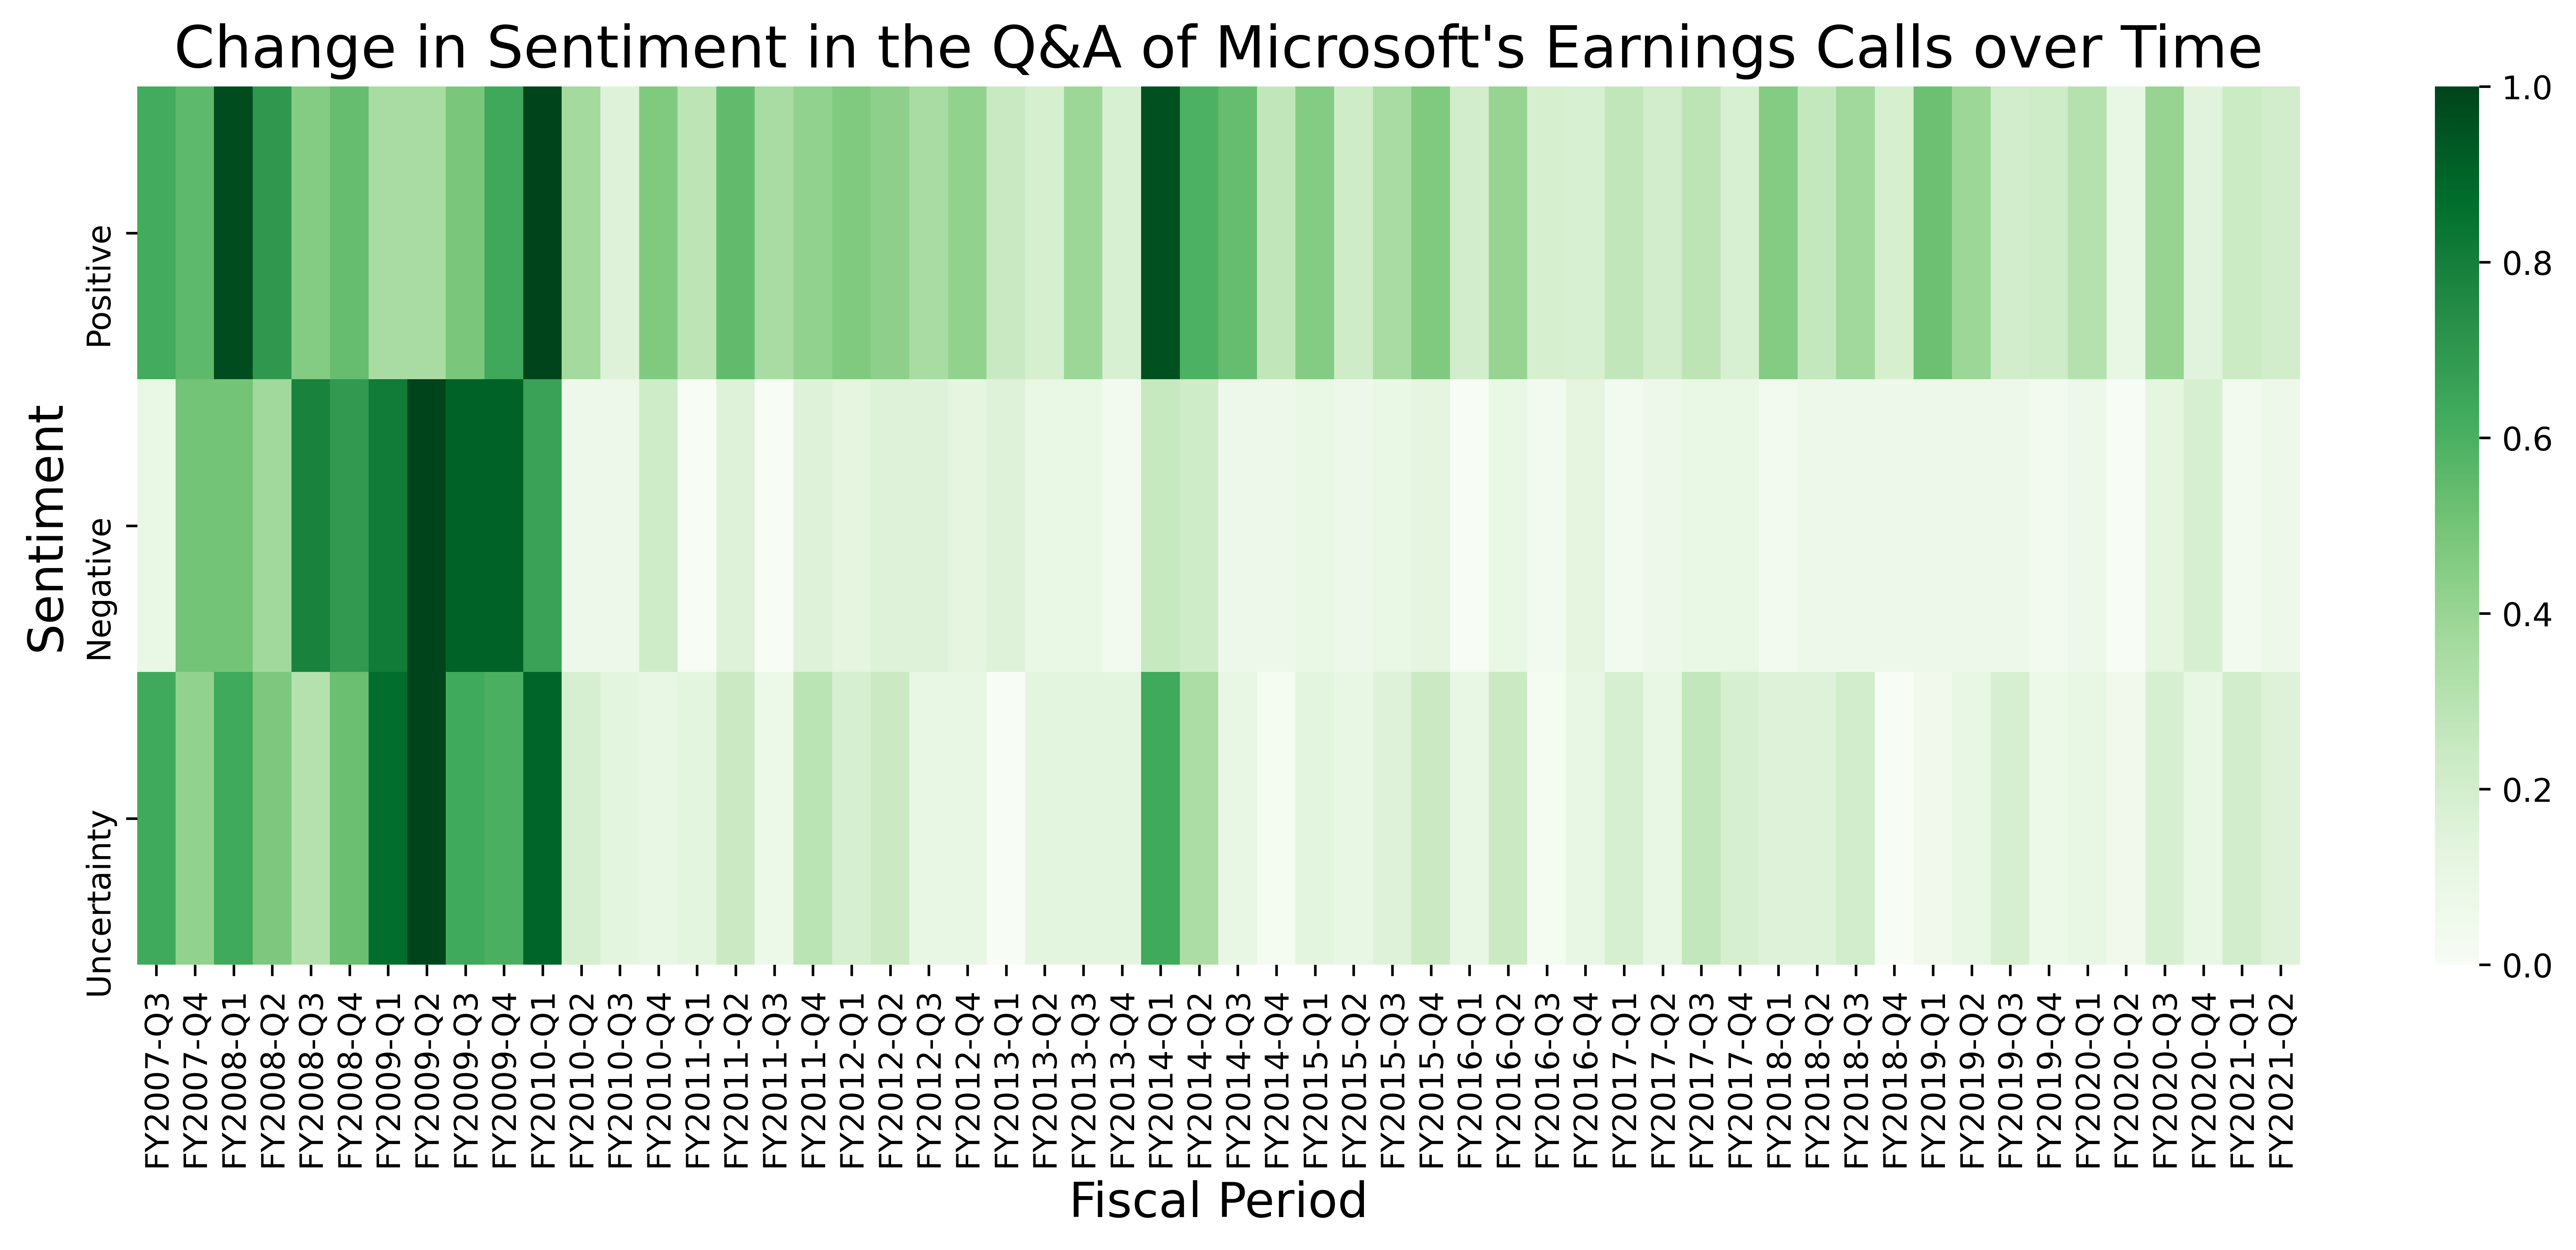

In [7]:
eu.sentiment_analysis_heatmap(df_sentiment_msft)

## Text Complexity

In [10]:
gunning_fog_scores = []

for tscript in msft_earnings_qa.keys():
    gunning_fog_scores.append(textstat.gunning_fog(' '.join(msft_earnings_qa[tscript])))

<AxesSubplot:>

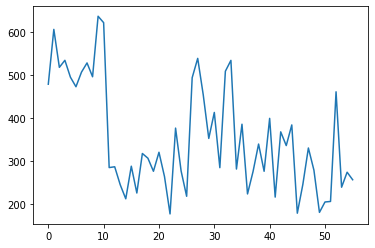

In [11]:
pd.Series(gunning_fog_scores).plot()